In [932]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [20, 10]
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]

In [933]:
data = pd.read_csv('cars_data_clean.csv')

In [934]:
data.shape

(37813, 66)

In [935]:
data.duplicated().sum()

0

In [936]:
df = data.drop(columns=['usedCarSkuId', 'images', 'model_type_new'])

In [937]:
df.shape

(37813, 63)

In [938]:
df.duplicated().sum()

19

In [939]:
df.drop_duplicates(inplace=True)

In [940]:
df.duplicated().sum()

0

In [941]:
df.shape

(37794, 63)

In [942]:
df.head(2)

,loc,myear,body,transmission,fuel,km,ip,imgCount,threesixty,dvn,oem,model,variant,City,listed_price,discountValue,utype,carType,top_features,comfort_features,interior_features,exterior_features,safety_features,Color,Engine Type,No of Cylinder,Valves per Cylinder,Valve Configuration,Turbo Charger,Super Charger,Length,Width,Height,Wheel Base,Front Tread,Rear Tread,Kerb Weight,Gross Weight,Gear Box,Drive Type,Seats,Steering Type,Turning Radius,Front Brake Type,Rear Brake Type,Top Speed,Acceleration,Tyre Type,Doors,Cargo Volume,state,exterior_color,owner_type,Fuel Suppy System,Compression Ratio,Alloy Wheel Size,Ground Clearance Unladen,Max Power Delivered,Max Power At,Max Torque Delivered,Max Torque At,Bore,Stroke
0,gomti nagar,2016,hatchback,manual,cng,69162.0,0,15,False,maruti wagon r lxi cng,maruti,maruti wagon r,lxi cng,lucknow,370000.0,0,dealer,corporate,"['power steering', 'power windows front', 'air...","['power steering', 'power windows front', 'rem...","['air conditioner', 'heater', 'digital odomete...","['adjustable head lights', 'manually adjustabl...","['centeral locking', 'child safety locks', 'da...",silver,k10b engine,3.0,4.0,dohc,False,False,3599.0,1495.0,1700.0,2400.0,1295.0,1290.0,960.0,1350.0,5 speed,fwd,5.0,power,4.6,ventilated disc,drum,137.0,15.90,tubeless,5.0,180.0,uttar pradesh,silver,first,NaN,NaN,NaN,NaN,58.16,6200.0,77.0,3500.0,69.0,NaN
1,borivali west,2015,hatchback,manual,cng,45864.0,0,15,False,maruti celerio green vxi,maruti,maruti celerio,green vxi,mumbai,365000.0,0,dealer,corporate,"['power steering', 'power windows front', 'air...","['power steering', 'power windows front', 'pow...","['air conditioner', 'heater', 'digital odomete...","['adjustable head lights', 'manually adjustabl...","['centeral locking', 'child safety locks', 'da...",grey,k10b engine,3.0,4.0,dohc,False,False,3600.0,1600.0,1560.0,2425.0,1420.0,1410.0,915.0,1350.0,5 speed,fwd,5.0,power,4.7,ventilated disc,drum,150.0,15.05,tubeless radial,5.0,235.0,maharashtra,grey,first,Gasoline Port Injection,11.0,NaN,NaN,58.20,6000.0,78.0,3500.0,73.0,NaN


In [943]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37794 entries, 0 to 37812
Data columns (total 63 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   loc                       31954 non-null  object 
 1   myear                     37794 non-null  int64  
 2   body                      37776 non-null  object 
 3   transmission              37794 non-null  object 
 4   fuel                      37794 non-null  object 
 5   km                        37794 non-null  float64
 6   ip                        37794 non-null  int64  
 7   imgCount                  37794 non-null  int64  
 8   threesixty                37794 non-null  bool   
 9   dvn                       37794 non-null  object 
 10  oem                       37794 non-null  object 
 11  model                     37794 non-null  object 
 12  variant                   37794 non-null  object 
 13  City                      37794 non-null  object 
 14  listed_pric

# Checking for Missing Values

In [944]:
df.isna().sum().sum()

281901

In [945]:
df.isna().sum().sum()/df.size*100

11.839495813142424

In [946]:
missing = pd.DataFrame({'m_value': df.isna().sum(), 'Percent': df.isna().sum()/len(df)*100})

In [947]:
missing.T

,loc,myear,body,transmission,fuel,km,ip,imgCount,threesixty,dvn,oem,model,variant,City,listed_price,discountValue,utype,carType,top_features,comfort_features,interior_features,exterior_features,safety_features,Color,Engine Type,No of Cylinder,Valves per Cylinder,Valve Configuration,Turbo Charger,Super Charger,Length,Width,Height,Wheel Base,Front Tread,Rear Tread,Kerb Weight,Gross Weight,Gear Box,Drive Type,Seats,Steering Type,Turning Radius,Front Brake Type,Rear Brake Type,Top Speed,Acceleration,Tyre Type,Doors,Cargo Volume,state,exterior_color,owner_type,Fuel Suppy System,Compression Ratio,Alloy Wheel Size,Ground Clearance Unladen,Max Power Delivered,Max Power At,Max Torque Delivered,Max Torque At,Bore,Stroke
m_value,5840.000000,0.0,18.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,160.000000,868.000000,143.000000,228.00000,7957.000000,0.0,0.0,362.000000,371.000000,363.00000,556.000000,15872.000000,15873.00000,13134.000000,20882.000000,471.00000,4492.000000,18.000000,808.000000,5846.000000,327.000000,326.000000,15342.000000,13979.000000,257.000000,44.000000,6727.000000,0.0,123.000000,0.0,5500.000000,27788.000000,14453.00000,35642.000000,231.000000,2247.000000,231.000000,1976.000000,25165.000000,37281.000000
Percent,15.452188,0.0,0.047627,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.423348,2.296661,0.378367,0.60327,21.053606,0.0,0.0,0.957824,0.981637,0.96047,1.471133,41.996084,41.99873,34.751548,55.252156,1.24623,11.885484,0.047627,2.137905,15.468064,0.865217,0.862571,40.593745,36.987352,0.680002,0.116421,17.799122,0.0,0.325448,0.0,14.552574,73.524898,38.24152,94.305974,0.611208,5.945388,0.611208,5.228343,66.584643,98.642642


In [948]:
onlym = missing[missing.Percent !=0]
onlym = onlym.sort_values(by='Percent')
onlym = onlym.T

In [949]:
onlym

,body,Seats,Doors,exterior_color,No of Cylinder,Color,Valves per Cylinder,Max Torque Delivered,Max Power Delivered,Tyre Type,Rear Brake Type,Front Brake Type,Length,Height,Width,Gear Box,Wheel Base,Steering Type,Engine Type,Max Torque At,Max Power At,Drive Type,Fuel Suppy System,loc,Turning Radius,Cargo Volume,Valve Configuration,Kerb Weight,Acceleration,Alloy Wheel Size,Top Speed,Front Tread,Rear Tread,Gross Weight,Bore,Compression Ratio,Ground Clearance Unladen,Stroke
m_value,18.000000,18.000000,44.000000,123.000000,143.000000,160.000000,228.00000,231.000000,231.000000,257.000000,326.000000,327.000000,362.000000,363.00000,371.000000,471.00000,556.000000,808.000000,868.000000,1976.000000,2247.000000,4492.000000,5500.000000,5840.000000,5846.000000,6727.000000,7957.000000,13134.000000,13979.000000,14453.00000,15342.000000,15872.000000,15873.00000,20882.000000,25165.000000,27788.000000,35642.000000,37281.000000
Percent,0.047627,0.047627,0.116421,0.325448,0.378367,0.423348,0.60327,0.611208,0.611208,0.680002,0.862571,0.865217,0.957824,0.96047,0.981637,1.24623,1.471133,2.137905,2.296661,5.228343,5.945388,11.885484,14.552574,15.452188,15.468064,17.799122,21.053606,34.751548,36.987352,38.24152,40.593745,41.996084,41.99873,55.252156,66.584643,73.524898,94.305974,98.642642


# Pratitioning Numerical and Categorical Columns

In [950]:
num = ['km','imgCount','listed_price','discountValue',
       'Length','Width','Height','Wheel Base','Front Tread','Rear Tread','Kerb Weight','Gross Weight',
       'Turning Radius','Top Speed','Acceleration','Cargo Volume','Compression Ratio',
       'Ground Clearance Unladen','Max Power Delivered','Max Power At',
       'Max Torque Delivered','Max Torque At','Bore','Stroke']

In [951]:
cat = ['myear','Doors','loc','body','transmission','fuel','dvn','oem','model','variant','City','utype',
       'carType','top_features','comfort_features','interior_features','exterior_features',
       'safety_features','Color','Engine Type','Valve Configuration','Gear Box','Drive Type',
       'Steering Type','Front Brake Type','Rear Brake Type','Tyre Type','state','exterior_color',
       'owner_type','Fuel Suppy System','Turbo Charger','Super Charger','threesixty','ip',
       'No of Cylinder','Valves per Cylinder', 'Seats', 'Alloy Wheel Size']

# Anomalies

In [952]:
df[num].describe().T

,count,mean,std,min,25%,50%,75%,max
km,37794.0,62414.249458,5.848207e+04,101.00,31741.25,56735.00,83312.25,6.300000e+06
imgCount,37794.0,15.574694,8.357958e+00,0.00,10.00,15.00,21.00,7.400000e+01
listed_price,37794.0,800095.206514,3.043796e+06,11963.00,320000.00,525000.00,855656.50,5.500006e+08
discountValue,37794.0,73.318543,2.806488e+03,0.00,0.00,0.00,0.00,2.000000e+05
Length,37432.0,4113.700230,3.993642e+02,2752.00,3795.00,3995.00,4440.00,5.982000e+03
Width,37423.0,1725.617027,1.283024e+02,1312.00,1680.00,1710.00,1790.00,2.236000e+03
Height,37431.0,1577.542358,1.151516e+02,1165.00,1495.00,1530.00,1642.00,2.075000e+03
Wheel Base,37238.0,2545.843547,1.552995e+02,1840.00,2425.00,2520.00,2647.00,3.772000e+03
Front Tread,21922.0,1470.033866,9.037778e+01,1143.00,1420.00,1485.00,1530.00,1.705000e+03
Rear Tread,21921.0,1469.303837,1.005726e+02,15.00,1420.00,1493.00,1525.00,1.834000e+03


In [953]:
# Listed price and Turning radius

In [954]:
df['listed_price'].describe()

count    3.779400e+04
mean     8.000952e+05
std      3.043796e+06
min      1.196300e+04
25%      3.200000e+05
50%      5.250000e+05
75%      8.556565e+05
max      5.500006e+08
Name: listed_price, dtype: float64

In [955]:
df['listed_price'].replace({df['listed_price'].max():550000.555},inplace=True)

In [956]:
df['listed_price'].describe()

count    3.779400e+04
mean     7.855572e+05
std      1.132965e+06
min      1.196300e+04
25%      3.200000e+05
50%      5.250000e+05
75%      8.553972e+05
max      9.551953e+07
Name: listed_price, dtype: float64

In [957]:
df['Turning Radius'].describe()

count    31948.000000
mean         5.494319
std         49.412848
min          3.500000
25%          4.800000
50%          5.100000
75%          5.300000
max       6250.000000
Name: Turning Radius, dtype: float64

In [958]:
df['Turning Radius'].replace({df['Turning Radius'].max():6.250},inplace=True)

In [959]:
df['Turning Radius'].describe()

count    31948.000000
mean         5.103449
std          0.563812
min          3.500000
25%          4.800000
50%          5.100000
75%          5.300000
max         13.510000
Name: Turning Radius, dtype: float64

In [960]:
# Engine Type and Fuel

In [961]:
df[df["Engine Type"] == "2ar-fxe petrol engine"]

,loc,myear,body,transmission,fuel,km,ip,imgCount,threesixty,dvn,oem,model,variant,City,listed_price,discountValue,utype,carType,top_features,comfort_features,interior_features,exterior_features,safety_features,Color,Engine Type,No of Cylinder,Valves per Cylinder,Valve Configuration,Turbo Charger,Super Charger,Length,Width,Height,Wheel Base,Front Tread,Rear Tread,Kerb Weight,Gross Weight,Gear Box,Drive Type,Seats,Steering Type,Turning Radius,Front Brake Type,Rear Brake Type,Top Speed,Acceleration,Tyre Type,Doors,Cargo Volume,state,exterior_color,owner_type,Fuel Suppy System,Compression Ratio,Alloy Wheel Size,Ground Clearance Unladen,Max Power Delivered,Max Power At,Max Torque Delivered,Max Torque At,Bore,Stroke
1194,rajindra place,2015,sedan,automatic,electric,96500.0,0,15,False,toyota camry new,toyota,toyota camry,new,new delhi,1699000.0,0,dealer,partner,"['power steering', 'power windows front', 'air...","['power steering', 'power windows front', 'pow...","['air conditioner', 'heater', 'adjustable stee...","['adjustable head lights', 'fog lights front',...","['anti lock braking system', 'brake assist', '...",brown,2ar-fxe petrol engine,4.0,4.0,dohc,False,False,4850.0,1825.0,1480.0,2775.0,1580.0,1570.0,1635.0,2100.0,6 speed,fwd,5.0,power,5.5,ventilated disc,disc,200.0,10.8,tubeless radial,4.0,436.0,delhi,brown,second,Electronic Fuel Injection,NaN,17.0,NaN,157.7,5700.0,213.0,4500.0,NaN,NaN
1199,rajindra place,2016,sedan,automatic,electric,115000.0,0,15,False,toyota camry new,toyota,toyota camry,new,new delhi,1650000.0,0,dealer,partner,"['power steering', 'power windows front', 'air...","['power steering', 'power windows front', 'pow...","['air conditioner', 'heater', 'adjustable stee...","['adjustable head lights', 'fog lights front',...","['anti lock braking system', 'brake assist', '...",silver,2ar-fxe petrol engine,4.0,4.0,dohc,False,False,4850.0,1825.0,1480.0,2775.0,1580.0,1570.0,1635.0,2100.0,6 speed,fwd,5.0,power,5.5,ventilated disc,disc,200.0,10.8,tubeless radial,4.0,436.0,delhi,silver,first,Electronic Fuel Injection,NaN,17.0,NaN,157.7,5700.0,213.0,4500.0,NaN,NaN
1244,chattarpur,2017,sedan,automatic,electric,185000.0,0,19,False,toyota camry hybrid,toyota,toyota camry,hybrid,new delhi,1990000.0,0,dealer,partner,"['power steering', 'power windows front', 'air...","['power steering', 'power windows front', 'pow...","['air conditioner', 'heater', 'adjustable stee...","['adjustable head lights', 'fog lights front',...","['anti lock braking system', 'brake assist', '...",white,2ar-fxe petrol engine,4.0,4.0,dohc,False,False,4850.0,1825.0,1480.0,2775.0,1580.0,1570.0,1635.0,2100.0,6 speed,fwd,5.0,power,5.5,ventilated disc,disc,200.0,10.8,tubeless radial,4.0,436.0,delhi,white,second,Electronic Fuel Injection,NaN,17.0,NaN,157.7,5700.0,213.0,4500.0,NaN,NaN
1270,kurla,2017,sedan,automatic,electric,40418.0,0,9,False,toyota camry hybrid,toyota,toyota camry,hybrid,mumbai,2299000.0,0,dealer,partner,"['power steering', 'power windows front', 'air...","['power steering', 'power windows front', 'pow...","['air conditioner', 'heater', 'adjustable stee...","['adjustable head lights', 'fog lights front',...","['anti lock braking system', 'brake assist', '...",silver,2ar-fxe petrol engine,4.0,4.0,dohc,False,False,4850.0,1825.0,1480.0,2775.0,1580.0,1570.0,1635.0,2100.0,6 speed,fwd,5.0,power,5.5,ventilated disc,disc,200.0,10.8,tubeless radial,4.0,436.0,maharashtra,silver,first,Electronic Fuel Injection,NaN,17.0,NaN,157.7,5700.0,213.0,4500.0,NaN,NaN
1271,mahadevapura,2016,sedan,automatic,electric,79281.0,0,15,False,toyota camry hybrid,toyota,toyota camry,hybrid,bangalore,1666000.0,0,dealer,corporate,"['power steering', 'power windows front', 'air...","['power steering', 'power windows front', 'pow...","['air conditioner', 'heater', 'adjustable stee...","['adjustable head lights', 'fog lights front',...","['anti lock braking system', 'brake assist', '...",black,2ar-fxe petrol engine,4.0,4.0,dohc,False,False,4850.0,1825.0,1480.0,2775.0,1580.0,1570.0

In [962]:
df[df["Engine Type"] == "2ar-fxe petrol engine"].isna().sum()

loc                      0
myear                    0
body                     0
transmission             0
fuel                     0
                        ..
Max Power At             0
Max Torque Delivered     0
Max Torque At            0
Bore                    18
Stroke                  18
Length: 63, dtype: int64

In [963]:
fuel_elec = df[df["Engine Type"] == "2ar-fxe petrol engine"].index

In [964]:
fuel_elec

Index([ 1194,  1199,  1244,  1270,  1271,  1289,  1293,  1312,  1315,  2822,
        2832,  2834,  2849,  2852,  2898,  2957,  3331, 20578],
      dtype='int64')

In [965]:
for i in fuel_elec:
    if (df.loc[i, "fuel"] == "electric") and (df.loc[i, "Engine Type"] == "2ar-fxe petrol engine"):
        
        df.loc[i, "fuel"] = "petrol"

In [966]:
df[df["Engine Type"] == "2ar-fxe petrol engine"].loc[:, ['Engine Type', 'fuel']] # compression ratio 13:1

,Engine Type,fuel
1194,2ar-fxe petrol engine,petrol
1199,2ar-fxe petrol engine,petrol
1244,2ar-fxe petrol engine,petrol
1270,2ar-fxe petrol engine,petrol
1271,2ar-fxe petrol engine,petrol
1289,2ar-fxe petrol engine,petrol
1293,2ar-fxe petrol engine,petrol
1312,2ar-fxe petrol engine,petrol
1315,2ar-fxe petrol engine,petrol
2822,2ar-fxe petrol engine,petrol


# Imputing Null Values

In [967]:
onlym

,body,Seats,Doors,exterior_color,No of Cylinder,Color,Valves per Cylinder,Max Torque Delivered,Max Power Delivered,Tyre Type,Rear Brake Type,Front Brake Type,Length,Height,Width,Gear Box,Wheel Base,Steering Type,Engine Type,Max Torque At,Max Power At,Drive Type,Fuel Suppy System,loc,Turning Radius,Cargo Volume,Valve Configuration,Kerb Weight,Acceleration,Alloy Wheel Size,Top Speed,Front Tread,Rear Tread,Gross Weight,Bore,Compression Ratio,Ground Clearance Unladen,Stroke
m_value,18.000000,18.000000,44.000000,123.000000,143.000000,160.000000,228.00000,231.000000,231.000000,257.000000,326.000000,327.000000,362.000000,363.00000,371.000000,471.00000,556.000000,808.000000,868.000000,1976.000000,2247.000000,4492.000000,5500.000000,5840.000000,5846.000000,6727.000000,7957.000000,13134.000000,13979.000000,14453.00000,15342.000000,15872.000000,15873.00000,20882.000000,25165.000000,27788.000000,35642.000000,37281.000000
Percent,0.047627,0.047627,0.116421,0.325448,0.378367,0.423348,0.60327,0.611208,0.611208,0.680002,0.862571,0.865217,0.957824,0.96047,0.981637,1.24623,1.471133,2.137905,2.296661,5.228343,5.945388,11.885484,14.552574,15.452188,15.468064,17.799122,21.053606,34.751548,36.987352,38.24152,40.593745,41.996084,41.99873,55.252156,66.584643,73.524898,94.305974,98.642642


# Body

In [968]:
df['body'].value_counts()

body
hatchback          15042
sedan              10541
suv                 9815
muv                 1814
minivans             391
luxury vehicles       72
pickup trucks         47
convertibles          22
coupe                 21
wagon                  7
hybrids                4
Name: count, dtype: int64

In [969]:
df[df['body'].isna()]

,loc,myear,body,transmission,fuel,km,ip,imgCount,threesixty,dvn,oem,model,variant,City,listed_price,discountValue,utype,carType,top_features,comfort_features,interior_features,exterior_features,safety_features,Color,Engine Type,No of Cylinder,Valves per Cylinder,Valve Configuration,Turbo Charger,Super Charger,Length,Width,Height,Wheel Base,Front Tread,Rear Tread,Kerb Weight,Gross Weight,Gear Box,Drive Type,Seats,Steering Type,Turning Radius,Front Brake Type,Rear Brake Type,Top Speed,Acceleration,Tyre Type,Doors,Cargo Volume,state,exterior_color,owner_type,Fuel Suppy System,Compression Ratio,Alloy Wheel Size,Ground Clearance Unladen,Max Power Delivered,Max Power At,Max Torque Delivered,Max Torque At,Bore,Stroke
44,NaN,2021,NaN,manual,cng,30000.0,0,6,False,maruti eeco cargo std cng ac 2021-2022,maruti,maruti eeco cargo,std cng ac 2021-2022,dharuhera,500000.0,0,individual,partner,"['accessory power outlet', 'air conditioner', ...",['accessory power outlet'],"['air conditioner', 'heater', 'electronic mult...","['adjustable head lights', 'manually adjustabl...","['child safety locks', 'passenger side rear vi...",white,g12b,4.0,4.0,NaN,True,True,3675.0,1475.0,1825.0,2350.0,1280.0,1290.0,1030.0,NaN,5 speed,NaN,2.0,NaN,4.5,disc,drum,NaN,NaN,tubeless,5.0,NaN,haryana,white,first,NaN,NaN,NaN,NaN,61.68,6000.0,85.0,3000.0,NaN,NaN
89,NaN,2022,NaN,manual,cng,25000.0,0,3,False,maruti eeco 5 seater ac cng,maruti,maruti eeco,5 seater ac cng,kanpur,530000.0,0,individual,partner,"['accessory power outlet', 'rear seat headrest...","['accessory power outlet', 'rear seat headrest']","['air conditioner', 'heater', 'digital odomete...","['adjustable head lights', 'manually adjustabl...","['anti lock braking system', 'child safety loc...",white,k12n,4.0,4.0,NaN,True,True,3675.0,1475.0,1825.0,2350.0,1280.0,1290.0,1050.0,NaN,5 speed,NaN,5.0,manual,4.5,disc,drum,NaN,NaN,tubeless,5.0,NaN,uttar pradesh,white,first,NaN,NaN,NaN,NaN,70.67,6000.0,95.0,3000.0,NaN,NaN
90,gurgaon,2022,NaN,manual,cng,9955.0,0,20,False,maruti eeco 5 seater ac cng,maruti,maruti eeco,5 seater ac cng,gurgaon,620000.0,0,dealer,partner,"['accessory power outlet', 'rear seat headrest...","['accessory power outlet', 'rear seat headrest']","['air conditioner', 'heater', 'digital odomete...","['adjustable head lights', 'manually adjustabl...","['anti lock braking system', 'child safety loc...",white,k12n,4.0,4.0,NaN,True,True,3675.0,1475.0,1825.0,2350.0,1280.0,1290.0,1050.0,NaN,5 speed,NaN,5.0,manual,4.5,disc,drum,NaN,NaN,tubeless,5.0,NaN,haryana,white,first,NaN,NaN,NaN,NaN,70.67,6000.0,95.0,3000.0,NaN,NaN
121,NaN,2022,NaN,manual,cng,20000.0,0,10,False,maruti eeco 5 seater ac cng,maruti,maruti eeco,5 seater ac cng,latur,625699.0,0,individual,partner,"['accessory power outlet', 'rear seat headrest...","['accessory power outlet', 'rear seat headrest']","['air conditioner', 'heater', 'digital odomete...","['adjustable head lights', 'manually adjustabl...","['anti lock braking system', 'child safety loc...",white,k12n,4.0,4.0,NaN,True,True,3675.0,1475.0,1825.0,2350.0,1280.0,1290.0,1050.0,NaN,5 speed,NaN,5.0,manual,4.5,disc,drum,NaN,NaN,tubeless,5.0,NaN,maharashtra,white,first,NaN,NaN,NaN,NaN,70.67,6000.0,95.0,3000.0,NaN,NaN
306,NaN,2022,NaN,manual,cng,3000.0,0,4,False,maruti eeco 5 seater ac cng,maruti,maruti eeco,5 seater ac cng,safidon,625000.0,0,individual,partner,"['accessory power outlet', 'rear seat headrest...","['accessory power outlet', 'rear seat headrest']","['air conditioner', 'heater', 'digital odomete...","['adjustable head lights', 'manually adjustabl...","['anti lock braking system', 'child safety loc...",white,k12n,4.0,4.0,NaN,True,True,3675.0,1475.0,1825.0,2350.0,1280.0,1290.0,1050.0,NaN,5 speed,NaN,5.0,manual,4.5,disc,drum,NaN,NaN,tubeless,5.0,NaN,haryana,white,first,NaN,NaN,NaN,NaN,70.67,6000.0,95.0,3000.0,NaN,NaN
453,NaN,2021,NaN,manual,cng,60000.0,0,3,False,maruti eeco cargo std cng ac 2021-2022,maruti,maruti eeco cargo,std cng ac 2021-2022,dharuhera,500000.0,0,individual,p

In [970]:
df[df['body'].isna()].loc[:,['model', 'body']]

,model,body
44,maruti eeco cargo,NaN
89,maruti eeco,NaN
90,maruti eeco,NaN
121,maruti eeco,NaN
306,maruti eeco,NaN
453,maruti eeco cargo,NaN
575,maruti eeco,NaN
582,maruti eeco,NaN
13634,lamborghini huracan evo,NaN
17071,maruti eeco,NaN


In [971]:
df.loc[df['model'] == 'maruti eeco', 'body'] = df.loc[df['model'] == 'maruti eeco', 'body'].fillna('hatchback')

df.loc[df['model']== 'maruti eeco cargo','body'] = df.loc[df['model']=='maruti eeco cargo','body'].fillna('minivans')

df.loc[df['model']=='lamborghini huracan evo','body'] = df.loc[df['model']=='lamborghini huracan evo','body'].fillna('luxury vehicles')

In [972]:
df.body.isna().sum()

0

# Seats

In [973]:
df.Seats.value_counts()

Seats
5.0     32663
7.0      3767
8.0       428
4.0       410
6.0       394
9.0        39
2.0        37
10.0       23
0.0        11
13.0        2
14.0        2
Name: count, dtype: int64

In [974]:
df[df.Seats.isna()]

,loc,myear,body,transmission,fuel,km,ip,imgCount,threesixty,dvn,oem,model,variant,City,listed_price,discountValue,utype,carType,top_features,comfort_features,interior_features,exterior_features,safety_features,Color,Engine Type,No of Cylinder,Valves per Cylinder,Valve Configuration,Turbo Charger,Super Charger,Length,Width,Height,Wheel Base,Front Tread,Rear Tread,Kerb Weight,Gross Weight,Gear Box,Drive Type,Seats,Steering Type,Turning Radius,Front Brake Type,Rear Brake Type,Top Speed,Acceleration,Tyre Type,Doors,Cargo Volume,state,exterior_color,owner_type,Fuel Suppy System,Compression Ratio,Alloy Wheel Size,Ground Clearance Unladen,Max Power Delivered,Max Power At,Max Torque Delivered,Max Torque At,Bore,Stroke
2710,NaN,2019,pickup trucks,manual,diesel,262000.0,0,2,False,mahindra bolero pik up extra strong fb 1.3t ps,mahindra,mahindra bolero pik up extra strong,fb 1.3t ps,raiganj,550000.0,0,individual,partner,[],[],[],[],[],white,NaN,4.0,4.0,NaN,True,True,5219.0,1700.0,1865.0,NaN,NaN,NaN,1715.0,2995.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,west bengal,white,first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2733,NaN,2022,pickup trucks,manual,diesel,70000.0,0,0,False,mahindra bolero pik up extra strong cbc 1.3t ms,mahindra,mahindra bolero pik up extra strong,cbc 1.3t ms,dibrugarh,750000.0,0,individual,partner,[],[],[],[],[],white,NaN,4.0,4.0,NaN,True,True,5219.0,1700.0,1865.0,NaN,NaN,NaN,1715.0,2995.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,assam,white,first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5046,NaN,2012,suv,automatic,diesel,90000.0,0,18,False,ford endeavour hurricane le,ford,ford endeavour,hurricane le,ahmedabad,352000.0,0,individual,partner,[],[],[],[],[],gray,NaN,4.0,4.0,NaN,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,gujarat,gray,fourth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6026,thathawade,2014,sedan,manual,petrol,92963.0,0,15,False,volkswagen jetta 1.4 tsi trendline,volkswagen,volkswagen jetta,1.4 tsi trendline,pune,726000.0,0,dealer,corporate,"['power steering', 'power windows front', 'air...","['power steering', 'power windows front', 'pow...","['air conditioner', 'heater', 'adjustable stee...","['adjustable head lights', 'fog lights rear', ...","['anti lock braking system', 'brake assist', '...",white,petrol engine,4.0,4.0,dohc,True,True,4659.0,1778.0,1453.0,2648.0,1535.0,1532.0,1354.0,1850.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,maharashtra,white,second,Multi-Point Fuel Injection,10.0,NaN,NaN,120.30,5000.0,200.0,2750.0,71.0,NaN
11722,banaswadi,2020,suv,manual,petrol,27000.0,0,12,False,nissan kicks xv premium option,nissan,nissan kicks,xv premium option,bangalore,1395000.0,0,dealer,partner,"['power steering', 'power windows front', 'air...","['power steering', 'power windows front', 'pow...","['air conditioner', 'heater', 'adjustable stee...","['adjustable head lights', 'fog lights front',...","['anti lock braking system', 'brake assist', '...",maroon,1.5 h4k petrol,4.0,4.0,NaN,True,True,4384.0,1813.0,1656.0,2673.0,NaN,NaN,NaN,NaN,5 speed,NaN,NaN,power,5.2,disc,drum,NaN,NaN,tubeless,NaN,400.0,karnataka,maroon,first,Multi-Point Fuel Injection,NaN,17.0,210.0,104.55,5600.0,142.0,4000.0,NaN,NaN
14988,ahmedabad,2012,hatchback,manual,petrol,137947.0,0,20,True,honda jazz select edition,honda,honda jazz,select edition,ahmedabad,350000.0,0,dealer,partner,[],[],[],[],[],white,NaN,4.0,4.0,NaN,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,gujarat,white,first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15429,bangalore city,2004,sedan,manual,petrol,109381.0,0,18,False,honda city 1.5 exi,honda,honda city,1.5 exi,bangalore,150000.0,0,dealer,partner,[],[],[],[],[],white,in-line engine,4.0,4.0,NaN,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,karnataka,white,third,NaN,NaN,NaN,NaN,100.00,NaN,13.1,NaN,NaN,NaN
20742,NaN,2009,hatchback,manual,petrol,35000.0,0,4,False,maruti estilo l

In [975]:
df[df.Seats.isna()].loc[:, ['body', 'Seats']]

,body,Seats
2710,pickup trucks,NaN
2733,pickup trucks,NaN
5046,suv,NaN
6026,sedan,NaN
11722,suv,NaN
14988,hatchback,NaN
15429,sedan,NaN
20742,hatchback,NaN
20782,hatchback,NaN
23210,hatchback,NaN


In [976]:
df.groupby('body')['Seats'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else x).to_dict()

{'convertibles': 2.0,
 'coupe': 4.0,
 'hatchback': 5.0,
 'hybrids': 5.0,
 'luxury vehicles': 5.0,
 'minivans': 5.0,
 'muv': 7.0,
 'pickup trucks': 5.0,
 'sedan': 5.0,
 'suv': 5.0,
 'wagon': 5.0}

In [977]:
df.Seats.mode()[0]

5.0

In [978]:
df['Seats'].fillna(df.Seats.mode()[0], inplace=True)

In [979]:
df['Seats'].isna().sum()

0

# Doors

In [980]:
df['Doors'].value_counts()

Doors
5.0    25388
4.0    12025
3.0      261
2.0       53
6.0       23
Name: count, dtype: int64

In [981]:
df[df['Doors'].isna()]

,loc,myear,body,transmission,fuel,km,ip,imgCount,threesixty,dvn,oem,model,variant,City,listed_price,discountValue,utype,carType,top_features,comfort_features,interior_features,exterior_features,safety_features,Color,Engine Type,No of Cylinder,Valves per Cylinder,Valve Configuration,Turbo Charger,Super Charger,Length,Width,Height,Wheel Base,Front Tread,Rear Tread,Kerb Weight,Gross Weight,Gear Box,Drive Type,Seats,Steering Type,Turning Radius,Front Brake Type,Rear Brake Type,Top Speed,Acceleration,Tyre Type,Doors,Cargo Volume,state,exterior_color,owner_type,Fuel Suppy System,Compression Ratio,Alloy Wheel Size,Ground Clearance Unladen,Max Power Delivered,Max Power At,Max Torque Delivered,Max Torque At,Bore,Stroke
1220,pune city,2022,suv,automatic,electric,1369.0,0,20,True,tata nexon ev max xz plus lux,tata,tata nexon ev max,xz plus lux,pune,1800000.0,0,dealer,partner,"['power windows front', 'power windows rear', ...","['power windows front', 'power windows rear', ...","['leather seats', 'leather steering wheel', 'h...","['fog lights front', 'electric folding rear vi...","['anti lock braking system', 'centeral locking...",grey,NaN,NaN,NaN,NaN,True,True,3993.0,1811.0,1616.0,2498.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,power,5.1,disc,disc,NaN,9.0,NaN,NaN,350.0,maharashtra,grey,first,NaN,NaN,16.0,NaN,141.04,NaN,250.0,NaN,NaN,NaN
1253,bangalore city,2022,suv,automatic,electric,1634.0,0,15,False,tata nexon ev max xz plus lux,tata,tata nexon ev max,xz plus lux,bangalore,1890000.0,0,dealer,partner,"['power windows front', 'power windows rear', ...","['power windows front', 'power windows rear', ...","['leather seats', 'leather steering wheel', 'h...","['fog lights front', 'electric folding rear vi...","['anti lock braking system', 'centeral locking...",blue,NaN,NaN,NaN,NaN,True,True,3993.0,1811.0,1616.0,2498.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,power,5.1,disc,disc,NaN,9.0,NaN,NaN,350.0,karnataka,blue,first,NaN,NaN,16.0,NaN,141.04,NaN,250.0,NaN,NaN,NaN
1273,chandigarh,2022,suv,automatic,electric,1981.0,0,17,False,tata nexon ev max xz plus,tata,tata nexon ev max,xz plus,chandigarh,1500000.0,0,dealer,partner,"['power windows front', 'power windows rear', ...","['power windows front', 'power windows rear', ...","['fabric upholstery', 'leather steering wheel'...","['fog lights front', 'electric folding rear vi...","['anti lock braking system', 'centeral locking...",white,NaN,NaN,NaN,NaN,True,True,3993.0,1811.0,1616.0,2498.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,power,5.1,disc,disc,NaN,9.0,NaN,NaN,350.0,chandigarh,white,first,NaN,NaN,16.0,NaN,141.04,NaN,250.0,NaN,NaN,NaN
2696,NaN,2021,pickup trucks,manual,diesel,30000.0,0,2,False,mahindra bolero pik up extra strong 4wd ms,mahindra,mahindra bolero pik up extra strong,4wd ms,madurai,850000.0,0,individual,partner,[],[],[],[],[],other,NaN,4.0,4.0,NaN,True,True,5219.0,1700.0,1865.0,3264.0,NaN,NaN,1715.0,2995.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tamil nadu,other,first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2699,NaN,2019,pickup trucks,manual,diesel,60000.0,0,2,False,mahindra bolero pik up extra strong 4wd ms,mahindra,mahindra bolero pik up extra strong,4wd ms,shimla,750000.0,0,individual,partner,[],[],[],[],[],white,NaN,4.0,4.0,NaN,True,True,5219.0,1700.0,1865.0,3264.0,NaN,NaN,1715.0,2995.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,himachal pradesh,white,first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2704,NaN,2022,pickup trucks,manual,diesel,25000.0,0,1,False,tata yodha pickup std,tata,tata yodha pickup,std,kurukshetra,690000.0,0,individual,partner,[],[],[],[],[],white,tata 4spcr tcic 4cylinder bsiv,4.0,4.0,NaN,True,True,5350.0,1860.0,1810.0,3150.0,NaN,NaN,1810.0,NaN,5 speed,rwd,2.0,power,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,haryana,white,first,NaN,NaN,NaN,210.0,85.82,3000.0,250.0,1500.0,NaN,NaN
2710,NaN,2019,pickup trucks,manual,diesel,262000.0,0,2,False,mahindra bolero pik up extra strong fb 1.3t ps,mahindra,mahindra bolero pik up extra strong,fb 1.3t ps,raiganj,550000.0,0,individual,partner,[],[],[],[],[],wh

In [982]:
df.groupby('body')['Doors'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else x).to_dict()

{'convertibles': 2.0,
 'coupe': 2.0,
 'hatchback': 5.0,
 'hybrids': 4.0,
 'luxury vehicles': 4.0,
 'minivans': 5.0,
 'muv': 5.0,
 'pickup trucks': 4.0,
 'sedan': 4.0,
 'suv': 5.0,
 'wagon': 5.0}

In [983]:
mode_dict = df.groupby('body')['Doors'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else x).to_dict()

def fill_missing(row, mode_dict, ref, col):
    if pd.isnull(row[col]):
        return mode_dict.get(row[ref], row[col])
    return row[col]

df['Doors'] = df.apply(lambda x: fill_missing(x, mode_dict,'body', 'Doors'), axis=1)

In [984]:
df['Doors'].isna().sum()

0

# Exterior Color

In [985]:
mode_dict = df.groupby('dvn')['exterior_color'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else x).to_dict()

In [986]:
def fill_missing(row, mode_dict, ref, col):
    if pd.isnull(row[col]):
        return mode_dict.get(row[ref], row[col])
    return row[col]

df['exterior_color'] = df.apply(lambda x: fill_missing(x, mode_dict, 'dvn', 'exterior_color'), axis=1)

In [987]:
df['exterior_color'].isna().sum()

12

In [988]:
df['exterior_color'].mode()[0]

'white'

In [989]:
fm = df['exterior_color'].mode()[0]
df['exterior_color'].fillna(fm, inplace=True)

In [990]:
df['exterior_color'].isna().sum()

0

# No of Cylinder

In [991]:
df['No of Cylinder'].value_counts()

No of Cylinder
4.0     28742
3.0      8083
6.0       500
5.0       121
2.0        97
7.0        55
8.0        38
1.0         7
12.0        4
10.0        3
16.0        1
Name: count, dtype: int64

In [992]:
df[df['No of Cylinder'].isna()]

,loc,myear,body,transmission,fuel,km,ip,imgCount,threesixty,dvn,oem,model,variant,City,listed_price,discountValue,utype,carType,top_features,comfort_features,interior_features,exterior_features,safety_features,Color,Engine Type,No of Cylinder,Valves per Cylinder,Valve Configuration,Turbo Charger,Super Charger,Length,Width,Height,Wheel Base,Front Tread,Rear Tread,Kerb Weight,Gross Weight,Gear Box,Drive Type,Seats,Steering Type,Turning Radius,Front Brake Type,Rear Brake Type,Top Speed,Acceleration,Tyre Type,Doors,Cargo Volume,state,exterior_color,owner_type,Fuel Suppy System,Compression Ratio,Alloy Wheel Size,Ground Clearance Unladen,Max Power Delivered,Max Power At,Max Torque Delivered,Max Torque At,Bore,Stroke
990,NaN,2015,minivans,manual,lpg,100000.0,0,8,False,maruti omni lpg std bsiii 5-str w immobiliser,maruti,maruti omni,lpg std bsiii 5-str w immobiliser,etawah,145000.0,0,individual,partner,[],[],[],[],[],NaN,NaN,NaN,NaN,NaN,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4 speed,rwd,5.0,power,NaN,NaN,NaN,95.0,NaN,tubeless radial,5.0,210.0,uttar pradesh,silver,second,NaN,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1047,NaN,2007,minivans,manual,lpg,120000.0,0,4,False,maruti omni lpg std bsiv,maruti,maruti omni,lpg std bsiv,nagpur,100000.0,0,individual,partner,[],[],[],[],[],NaN,NaN,NaN,NaN,NaN,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4 speed,rwd,8.0,power,NaN,NaN,NaN,95.0,NaN,tubeless radial,5.0,210.0,maharashtra,white,second,NaN,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1054,NaN,2014,minivans,manual,lpg,40000.0,0,1,False,maruti omni lpg std bsiv,maruti,maruti omni,lpg std bsiv,meerut,110000.0,0,individual,partner,[],[],[],[],[],NaN,NaN,NaN,NaN,NaN,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4 speed,rwd,8.0,power,NaN,NaN,NaN,95.0,NaN,tubeless radial,5.0,210.0,uttar pradesh,white,second,NaN,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1061,NaN,2013,minivans,manual,lpg,50000.0,0,5,False,maruti omni lpg std bsiv,maruti,maruti omni,lpg std bsiv,fatehpur,150000.0,0,individual,partner,[],[],[],[],[],NaN,NaN,NaN,NaN,NaN,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4 speed,rwd,8.0,power,NaN,NaN,NaN,95.0,NaN,tubeless radial,5.0,210.0,uttar pradesh,silver,second,NaN,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1082,bangalore bazaar,2006,minivans,manual,lpg,76000.0,0,9,False,maruti omni lpg std bsiv,maruti,maruti omni,lpg std bsiv,bangalore,160000.0,0,dealer,partner,[],[],[],[],[],NaN,NaN,NaN,NaN,NaN,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4 speed,rwd,8.0,power,NaN,NaN,NaN,95.0,NaN,tubeless radial,5.0,210.0,karnataka,black,first,NaN,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26262,whitefield,2006,sedan,manual,petrol,51259.0,0,0,False,honda city 1.5 gxi,honda,honda city,1.5 gxi,bangalore,200000.0,0,dealer,corporate,"['power steering', 'power windows front']","['power steering', 'power windows front', 'pow...",[],[],[],NaN,NaN,NaN,NaN,NaN,True,True,NaN,NaN,NaN,NaN,NaN,NaN,1085.0,NaN,NaN,NaN,5.0,power,NaN,NaN,NaN,NaN,NaN,tubeless radial,4.0,NaN,karnataka,red,first,NaN,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28932,prabhadevi,2016,sedan,automatic,petrol,58871.0,0,8,False,honda city 1.5 gxi cvt,honda,honda city,1.5 gxi cvt,mumbai,780000.0,0,dealer,corporate,"['power steering', 'power windows front']","['power steering', 'power windows front', 'pow...",[],[],[],NaN,NaN,NaN,NaN,NaN,True,True,NaN,NaN,NaN,NaN,NaN,NaN,1085.0,NaN,NaN,NaN,5.0,power,NaN,NaN,NaN,NaN,NaN,tubeless radial,4.0,NaN,maharashtra,carnelian red pearl,first,NaN,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28933,prabhadevi,2015,sedan,automatic,petrol,55000.0,0,12,False,honda city 1.5 gxi cvt,honda,honda city,1.5 gxi cvt,mumbai,590000.0,0,dealer,corporate,"['power steering', 'power windows front']","['power steering', 'power windows front', 'pow...",[],[],[],NaN,NaN,NaN,NaN,NaN,

In [993]:
df[df['No of Cylinder'].isna()].loc[:, ['fuel', 'No of Cylinder']].drop_duplicates()

,fuel,No of Cylinder
990,lpg,NaN
1195,electric,NaN
2300,petrol,NaN
15033,diesel,NaN


In [994]:
cyl = df[df['No of Cylinder'].isna()]

In [995]:
cyl[cyl.fuel == "electric"].loc[:, ['fuel', 'No of Cylinder']]

,fuel,No of Cylinder
1195,electric,NaN
1196,electric,NaN
1197,electric,NaN
1198,electric,NaN
1200,electric,NaN
...,...,...
14318,electric,NaN
15081,electric,NaN
15147,electric,NaN
15800,electric,NaN


In [996]:
cyl[cyl.fuel == "electric"].loc[:, ['fuel', 'No of Cylinder']].index

Index([ 1195,  1196,  1197,  1198,  1200,  1201,  1202,  1204,  1205,  1206,
       ...
        1307,  1310,  1311,  1316,  1317, 14318, 15081, 15147, 15800, 15855],
      dtype='int64', length=102)

In [997]:
ind = cyl[cyl.fuel == "electric"].loc[:, ['fuel', 'No of Cylinder']].index

for i in ind:
    df.loc[i, 'No of Cylinder'] = 0

In [998]:
for i in ind:
    print(df.loc[i, 'No of Cylinder'])

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [999]:
df[df['No of Cylinder'].isna()]

,loc,myear,body,transmission,fuel,km,ip,imgCount,threesixty,dvn,oem,model,variant,City,listed_price,discountValue,utype,carType,top_features,comfort_features,interior_features,exterior_features,safety_features,Color,Engine Type,No of Cylinder,Valves per Cylinder,Valve Configuration,Turbo Charger,Super Charger,Length,Width,Height,Wheel Base,Front Tread,Rear Tread,Kerb Weight,Gross Weight,Gear Box,Drive Type,Seats,Steering Type,Turning Radius,Front Brake Type,Rear Brake Type,Top Speed,Acceleration,Tyre Type,Doors,Cargo Volume,state,exterior_color,owner_type,Fuel Suppy System,Compression Ratio,Alloy Wheel Size,Ground Clearance Unladen,Max Power Delivered,Max Power At,Max Torque Delivered,Max Torque At,Bore,Stroke
990,NaN,2015,minivans,manual,lpg,100000.0,0,8,False,maruti omni lpg std bsiii 5-str w immobiliser,maruti,maruti omni,lpg std bsiii 5-str w immobiliser,etawah,145000.0,0,individual,partner,[],[],[],[],[],NaN,NaN,NaN,NaN,NaN,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4 speed,rwd,5.0,power,NaN,NaN,NaN,95.0,NaN,tubeless radial,5.0,210.0,uttar pradesh,silver,second,NaN,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1047,NaN,2007,minivans,manual,lpg,120000.0,0,4,False,maruti omni lpg std bsiv,maruti,maruti omni,lpg std bsiv,nagpur,100000.0,0,individual,partner,[],[],[],[],[],NaN,NaN,NaN,NaN,NaN,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4 speed,rwd,8.0,power,NaN,NaN,NaN,95.0,NaN,tubeless radial,5.0,210.0,maharashtra,white,second,NaN,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1054,NaN,2014,minivans,manual,lpg,40000.0,0,1,False,maruti omni lpg std bsiv,maruti,maruti omni,lpg std bsiv,meerut,110000.0,0,individual,partner,[],[],[],[],[],NaN,NaN,NaN,NaN,NaN,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4 speed,rwd,8.0,power,NaN,NaN,NaN,95.0,NaN,tubeless radial,5.0,210.0,uttar pradesh,white,second,NaN,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1061,NaN,2013,minivans,manual,lpg,50000.0,0,5,False,maruti omni lpg std bsiv,maruti,maruti omni,lpg std bsiv,fatehpur,150000.0,0,individual,partner,[],[],[],[],[],NaN,NaN,NaN,NaN,NaN,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4 speed,rwd,8.0,power,NaN,NaN,NaN,95.0,NaN,tubeless radial,5.0,210.0,uttar pradesh,silver,second,NaN,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1082,bangalore bazaar,2006,minivans,manual,lpg,76000.0,0,9,False,maruti omni lpg std bsiv,maruti,maruti omni,lpg std bsiv,bangalore,160000.0,0,dealer,partner,[],[],[],[],[],NaN,NaN,NaN,NaN,NaN,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4 speed,rwd,8.0,power,NaN,NaN,NaN,95.0,NaN,tubeless radial,5.0,210.0,karnataka,black,first,NaN,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1099,lucknow g.p.o.,2011,minivans,manual,lpg,48667.0,0,23,True,maruti omni lpg std bsiii 5-str w immobiliser,maruti,maruti omni,lpg std bsiii 5-str w immobiliser,lucknow,120000.0,0,dealer,partner,[],[],[],[],[],NaN,NaN,NaN,NaN,NaN,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4 speed,rwd,5.0,power,NaN,NaN,NaN,95.0,NaN,tubeless radial,5.0,210.0,uttar pradesh,silver,first,NaN,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2300,NaN,2009,minivans,manual,petrol,70000.0,0,4,False,maruti omni e 8 str std,maruti,maruti omni,e 8 str std,hyderabad,79999.0,0,individual,partner,[],[],[],[],[],NaN,NaN,NaN,NaN,NaN,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,power,NaN,NaN,NaN,NaN,NaN,tubeless radial,6.0,NaN,telangana,white,first,NaN,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2312,NaN,2008,minivans,manual,petrol,60000.0,0,8,False,maruti omni e 8 str std,maruti,maruti omni,e 8 str std,bhopal,85000.0,0,individual,partner,[],[],[],[],[],NaN,NaN,NaN,NaN,NaN,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,power,NaN,NaN,NaN,NaN,NaN,tubeless radial,6.0,NaN,madhya pradesh,green,first,NaN,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2318,NaN,2009,minivans,manual,petrol,70000.0,0,9,False,maruti omni e 8 str std,maruti,maruti omni,e 8 str std,kolkata,120000.0,0,individual,partner,[],[],[],[],[],NaN,NaN,NaN,NaN,NaN,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,power,NaN,NaN,NaN,NaN,NaN,tubeless radial,6.0,NaN,west bengal,silver,first,Na

In [1000]:
df['No of Cylinder'].mode()[0]

4.0

In [1001]:
df['No of Cylinder'].fillna(df['No of Cylinder'].mode()[0], inplace=True)

In [1002]:
df['No of Cylinder'].isna().sum()

0

In [1003]:
df[(df.fuel == "electric") & (df['No of Cylinder'] != 0)].loc[:, ['fuel','No of Cylinder']]

,fuel,No of Cylinder
1193,electric,2.0
1203,electric,4.0
1212,electric,4.0
1216,electric,4.0
1222,electric,2.0
1223,electric,2.0
1232,electric,4.0
1243,electric,2.0
1284,electric,4.0
1287,electric,2.0


In [1004]:
df[(df.fuel == "electric") & (df['No of Cylinder'] != 0)]

,loc,myear,body,transmission,fuel,km,ip,imgCount,threesixty,dvn,oem,model,variant,City,listed_price,discountValue,utype,carType,top_features,comfort_features,interior_features,exterior_features,safety_features,Color,Engine Type,No of Cylinder,Valves per Cylinder,Valve Configuration,Turbo Charger,Super Charger,Length,Width,Height,Wheel Base,Front Tread,Rear Tread,Kerb Weight,Gross Weight,Gear Box,Drive Type,Seats,Steering Type,Turning Radius,Front Brake Type,Rear Brake Type,Top Speed,Acceleration,Tyre Type,Doors,Cargo Volume,state,exterior_color,owner_type,Fuel Suppy System,Compression Ratio,Alloy Wheel Size,Ground Clearance Unladen,Max Power Delivered,Max Power At,Max Torque Delivered,Max Torque At,Bore,Stroke
1193,bangalore city,2014,hatchback,automatic,electric,52889.0,0,20,False,mahindra e2o t2,mahindra,mahindra e2o,t2,bangalore,236204.0,0,dealer,partner,"['power steering', 'power windows front', 'air...","['power steering', 'power windows front', 'rem...","['air conditioner', 'heater', 'adjustable stee...","['adjustable head lights', 'manually adjustabl...","['centeral locking', 'power door locks', 'chil...",sunfire yellow,3 phase induction motor,2.0,4.0,NaN,False,False,3280.0,1514.0,1560.0,1958.0,NaN,NaN,830.0,NaN,fully automatic,fwd,5.0,power,3.90,disc,drum,81.0,NaN,tubeless radial,3.0,NaN,karnataka,sunfire yellow,fifth,NaN,NaN,NaN,NaN,25.5,3750.0,53.0,1700.0,NaN,NaN
1203,kasba,2017,hatchback,automatic,electric,48000.0,0,15,False,mahindra e2o plus p6,mahindra,mahindra e2o plus,p6,kolkata,495000.0,0,dealer,partner,"['power steering', 'power windows front', 'air...","['power steering', 'power windows front', 'pow...","['air conditioner', 'heater', 'digital odomete...","['adjustable head lights', 'manually adjustabl...","['child safety locks', 'halogen headlamps', 'r...",silver,210ah lithium ion,4.0,4.0,16 modules 48 cells,False,False,3590.0,1575.0,1585.0,2258.0,NaN,NaN,940.0,1260.0,direct drive,fwd,4.0,power,4.35,disc,drum,80.0,14.1,tubeless radial,5.0,135.0,west bengal,silver,first,Three-Phase AC Induction Motors,NaN,NaN,NaN,25.4,3500.0,70.0,1000.0,NaN,NaN
1212,bangalore city,2018,hatchback,automatic,electric,51006.0,0,21,True,mahindra e2o plus p4,mahindra,mahindra e2o plus,p4,bangalore,400000.0,0,dealer,partner,"['power steering', 'power windows front', 'air...","['power steering', 'power windows front', 'pow...","['air conditioner', 'heater', 'digital odomete...","['adjustable head lights', 'manually adjustabl...","['child safety locks', 'halogen headlamps', 'r...",solid white,210ah lithium ion,4.0,4.0,16 modules 48 cells,False,False,3590.0,1575.0,1585.0,2258.0,NaN,NaN,932.0,1252.0,direct drive,fwd,4.0,power,4.35,disc,drum,80.0,14.1,tubeless radial,5.0,135.0,karnataka,solid white,second,Three-Phase AC Induction Motors,NaN,NaN,NaN,25.4,3500.0,70.0,1000.0,NaN,NaN
1216,NaN,2018,hatchback,automatic,electric,70000.0,0,1,False,mahindra e2o plus p4,mahindra,mahindra e2o plus,p4,begusarai,317233.0,0,individual,partner,"['power steering', 'power windows front', 'air...","['power steering', 'power windows front', 'pow...","['air conditioner', 'heater', 'digital odomete...","['adjustable head lights', 'manually adjustabl...","['child safety locks', 'halogen headlamps', 'r...",white,210ah lithium ion,4.0,4.0,16 modules 48 cells,False,False,3590.0,1575.0,1585.0,2258.0,NaN,NaN,932.0,1252.0,direct drive,fwd,4.0,power,4.35,disc,drum,80.0,14.1,tubeless radial,5.0,135.0,bihar,white,second,Three-Phase AC Induction Motors,NaN,NaN,NaN,25.4,3500.0,70.0,1000.0,NaN,NaN
1222,bangalore city,2015,hatchback,automatic,electric,83363.0,0,23,True,mahindra e2o t2,mahindra,mahindra e2o,t2,bangalore,300000.0,0,dealer,partner,"['power steering', 'power windows front', 'air...","['power steering', 'power windows front', 'rem...","['air conditioner', 'heater', 'adjustable stee...","['adjustable head lights', 'manually adjustabl...","['centeral locking', 'power door locks', 'chil...",arctic silver,3 phase induction motor,2.0,4.0,NaN,False,False,3280.0,1514.

In [1005]:
ind = df[(df.fuel == "electric") & (df['No of Cylinder'] != 0)].loc[:, ['fuel','No of Cylinder']].index

for i in ind:
    df.loc[i, 'No of Cylinder'] = 0
    df.loc[i, 'Valves per Cylinder'] = 0          

In [1006]:
for i in ind:
    print(df.loc[i, ['fuel', 'No of Cylinder', 'Valves per Cylinder']])

fuel                   electric
No of Cylinder              0.0
Valves per Cylinder         0.0
Name: 1193, dtype: object
fuel                   electric
No of Cylinder              0.0
Valves per Cylinder         0.0
Name: 1203, dtype: object
fuel                   electric
No of Cylinder              0.0
Valves per Cylinder         0.0
Name: 1212, dtype: object
fuel                   electric
No of Cylinder              0.0
Valves per Cylinder         0.0
Name: 1216, dtype: object
fuel                   electric
No of Cylinder              0.0
Valves per Cylinder         0.0
Name: 1222, dtype: object
fuel                   electric
No of Cylinder              0.0
Valves per Cylinder         0.0
Name: 1223, dtype: object
fuel                   electric
No of Cylinder              0.0
Valves per Cylinder         0.0
Name: 1232, dtype: object
fuel                   electric
No of Cylinder              0.0
Valves per Cylinder         0.0
Name: 1243, dtype: object
fuel                   e

# Color

In [1007]:
# Dropping color, becauses exterior color is already imputed

In [1008]:
df.drop(columns=['Color'], inplace=True)

In [1009]:
df.shape

(37794, 62)

# Valves per Cylinder

In [1010]:
df["Valves per Cylinder"].value_counts()

Valves per Cylinder
4.0    35009
2.0     1502
3.0     1024
0.0       19
5.0        7
1.0        4
8.0        1
Name: count, dtype: int64

In [1011]:
df[df["Valves per Cylinder"].isna()]

,loc,myear,body,transmission,fuel,km,ip,imgCount,threesixty,dvn,oem,model,variant,City,listed_price,discountValue,utype,carType,top_features,comfort_features,interior_features,exterior_features,safety_features,Engine Type,No of Cylinder,Valves per Cylinder,Valve Configuration,Turbo Charger,Super Charger,Length,Width,Height,Wheel Base,Front Tread,Rear Tread,Kerb Weight,Gross Weight,Gear Box,Drive Type,Seats,Steering Type,Turning Radius,Front Brake Type,Rear Brake Type,Top Speed,Acceleration,Tyre Type,Doors,Cargo Volume,state,exterior_color,owner_type,Fuel Suppy System,Compression Ratio,Alloy Wheel Size,Ground Clearance Unladen,Max Power Delivered,Max Power At,Max Torque Delivered,Max Torque At,Bore,Stroke
990,NaN,2015,minivans,manual,lpg,100000.0,0,8,False,maruti omni lpg std bsiii 5-str w immobiliser,maruti,maruti omni,lpg std bsiii 5-str w immobiliser,etawah,145000.0,0,individual,partner,[],[],[],[],[],NaN,4.0,NaN,NaN,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4 speed,rwd,5.0,power,NaN,NaN,NaN,95.0,NaN,tubeless radial,5.0,210.0,uttar pradesh,silver,second,NaN,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1047,NaN,2007,minivans,manual,lpg,120000.0,0,4,False,maruti omni lpg std bsiv,maruti,maruti omni,lpg std bsiv,nagpur,100000.0,0,individual,partner,[],[],[],[],[],NaN,4.0,NaN,NaN,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4 speed,rwd,8.0,power,NaN,NaN,NaN,95.0,NaN,tubeless radial,5.0,210.0,maharashtra,white,second,NaN,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1054,NaN,2014,minivans,manual,lpg,40000.0,0,1,False,maruti omni lpg std bsiv,maruti,maruti omni,lpg std bsiv,meerut,110000.0,0,individual,partner,[],[],[],[],[],NaN,4.0,NaN,NaN,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4 speed,rwd,8.0,power,NaN,NaN,NaN,95.0,NaN,tubeless radial,5.0,210.0,uttar pradesh,white,second,NaN,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1061,NaN,2013,minivans,manual,lpg,50000.0,0,5,False,maruti omni lpg std bsiv,maruti,maruti omni,lpg std bsiv,fatehpur,150000.0,0,individual,partner,[],[],[],[],[],NaN,4.0,NaN,NaN,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4 speed,rwd,8.0,power,NaN,NaN,NaN,95.0,NaN,tubeless radial,5.0,210.0,uttar pradesh,silver,second,NaN,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1082,bangalore bazaar,2006,minivans,manual,lpg,76000.0,0,9,False,maruti omni lpg std bsiv,maruti,maruti omni,lpg std bsiv,bangalore,160000.0,0,dealer,partner,[],[],[],[],[],NaN,4.0,NaN,NaN,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4 speed,rwd,8.0,power,NaN,NaN,NaN,95.0,NaN,tubeless radial,5.0,210.0,karnataka,black,first,NaN,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36212,new delhi g.p.o.,2016,sedan,manual,petrol,60892.0,0,13,False,tata indigo egls bs iv,tata,tata indigo,egls bs iv,new delhi,161155.0,0,dealer,partner,"['power steering', 'power windows front', 'air...","['power steering', 'power windows front', 'rem...","['air conditioner', 'heater', 'adjustable stee...","['adjustable head lights', 'fog lights rear', ...","['centeral locking', 'power door locks', 'chil...",mpfi petrol engine,4.0,NaN,NaN,False,False,3988.0,1620.0,1540.0,2450.0,NaN,NaN,1065.0,NaN,5 speed,fwd,5.0,power,5.0,ventilated disc,drum,NaN,NaN,tubeless radial,4.0,380.0,delhi,white,first,Multi-Point Fuel Injection,NaN,NaN,NaN,64.1,5000.0,100.0,2700.0,NaN,NaN
36376,new delhi g.p.o.,2016,sedan,manual,petrol,37222.0,0,18,False,tata indigo egls bs iv,tata,tata indigo,egls bs iv,new delhi,350000.0,0,dealer,partner,"['power steering', 'power windows front', 'air...","['power steering', 'power windows front', 'rem...","['air conditioner', 'heater', 'adjustable stee...","['adjustable head lights', 'fog lights rear', ...","['centeral locking', 'power door locks', 'chil...",mpfi petrol engine,4.0,NaN,NaN,False,False,3988.0,1620.0,1540.0,2450.0,NaN,NaN,1065.0,NaN,5 speed,fwd,5.0,power,5

In [1012]:
df[df["Valves per Cylinder"].isna()].loc[:, ['fuel']].drop_duplicates()

,fuel
990,lpg
1195,electric
1393,diesel
2300,petrol


In [1013]:
null = df[df["Valves per Cylinder"].isna()]

In [1014]:
null[null.fuel == "electric"]['dvn'].drop_duplicates() # all are ev's

1195                                tata tigor ev xm
1196                 tata nexon ev prime xz plus lux
1198                              mg zs ev exclusive
1200                     tata nexon ev prime xz plus
1201                  hyundai kona premium dual tone
1208                            mahindra e verito d6
1209                    mercedes-benz eqc 400 4matic
1210        tata nexon ev prime xz plus dark edition
1218                           tata tigor ev xz plus
1220                   tata nexon ev max xz plus lux
1229                            mahindra e verito d2
1231                            hyundai kona premium
1233                          tata nexon ev prime xm
1235                 tata tigor ev xz plus dual tone
1237    tata nexon ev prime xz plus lux dark edition
1238                           mg zs ev exclusive dt
1254     tata nexon ev prime xz plus lux jet edition
1259                         mini cooper se electric
1265                            mahindra e ver

In [1015]:
ind = null[null.fuel == "electric"].index

for i in ind:
    df.loc[i, 'Valves per Cylinder'] = 0

In [1016]:
df[df["Valves per Cylinder"].isna()].loc[:, ['fuel']].drop_duplicates()

,fuel
990,lpg
1393,diesel
2300,petrol


In [1017]:
## maruti omini  2 valves per cylinder 
df.loc[
    (df['model'] == 'maruti omni'),'Valves per Cylinder']=df.loc[
    (df['fuel'] == 'maruti omni'),'Valves per Cylinder'].fillna(2)

In [1018]:
df["Valves per Cylinder"].mode()[0]

4.0

In [1019]:
df["Valves per Cylinder"].fillna(df["Valves per Cylinder"].mode()[0], inplace=True)

In [1020]:
df["Valves per Cylinder"].isna().sum()

0

# Max Torque Delivered

In [1021]:
df['Max Torque Delivered'].describe()

count    37563.000000
mean       178.792863
std        106.364227
min          4.800000
25%        110.000000
50%        145.000000
75%        224.000000
max        900.000000
Name: Max Torque Delivered, dtype: float64

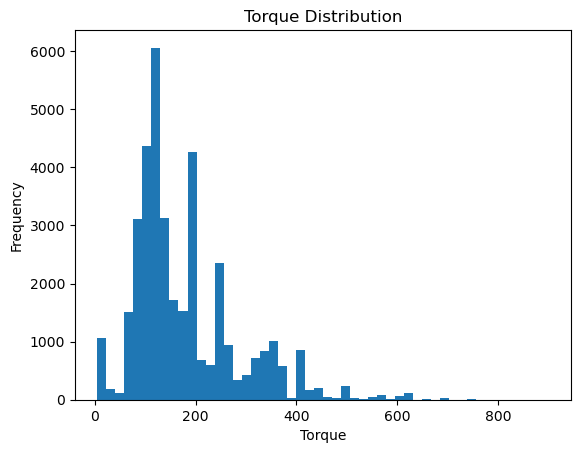

In [1022]:
df['Max Torque Delivered'].plot(kind='hist', bins=50, title='Torque Distribution')
plt.xlabel('Torque')
plt.show()

In [1023]:
df.body.unique()

array(['hatchback', 'sedan', 'muv', 'minivans', 'pickup trucks', 'suv',
       'luxury vehicles', 'convertibles', 'coupe', 'wagon', 'hybrids'],
      dtype=object)

In [1024]:
hb = df[df.body == 'hatchback']

In [1025]:
hb['Max Torque Delivered'].describe()

count    14920.000000
mean       110.495102
std         43.656207
min          4.800000
25%         90.000000
50%        110.000000
75%        114.700000
max        789.000000
Name: Max Torque Delivered, dtype: float64

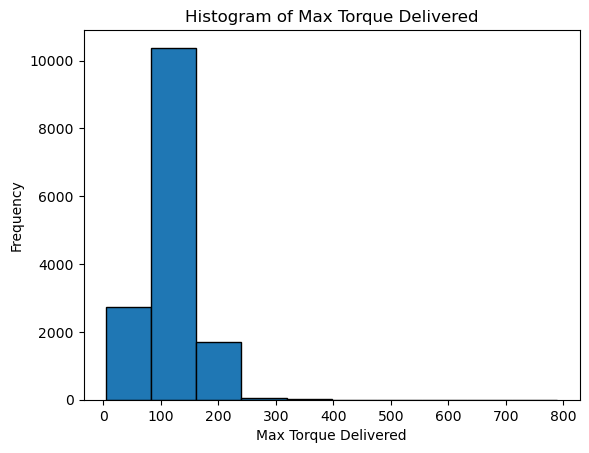

In [1026]:
plt.hist(hb['Max Torque Delivered'], bins=10, edgecolor='black')
plt.xlabel('Max Torque Delivered')
plt.ylabel('Frequency')
plt.title('Histogram of Max Torque Delivered')
plt.show()

# Greater than and equal to 250

In [1027]:
hb[hb['Max Torque Delivered'] >= 250]

,loc,myear,body,transmission,fuel,km,ip,imgCount,threesixty,dvn,oem,model,variant,City,listed_price,discountValue,utype,carType,top_features,comfort_features,interior_features,exterior_features,safety_features,Engine Type,No of Cylinder,Valves per Cylinder,Valve Configuration,Turbo Charger,Super Charger,Length,Width,Height,Wheel Base,Front Tread,Rear Tread,Kerb Weight,Gross Weight,Gear Box,Drive Type,Seats,Steering Type,Turning Radius,Front Brake Type,Rear Brake Type,Top Speed,Acceleration,Tyre Type,Doors,Cargo Volume,state,exterior_color,owner_type,Fuel Suppy System,Compression Ratio,Alloy Wheel Size,Ground Clearance Unladen,Max Power Delivered,Max Power At,Max Torque Delivered,Max Torque At,Bore,Stroke
1259,ashok vihar,2017,hatchback,automatic,electric,20000.0,0,35,False,mini cooper se electric,mini,mini cooper se,electric,new delhi,3690000.0,0,dealer,partner,"['power steering', 'power windows front', 'air...","['power steering', 'power windows front', 'pow...","['air conditioner', 'heater', 'adjustable stee...","['adjustable head lights', 'fog lights front',...","['anti lock braking system', 'brake assist', '...",NaN,0.0,0.0,NaN,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,7.30,NaN,5.0,211.0,delhi,red,first,NaN,NaN,17.0,NaN,181.03,NaN,270.0,1000.0,NaN,NaN
3111,NaN,2012,hatchback,manual,diesel,120000.0,0,6,False,toyota etios liva diesel trd sportivo,toyota,toyota etios liva,diesel trd sportivo,aurangabad,350000.0,0,individual,partner,[],[],[],[],[],turbocharged petrol engin,4.0,4.0,dohc,True,True,NaN,NaN,NaN,NaN,NaN,NaN,895.0,NaN,NaN,NaN,5.0,power,NaN,NaN,NaN,NaN,NaN,tubeless radial,5.0,NaN,maharashtra,white,second,Direct Injection,9.6,NaN,NaN,157.80,4500.0,250.0,3000.0,NaN,NaN
5446,NaN,2015,hatchback,manual,diesel,120000.0,0,2,False,volkswagen polo gt 1.5 tdi,volkswagen,volkswagen polo,gt 1.5 tdi,madurai,490000.0,0,individual,partner,"['power steering', 'power windows front', 'air...","['power steering', 'power windows front', 'pow...","['air conditioner', 'heater', 'adjustable stee...","['adjustable head lights', 'fog lights front',...","['anti lock braking system', 'centeral locking...",tdi diesel engine,4.0,4.0,dohc,True,True,3971.0,1682.0,1469.0,2469.0,1460.0,1456.0,1148.0,1620.0,5 speed,fwd,5.0,power,4.97,disc,drum,183.8,10.51,tubeless radial,5.0,280.0,tamil nadu,grey,first,Direct Injection,16.5,15.0,NaN,103.60,4400.0,250.0,2000.0,77.0,NaN
5463,gurgaon,2013,hatchback,manual,diesel,177852.0,0,12,False,volkswagen polo gt tdi,volkswagen,volkswagen polo,gt tdi,gurgaon,216778.0,0,dealer,partner,"['power steering', 'power windows front', 'air...","['power steering', 'power windows front', 'pow...","['air conditioner', 'heater', 'adjustable stee...","['adjustable head lights', 'fog lights front',...","['anti lock braking system', 'centeral locking...",tdi diesel engine,4.0,4.0,NaN,True,True,3970.0,1682.0,1453.0,2456.0,NaN,NaN,NaN,NaN,5 speed,fwd,5.0,power,4.97,disc,drum,NaN,NaN,tubeless radial,5.0,NaN,haryana,candy white,second,Common Rail Injection,NaN,15.0,NaN,103.60,4400.0,250.0,2000.0,NaN,NaN
5660,NaN,2013,hatchback,manual,diesel,90000.0,0,7,False,volkswagen polo gt tdi,volkswagen,volkswagen polo,gt tdi,hanumangarh,325000.0,0,individual,partner,"['power steering', 'power windows front', 'air...","['power steering', 'power windows front', 'pow...","['air conditioner', 'heater', 'adjustable stee...","['adjustable head lights', 'fog lights front',...","['anti lock braking system', 'centeral locking...",tdi diesel engine,4.0,4.0,NaN,True,True,3970.0,1682.0,1453.0,2456.0,NaN,NaN,NaN,NaN,5 speed,fwd,5.0,power,4.97,disc,drum,NaN,NaN,tubeless radial,5.0,NaN,rajasthan,gray,second,Common Rail Injection,NaN,15.0,NaN,103.60,4400.0,250.0,2000.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13558,

In [1028]:
hb[hb['Max Torque Delivered'] >= 250].loc[:, ['model','Max Torque Delivered']].drop_duplicates()

,model,Max Torque Delivered
1259,mini cooper se,270.0
3111,toyota etios liva,250.0
5446,volkswagen polo,250.0
6122,volkswagen gti,250.0
7363,mercedes-benz a class,250.0
7387,mercedes-benz a class,300.0
7826,mercedes-benz b class,250.0
7914,mercedes-benz b class,300.0
8027,mercedes-benz r-class,350.0
9083,bmw 1 series,320.0


In [1029]:
hb[hb.model == 'maruti zen'].loc[:, ['model','variant','Max Torque Delivered']] # Nm

,model,variant,Max Torque Delivered
15439,maruti zen,lx,78.0
17747,maruti zen,vxi,78.0
17976,maruti zen,vxi,78.0
18229,maruti zen,d ps,789.0
18242,maruti zen,2 door,78.0
18587,maruti zen,lxi,78.0
18679,maruti zen,vxi,78.0
18948,maruti zen,lxi,78.0
18951,maruti zen,lx,78.0
19218,maruti zen,lxi,78.0


In [1030]:
df[df.dvn == 'maruti zen d ps'].loc[:, 'Max Torque Delivered'] = 78

In [1031]:
hb[hb.model == 'mini 3 door'].loc[:, ['model','variant','Max Torque Delivered']] 
# No need for change. The values are correctly represented in Nm

,model,variant,Max Torque Delivered
13536,mini 3 door,cooper s,280.0
13543,mini 3 door,cooper s,280.0
13544,mini 3 door,cooper s,280.0
16651,mini 3 door,john cooper works 2019-2020,320.0


# Less than equal to 50

In [1032]:
hb[hb['Max Torque Delivered'] <= 50].loc[:, ['model','Max Torque Delivered']].drop_duplicates()

,model,Max Torque Delivered
224,bajaj re60,16.10
442,tata nano,45.00
989,maruti wagon r,7.80
997,hyundai santro xing,9.80
1037,tata indica,10.20
1048,maruti 800,5.70
4716,ford fusion,14.75
4724,ford fusion,16.00
6410,skoda fabia,13.50
8266,chevrolet spark,9.20


In [1033]:
hb[hb.model == 'maruti wagon r'].loc[:, ['model','Max Torque Delivered']].drop_duplicates()

,model,Max Torque Delivered
0,maruti wagon r,77.0
8,maruti wagon r,78.0
23,maruti wagon r,90.0
77,maruti wagon r,82.1
989,maruti wagon r,7.8
991,maruti wagon r,84.0
1012,maruti wagon r,85.0
13915,maruti wagon r,113.0
15452,maruti wagon r,8.6
16649,maruti wagon r,89.0


In [1034]:
hb[(hb.model == 'maruti wagon r') & (hb['Max Torque Delivered'] == 7.8)].loc[:, ['model','Max Torque Delivered']]

,model,Max Torque Delivered
989,maruti wagon r,7.8
995,maruti wagon r,7.8
1003,maruti wagon r,7.8
1006,maruti wagon r,7.8
1019,maruti wagon r,7.8
1032,maruti wagon r,7.8
1033,maruti wagon r,7.8
1044,maruti wagon r,7.8
1060,maruti wagon r,7.8
1068,maruti wagon r,7.8


In [1035]:
# maruti wagon r	7.80

ind = hb[(hb.model == 'maruti wagon r') & (hb['Max Torque Delivered'] == 7.8)].loc[:, ['model','Max Torque Delivered']].index.to_list()

for i in ind:
    df.loc[i, 'Max Torque Delivered'] = df.loc[i, 'Max Torque Delivered']*10

In [1036]:
df.loc[15452, ['dvn','Max Torque Delivered']]

dvn                     maruti wagon r lxi bsiii
Max Torque Delivered                         8.6
Name: 15452, dtype: object

In [1037]:
hb[(hb.model == 'maruti wagon r') & (hb['Max Torque Delivered'] == 8.6)].loc[:, ['model','Max Torque Delivered']]

,model,Max Torque Delivered
15452,maruti wagon r,8.6
16331,maruti wagon r,8.6
22646,maruti wagon r,8.6
22751,maruti wagon r,8.6
23656,maruti wagon r,8.6
36649,maruti wagon r,8.6


In [1038]:
# maruti wagon r lxi bsii  8.6

ind = hb[(hb.model == 'maruti wagon r') & (hb['Max Torque Delivered'] == 8.6)].loc[:, ['model','Max Torque Delivered']].index.to_list()

for i in ind:
    df.loc[i, 'Max Torque Delivered'] = df.loc[i, 'Max Torque Delivered']*10

In [1039]:
df.loc[13915, ['dvn','Max Torque Delivered']]

dvn                     maruti wagon r zxi amt 1.2
Max Torque Delivered                         113.0
Name: 13915, dtype: object

In [1040]:
hb[hb.model == 'hyundai santro xing'].loc[:, ['model','Max Torque Delivered']].drop_duplicates()

,model,Max Torque Delivered
115,hyundai santro xing,NaN
279,hyundai santro xing,96.1
997,hyundai santro xing,9.8


In [1041]:
hb[hb.model == 'hyundai santro xing'].loc[:, ['dvn','Max Torque Delivered']].drop_duplicates()

,dvn,Max Torque Delivered
115,hyundai santro xing gl plus cng,NaN
279,hyundai santro xing gls cng,96.1
308,hyundai santro xing gl cng,NaN
993,hyundai santro xing gls lpg,96.1
996,hyundai santro xing gl plus lpg,96.1
997,hyundai santro xing gl lpg,9.8
1028,hyundai santro xing gls audio lpg,9.8
1030,hyundai santro xing eco,NaN
13865,hyundai santro xing gls,96.1
13977,hyundai santro xing gl plus,96.1


In [1042]:
df[(df.model == 'hyundai santro xing') & (df['Max Torque Delivered'].isna())]

,loc,myear,body,transmission,fuel,km,ip,imgCount,threesixty,dvn,oem,model,variant,City,listed_price,discountValue,utype,carType,top_features,comfort_features,interior_features,exterior_features,safety_features,Engine Type,No of Cylinder,Valves per Cylinder,Valve Configuration,Turbo Charger,Super Charger,Length,Width,Height,Wheel Base,Front Tread,Rear Tread,Kerb Weight,Gross Weight,Gear Box,Drive Type,Seats,Steering Type,Turning Radius,Front Brake Type,Rear Brake Type,Top Speed,Acceleration,Tyre Type,Doors,Cargo Volume,state,exterior_color,owner_type,Fuel Suppy System,Compression Ratio,Alloy Wheel Size,Ground Clearance Unladen,Max Power Delivered,Max Power At,Max Torque Delivered,Max Torque At,Bore,Stroke
115,NaN,2014,hatchback,manual,cng,100000.0,0,3,False,hyundai santro xing gl plus cng,hyundai,hyundai santro xing,gl plus cng,rajkot,270000.0,0,individual,partner,[],[],[],[],[],NaN,4.0,4.0,NaN,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,power,NaN,NaN,NaN,NaN,NaN,tubeless radial,5.0,NaN,gujarat,white,first,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
188,NaN,2009,hatchback,manual,cng,100000.0,0,3,False,hyundai santro xing gl plus cng,hyundai,hyundai santro xing,gl plus cng,meerut,90000.0,0,individual,partner,[],[],[],[],[],NaN,4.0,4.0,NaN,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,power,NaN,NaN,NaN,NaN,NaN,tubeless radial,5.0,NaN,uttar pradesh,silver,fourth,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
295,NaN,2015,hatchback,manual,cng,140000.0,0,8,False,hyundai santro xing gl plus cng,hyundai,hyundai santro xing,gl plus cng,amroha,294000.0,0,individual,partner,[],[],[],[],[],NaN,4.0,4.0,NaN,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,power,NaN,NaN,NaN,NaN,NaN,tubeless radial,5.0,NaN,uttar pradesh,white,first,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
308,NaN,2012,hatchback,manual,cng,100000.0,0,1,False,hyundai santro xing gl cng,hyundai,hyundai santro xing,gl cng,meerut,190000.0,0,individual,partner,[],[],[],[],[],NaN,4.0,4.0,NaN,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,power,NaN,NaN,NaN,NaN,NaN,tubeless radial,5.0,NaN,uttar pradesh,white,first,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320,NaN,2011,hatchback,manual,cng,50000.0,0,7,False,hyundai santro xing gl plus cng,hyundai,hyundai santro xing,gl plus cng,nanded,130000.0,0,individual,partner,[],[],[],[],[],NaN,4.0,4.0,NaN,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,power,NaN,NaN,NaN,NaN,NaN,tubeless radial,5.0,NaN,maharashtra,silver,second,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
329,NaN,2011,hatchback,manual,cng,70000.0,0,1,False,hyundai santro xing gl plus cng,hyundai,hyundai santro xing,gl plus cng,sampla,120000.0,0,individual,partner,[],[],[],[],[],NaN,4.0,4.0,NaN,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,power,NaN,NaN,NaN,NaN,NaN,tubeless radial,5.0,NaN,haryana,white,first,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
350,NaN,2012,hatchback,manual,cng,90000.0,0,1,False,hyundai santro xing gl plus cng,hyundai,hyundai santro xing,gl plus cng,noida,150000.0,0,individual,partner,[],[],[],[],[],NaN,4.0,4.0,NaN,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,power,NaN,NaN,NaN,NaN,NaN,tubeless radial,5.0,NaN,uttar pradesh,other,third,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
364,NaN,2011,hatchback,manual,cng,94500.0,0,11,False,hyundai santro xing gl plus cng,hyundai,hyundai santro xing,gl plus cng,sonipat,170000.0,0,individual,partner,[],[],[],[],[],NaN,4.0,4.0,NaN,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,power,NaN,NaN,NaN,NaN,NaN,tubeless radial,5.0,NaN,haryana,white,second,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
404,NaN,2009,hatchback,manual,cng,100000.0,0,6,False,hyundai santro xing gl cng,hyundai,hyundai santro xing,gl cng,mehsana,160000.0,0,individual,partner,[],[],[],[],[],NaN,4.0,4.0,NaN,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,power,NaN,NaN,NaN,NaN,NaN,tubeless radial,5.0,NaN,gujarat,white,second,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
438,NaN,2009,hatchback,manual,cng,80000.0,0,11,False,

In [1043]:
ind = df[(df.model == 'hyundai santro xing') & (df['Max Torque Delivered'].isna())].index.to_list()

for i in ind:
    df.loc[i, 'Max Torque Delivered'] = 98

In [1044]:
df[(df.model == 'hyundai santro xing') & (df['Max Torque Delivered'] == 9.8)].loc[:, ['model','Max Torque Delivered']]

,model,Max Torque Delivered
997,hyundai santro xing,9.8
1007,hyundai santro xing,9.8
1021,hyundai santro xing,9.8
1022,hyundai santro xing,9.8
1028,hyundai santro xing,9.8
1067,hyundai santro xing,9.8
1071,hyundai santro xing,9.8
1079,hyundai santro xing,9.8
1100,hyundai santro xing,9.8
1126,hyundai santro xing,9.8


In [1045]:
ind = df[(df.model == 'hyundai santro xing') & (df['Max Torque Delivered'] == 9.8)].loc[:, ['model','Max Torque Delivered']].index.to_list()

for i in ind:
    df.loc[i, 'Max Torque Delivered'] = df.loc[i, 'Max Torque Delivered']*10

In [1046]:
df[(df.model == 'hyundai santro xing') & (df['Max Torque Delivered'] == 9.8)].loc[:, ['model','Max Torque Delivered']]

,model,Max Torque Delivered


In [1047]:
hb[hb.model == 'tata indica'].loc[:, ['model','Max Torque Delivered']].drop_duplicates()

,model,Max Torque Delivered
1037,tata indica,10.2
14415,tata indica,190.0
15504,tata indica,8.5
17458,tata indica,140.0
17696,tata indica,96.0
18074,tata indica,135.4
19546,tata indica,NaN
19620,tata indica,85.0
23010,tata indica,135.0
29850,tata indica,12.4


In [1048]:
hb[hb.model == 'tata indica'].loc[:, ['dvn','Max Torque Delivered']].drop_duplicates()

,dvn,Max Torque Delivered
1037,tata indica lpg gle,10.2
14415,tata indica aura 1.3 quadrajet (abs),190.0
14426,tata indica quadrajet vx,190.0
14560,tata indica aqua 1.3 quadrajet,190.0
15038,tata indica terra quadrajet 1.3l,190.0
15504,tata indica dls,8.5
15838,tata indica aqua 1.3 quadrajet bsiv,190.0
16454,tata indica gls,10.2
17458,tata indica elx,140.0
17696,tata indica terra safire bs iii,96.0


In [1049]:
df[df.dvn == "tata indica lpg gle"].loc[:, 'Max Torque Delivered']

1037    10.2
Name: Max Torque Delivered, dtype: float64

In [1050]:
df.loc[1037, 'Max Torque Delivered'] = df.loc[1037, 'Max Torque Delivered']*10

In [1051]:
df[df.dvn == "tata indica dls"].loc[:, 'Max Torque Delivered']

15504    8.5
23011    8.5
23238    8.5
Name: Max Torque Delivered, dtype: float64

In [1052]:
ind = df[df.dvn == "tata indica dls"].loc[:, 'Max Torque Delivered'].index.to_list()

for i in ind:
    df.loc[i, 'Max Torque Delivered'] = df.loc[i, 'Max Torque Delivered']*10

In [1053]:
df[df.dvn == "tata indica gls"].loc[:, 'Max Torque Delivered']

16454    10.2
37752    10.2
37756    10.2
Name: Max Torque Delivered, dtype: float64

In [1054]:
ind = df[df.dvn == "tata indica gls"].loc[:, 'Max Torque Delivered'].index.to_list()

for i in ind:
    df.loc[i, 'Max Torque Delivered'] = df.loc[i, 'Max Torque Delivered']*10

In [1055]:
df[df.dvn == "tata indica lgi bsii"].loc[:, 'Max Torque Delivered']

21773    8.5
Name: Max Torque Delivered, dtype: float64

In [1056]:
df.loc[21773, 'Max Torque Delivered'] = df.loc[21773, 'Max Torque Delivered']*10

In [1057]:
df[df.dvn == "tata indica glx bsiii"].loc[:, 'Max Torque Delivered']

29850    12.4
Name: Max Torque Delivered, dtype: float64

In [1058]:
df.loc[29850, 'Max Torque Delivered'] = df.loc[29850, 'Max Torque Delivered']*10

In [1059]:
df[df.dvn == "tata indica dlg"].loc[:, 'Max Torque Delivered']

37790    14.3
Name: Max Torque Delivered, dtype: float64

In [1060]:
df.loc[37790, 'Max Torque Delivered'] = df.loc[37790, 'Max Torque Delivered']*10

In [1061]:
df[df.dvn == 'tata indica aqua 1.3 quadrajet (abs)'].loc[:, 'Max Torque Delivered']

19546   NaN
Name: Max Torque Delivered, dtype: float64

In [1062]:
df.loc[19546, 'Max Torque Delivered'] = 190

In [1063]:
df[df.dvn == 'tata indica aqua 1.3 quadrajet (abs)'].loc[:, 'Max Torque Delivered']

19546    190.0
Name: Max Torque Delivered, dtype: float64

In [1064]:
df[df.dvn == 'tata indica aqua 1.3 quadrajet abs bsiv'].loc[:, 'Max Torque Delivered']

23285   NaN
Name: Max Torque Delivered, dtype: float64

In [1065]:
df.loc[23285, 'Max Torque Delivered'] = 190

In [1066]:
hb[hb.model == 'maruti 800'].loc[:, ['model', 'Max Torque Delivered']]

,model,Max Torque Delivered
1048,maruti 800,5.7
1062,maruti 800,5.7
14436,maruti 800,59.0
15937,maruti 800,59.0
16098,maruti 800,59.0
16227,maruti 800,59.0
16446,maruti 800,59.0
18012,maruti 800,59.0
18119,maruti 800,59.0
18295,maruti 800,59.0


In [1067]:
df.loc[1048, 'Max Torque Delivered'] = 57
df.loc[1062, 'Max Torque Delivered'] = 57

In [1068]:
hb[hb.model == 'ford fusion'].loc[:, ['dvn', 'Max Torque Delivered']]

,dvn,Max Torque Delivered
4716,ford fusion 1.6 duratec petrol,14.75
4724,ford fusion plus 1.4 tdci abs,16.00
4799,ford fusion 1.4 tdci diesel,16.00
4800,ford fusion 1.4 tdci diesel,16.00


In [1069]:
df.loc[4716, 'Max Torque Delivered'] = 147.5
df.loc[4724, 'Max Torque Delivered'] = 157
df.loc[4799, 'Max Torque Delivered'] = 157
df.loc[4800, 'Max Torque Delivered'] = 157

In [1070]:
hb[hb.model == 'skoda fabia'].loc[:, ['model', 'Max Torque Delivered']].drop_duplicates()

,model,Max Torque Delivered
6350,skoda fabia,180.0
6365,skoda fabia,153.0
6410,skoda fabia,13.5
6426,skoda fabia,110.0
6451,skoda fabia,155.0
6497,skoda fabia,108.0


In [1071]:
hb[hb.model == 'skoda fabia'].loc[:, ['dvn', 'Max Torque Delivered']].drop_duplicates()

,dvn,Max Torque Delivered
6350,skoda fabia 1.2l diesel elegance,180.0
6365,skoda fabia 1.6 mpi elegance,153.0
6410,skoda fabia 1.4 mpi ambiente,13.5
6426,skoda fabia 1.2 mpi ambition plus,110.0
6451,skoda fabia 1.4 tdi ambiente,155.0
6453,skoda fabia 1.2 mpi ambiente petrol,110.0
6497,skoda fabia 1.2 mpi classic,108.0
6515,skoda fabia 1.2 tdi ambition plus,180.0
6579,skoda fabia 1.2 mpi ambition,110.0
6590,skoda fabia 1.2 mpi active plus,110.0


In [1072]:
df[(df.model == 'skoda fabia') & (df['Max Torque Delivered'] == 13.5)].index

Index([6410, 6577, 7024, 7110], dtype='int64')

In [1073]:
ind = df[(df.model == 'skoda fabia') & (df['Max Torque Delivered'] == 13.5)].index.to_list()

for i in ind:
    df.loc[i, 'Max Torque Delivered'] = 135

In [1074]:
hb[hb.model == 'chevrolet spark'].loc[:, ['model', 'Max Torque Delivered']].drop_duplicates()

,model,Max Torque Delivered
1016,chevrolet spark,88.4
1102,chevrolet spark,90.3
8266,chevrolet spark,9.2


In [1075]:
hb[hb.model == 'chevrolet spark'].loc[:, ['dvn', 'Max Torque Delivered']].drop_duplicates()

,dvn,Max Torque Delivered
1016,chevrolet spark 1.0 ls lpg,88.4
1102,chevrolet spark 1.0 ls lpg,90.3
1120,chevrolet spark 1.0 ps lpg,88.4
8230,chevrolet spark 1.0 ls,90.3
8237,chevrolet spark 1.0 lt,90.3
8247,chevrolet spark 1.0,90.3
8250,chevrolet spark 1.0 ps,90.3
8266,chevrolet spark 1.0 e,9.2
8429,chevrolet spark 1.0 lt option pack,90.3
8478,chevrolet spark muzic 1.0 ls,90.3


In [1076]:
df[(df.model == 'chevrolet spark') & (df['Max Torque Delivered']== 9.2)].index

Index([8266, 8321, 8420, 8472, 8544, 8561, 8563, 8911, 8929], dtype='int64')

In [1077]:
ind = df[(df.model == 'chevrolet spark') & (df['Max Torque Delivered']== 9.2)].index.to_list()

for i in ind:
    df.loc[i, 'Max Torque Delivered'] = 92

In [1078]:
hb[hb.model == 'chevrolet aveo u-va'].loc[:, ['model', 'Max Torque Delivered']].drop_duplicates()

,model,Max Torque Delivered
8281,chevrolet aveo u-va,11.2
8338,chevrolet aveo u-va,110.0


In [1079]:
hb[hb.model == 'chevrolet aveo u-va'].loc[:, ['dvn', 'Max Torque Delivered']].drop_duplicates()

,dvn,Max Torque Delivered
8281,chevrolet aveo u-va 1.2,11.2
8282,chevrolet aveo u-va 1.2 lt,11.2
8338,chevrolet aveo u-va 1.2 ls,110.0
8368,chevrolet aveo u-va 1.2 ls techno,110.0


In [1080]:
df[(df.model == 'chevrolet aveo u-va') & (df['Max Torque Delivered']== 11.2)].index

Index([8281, 8282, 8297, 8312, 8559, 8721, 8723, 8728, 8730, 8751, 8812, 8839,
       8862, 8897, 8952, 8965, 8968, 9037, 9039],
      dtype='int64')

In [1081]:
ind = df[(df.model == 'chevrolet aveo u-va') & (df['Max Torque Delivered']== 11.2)].index

for i in ind:
    df.loc[i, 'Max Torque Delivered'] = 110

In [1082]:
hb[hb.model == 'fiat palio'].loc[:, ['dvn', 'Max Torque Delivered']].drop_duplicates()

,dvn,Max Torque Delivered
12828,fiat palio 1.1 slx,9.4
12875,fiat palio 1.2 elx,NaN
12978,fiat palio 1.6 sport,14.0
13054,fiat palio 1.3 sde,184.0


In [1083]:
df[(df.dvn == 'fiat palio 1.1 slx') & (df['Max Torque Delivered']== 9.4)].index

Index([12828, 12911], dtype='int64')

In [1084]:
ind = df[(df.dvn == 'fiat palio 1.1 slx') & (df['Max Torque Delivered']== 9.4)].index.to_list()

for i in ind:
    df.loc[i, 'Max Torque Delivered'] = 92

In [1085]:
df[(df.dvn == 'fiat palio 1.6 sport') & (df['Max Torque Delivered']== 14)].index

Index([12978], dtype='int64')

In [1086]:
df.loc[12978, 'Max Torque Delivered'] = 137

In [1087]:
df[df.dvn == 'fiat palio 1.2 elx'].index

Index([12875, 12900], dtype='int64')

In [1088]:
df.loc[12875, 'Max Torque Delivered'] = 102
df.loc[12900, 'Max Torque Delivered'] = 102

In [1089]:
hb[hb.model == 'hyundai i20'].loc[:, ['model', 'Max Torque Delivered']].drop_duplicates()

,model,Max Torque Delivered
13649,hyundai i20,11.40
13656,hyundai i20,114.70
13707,hyundai i20,113.70
13713,hyundai i20,117.00
13742,hyundai i20,219.70
13884,hyundai i20,171.62
13895,hyundai i20,113.80
14173,hyundai i20,240.26
14413,hyundai i20,22.40
14438,hyundai i20,219.60


In [1090]:
df[(df.model == 'hyundai i20') & (df['Max Torque Delivered'] == 11.4)].loc[:, ['dvn', 'Max Torque Delivered']].drop_duplicates()

,dvn,Max Torque Delivered
13649,hyundai i20 1.2 asta,11.4
14030,hyundai i20 1.2 sportz,11.4
14102,hyundai i20 magna,11.4
14387,hyundai i20 asta,11.4
14462,hyundai i20 1.2 magna,11.4
15044,hyundai i20 sportz petrol,11.4
15089,hyundai i20 1.2 magna opt,11.4
15270,hyundai i20 1.2 sportz option,11.4
15392,hyundai i20 asta optional with sunroof 1.2,11.4
15971,hyundai i20 sportz option,11.4


In [1091]:
ind = df[(df.model=='hyundai i20') & (df['Max Torque Delivered'] == 11.4)].index.to_list()

for i in ind:
    df.loc[i, 'Max Torque Delivered'] = 114

In [1092]:
df[(df.model == 'hyundai i20') & (df['Max Torque Delivered'] == 22.4)].loc[:, ['dvn', 'Max Torque Delivered']].drop_duplicates()

,dvn,Max Torque Delivered
14413,hyundai i20 asta 1.4 crdi (diesel),22.4
14952,hyundai i20 1.4 crdi sportz,22.4
15870,hyundai i20 1.4 crdi asta with avn,22.4
15996,hyundai i20 1.4 magna opt diesel,22.4
17621,hyundai i20 1.4 crdi asta,22.4
19682,hyundai i20 magna 1.4 crdi,22.4
19807,hyundai i20 1.4 crdi magna,22.4
21759,hyundai i20 1.4 magna abs,22.4
23349,hyundai i20 asta (o) 1.4 crdi (diesel),22.4
23519,hyundai i20 1.4 crdi era,22.4


In [1093]:
ind = df[(df.model=='hyundai i20') & (df['Max Torque Delivered'] == 22.4)].index.to_list()

for i in ind:
    df.loc[i, 'Max Torque Delivered'] = 220

In [1094]:
# Remaining hyundai i20 nan values followed by completing less than 50 set
# Finally checking for values from 51 to 249

In [1095]:
df[(df.model == "hyundai i20") & (df['Max Torque Delivered'].isna())]

,loc,myear,body,transmission,fuel,km,ip,imgCount,threesixty,dvn,oem,model,variant,City,listed_price,discountValue,utype,carType,top_features,comfort_features,interior_features,exterior_features,safety_features,Engine Type,No of Cylinder,Valves per Cylinder,Valve Configuration,Turbo Charger,Super Charger,Length,Width,Height,Wheel Base,Front Tread,Rear Tread,Kerb Weight,Gross Weight,Gear Box,Drive Type,Seats,Steering Type,Turning Radius,Front Brake Type,Rear Brake Type,Top Speed,Acceleration,Tyre Type,Doors,Cargo Volume,state,exterior_color,owner_type,Fuel Suppy System,Compression Ratio,Alloy Wheel Size,Ground Clearance Unladen,Max Power Delivered,Max Power At,Max Torque Delivered,Max Torque At,Bore,Stroke
15568,bandra west,2014,hatchback,automatic,petrol,35000.0,0,11,False,hyundai i20 new sportz at 1.4,hyundai,hyundai i20,new sportz at 1.4,mumbai,475000.0,0,dealer,partner,[],[],[],[],[],NaN,4.0,4.0,NaN,True,True,NaN,NaN,NaN,NaN,NaN,NaN,1065.0,NaN,NaN,NaN,5.0,power,NaN,NaN,NaN,NaN,NaN,tubeless radial,5.0,NaN,maharashtra,blue,first,NaN,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1096]:
df.loc[15568, 'Max Torque Delivered'] = 114.7

In [1097]:
df[df.model == "maruti swift"].loc[:, ['model', 'Max Torque Delivered']].drop_duplicates()

,model,Max Torque Delivered
899,maruti swift,98.5
13669,maruti swift,190.0
13670,maruti swift,113.0
13878,maruti swift,114.0
14091,maruti swift,11.5
14659,maruti swift,NaN
30283,maruti swift,115.0


In [1098]:
df[(df.model == "maruti swift") & (df['Max Torque Delivered'] == 11.5)].loc[:, ['dvn', 'Max Torque Delivered']].drop_duplicates()

,dvn,Max Torque Delivered
14091,maruti swift 1.3 vxi,11.5
14164,maruti swift vxi bsiii,11.5
14870,maruti swift lxi bsiii,11.5
14972,maruti swift zxi bsiii,11.5
15546,maruti swift 1.3 zxi,11.5
16135,maruti swift 1.3 lxi,11.5
17225,maruti swift glam,11.5
24339,maruti swift vxi bsiii w/ abs,11.5
24459,maruti swift zxi abs,11.5


In [1099]:
ind = df[(df.model == "maruti swift") & (df['Max Torque Delivered'] == 11.5)].loc[:, ['dvn', 'Max Torque Delivered']].index.to_list()

for i in ind:
    df.loc[i, 'Max Torque Delivered'] = 115

In [1100]:
df[(df.model == "maruti swift") & (df['Max Torque Delivered'].isna())].loc[:, ['dvn', 'Max Torque Delivered']]

,dvn,Max Torque Delivered
14659,maruti swift vdi bsiv,NaN
15922,maruti swift vdi bsiv,NaN
16166,maruti swift vdi bsiv,NaN
16466,maruti swift vdi bsiv,NaN
17525,maruti swift vdi bsiv w abs,NaN
21204,maruti swift vdi bsiv,NaN
22008,maruti swift vdi bsiv,NaN
23025,maruti swift vdi bsiv,NaN
23618,maruti swift vdi bsiv,NaN
23684,maruti swift vdi bsiv,NaN


In [1101]:
df.loc[17525, 'Max Torque Delivered'] = 190

In [1102]:
ind = df[(df.model == "maruti swift") & (df['Max Torque Delivered'].isna())].\
loc[:, ['dvn', 'Max Torque Delivered', 'fuel']].index.to_list()

for i in ind:
    df.loc[i, 'Max Torque Delivered'] = 190

In [1103]:
df[df.model == "hyundai getz"].loc[:, ['model', 'Max Torque Delivered']].drop_duplicates()

,model,Max Torque Delivered
14930,hyundai getz,10.4
17663,hyundai getz,115.0
21126,hyundai getz,11.8
23312,hyundai getz,24.0


In [1104]:
df[df.model == "hyundai getz"].loc[:, ['dvn', 'Max Torque Delivered']].drop_duplicates()

,dvn,Max Torque Delivered
14930,hyundai getz 1.1 gvs,10.4
16895,hyundai getz 1.1 gle,10.4
17663,hyundai getz gls,115.0
21126,hyundai getz 1.3 gls,11.8
23312,hyundai getz 1.5 crdi gvs,24.0
24843,hyundai getz 1.1 gvs option,10.4
24847,hyundai getz gvs,115.0
28575,hyundai getz gle,115.0


In [1105]:
df[(df.dvn == "hyundai getz 1.1 gle") & (df['Max Torque Delivered'] == 10.4)]

,loc,myear,body,transmission,fuel,km,ip,imgCount,threesixty,dvn,oem,model,variant,City,listed_price,discountValue,utype,carType,top_features,comfort_features,interior_features,exterior_features,safety_features,Engine Type,No of Cylinder,Valves per Cylinder,Valve Configuration,Turbo Charger,Super Charger,Length,Width,Height,Wheel Base,Front Tread,Rear Tread,Kerb Weight,Gross Weight,Gear Box,Drive Type,Seats,Steering Type,Turning Radius,Front Brake Type,Rear Brake Type,Top Speed,Acceleration,Tyre Type,Doors,Cargo Volume,state,exterior_color,owner_type,Fuel Suppy System,Compression Ratio,Alloy Wheel Size,Ground Clearance Unladen,Max Power Delivered,Max Power At,Max Torque Delivered,Max Torque At,Bore,Stroke
16895,gurgaon,2008,hatchback,manual,petrol,118447.0,0,18,False,hyundai getz 1.1 gle,hyundai,hyundai getz,1.1 gle,gurgaon,65000.0,0,dealer,partner,"['power steering', 'remote fuel lid opener', '...","['power steering', 'remote fuel lid opener', '...","['air conditioner', 'heater', 'adjustable stee...","['adjustable head lights', 'manually adjustabl...","['child safety locks', 'day night rear view mi...",in-line engine,4.0,3.0,NaN,False,False,3825.0,1665.0,1515.0,2455.0,1450.0,1440.0,995.0,1450.0,5 speed,NaN,5.0,power,5.0,ventilated disc,drum,148.0,17.8,tubeless radial,4.0,290.0,haryana,silver,third,Multi-Point Fuel Injection,8.9,13.0,NaN,66.6,NaN,10.4,NaN,66.0,NaN
24834,NaN,2008,hatchback,manual,petrol,28200.0,0,5,False,hyundai getz 1.1 gle,hyundai,hyundai getz,1.1 gle,bangalore,170000.0,0,individual,partner,"['power steering', 'remote fuel lid opener', '...","['power steering', 'remote fuel lid opener', '...","['air conditioner', 'heater', 'adjustable stee...","['adjustable head lights', 'manually adjustabl...","['child safety locks', 'day night rear view mi...",in-line engine,4.0,3.0,NaN,False,False,3825.0,1665.0,1515.0,2455.0,1450.0,1440.0,995.0,1450.0,5 speed,NaN,5.0,power,5.0,ventilated disc,drum,148.0,17.8,tubeless radial,4.0,290.0,karnataka,red,first,Multi-Point Fuel Injection,8.9,13.0,NaN,66.6,NaN,10.4,NaN,66.0,NaN


In [1106]:
df.loc[16895, 'Max Torque Delivered'] = 102
df.loc[24834, 'Max Torque Delivered'] = 102

In [1107]:
df[(df.dvn == "hyundai getz 1.1 gvs") & (df['Max Torque Delivered'] == 10.4)]

,loc,myear,body,transmission,fuel,km,ip,imgCount,threesixty,dvn,oem,model,variant,City,listed_price,discountValue,utype,carType,top_features,comfort_features,interior_features,exterior_features,safety_features,Engine Type,No of Cylinder,Valves per Cylinder,Valve Configuration,Turbo Charger,Super Charger,Length,Width,Height,Wheel Base,Front Tread,Rear Tread,Kerb Weight,Gross Weight,Gear Box,Drive Type,Seats,Steering Type,Turning Radius,Front Brake Type,Rear Brake Type,Top Speed,Acceleration,Tyre Type,Doors,Cargo Volume,state,exterior_color,owner_type,Fuel Suppy System,Compression Ratio,Alloy Wheel Size,Ground Clearance Unladen,Max Power Delivered,Max Power At,Max Torque Delivered,Max Torque At,Bore,Stroke
14930,ahmedabad,2008,hatchback,manual,petrol,64642.0,0,12,False,hyundai getz 1.1 gvs,hyundai,hyundai getz,1.1 gvs,ahmedabad,143486.0,0,dealer,partner,"['power steering', 'power windows front', 'air...","['power steering', 'power windows front', 'pow...","['air conditioner', 'heater', 'adjustable stee...","['adjustable head lights', 'manually adjustabl...","['centeral locking', 'child safety locks', 'da...",in-line engine,4.0,3.0,NaN,False,False,3825.0,1665.0,1515.0,2455.0,1450.0,1440.0,995.0,1450.0,5 speed,NaN,5.0,power,5.0,ventilated disc,drum,148.0,17.8,tubeless radial,4.0,290.0,gujarat,bright silver,second,Multi-Point Fuel Injection,8.9,13.0,NaN,66.6,NaN,10.4,NaN,66.0,NaN
21921,rajkot city,2009,hatchback,manual,petrol,122236.0,0,10,False,hyundai getz 1.1 gvs,hyundai,hyundai getz,1.1 gvs,rajkot,100000.0,0,dealer,partner,"['power steering', 'power windows front', 'air...","['power steering', 'power windows front', 'pow...","['air conditioner', 'heater', 'adjustable stee...","['adjustable head lights', 'manually adjustabl...","['centeral locking', 'child safety locks', 'da...",in-line engine,4.0,3.0,NaN,False,False,3825.0,1665.0,1515.0,2455.0,1450.0,1440.0,995.0,1450.0,5 speed,NaN,5.0,power,5.0,ventilated disc,drum,148.0,17.8,tubeless radial,4.0,290.0,gujarat,white,fifth,Multi-Point Fuel Injection,8.9,13.0,NaN,66.6,NaN,10.4,NaN,66.0,NaN
28612,pune city,2008,hatchback,manual,petrol,69647.0,0,18,False,hyundai getz 1.1 gvs,hyundai,hyundai getz,1.1 gvs,pune,110000.0,0,dealer,partner,"['power steering', 'power windows front', 'air...","['power steering', 'power windows front', 'pow...","['air conditioner', 'heater', 'adjustable stee...","['adjustable head lights', 'manually adjustabl...","['centeral locking', 'child safety locks', 'da...",in-line engine,4.0,3.0,NaN,False,False,3825.0,1665.0,1515.0,2455.0,1450.0,1440.0,995.0,1450.0,5 speed,NaN,5.0,power,5.0,ventilated disc,drum,148.0,17.8,tubeless radial,4.0,290.0,maharashtra,blue onyx,second,Multi-Point Fuel Injection,8.9,13.0,NaN,66.6,NaN,10.4,NaN,66.0,NaN
37128,pune r.s.,2008,hatchback,manual,petrol,35600.0,0,9,False,hyundai getz 1.1 gvs,hyundai,hyundai getz,1.1 gvs,pune,165000.0,0,dealer,partner,"['power steering', 'power windows front', 'air...","['power steering', 'power windows front', 'pow...","['air conditioner', 'heater', 'adjustable stee...","['adjustable head lights', 'manually adjustabl...","['centeral locking', 'child safety locks', 'da...",in-line engine,4.0,3.0,NaN,False,False,3825.0,1665.0,1515.0,2455.0,1450.0,1440.0,995.0,1450.0,5 speed,NaN,5.0,power,5.0,ventilated disc,drum,148.0,17.8,tubeless radial,4.0,290.0,maharashtra,silver,second,Multi-Point Fuel Injection,8.9,13.0,NaN,66.6,NaN,10.4,NaN,66.0,NaN
37448,pune city,2008,hatchback,manual,petrol,182625.0,0,10,False,hyundai getz 1.1 gvs,hyundai,hyundai getz,1.1 gvs,pune,140000.0,0,dealer,partner,"['power steering', 'power windows front', 'air...","['power steering', 'power windows front', 'pow...","['air conditioner', 'heater', 'adjustable stee...","['adjustable head lights', 'manually adjustabl...","['centeral locking', 'child safety locks', 'da...",in-line engine,4.0,3.0,NaN,False,False,3825.0,1665.0,1515.0,2455.0,1450.0,1440.0,995.0,1450.0,5 speed,NaN,5.0,power,5.0,ventilated disc,drum,148.0,17.8,tubeless radial

In [1108]:
ind = df[(df.dvn == "hyundai getz 1.1 gvs") & (df['Max Torque Delivered'] == 10.4)].index.to_list()

for i in ind:
    df.loc[i, 'Max Torque Delivered'] = 102

In [1109]:
df[(df.dvn == "hyundai getz 1.1 gvs option") & (df['Max Torque Delivered'] == 10.4)]

,loc,myear,body,transmission,fuel,km,ip,imgCount,threesixty,dvn,oem,model,variant,City,listed_price,discountValue,utype,carType,top_features,comfort_features,interior_features,exterior_features,safety_features,Engine Type,No of Cylinder,Valves per Cylinder,Valve Configuration,Turbo Charger,Super Charger,Length,Width,Height,Wheel Base,Front Tread,Rear Tread,Kerb Weight,Gross Weight,Gear Box,Drive Type,Seats,Steering Type,Turning Radius,Front Brake Type,Rear Brake Type,Top Speed,Acceleration,Tyre Type,Doors,Cargo Volume,state,exterior_color,owner_type,Fuel Suppy System,Compression Ratio,Alloy Wheel Size,Ground Clearance Unladen,Max Power Delivered,Max Power At,Max Torque Delivered,Max Torque At,Bore,Stroke
24843,banaswadi,2007,hatchback,manual,petrol,41000.0,0,12,False,hyundai getz 1.1 gvs option,hyundai,hyundai getz,1.1 gvs option,bangalore,245000.0,0,dealer,partner,"['power steering', 'power windows front', 'air...","['power steering', 'power windows front', 'pow...","['air conditioner', 'heater', 'adjustable stee...","['adjustable head lights', 'manually adjustabl...","['centeral locking', 'child safety locks', 'da...",in-line engine,4.0,3.0,NaN,False,False,3825.0,1665.0,1515.0,2455.0,1450.0,1440.0,995.0,1450.0,5 speed,NaN,5.0,power,5.0,ventilated disc,drum,148.0,17.8,tubeless radial,5.0,290.0,karnataka,red,second,Multi-Point Fuel Injection,8.9,13.0,NaN,66.6,NaN,10.4,NaN,66.0,NaN


In [1110]:
df.loc[24843, 'Max Torque Delivered'] = 102

In [1111]:
df[(df.dvn == "hyundai getz 1.5 crdi gvs") & (df['Max Torque Delivered'] == 24.0)]

,loc,myear,body,transmission,fuel,km,ip,imgCount,threesixty,dvn,oem,model,variant,City,listed_price,discountValue,utype,carType,top_features,comfort_features,interior_features,exterior_features,safety_features,Engine Type,No of Cylinder,Valves per Cylinder,Valve Configuration,Turbo Charger,Super Charger,Length,Width,Height,Wheel Base,Front Tread,Rear Tread,Kerb Weight,Gross Weight,Gear Box,Drive Type,Seats,Steering Type,Turning Radius,Front Brake Type,Rear Brake Type,Top Speed,Acceleration,Tyre Type,Doors,Cargo Volume,state,exterior_color,owner_type,Fuel Suppy System,Compression Ratio,Alloy Wheel Size,Ground Clearance Unladen,Max Power Delivered,Max Power At,Max Torque Delivered,Max Torque At,Bore,Stroke
23312,NaN,2009,hatchback,manual,diesel,100000.0,0,2,False,hyundai getz 1.5 crdi gvs,hyundai,hyundai getz,1.5 crdi gvs,indore,160000.0,0,individual,partner,"['power steering', 'power windows front', 'air...","['power steering', 'power windows front', 'pow...","['air conditioner', 'heater', 'adjustable stee...","['adjustable head lights', 'manually adjustabl...","['centeral locking', 'child safety locks', 'da...",in-line engine,4.0,4.0,dohc,False,False,3825.0,1665.0,1515.0,2455.0,1450.0,1440.0,1137.0,NaN,5 speed,NaN,5.0,power,5.0,ventilated disc,drum,173.0,11.5,tubeless radial,4.0,290.0,madhya pradesh,silver,second,Common Rail Injection,17.8,14.0,NaN,110.0,NaN,24.0,2750.0,75.0,NaN


In [1112]:
df.loc[23312, 'Max Torque Delivered'] = 235

In [1113]:
df[(df.dvn == "hyundai getz 1.3 gls") & (df['Max Torque Delivered'] == 11.8)]

,loc,myear,body,transmission,fuel,km,ip,imgCount,threesixty,dvn,oem,model,variant,City,listed_price,discountValue,utype,carType,top_features,comfort_features,interior_features,exterior_features,safety_features,Engine Type,No of Cylinder,Valves per Cylinder,Valve Configuration,Turbo Charger,Super Charger,Length,Width,Height,Wheel Base,Front Tread,Rear Tread,Kerb Weight,Gross Weight,Gear Box,Drive Type,Seats,Steering Type,Turning Radius,Front Brake Type,Rear Brake Type,Top Speed,Acceleration,Tyre Type,Doors,Cargo Volume,state,exterior_color,owner_type,Fuel Suppy System,Compression Ratio,Alloy Wheel Size,Ground Clearance Unladen,Max Power Delivered,Max Power At,Max Torque Delivered,Max Torque At,Bore,Stroke
21126,NaN,2008,hatchback,manual,petrol,147000.0,0,6,False,hyundai getz 1.3 gls,hyundai,hyundai getz,1.3 gls,dehradun,100000.0,0,individual,partner,"['power steering', 'power windows front', 'air...","['power steering', 'power windows front', 'pow...","['air conditioner', 'heater', 'adjustable stee...","['adjustable head lights', 'fog lights front',...","['centeral locking', 'child safety locks', 'da...",in-line engine,4.0,3.0,sohc,False,False,3825.0,1665.0,1515.0,2455.0,1450.0,1440.0,1012.0,1500.0,5 speed,NaN,5.0,power,5.0,ventilated disc,drum,165.0,14.6,tubeless radial,4.0,290.0,uttarakhand,white,second,Multi-Point Fuel Injection,10.0,13.0,NaN,82.9,NaN,11.8,NaN,71.5,NaN
25530,bangalore city,2008,hatchback,manual,petrol,57238.0,0,16,False,hyundai getz 1.3 gls,hyundai,hyundai getz,1.3 gls,bangalore,130000.0,0,dealer,partner,"['power steering', 'power windows front', 'air...","['power steering', 'power windows front', 'pow...","['air conditioner', 'heater', 'adjustable stee...","['adjustable head lights', 'fog lights front',...","['centeral locking', 'child safety locks', 'da...",in-line engine,4.0,3.0,sohc,False,False,3825.0,1665.0,1515.0,2455.0,1450.0,1440.0,1012.0,1500.0,5 speed,NaN,5.0,power,5.0,ventilated disc,drum,165.0,14.6,tubeless radial,4.0,290.0,karnataka,white,second,Multi-Point Fuel Injection,10.0,13.0,NaN,82.9,NaN,11.8,NaN,71.5,NaN


In [1114]:
df.loc[21126, 'Max Torque Delivered'] = 116
df.loc[25530, 'Max Torque Delivered'] = 116

In [1115]:
df[(df['Max Torque Delivered'] <= 50) & (df.body == 'hatchback')].loc[:, ['model','Max Torque Delivered']].drop_duplicates()

,model,Max Torque Delivered
224,bajaj re60,16.1
442,tata nano,45.0
14932,hyundai i10,11.4
15359,hyundai i20,13.9
15507,hyundai i10,10.1
16243,tata nano,48.0
19391,tata nano,4.8


In [1116]:
hb[hb.model == 'bajaj re60'].loc[:, ['model', 'Max Torque Delivered']]

,model,Max Torque Delivered
224,bajaj re60,16.1
272,bajaj re60,16.1
13635,bajaj re60,16.1


In [1117]:
hb[hb.model == 'bajaj re60'].loc[:, ['dvn', 'Max Torque Delivered']] # 16.1 IS NO CHANGE. It is represented in Nm only

,dvn,Max Torque Delivered
224,bajaj re60 qute cng,16.1
272,bajaj re60 qute cng,16.1
13635,bajaj re60 qute cng,16.1


In [1118]:
hb[hb.model == 'tata nano'].loc[:, ['model', 'Max Torque Delivered']].drop_duplicates()

,model,Max Torque Delivered
150,tata nano,51.0
442,tata nano,45.0
16243,tata nano,48.0
19391,tata nano,4.8


In [1119]:
hb[hb.model == 'tata nano'].loc[:, ['dvn', 'Max Torque Delivered']].drop_duplicates() # No change for tata nano

,dvn,Max Torque Delivered
150,tata nano cng xm,51.0
442,tata nano cng lx,45.0
13943,tata nano xt,51.0
14295,tata nano lx,51.0
14526,tata nano twist xta,51.0
15352,tata nano lx bsiv,51.0
15410,tata nano xta,51.0
16243,tata nano cx,48.0
17019,tata nano twist xt,51.0
17756,tata nano lx bsiv,48.0


In [1120]:
hb[(hb.dvn == 'tata nano lx') & (hb['Max Torque Delivered'] == 4.8)].loc[:, ['dvn', 'Max Torque Delivered']]

,dvn,Max Torque Delivered
19391,tata nano lx,4.8
19797,tata nano lx,4.8
29870,tata nano lx,4.8
29872,tata nano lx,4.8
29919,tata nano lx,4.8


In [1121]:
ind = df[(df.dvn == 'tata nano lx') & (df['Max Torque Delivered'] == 4.8)].loc[:, ['dvn', 'Max Torque Delivered']].index.to_list()

for i in ind:
    df.loc[i, 'Max Torque Delivered'] = 48

In [1122]:
hb[hb.model == 'hyundai i10'].loc[:, ['model', 'Max Torque Delivered']].drop_duplicates()

,model,Max Torque Delivered
999,hyundai i10,99.10
1009,hyundai i10,99.04
13716,hyundai i10,111.70
13772,hyundai i10,111.80
14932,hyundai i10,11.40
15507,hyundai i10,10.10
18967,hyundai i10,NaN


In [1123]:
df[(df.model == 'hyundai i10') & (df['Max Torque Delivered'] == 10.10)]

,loc,myear,body,transmission,fuel,km,ip,imgCount,threesixty,dvn,oem,model,variant,City,listed_price,discountValue,utype,carType,top_features,comfort_features,interior_features,exterior_features,safety_features,Engine Type,No of Cylinder,Valves per Cylinder,Valve Configuration,Turbo Charger,Super Charger,Length,Width,Height,Wheel Base,Front Tread,Rear Tread,Kerb Weight,Gross Weight,Gear Box,Drive Type,Seats,Steering Type,Turning Radius,Front Brake Type,Rear Brake Type,Top Speed,Acceleration,Tyre Type,Doors,Cargo Volume,state,exterior_color,owner_type,Fuel Suppy System,Compression Ratio,Alloy Wheel Size,Ground Clearance Unladen,Max Power Delivered,Max Power At,Max Torque Delivered,Max Torque At,Bore,Stroke
15507,banaswadi,2008,hatchback,manual,petrol,75000.0,0,10,False,hyundai i10 magna(o) with sun roof,hyundai,hyundai i10,magna(o) with sun roof,bangalore,300000.0,0,dealer,partner,"['power steering', 'power windows front', 'air...","['power steering', 'power windows front', 'pow...","['air conditioner', 'heater', 'adjustable stee...","['fog lights front', 'manually adjustable exte...","['anti lock braking system', 'centeral locking...",in-line engine,4.0,4.0,NaN,False,False,3565.0,1595.0,1550.0,2380.0,1400.0,1385.0,860.0,NaN,5 speed,NaN,5.0,power,NaN,disc,drum,NaN,NaN,tubeless radial,5.0,NaN,karnataka,black,second,NaN,NaN,13.0,NaN,66.7,NaN,10.1,NaN,NaN,NaN
17391,thygaraya nagar,2008,hatchback,manual,petrol,37929.0,0,16,False,hyundai i10 magna(o) with sun roof,hyundai,hyundai i10,magna(o) with sun roof,chennai,265000.0,0,dealer,partner,"['power steering', 'power windows front', 'air...","['power steering', 'power windows front', 'pow...","['air conditioner', 'heater', 'adjustable stee...","['fog lights front', 'manually adjustable exte...","['anti lock braking system', 'centeral locking...",in-line engine,4.0,4.0,NaN,False,False,3565.0,1595.0,1550.0,2380.0,1400.0,1385.0,860.0,NaN,5 speed,NaN,5.0,power,NaN,disc,drum,NaN,NaN,tubeless radial,5.0,NaN,tamil nadu,blue,first,NaN,NaN,13.0,NaN,66.7,NaN,10.1,NaN,NaN,NaN
37212,margasni,2008,hatchback,manual,petrol,85000.0,0,19,False,hyundai i10 magna(o) with sun roof,hyundai,hyundai i10,magna(o) with sun roof,pune,190000.0,0,dealer,partner,"['power steering', 'power windows front', 'air...","['power steering', 'power windows front', 'pow...","['air conditioner', 'heater', 'adjustable stee...","['fog lights front', 'manually adjustable exte...","['anti lock braking system', 'centeral locking...",in-line engine,4.0,4.0,NaN,False,False,3565.0,1595.0,1550.0,2380.0,1400.0,1385.0,860.0,NaN,5 speed,NaN,5.0,power,NaN,disc,drum,NaN,NaN,tubeless radial,5.0,NaN,maharashtra,black,second,NaN,NaN,13.0,NaN,66.7,NaN,10.1,NaN,NaN,NaN


In [1124]:
ind = df[(df.model == 'hyundai i10') & (df['Max Torque Delivered'] == 10.10)].index.to_list()

for i in ind:
    df.loc[i, 'Max Torque Delivered'] = 99
    df.loc[i, 'Max Torque At'] = 2800

In [1125]:
df[(df.model == 'hyundai i10') & (df['Max Torque Delivered'] == 11.4)]

,loc,myear,body,transmission,fuel,km,ip,imgCount,threesixty,dvn,oem,model,variant,City,listed_price,discountValue,utype,carType,top_features,comfort_features,interior_features,exterior_features,safety_features,Engine Type,No of Cylinder,Valves per Cylinder,Valve Configuration,Turbo Charger,Super Charger,Length,Width,Height,Wheel Base,Front Tread,Rear Tread,Kerb Weight,Gross Weight,Gear Box,Drive Type,Seats,Steering Type,Turning Radius,Front Brake Type,Rear Brake Type,Top Speed,Acceleration,Tyre Type,Doors,Cargo Volume,state,exterior_color,owner_type,Fuel Suppy System,Compression Ratio,Alloy Wheel Size,Ground Clearance Unladen,Max Power Delivered,Max Power At,Max Torque Delivered,Max Torque At,Bore,Stroke
14932,naranpura,2010,hatchback,automatic,petrol,55000.0,0,18,False,hyundai i10 asta sunroof at,hyundai,hyundai i10,asta sunroof at,ahmedabad,290000.0,0,dealer,partner,"['power steering', 'power windows front', 'air...","['power steering', 'power windows front', 'pow...","['air conditioner', 'heater', 'adjustable stee...","['fog lights front', 'manually adjustable exte...","['anti lock braking system', 'centeral locking...",in-line engine,4.0,4.0,dohc,False,False,3565.0,1595.0,1550.0,2380.0,1400.0,1385.0,NaN,NaN,4 speed,NaN,5.0,power,NaN,ventilated disc,drum,NaN,NaN,tubeless radial,5.0,NaN,gujarat,white,second,Multi-Point Fuel Injection,10.5,13.0,NaN,80.0,NaN,11.4,NaN,71.0,NaN
15362,bangalore city,2009,hatchback,automatic,petrol,80786.0,0,34,True,hyundai i10 asta 1.2 at with sunroof,hyundai,hyundai i10,asta 1.2 at with sunroof,bangalore,215022.0,0,dealer,partner,"['power steering', 'power windows front', 'air...","['power steering', 'power windows front', 'pow...","['air conditioner', 'heater', 'adjustable stee...","['fog lights front', 'manually adjustable exte...","['anti lock braking system', 'centeral locking...",in-line engine,4.0,4.0,dohc,False,False,3565.0,1595.0,1550.0,2380.0,1400.0,1385.0,NaN,NaN,4 speed,NaN,5.0,power,NaN,ventilated disc,drum,NaN,NaN,tubeless radial,5.0,NaN,karnataka,red,fifth,Multi-Point Fuel Injection,10.5,13.0,NaN,80.0,NaN,11.4,NaN,71.0,NaN
15634,mira road s.o,2012,hatchback,automatic,petrol,27000.0,0,10,False,hyundai i10 asta sunroof at,hyundai,hyundai i10,asta sunroof at,mira road,375000.0,0,dealer,partner,"['power steering', 'power windows front', 'air...","['power steering', 'power windows front', 'pow...","['air conditioner', 'heater', 'adjustable stee...","['fog lights front', 'manually adjustable exte...","['anti lock braking system', 'centeral locking...",in-line engine,4.0,4.0,dohc,False,False,3565.0,1595.0,1550.0,2380.0,1400.0,1385.0,NaN,NaN,4 speed,NaN,5.0,power,NaN,ventilated disc,drum,NaN,NaN,tubeless radial,5.0,NaN,maharashtra,red,first,Multi-Point Fuel Injection,10.5,13.0,NaN,80.0,NaN,11.4,NaN,71.0,NaN
15731,mira road s.o,2013,hatchback,automatic,petrol,45000.0,0,9,False,hyundai i10 asta sunroof at,hyundai,hyundai i10,asta sunroof at,mira road,395000.0,0,dealer,partner,"['power steering', 'power windows front', 'air...","['power steering', 'power windows front', 'pow...","['air conditioner', 'heater', 'adjustable stee...","['fog lights front', 'manually adjustable exte...","['anti lock braking system', 'centeral locking...",in-line engine,4.0,4.0,dohc,False,False,3565.0,1595.0,1550.0,2380.0,1400.0,1385.0,NaN,NaN,4 speed,NaN,5.0,power,NaN,ventilated disc,drum,NaN,NaN,tubeless radial,5.0,NaN,maharashtra,white,second,Multi-Point Fuel Injection,10.5,13.0,NaN,80.0,NaN,11.4,NaN,71.0,NaN
17680,pune city,2011,hatchback,automatic,petrol,65736.0,0,35,True,hyundai i10 asta sunroof at,hyundai,hyundai i10,asta sunroof at,pune,300000.0,0,dealer,partner,"['power steering', 'power windows front', 'air...","['power steering', 'power windows front', 'pow...","['air conditioner', 'heater', 'adjustable stee...","['fog lights front', 'manually adjustable exte...","['anti lock braking system', 'centeral locking...",in-line engine,4.0,4.0,dohc,False,False,3565.0,1595.0,1550.0,2380.0,1400.0,1385.0,NaN,NaN,4 

In [1126]:
ind  = df[(df.model == 'hyundai i10') & (df['Max Torque Delivered'] == 11.4)].index.to_list()

for i in ind:
    df.loc[i, 'Max Torque Delivered'] = 114
    df.loc[i, 'Max Torque At'] = 4000

In [1127]:
df[(df.model == 'hyundai i10') & (df['Max Torque Delivered'].isna())]

,loc,myear,body,transmission,fuel,km,ip,imgCount,threesixty,dvn,oem,model,variant,City,listed_price,discountValue,utype,carType,top_features,comfort_features,interior_features,exterior_features,safety_features,Engine Type,No of Cylinder,Valves per Cylinder,Valve Configuration,Turbo Charger,Super Charger,Length,Width,Height,Wheel Base,Front Tread,Rear Tread,Kerb Weight,Gross Weight,Gear Box,Drive Type,Seats,Steering Type,Turning Radius,Front Brake Type,Rear Brake Type,Top Speed,Acceleration,Tyre Type,Doors,Cargo Volume,state,exterior_color,owner_type,Fuel Suppy System,Compression Ratio,Alloy Wheel Size,Ground Clearance Unladen,Max Power Delivered,Max Power At,Max Torque Delivered,Max Torque At,Bore,Stroke
18967,jadavgarh,2010,hatchback,manual,petrol,42000.0,0,6,False,hyundai i10 asta vtvt,hyundai,hyundai i10,asta vtvt,kolkata,211000.0,0,dealer,partner,['rear window wiper'],[],[],['rear window wiper'],[],NaN,4.0,4.0,NaN,True,True,NaN,NaN,NaN,NaN,NaN,NaN,860.0,NaN,NaN,NaN,5.0,power,NaN,NaN,NaN,NaN,NaN,tubeless radial,5.0,NaN,west bengal,golden,first,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1128]:
df.loc[18967, 'Max Torque Delivered'] = 114
df.loc[18967, 'Max Torque At'] = 4000

In [1129]:
df[(df.model == 'hyundai i20') & (df['Max Torque Delivered'] == 13.9)]

,loc,myear,body,transmission,fuel,km,ip,imgCount,threesixty,dvn,oem,model,variant,City,listed_price,discountValue,utype,carType,top_features,comfort_features,interior_features,exterior_features,safety_features,Engine Type,No of Cylinder,Valves per Cylinder,Valve Configuration,Turbo Charger,Super Charger,Length,Width,Height,Wheel Base,Front Tread,Rear Tread,Kerb Weight,Gross Weight,Gear Box,Drive Type,Seats,Steering Type,Turning Radius,Front Brake Type,Rear Brake Type,Top Speed,Acceleration,Tyre Type,Doors,Cargo Volume,state,exterior_color,owner_type,Fuel Suppy System,Compression Ratio,Alloy Wheel Size,Ground Clearance Unladen,Max Power Delivered,Max Power At,Max Torque Delivered,Max Torque At,Bore,Stroke
15359,bangalore city,2009,hatchback,automatic,petrol,91465.0,0,31,True,hyundai i20 1.4 asta (at),hyundai,hyundai i20,1.4 asta (at),bangalore,300000.0,0,dealer,partner,"['power steering', 'power windows front', 'air...","['power steering', 'power windows front', 'pow...","['air conditioner', 'heater', 'adjustable stee...","['fog lights front', 'fog lights rear', 'power...","['anti lock braking system', 'brake assist', '...",in-line engine,4.0,4.0,dohc,False,False,3940.0,1710.0,1505.0,2525.0,1505.0,1503.0,NaN,NaN,4 speed,fwd,5.0,power,5.2,disc,disc,NaN,NaN,tubeless radial,5.0,NaN,karnataka,grey,third,Multi-Point Fuel Injection,NaN,14.0,NaN,100.0,NaN,13.9,NaN,NaN,NaN
15847,borivali west,2012,hatchback,automatic,petrol,21025.0,1,20,False,hyundai i20 1.4 asta (at),hyundai,hyundai i20,1.4 asta (at),mumbai,415000.0,0,dealer,partner,"['power steering', 'power windows front', 'air...","['power steering', 'power windows front', 'pow...","['air conditioner', 'heater', 'adjustable stee...","['fog lights front', 'fog lights rear', 'power...","['anti lock braking system', 'brake assist', '...",in-line engine,4.0,4.0,dohc,False,False,3940.0,1710.0,1505.0,2525.0,1505.0,1503.0,NaN,NaN,4 speed,fwd,5.0,power,5.2,disc,disc,NaN,NaN,tubeless radial,5.0,NaN,maharashtra,white,first,Multi-Point Fuel Injection,NaN,14.0,NaN,100.0,NaN,13.9,NaN,NaN,NaN
28027,antop hill,2010,hatchback,automatic,petrol,40000.0,0,8,False,hyundai i20 1.4 asta at with avn,hyundai,hyundai i20,1.4 asta at with avn,mumbai,300000.0,0,dealer,partner,"['power steering', 'power windows front', 'air...","['power steering', 'power windows front', 'pow...","['air conditioner', 'heater', 'adjustable stee...","['fog lights front', 'fog lights rear', 'power...","['anti lock braking system', 'brake assist', '...",in-line engine,4.0,4.0,dohc,False,False,3940.0,1710.0,1505.0,2525.0,1505.0,1503.0,NaN,NaN,4 speed,fwd,5.0,power,5.2,disc,disc,NaN,NaN,tubeless radial,5.0,NaN,maharashtra,red,first,Multi-Point Fuel Injection,NaN,14.0,NaN,100.0,NaN,13.9,NaN,NaN,NaN
28096,andheri,2010,hatchback,automatic,petrol,43000.0,0,8,False,hyundai i20 1.4 asta at with avn,hyundai,hyundai i20,1.4 asta at with avn,mumbai,360000.0,0,dealer,partner,"['power steering', 'power windows front', 'air...","['power steering', 'power windows front', 'pow...","['air conditioner', 'heater', 'adjustable stee...","['fog lights front', 'fog lights rear', 'power...","['anti lock braking system', 'brake assist', '...",in-line engine,4.0,4.0,dohc,False,False,3940.0,1710.0,1505.0,2525.0,1505.0,1503.0,NaN,NaN,4 speed,fwd,5.0,power,5.2,disc,disc,NaN,NaN,tubeless radial,5.0,NaN,maharashtra,white,first,Multi-Point Fuel Injection,NaN,14.0,NaN,100.0,NaN,13.9,NaN,NaN,NaN
28496,pune city,2010,hatchback,automatic,petrol,104096.0,0,21,True,hyundai i20 1.4 asta at with avn,hyundai,hyundai i20,1.4 asta at with avn,pune,220000.0,0,dealer,partner,"['power steering', 'power windows front', 'air...","['power steering', 'power windows front', 'pow...","['air conditioner', 'heater', 'adjustable stee...","['fog lights front', 'fog lights rear', 'power...","['anti lock braking system', 'brake assist', '...",in-line engine,4.0,4.0,dohc,False,False,3940.0,1710.0,1505.0,2525.0,1505.0,1503.0,NaN,NaN,4 speed,fwd,5.0,power,5.2,disc,disc,NaN,NaN,tubeless radi

In [1130]:
ind = df[(df.model == 'hyundai i20') & (df['Max Torque Delivered'] == 13.9)].index.to_list()

for i in ind:
    df.loc[i, 'Max Torque Delivered'] = 136

In [1131]:
df[(df['Max Torque Delivered'] <= 50) & (df.body == 'hatchback')].loc[:, ['model','Max Torque Delivered']].drop_duplicates()

,model,Max Torque Delivered
224,bajaj re60,16.1
442,tata nano,45.0
16243,tata nano,48.0


# 200 to 249

In [1132]:
hb[(hb['Max Torque Delivered'] >= 200) & (hb['Max Torque Delivered'] <= 249)].loc[:, ['model','Max Torque Delivered']].drop_duplicates()

,model,Max Torque Delivered
4363,ford freestyle,215.00
4380,ford figo,215.00
5358,volkswagen polo,230.00
5364,volkswagen crosspolo,230.00
7403,mercedes-benz b class,200.00
7522,mercedes-benz a class,200.00
8485,chevrolet sail hatchback,205.00
9519,bmw 1 series,220.00
12825,fiat punto evo,209.00
12844,fiat grande punto,209.00


In [1133]:
# no changes required

In [1134]:
hb[(hb['Max Torque Delivered'] >= 49) & (hb['Max Torque Delivered'] <= 100)].loc[:, ['model','Max Torque Delivered']].drop_duplicates()

,model,Max Torque Delivered
0,maruti wagon r,77.00
1,maruti celerio,78.00
6,maruti alto,62.00
7,hyundai grand i10,98.00
8,maruti wagon r,78.00
...,...,...
19620,tata indica,85.00
21520,maruti alto 2021,89.00
24324,maruti alto k10,89.00
27903,hyundai santro,99.07


In [1135]:
hb[(hb['Max Torque Delivered'] >= 49) & (hb['Max Torque Delivered'] <= 100)].loc[:, ['model']].drop_duplicates()

,model
0,maruti wagon r
1,maruti celerio
6,maruti alto
7,hyundai grand i10
40,maruti estilo
47,maruti alto k10
49,maruti alto 800
58,hyundai grand i10 nios
67,hyundai santro
69,tata tiago


In [1136]:
# No changes required

In [1137]:
df[(df['Max Torque Delivered'] <= 50) & (df.body == 'hatchback')].loc[:, ['model','body','Max Torque Delivered']].drop_duplicates()

,model,body,Max Torque Delivered
224,bajaj re60,hatchback,16.1
442,tata nano,hatchback,45.0
16243,tata nano,hatchback,48.0


In [1138]:
df['Max Torque Delivered'].describe()

count    37646.000000
mean       180.449168
std        104.510264
min          6.100000
25%        111.700000
50%        145.000000
75%        222.000000
max        900.000000
Name: Max Torque Delivered, dtype: float64

# Sedan

In [1139]:
sedan = df[df.body == 'sedan']

In [1140]:
sedan['Max Torque Delivered'].describe()

count    10497.000000
mean       195.687189
std        105.811292
min         10.700000
25%        132.000000
50%        154.900000
75%        250.000000
max        900.000000
Name: Max Torque Delivered, dtype: float64

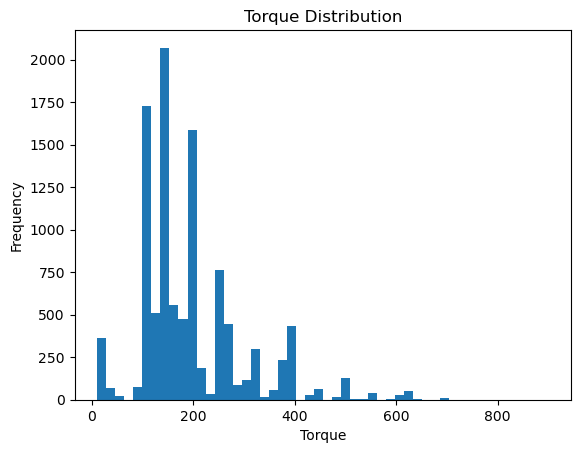

In [1141]:
sedan['Max Torque Delivered'].plot(kind='hist', bins=50, title='Torque Distribution')
plt.xlabel('Torque')
plt.show()

# Less than equal to 50

In [1142]:
sedan[sedan['Max Torque Delivered']<=50].loc[:, ['model', 'Max Torque Delivered']].drop_duplicates()

,model,Max Torque Delivered
127,hyundai accent,12.50
2851,toyota corolla,16.10
4438,ford fiesta,16.30
4442,ford fiesta,14.90
4541,ford ikon,10.70
5404,volkswagen jetta,25.50
5911,volkswagen passat,36.60
6225,volkswagen jetta,15.00
6361,skoda superb,25.20
6366,skoda new laura,25.50


In [1143]:
ind = sedan[sedan['Max Torque Delivered']<=50].loc[:, ['model', 'Max Torque Delivered']].index.to_list()

In [1144]:
ind

[127,
 446,
 621,
 785,
 2851,
 2927,
 2979,
 3007,
 3035,
 3065,
 3095,
 3104,
 3208,
 3223,
 3255,
 3290,
 3309,
 3422,
 4438,
 4442,
 4485,
 4491,
 4517,
 4541,
 4577,
 4589,
 4591,
 4621,
 4647,
 4671,
 4674,
 4706,
 4764,
 4782,
 4793,
 4809,
 4810,
 4814,
 4821,
 4824,
 4826,
 4871,
 4874,
 4881,
 4920,
 4922,
 4923,
 4924,
 4936,
 4951,
 4956,
 5016,
 5021,
 5028,
 5029,
 5033,
 5035,
 5043,
 5045,
 5053,
 5054,
 5055,
 5073,
 5074,
 5092,
 5093,
 5120,
 5123,
 5307,
 5404,
 5438,
 5592,
 5685,
 5911,
 6145,
 6146,
 6225,
 6245,
 6324,
 6361,
 6366,
 6401,
 6406,
 6432,
 6448,
 6494,
 6508,
 6530,
 6582,
 6599,
 6617,
 6625,
 6634,
 6675,
 6680,
 6710,
 6717,
 6799,
 6876,
 7085,
 7101,
 7133,
 7152,
 7287,
 7325,
 7508,
 7571,
 7601,
 7606,
 7608,
 7619,
 7625,
 7634,
 7652,
 7676,
 7678,
 7740,
 7745,
 7768,
 7790,
 7877,
 7900,
 7916,
 7938,
 7958,
 7966,
 8011,
 8055,
 8062,
 8150,
 8186,
 8188,
 8214,
 8224,
 8240,
 8389,
 8744,
 9071,
 9084,
 9100,
 9127,
 9158,
 9160,
 91

In [1145]:
for i in ind:
    df.loc[i, 'Max Torque Delivered'] = round(df.loc[i, 'Max Torque Delivered']*9.8, 0)

In [1146]:
df[(df['Max Torque Delivered'] <=50) & (df.body == 'sedan')]

,loc,myear,body,transmission,fuel,km,ip,imgCount,threesixty,dvn,oem,model,variant,City,listed_price,discountValue,utype,carType,top_features,comfort_features,interior_features,exterior_features,safety_features,Engine Type,No of Cylinder,Valves per Cylinder,Valve Configuration,Turbo Charger,Super Charger,Length,Width,Height,Wheel Base,Front Tread,Rear Tread,Kerb Weight,Gross Weight,Gear Box,Drive Type,Seats,Steering Type,Turning Radius,Front Brake Type,Rear Brake Type,Top Speed,Acceleration,Tyre Type,Doors,Cargo Volume,state,exterior_color,owner_type,Fuel Suppy System,Compression Ratio,Alloy Wheel Size,Ground Clearance Unladen,Max Power Delivered,Max Power At,Max Torque Delivered,Max Torque At,Bore,Stroke


# Greater than equal to 500

In [1147]:
sedan[sedan['Max Torque Delivered']>=500].loc[:, ['model', 'Max Torque Delivered']].drop_duplicates()

,model,Max Torque Delivered
7346,mercedes-benz e-class,620.0
7348,mercedes-benz s-class,700.0
7351,mercedes-benz e-class,500.0
7356,mercedes-benz c-class,500.0
7401,mercedes-benz s-class,620.0
7505,mercedes-benz s-class,600.0
7533,mercedes-benz maybach s-class,700.0
7650,mercedes-benz c-class,520.0
7806,mercedes-benz s-class,500.0
7886,mercedes-benz s-class,505.0


In [1148]:
# No changes required

# 50 to 100

In [1149]:
sedan[(sedan['Max Torque Delivered']>=51) & (sedan['Max Torque Delivered']<=100)]\
.loc[:, ['model', 'Max Torque Delivered']].drop_duplicates()

,model,Max Torque Delivered
24,maruti swift dzire tour,95.00
52,hyundai aura,95.20
198,tata tigor,95.00
215,hyundai xcent prime,97.96
324,maruti swift dzire,98.50
397,tata indigo,90.00
1208,mahindra e verito,91.00
5442,volkswagen ameo,95.00
9052,bmw 5 series,51.00
15983,tata indigo,100.00


In [1150]:
sedan[sedan.model == 'bmw 5 series'].loc[:, ['dvn', 'Max Torque Delivered']].drop_duplicates()

,dvn,Max Torque Delivered
9052,bmw 5 series 530d,51.0
9063,bmw 5 series 520d sport line,400.0
9066,bmw 5 series 530i sport line,350.0
9073,bmw 5 series 520d modern line,380.0
9074,bmw 5 series 520d luxury line,400.0
9084,bmw 5 series 525i,25.0
9095,bmw 5 series 525d sedan,450.0
9100,bmw 5 series 520d sedan,35.7
9112,bmw 5 series 530i m sport,350.0
9115,bmw 5 series 530d m sport,620.0


In [1151]:
sedan[(sedan.dvn == 'bmw 5 series 530d') & (sedan['Max Torque Delivered'] == 51)].loc[:, ['dvn', 'Max Torque Delivered']]

,dvn,Max Torque Delivered
9052,bmw 5 series 530d,51.0
9244,bmw 5 series 530d,51.0
9448,bmw 5 series 530d,51.0
9488,bmw 5 series 530d,51.0
9652,bmw 5 series 530d,51.0
9654,bmw 5 series 530d,51.0
9766,bmw 5 series 530d,51.0


In [1152]:
ind = sedan[(sedan.dvn == 'bmw 5 series 530d') & (sedan['Max Torque Delivered'] == 51)].loc[:, ['dvn', 'Max Torque Delivered']].index.to_list()

for i in ind:
    df.loc[i, 'Max Torque Delivered'] = 510

In [1153]:
# No change needed for the rest

# 101 to 200

In [1154]:
sedan[(sedan['Max Torque Delivered']>=101) & (sedan['Max Torque Delivered']<=200)]\
.loc[:, ['model', 'Max Torque Delivered']].drop_duplicates()

,model,Max Torque Delivered
2,honda amaze,109.00
60,honda city,146.00
86,hyundai accent,124.50
184,toyota corolla altis,173.00
216,maruti sx4,145.00
...,...,...
29916,tata indigo,124.00
32661,maruti swift dzire tour,113.00
34316,hyundai xcent prime,113.75
35732,mahindra verito,110.00


In [1155]:
sedan[(sedan['Max Torque Delivered']>=201) & (sedan['Max Torque Delivered']<=300)]\
.loc[:, ['model', 'Max Torque Delivered']].drop_duplicates()

,model,Max Torque Delivered
1194,toyota camry,213.00
2798,toyota corolla altis,205.00
2804,toyota camry,221.00
2817,toyota camry,233.00
2981,toyota camry,224.00
3498,renault fluence,240.00
4433,ford fiesta,204.00
4467,ford aspire,215.00
5362,volkswagen vento,250.00
5373,volkswagen ameo,250.00


In [1156]:
sedan[(sedan['Max Torque Delivered']>=301) & (sedan['Max Torque Delivered']<=400)]\
.loc[:, ['model', 'Max Torque Delivered']].drop_duplicates()

,model,Max Torque Delivered
5391,volkswagen jetta,320.0
5528,volkswagen passat,350.0
6357,skoda new laura,320.0
6359,skoda octavia,370.0
6367,skoda superb,350.0
6369,skoda superb,320.0
6375,skoda octavia,320.0
7345,mercedes-benz c-class,400.0
7358,mercedes-benz e-class,400.0
7369,mercedes-benz e-class,320.0


In [1157]:
sedan[(sedan['Max Torque Delivered']>=401) & (sedan['Max Torque Delivered']<500)]\
.loc[:, ['model', 'Max Torque Delivered']].drop_duplicates()

,model,Max Torque Delivered
7436,mercedes-benz s-class,490.0
7478,mercedes-benz c-class,440.0
7899,mercedes-benz e-class,490.0
9095,bmw 5 series,450.0
9106,bmw 7 series,450.0
10553,audi s5,440.0
13186,volvo s60,440.0
13197,volvo s60,420.0
13209,volvo s60 cross country,440.0
13275,volvo s 80,440.0


In [1158]:
df['Max Torque Delivered'].describe()

count    37646.000000
mean       182.608524
std        103.619896
min          6.100000
25%        112.000000
50%        146.000000
75%        230.000000
max        900.000000
Name: Max Torque Delivered, dtype: float64

In [1159]:
# Hatchback and sedan is sorted
# Other body types have to be checked

# SUV

In [1160]:
suv = df[df['body'] == 'suv']

In [1161]:
suv['Max Torque Delivered'].describe()

count    9793.000000
mean      262.150688
std       103.659158
min        19.400000
25%       195.000000
50%       248.000000
75%       330.000000
max       850.000000
Name: Max Torque Delivered, dtype: float64

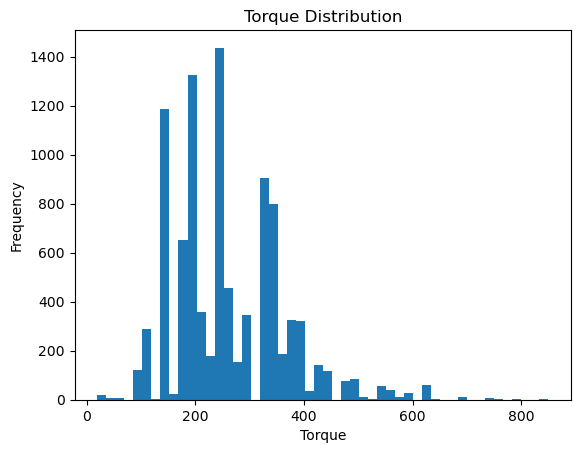

In [1162]:
suv['Max Torque Delivered'].plot(kind='hist', bins=50, title='Torque Distribution')
plt.xlabel('Torque')
plt.show()

# Less than equal to 50

In [1163]:
suv[suv['Max Torque Delivered'] <= 50].loc[:, ['model', 'Max Torque Delivered']]

,model,Max Torque Delivered
3329,toyota prado,36.9
7654,mercedes-benz m-class,35.7
7911,mercedes-benz m-class,35.7
8316,chevrolet captiva,32.6
8517,chevrolet captiva,32.6
9275,bmw x5,48.5
9304,bmw x3,25.5
9340,bmw x3,25.5
9370,bmw x3,25.5
9371,bmw x3,25.5


In [1164]:
ind = suv[suv['Max Torque Delivered'] <= 50].index.to_list()

for i in ind:
    df.loc[i, 'Max Torque Delivered'] = round(df.loc[i, 'Max Torque Delivered']*9.8,0)

# 51 to 150

In [1165]:
suv[(suv['Max Torque Delivered'] >= 51) & (suv['Max Torque Delivered'] <= 150)].loc[:, ['model', 'Max Torque Delivered']].\
drop_duplicates()

,model,Max Torque Delivered
354,mahindra kuv 100 nxt,115.00
2790,toyota urban cruiser,138.00
3434,renault kiger,96.00
3452,renault duster,142.00
3461,renault duster,145.00
3466,renault captur,142.00
3503,renault duster,148.00
4356,ford ecosport,150.00
4362,ford ecosport,140.00
4398,ford ecosport,149.00


In [1166]:
suv[(suv.model=='mercedes-benz m-class') & (suv['Max Torque Delivered'] == 52)]

,loc,myear,body,transmission,fuel,km,ip,imgCount,threesixty,dvn,oem,model,variant,City,listed_price,discountValue,utype,carType,top_features,comfort_features,interior_features,exterior_features,safety_features,Engine Type,No of Cylinder,Valves per Cylinder,Valve Configuration,Turbo Charger,Super Charger,Length,Width,Height,Wheel Base,Front Tread,Rear Tread,Kerb Weight,Gross Weight,Gear Box,Drive Type,Seats,Steering Type,Turning Radius,Front Brake Type,Rear Brake Type,Top Speed,Acceleration,Tyre Type,Doors,Cargo Volume,state,exterior_color,owner_type,Fuel Suppy System,Compression Ratio,Alloy Wheel Size,Ground Clearance Unladen,Max Power Delivered,Max Power At,Max Torque Delivered,Max Torque At,Bore,Stroke
8098,pune cantt east,2014,suv,automatic,diesel,60513.0,0,10,False,mercedes-benz m-class ml 320 cdi,mercedes-benz,mercedes-benz m-class,ml 320 cdi,pune,3200000.0,0,dealer,partner,"['power steering', 'power windows front', 'air...","['power steering', 'power windows front', 'pow...","['air conditioner', 'heater', 'adjustable stee...","['adjustable head lights', 'fog lights front',...","['anti lock braking system', 'brake assist', '...",v-type engine,6.0,4.0,dohc,True,True,4780.0,1911.0,1779.0,2915.0,1644.0,1647.0,2185.0,2830.0,7 speed,awd,5.0,power,5.8,ventilated disc,disc,215.0,8.6,tubeless radial,5.0,500.0,maharashtra,silver,first,Common Rail Injection,18.0,17.0,NaN,224.34,3800.0,52.0,2200.0,83.0,NaN
8184,andheri west,2009,suv,automatic,diesel,103000.0,0,15,False,mercedes-benz m-class ml 320 cdi,mercedes-benz,mercedes-benz m-class,ml 320 cdi,mumbai,975000.0,0,dealer,partner,"['power steering', 'power windows front', 'air...","['power steering', 'power windows front', 'pow...","['air conditioner', 'heater', 'adjustable stee...","['adjustable head lights', 'fog lights front',...","['anti lock braking system', 'brake assist', '...",v-type engine,6.0,4.0,dohc,True,True,4780.0,1911.0,1779.0,2915.0,1644.0,1647.0,2185.0,2830.0,7 speed,awd,5.0,power,5.8,ventilated disc,disc,215.0,8.6,tubeless radial,5.0,500.0,maharashtra,white,second,Common Rail Injection,18.0,17.0,NaN,224.34,3800.0,52.0,2200.0,83.0,NaN


In [1167]:
df.loc[8098, 'Max Torque Delivered'] = 520
df.loc[8184, 'Max Torque Delivered'] = 520

In [1168]:
suv[(suv.model=='bmw x5') & (suv['Max Torque Delivered'] == 53)]

,loc,myear,body,transmission,fuel,km,ip,imgCount,threesixty,dvn,oem,model,variant,City,listed_price,discountValue,utype,carType,top_features,comfort_features,interior_features,exterior_features,safety_features,Engine Type,No of Cylinder,Valves per Cylinder,Valve Configuration,Turbo Charger,Super Charger,Length,Width,Height,Wheel Base,Front Tread,Rear Tread,Kerb Weight,Gross Weight,Gear Box,Drive Type,Seats,Steering Type,Turning Radius,Front Brake Type,Rear Brake Type,Top Speed,Acceleration,Tyre Type,Doors,Cargo Volume,state,exterior_color,owner_type,Fuel Suppy System,Compression Ratio,Alloy Wheel Size,Ground Clearance Unladen,Max Power Delivered,Max Power At,Max Torque Delivered,Max Torque At,Bore,Stroke
9068,bangalore city,2009,suv,automatic,diesel,286541.0,0,23,False,bmw x5 3.0d,bmw,bmw x5,3.0d,bangalore,1206724.0,0,dealer,partner,"['power steering', 'power windows front', 'air...","['power steering', 'power windows front', 'pow...","['air conditioner', 'heater', 'adjustable stee...","['adjustable head lights', 'fog lights front',...","['anti lock braking system', 'brake assist', '...",in-line engine,6.0,4.0,NaN,True,True,4854.0,1933.0,1776.0,2933.0,1551.0,1524.0,2180.0,2740.0,6 speed,awd,5.0,power,NaN,disc,disc,210.0,8.3,tubeless radial,5.0,NaN,karnataka,alpine white,first,Common Rail Injection,NaN,18.0,NaN,235.0,NaN,53.0,2750.0,84.0,NaN
9265,NaN,2009,suv,automatic,diesel,100000.0,0,4,False,bmw x5 3.0d,bmw,bmw x5,3.0d,cuttack,1500000.0,0,individual,partner,"['power steering', 'power windows front', 'air...","['power steering', 'power windows front', 'pow...","['air conditioner', 'heater', 'adjustable stee...","['adjustable head lights', 'fog lights front',...","['anti lock braking system', 'brake assist', '...",in-line engine,6.0,4.0,NaN,True,True,4854.0,1933.0,1776.0,2933.0,1551.0,1524.0,2180.0,2740.0,6 speed,awd,5.0,power,NaN,disc,disc,210.0,8.3,tubeless radial,5.0,NaN,odisha,red,first,Common Rail Injection,NaN,18.0,NaN,235.0,NaN,53.0,2750.0,84.0,NaN
9334,NaN,2008,suv,automatic,diesel,135000.0,0,11,False,bmw x5 3.0d,bmw,bmw x5,3.0d,amritsar,1100000.0,0,individual,partner,"['power steering', 'power windows front', 'air...","['power steering', 'power windows front', 'pow...","['air conditioner', 'heater', 'adjustable stee...","['adjustable head lights', 'fog lights front',...","['anti lock braking system', 'brake assist', '...",in-line engine,6.0,4.0,NaN,True,True,4854.0,1933.0,1776.0,2933.0,1551.0,1524.0,2180.0,2740.0,6 speed,awd,5.0,power,NaN,disc,disc,210.0,8.3,tubeless radial,5.0,NaN,punjab,other,first,Common Rail Injection,NaN,18.0,NaN,235.0,NaN,53.0,2750.0,84.0,NaN
9421,kolkatta gpo,2008,suv,automatic,diesel,118205.0,0,33,True,bmw x5 3.0d,bmw,bmw x5,3.0d,kolkata,1185215.0,0,dealer,partner,"['power steering', 'power windows front', 'air...","['power steering', 'power windows front', 'pow...","['air conditioner', 'heater', 'adjustable stee...","['adjustable head lights', 'fog lights front',...","['anti lock braking system', 'brake assist', '...",in-line engine,6.0,4.0,NaN,True,True,4854.0,1933.0,1776.0,2933.0,1551.0,1524.0,2180.0,2740.0,6 speed,awd,5.0,power,NaN,disc,disc,210.0,8.3,tubeless radial,5.0,NaN,west bengal,alpine white,fourth,Common Rail Injection,NaN,18.0,NaN,235.0,NaN,53.0,2750.0,84.0,NaN
9514,vasanth nagar,2012,suv,automatic,diesel,106000.0,0,13,False,bmw x5 3.0d,bmw,bmw x5,3.0d,bangalore,1975000.0,0,dealer,partner,"['power steering', 'power windows front', 'air...","['power steering', 'power windows front', 'pow...","['air conditioner', 'heater', 'adjustable stee...","['adjustable head lights', 'fog lights front',...","['anti lock braking system', 'brake assist', '...",in-line engine,6.0,4.0,NaN,True,True,4854.0,1933.0,1776.0,2933.0,1551.0,1524.0,2180.0,2740.0,6 speed,awd,5.0,power,NaN,disc,disc,210.0,8.3,tubeless radial,5.0,NaN,karnataka,maroon,second,Common Rail Injection,NaN,18.0,NaN,235.0,NaN,53.0,2750.0,84.0,NaN
9655,thaltej,2011,suv,automatic,diesel,100000.0,0,12,False,bmw x5 3.0d,bmw,bmw x5,3.0d,ah

In [1169]:
ind = suv[(suv.model=='bmw x5') & (suv['Max Torque Delivered'] == 53)].index.to_list()

for i in ind:
    df.loc[i, 'Max Torque Delivered'] = 530

In [1170]:
suv[(suv.model=='renault kiger') & (suv['Max Torque Delivered'] == 96)] # no changes needed

,loc,myear,body,transmission,fuel,km,ip,imgCount,threesixty,dvn,oem,model,variant,City,listed_price,discountValue,utype,carType,top_features,comfort_features,interior_features,exterior_features,safety_features,Engine Type,No of Cylinder,Valves per Cylinder,Valve Configuration,Turbo Charger,Super Charger,Length,Width,Height,Wheel Base,Front Tread,Rear Tread,Kerb Weight,Gross Weight,Gear Box,Drive Type,Seats,Steering Type,Turning Radius,Front Brake Type,Rear Brake Type,Top Speed,Acceleration,Tyre Type,Doors,Cargo Volume,state,exterior_color,owner_type,Fuel Suppy System,Compression Ratio,Alloy Wheel Size,Ground Clearance Unladen,Max Power Delivered,Max Power At,Max Torque Delivered,Max Torque At,Bore,Stroke
3434,vishwas khand,2021,suv,automatic,petrol,37643.0,0,30,False,renault kiger rxz amt dt,renault,renault kiger,rxz amt dt,lucknow,776000.0,6000,dealer,corporate,"['power steering', 'power windows front', 'air...","['power steering', 'power windows front', 'pow...","['air conditioner', 'heater', 'adjustable stee...","['adjustable head lights', 'power adjustable e...","['anti lock braking system', 'centeral locking...",1.0l energy,3.0,4.0,NaN,True,True,3991.0,1750.0,1605.0,2500.0,1536.0,1535.0,NaN,NaN,5 speed,NaN,5.0,power,NaN,disc,drum,NaN,NaN,tubeless radial,5.0,405.0,uttar pradesh,silver,first,Multi-Point Fuel Injection,NaN,16.0,NaN,71.01,6250.0,96.0,3500.0,NaN,NaN
3454,sitapura industrial area,2021,suv,automatic,petrol,20660.0,0,21,True,renault kiger rxl amt,renault,renault kiger,rxl amt,jaipur,699000.0,0,dealer,assured,"['power steering', 'power windows front', 'air...","['power steering', 'power windows front', 'pow...","['air conditioner', 'heater', 'adjustable stee...","['adjustable head lights', 'power adjustable e...","['anti lock braking system', 'centeral locking...",1.0 l energy,3.0,4.0,NaN,False,False,3991.0,1750.0,1605.0,2500.0,1536.0,1535.0,1012.0,1378.0,5 speed,fwd,5.0,power,5.02,disc,drum,NaN,NaN,tubeless radial,5.0,405.0,rajasthan,grey,first,Multi-Point Fuel Injection,NaN,NaN,205.0,71.01,6250.0,96.0,3500.0,NaN,NaN
3469,new delhi g.p.o.,2022,suv,manual,petrol,7675.0,0,20,False,renault kiger rxz,renault,renault kiger,rxz,new delhi,750000.0,0,dealer,partner,"['power steering', 'power windows front', 'air...","['power steering', 'power windows front', 'pow...","['air conditioner', 'heater', 'adjustable stee...","['adjustable head lights', 'power adjustable e...","['anti lock braking system', 'centeral locking...",1.0l energy,3.0,4.0,NaN,True,True,3991.0,1750.0,1605.0,2500.0,1536.0,1535.0,NaN,NaN,5 speed,NaN,5.0,power,NaN,disc,drum,NaN,NaN,tubeless radial,5.0,405.0,delhi,moonlight silver,first,Multi-Point Fuel Injection,NaN,16.0,NaN,71.01,6250.0,96.0,3500.0,NaN,NaN
3473,NaN,2021,suv,manual,petrol,35000.0,0,4,False,renault kiger rxt,renault,renault kiger,rxt,nabarangpur,680000.0,0,individual,partner,"['power steering', 'power windows front', 'air...","['power steering', 'power windows front', 'pow...","['air conditioner', 'heater', 'adjustable stee...","['adjustable head lights', 'power adjustable e...","['anti lock braking system', 'centeral locking...",1.0l energy,3.0,4.0,NaN,True,True,3991.0,1750.0,1605.0,2500.0,1536.0,1535.0,NaN,NaN,5 speed,NaN,5.0,power,NaN,disc,drum,NaN,NaN,tubeless radial,5.0,405.0,odisha,white,first,Multi-Point Fuel Injection,NaN,NaN,NaN,71.01,6250.0,96.0,3500.0,NaN,NaN
3501,kasba,2021,suv,automatic,petrol,4500.0,0,14,False,renault kiger rxz amt,renault,renault kiger,rxz amt,kolkata,845000.0,0,dealer,partner,"['power steering', 'power windows front', 'air...","['power steering', 'power windows front', 'pow...","['air conditioner', 'heater', 'adjustable stee...","['adjustable head lights', 'power adjustable e...","['anti lock braking system', 'centeral locking...",1.0l energy,3.0,4.0,NaN,True,True,3991.0,1750.0,1605.0,2500.0,1536.0,1535.0,NaN,NaN,5 speed,NaN,5.0,power,NaN,disc,drum,NaN,NaN,tubeless radial,5.0,405.0,west bengal,white,first,Multi-Point Fuel Injection,NaN,16.0,NaN,71.01,6250.0,9

In [1171]:
suv[(suv.model=='nissan magnite') & (suv['Max Torque Delivered'] == 96)].loc[:, ['dvn','Max Torque Delivered']].drop_duplicates()
# No changes needed

,dvn,Max Torque Delivered
11111,nissan magnite xe,96.0
11123,nissan magnite xl,96.0
11145,nissan magnite xv,96.0
11158,nissan magnite xv executive,96.0
11171,nissan magnite xv premium,96.0
11317,nissan magnite xv dt,96.0
11682,nissan magnite xv red edition,96.0


# 700 to 850

In [1172]:
suv[(suv['Max Torque Delivered'] >= 700) & (suv['Max Torque Delivered'] <= 850)].loc[:, ['model', 'Max Torque Delivered']].\
drop_duplicates()

,model,Max Torque Delivered
1209,mercedes-benz eqc,760.0
7494,mercedes-benz gls,700.0
10647,audi q7,800.0
13077,land rover range rover,700.0
13089,land rover range rover,740.0
13093,land rover range rover sport,740.0
13379,jaguar f-pace,700.0
13571,porsche cayenne,850.0
13576,porsche cayenne,750.0


# 550 to 699

In [1173]:
suv[(suv['Max Torque Delivered'] >= 550) & (suv['Max Torque Delivered'] <= 699)].loc[:, ['model', 'Max Torque Delivered']].\
drop_duplicates()

,model,Max Torque Delivered
2799,toyota land cruiser,650.0
7350,mercedes-benz m-class,619.0
7359,mercedes-benz gls,620.0
7442,mercedes-benz gle,620.0
7630,mercedes-benz gl-class,619.0
7921,mercedes-benz g,600.0
9059,bmw x5,560.0
9254,bmw x3,560.0
9320,bmw x6,630.0
9361,bmw x7,620.0


# 400 to 549

In [1174]:
suv[(suv['Max Torque Delivered'] >= 400) & (suv['Max Torque Delivered'] <= 549)].loc[:, ['model', 'Max Torque Delivered']].\
drop_duplicates()

,model,Max Torque Delivered
2793,toyota fortuner,450.0
2806,toyota fortuner,500.0
2811,toyota fortuner,420.0
3050,toyota fortuner legender,500.0
4370,ford endeavour,470.0
...,...,...
17047,hyundai tucson,400.0
17275,mahindra alturas g4,420.0
17500,hyundai santa fe,436.4
18003,mahindra scorpio n,400.0


# 151 to 250

In [1175]:
suv[(suv['Max Torque Delivered'] >= 151) & (suv['Max Torque Delivered'] <= 250)].loc[:, ['model', 'Max Torque Delivered']].\
drop_duplicates()

,model,Max Torque Delivered
1196,tata nexon ev prime,245.0
1220,tata nexon ev max,250.0
2802,toyota fortuner,245.0
2945,toyota qualis,151.0
3430,renault duster,200.0
...,...,...
18459,hyundai venue,220.0
19396,honda cr-v,189.0
20286,hyundai venue,250.0
22849,mahindra thar,182.5


# 251 to 399

In [1176]:
suv[(suv['Max Torque Delivered'] >= 251) & (suv['Max Torque Delivered'] <= 399)].loc[:, ['model', 'Max Torque Delivered']].\
drop_duplicates()

,model,Max Torque Delivered
1198,mg zs ev,280.0
1201,hyundai kona,395.0
1202,mg zs ev,350.0
2789,toyota fortuner,360.0
2809,toyota fortuner,343.0
...,...,...
17636,mahindra scorpio,277.5
21154,mahindra scorpio classic,300.0
25785,hyundai creta,265.0
32232,mahindra scorpio n,370.0


In [1177]:
# No changes need

In [1178]:
df['Max Torque Delivered'].describe()

count    37646.000000
mean       182.869912
std        103.702234
min          6.100000
25%        112.000000
50%        146.000000
75%        233.000000
max        900.000000
Name: Max Torque Delivered, dtype: float64

# muv

In [1179]:
muv = df[df.body=='muv']

In [1180]:
muv['Max Torque Delivered'].describe()

count    1812.000000
mean      198.043543
std       104.444807
min        12.000000
25%       130.000000
50%       200.000000
75%       260.000000
max       440.000000
Name: Max Torque Delivered, dtype: float64

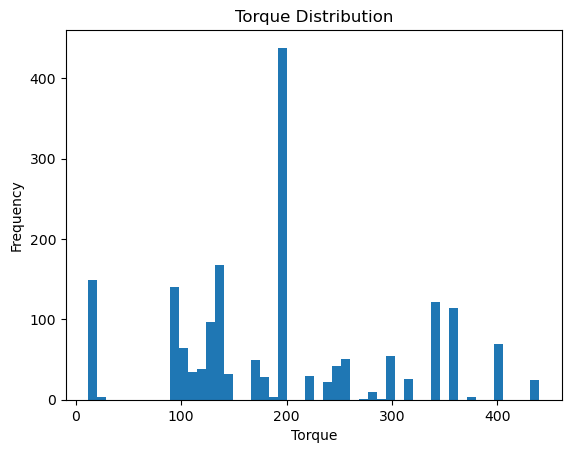

In [1181]:
muv['Max Torque Delivered'].plot(kind='hist', bins=50, title='Torque Distribution')
plt.xlabel('Torque')
plt.show()

# less than equal to 50

In [1182]:
muv[muv['Max Torque Delivered']<=50].loc[:, ['model', 'Max Torque Delivered']].drop_duplicates()

,model,Max Torque Delivered
1331,tata sumo victa,22.7
1362,toyota innova,20.4
1393,chevrolet tavera,19.0
1489,tata indigo marina,13.5
1722,toyota innova,18.5
1797,tata indigo marina,14.1
2088,mahindra xylo,24.0
2124,tata indigo marina,12.0
2221,tata sumo victa,12.0


In [1183]:
muv[muv['Max Torque Delivered']<=50].loc[:, ['dvn', 'Max Torque Delivered']].drop_duplicates()

,dvn,Max Torque Delivered
1331,tata sumo victa di ex bsiii,22.7
1362,toyota innova 2.5 vx 8 str bsiv,20.4
1393,chevrolet tavera lt-l - 9 seats bsii,19.0
1403,toyota innova 2.5 g4 diesel 8-seater,20.4
1408,toyota innova 2.5 v diesel 8-seater,20.4
1412,toyota innova 2.5 g (diesel) 7 seater bs iv,20.4
1428,toyota innova 2.5 gx 8 str bsiv,20.4
1435,toyota innova 2.5 g4 diesel 7-seater,20.4
1479,toyota innova 2.5 v diesel 7-seater,20.4
1485,toyota innova 2.5 ev diesel ms 8 str bsiii,20.4


In [1184]:
ind = muv[muv['Max Torque Delivered']<=50].loc[:, ['model', 'Max Torque Delivered']].index.to_list()

for i in ind:
    df.loc[i, 'Max Torque Delivered'] = round(df.loc[i, 'Max Torque Delivered']*9.8, 0)

# 51 to 150

In [1185]:
muv[(muv['Max Torque Delivered']>=51) & (muv['Max Torque Delivered']<=150)].loc[:, ['model', 'Max Torque Delivered']].drop_duplicates()

,model,Max Torque Delivered
4,maruti ertiga,121.5
12,maruti ertiga,112.0
18,maruti ertiga tour,122.0
46,maruti ertiga,110.0
151,maruti ertiga,122.0
206,maruti xl6,121.5
282,maruti ertiga,138.0
1320,maruti ertiga,130.0
1323,renault triber,96.0
1328,maruti ertiga,136.8


In [1186]:
# No changes needed

# 151 to 300

In [1187]:
muv[(muv['Max Torque Delivered']>=151) & (muv['Max Torque Delivered']<=300)].loc[:, ['model', 'Max Torque Delivered']].drop_duplicates()

,model,Max Torque Delivered
1318,maruti ertiga,200.0
1319,mahindra marazzo,300.0
1325,toyota innova crysta,245.0
1327,toyota innova,200.0
1332,nissan evalia,200.0
1344,mahindra xylo,260.0
1354,honda mobilio,200.0
1367,mahindra xylo,280.0
1379,toyota vellfire,198.0
1381,mahindra scorpio,290.0


In [1188]:
# No changes needed

# 301 to 440

In [1189]:
muv[(muv['Max Torque Delivered']>=301) & (muv['Max Torque Delivered']<=440)].loc[:, ['model', 'Max Torque Delivered']].drop_duplicates()

,model,Max Torque Delivered
1324,toyota innova crysta,360.0
1334,toyota innova crysta,343.0
1336,mercedes-benz v-class,380.0
1364,tata hexa,400.0
1365,kia carnival,440.0
1395,tata aria,320.0
1429,tata hexa,320.0


In [1190]:
# no changes needed

In [1191]:
df['Max Torque Delivered'].describe()

count    37646.000000
mean       183.575078
std        103.189770
min          6.100000
25%        113.000000
50%        146.000000
75%        233.000000
max        900.000000
Name: Max Torque Delivered, dtype: float64

# minivans

In [1192]:
mini = df[df.body == 'minivans']

In [1193]:
mini['Max Torque Delivered'].describe()

count    371.000000
mean      85.940970
std       24.380555
min        6.100000
25%       85.000000
50%       98.000000
75%      101.000000
max      190.000000
Name: Max Torque Delivered, dtype: float64

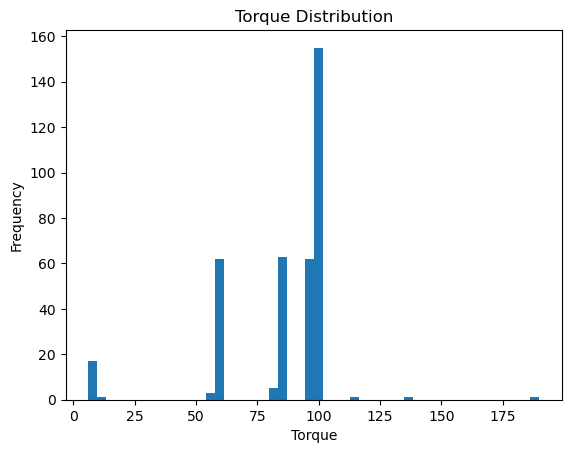

In [1194]:
mini['Max Torque Delivered'].plot(kind='hist', bins=50, title='Torque Distribution')
plt.xlabel('Torque')
plt.show()

# less than equal to 50

In [1195]:
mini[mini['Max Torque Delivered']<=50].loc[:, ['dvn', 'Max Torque Delivered']]

,dvn,Max Torque Delivered
2299,maruti omni 5 seater bsiv,6.1
2310,maruti omni 8 seater bsii,6.1
2323,maruti omni 5 seater,6.1
2327,maruti omni mpi cargo bsiii w/ immobiliser,6.1
2349,maruti versa dx2,10.4
2356,maruti omni 8 seater bsiv,6.1
2363,maruti omni maruti omni mpi std bsiii 5-str w/...,6.1
2365,maruti omni 8 seater bsii,6.1
2399,maruti omni 8 seater bsii,6.1
2410,maruti omni 5 seater bsii,6.1


In [1196]:
ind = mini[mini['Max Torque Delivered']<=50].loc[:, ['dvn', 'Max Torque Delivered']].index.to_list()

for i in ind:
    df.loc[i, 'Max Torque Delivered'] = round(df.loc[i, 'Max Torque Delivered']*9.8, 0)

# 51 to 100

In [1197]:
mini[(mini['Max Torque Delivered']>=51) & (mini['Max Torque Delivered']<=100)].loc[:, ['dvn', 'Max Torque Delivered']].drop_duplicates()

,dvn,Max Torque Delivered
31,maruti eeco flexi green,83.0
42,maruti eeco cng 5 seater ac bsiv,85.0
44,maruti eeco cargo std cng ac 2021-2022,85.0
56,maruti eeco cng 5 seater ac,85.0
70,maruti eeco cng htr 5-str,83.0
1038,maruti omni lpg cargo bsiii w immobiliser,57.0
2301,maruti omni mpi cargo bsiv,59.0
2302,maruti eeco 5 seater ac 2020-2022,98.0
2305,maruti omni e mpi std bsiv,59.0
2309,maruti omni e mpi std,59.0


In [1198]:
# No changes required

# 101 to 190

In [1199]:
mini[(mini['Max Torque Delivered']>=101) & (mini['Max Torque Delivered']<=190)].loc[:, ['dvn', 'Max Torque Delivered']].drop_duplicates()

,dvn,Max Torque Delivered
100,maruti eeco 5 str with ac plus htr cng,101.0
2295,maruti eeco 5 seater ac bsiv,101.0
2296,maruti eeco 7 seater standard bsiv,101.0
2304,maruti eeco ambulance petrol ac plus htr,101.0
2308,tata winger deluxe - flat roof (non-ac),190.0
2362,tata winger standard -flat roof (non-ac),115.0
2394,maruti eeco 5 seater standard bsiv,101.0
2403,tata venture lx 7 str,135.0


In [1200]:
# No changes required

In [1201]:
df['Max Torque Delivered'].describe()

count    37646.000000
mean       183.601851
std        103.151250
min         16.100000
25%        113.000000
50%        146.000000
75%        233.000000
max        900.000000
Name: Max Torque Delivered, dtype: float64

# Luxury Vehicles

In [1202]:
lv = df[df.body == 'luxury vehicles']

In [1203]:
lv['Max Torque Delivered'].describe()

count     73.000000
mean     287.209589
std      213.215990
min       34.700000
25%       34.700000
50%      400.000000
75%      450.000000
max      600.000000
Name: Max Torque Delivered, dtype: float64

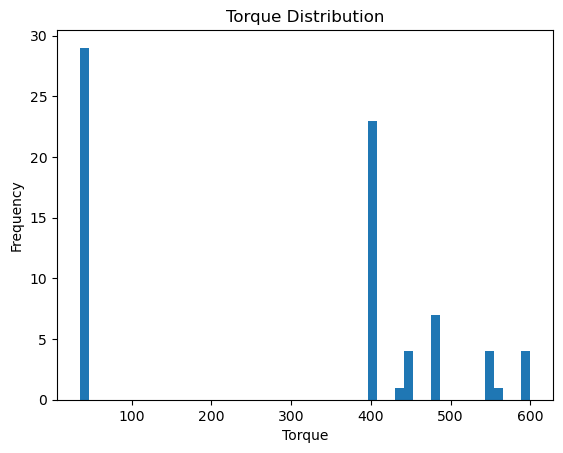

In [1204]:
lv['Max Torque Delivered'].plot(kind='hist', bins=50, title='Torque Distribution')
plt.xlabel('Torque')
plt.show()

# less than equal to 100

In [1205]:
lv[lv['Max Torque Delivered']<=100].loc[:, ['dvn', 'Max Torque Delivered']]

,dvn,Max Torque Delivered
2624,bmw 3 series 320d,34.7
2630,bmw 3 series 320d,34.7
2633,bmw 3 series 320d,34.7
2636,bmw 3 series 320d,34.7
2639,bmw 3 series 320d,34.7
2641,bmw 3 series 320d,34.7
2642,bmw 3 series 320d,34.7
2643,bmw 3 series 320d,34.7
2645,bmw 3 series 320d,34.7
2646,bmw 3 series 320d,34.7


In [1206]:
ind = lv[lv['Max Torque Delivered']<=100].loc[:, ['dvn', 'Max Torque Delivered']].index.to_list()

for i in ind:
    df.loc[i, 'Max Torque Delivered'] = df.loc[i, 'Max Torque Delivered']*10

# Greater than 400

In [1207]:
lv[lv['Max Torque Delivered']>=400].loc[:, ['model', 'Max Torque Delivered']]

,model,Max Torque Delivered
2625,mercedes-benz s-class,600.0
2626,volvo s60,400.0
2627,audi a8 2010-2013,550.0
2628,audi a8 2010-2013,550.0
2629,volvo xc 90,480.0
2631,volvo s60,400.0
2632,volvo s60,400.0
2634,volvo s60,400.0
2635,volvo s60,400.0
2637,bmw 5 series,450.0


In [1208]:
# No changes needed

In [1209]:
df['Max Torque Delivered'].describe()

count    37646.000000
mean       183.842427
std        103.167873
min         16.100000
25%        113.000000
50%        146.000000
75%        238.750000
max        900.000000
Name: Max Torque Delivered, dtype: float64

# other

In [1210]:
other = df[(df.body == 'pickup trucks')|(df.body == 'convertibles')|(df.body == 'coupe')|(df.body == 'wagon')|(df.body == 'hybrids')]

In [1211]:
other.body.value_counts()

body
pickup trucks    47
convertibles     22
coupe            21
wagon             7
hybrids           4
Name: count, dtype: int64

In [1212]:
other['Max Torque Delivered'].describe()

count     97.000000
mean     353.958763
std      151.242212
min       54.000000
25%      250.000000
50%      320.000000
75%      470.000000
max      800.000000
Name: Max Torque Delivered, dtype: float64

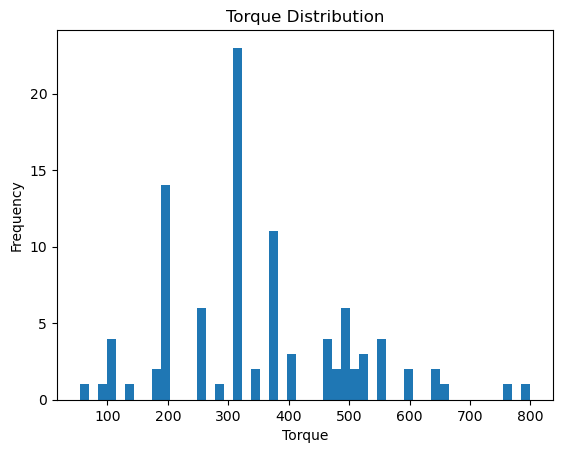

In [1213]:
other['Max Torque Delivered'].plot(kind='hist', bins=50, title='Torque Distribution')
plt.xlabel('Torque')
plt.show()

# Less than 150

In [1214]:
other[other['Max Torque Delivered']<=100].loc[:, ['dvn','body', 'Max Torque Delivered']]

,dvn,body,Max Torque Delivered
2715,maruti super carry std,pickup trucks,98.0
2741,mercedes-benz sl-class sl 500,convertibles,54.0


In [1215]:
df.loc[2741, 'Max Torque Delivered'] = round(df.loc[2741, 'Max Torque Delivered']*9.8, 0)

# 151 to 250

In [1216]:
other[(other['Max Torque Delivered']>=151) & (other['Max Torque Delivered']<=250)].loc[:, ['dvn','body', 'Max Torque Delivered']]

,dvn,body,Max Torque Delivered
302,mahindra bolero maxi truck plus cng ps,pickup trucks,178.0
2698,mahindra bolero pik up extra long fb 1.7t,pickup trucks,200.0
2704,tata yodha pickup std,pickup trucks,250.0
2705,mahindra bolero camper 2wd power steering,pickup trucks,200.0
2706,mahindra bolero pik up extra long fb 1.25t,pickup trucks,200.0
2707,tata yodha pickup 1500,pickup trucks,250.0
2714,tata yodha pickup crew cabin,pickup trucks,250.0
2716,mahindra bolero pik up extra long fb 1.7t,pickup trucks,200.0
2717,mahindra bolero maxi truck plus 1.2,pickup trucks,195.0
2718,mahindra bolero camper 2wd power steering,pickup trucks,200.0


In [1217]:
# No changes required

# 251 to 400

In [1218]:
other[(other['Max Torque Delivered']>=251) & (other['Max Torque Delivered']<=400)].loc[:, ['dvn','body', 'Max Torque Delivered']]

,dvn,body,Max Torque Delivered
2694,isuzu d-max 4x4,pickup trucks,320.0
2695,isuzu d-max 4x4,pickup trucks,320.0
2697,tata xenon xt ex 4x2,pickup trucks,320.0
2700,isuzu d-max 4x4,pickup trucks,320.0
2701,isuzu d-max 4x4,pickup trucks,320.0
2702,isuzu d-max 4x4,pickup trucks,320.0
2703,isuzu d-max 4x4,pickup trucks,320.0
2708,tata xenon xt ex 4x4,pickup trucks,320.0
2709,isuzu d-max 4x4,pickup trucks,320.0
2711,isuzu d-max single cab,pickup trucks,320.0


In [1219]:
# No changes required

# 401 to 800

In [1220]:
other[(other['Max Torque Delivered']>=401) & (other['Max Torque Delivered']<=800)].loc[:, ['dvn','body', 'Max Torque Delivered']]

,dvn,body,Max Torque Delivered
2732,toyota hilux high at,pickup trucks,500.0
2745,bmw 6 series 650i convertible,convertibles,650.0
2747,jaguar f-type 3.0 v6 s,convertibles,460.0
2749,bmw 3 series 330d convertible,convertibles,520.0
2754,jaguar f-type 3.0 v6 s,convertibles,460.0
2758,mercedes-benz amg gle 53 coupe,coupe,520.0
2759,bmw m2 competition,coupe,550.0
2760,lamborghini huracan lp 610 4 bsiv,coupe,560.0
2762,mercedes-benz cls-class 300d,coupe,500.0
2763,ford mustang v8,coupe,515.0


In [1221]:
# no changes needed

In [1222]:
df['Max Torque Delivered'].describe()

count    37646.000000
mean       183.855044
std        103.181038
min         16.100000
25%        113.000000
50%        146.000000
75%        240.000000
max        900.000000
Name: Max Torque Delivered, dtype: float64

# Imputing null in max torque delivered

In [1223]:
df['Max Torque Delivered'].isna().sum()

148

In [1224]:
l = df[df['Max Torque Delivered'].isna()]['dvn'].drop_duplicates().to_list()

In [1225]:
ref = df[df['Max Torque Delivered'].notna()]['dvn'].drop_duplicates().to_list()

In [1226]:
m = []
for i in l:
    if i in ref:
        m.extend(l)

In [1227]:
len(set(m))

64

In [1228]:
len(l)

64

In [1229]:
df.groupby('dvn')['Max Torque Delivered'].median()

dvn
ambassador grand 1500 dsz bsiii    106.0
ambassador grand 1800 bsiv         130.0
ambassador grand 2000 dsz          106.0
ambassador grand 2000 dsz pw cl    106.0
ashok leyland stile le             185.0
                                   ...  
volvo xc60 d5                      440.0
volvo xc60 d5 inscription          440.0
volvo xc60 d5 summum               440.0
volvo xc60 inscription d5          480.0
volvo xc90 d5 at awd               420.0
Name: Max Torque Delivered, Length: 4128, dtype: float64

In [1230]:
def fill_missing(row, mode_dict, ref, col):
    if pd.isnull(row[col]):
        return mode_dict.get(row[ref], row[col])
    return row[col]

In [1231]:
mode_dict = df.groupby('dvn')['Max Torque Delivered'].agg(lambda x: x.mode()[0] if not x.mode().empty else np.nan).to_dict()

df['Max Torque Delivered'] = df.apply(lambda x: fill_missing(x, mode_dict, 'dvn', 'Max Torque Delivered'), axis=1)

In [1232]:
mode_dict

{'ambassador grand 1500 dsz bsiii': 106.0,
 'ambassador grand 1800 bsiv': 130.0,
 'ambassador grand 2000 dsz': 106.0,
 'ambassador grand 2000 dsz pw cl': 106.0,
 'ashok leyland stile le': 185.0,
 'aston martin vantage v8 4.7l': 470.0,
 'audi a3 35 tdi attraction': 320.0,
 'audi a3 35 tdi premium': 320.0,
 'audi a3 35 tdi premium plus': 320.0,
 'audi a3 35 tdi technology': 320.0,
 'audi a3 35 tfsi premium': 250.0,
 'audi a3 35 tfsi premium plus': 250.0,
 'audi a3 35 tfsi technology': 250.0,
 'audi a3 40 tfsi premium plus': 250.0,
 'audi a3 cabriolet 40 tfsi premium plus': 250.0,
 'audi a4 1.8 tfsi': 224.0,
 'audi a4 1.8 tfsi multitronic': 320.0,
 'audi a4 1.8 tfsi premium plus': 320.0,
 'audi a4 1.8 tfsi technology edition': 320.0,
 'audi a4 2.0 tdi': 320.0,
 'audi a4 2.0 tdi celebration edition': 320.0,
 'audi a4 2.0 tdi multitronic': 319.0,
 'audi a4 2.0 tdi premium plus': 380.0,
 'audi a4 2.0 tdi premium sport limited edition': 380.0,
 'audi a4 2.0 tdi technology edition': 380.0,
 'a

In [1233]:
df['Max Torque Delivered'].isna().sum()

97

In [1234]:
mode_dict = df.groupby('model')['Max Torque Delivered'].agg(lambda x: x.mode()[0] if not x.mode().empty else np.nan).to_dict()

df['Max Torque Delivered'] = df.apply(lambda x: fill_missing(x, mode_dict, 'model', 'Max Torque Delivered'), axis=1)

In [1235]:
df['Max Torque Delivered'].isna().sum()

20

In [1236]:
df[df['Max Torque Delivered'].isna()]['dvn'].drop_duplicates()

170                 maruti celerio tour 2018-2021 h2 cng
1769                    force trax cruiser classic bsiii
2696          mahindra bolero pik up extra strong 4wd ms
2710      mahindra bolero pik up extra strong fb 1.3t ps
2733     mahindra bolero pik up extra strong cbc 1.3t ms
9003                       chevrolet forester awd petrol
12831                              fiat palio nv 1.2 elx
12982                           fiat adventure sport 1.6
13640                                      hummer h3 suv
15992                          mahindra armada grand 4wd
22894                      volkswagen touareg 3.6 v6 fsi
23260                          mahindra willys cj 3b 4x4
23678                            mahindra jeep mm 540 dp
23763                                    maruti 1000 std
Name: dvn, dtype: object

In [1237]:
df[df['Max Torque Delivered'].isna()]

,loc,myear,body,transmission,fuel,km,ip,imgCount,threesixty,dvn,oem,model,variant,City,listed_price,discountValue,utype,carType,top_features,comfort_features,interior_features,exterior_features,safety_features,Engine Type,No of Cylinder,Valves per Cylinder,Valve Configuration,Turbo Charger,Super Charger,Length,Width,Height,Wheel Base,Front Tread,Rear Tread,Kerb Weight,Gross Weight,Gear Box,Drive Type,Seats,Steering Type,Turning Radius,Front Brake Type,Rear Brake Type,Top Speed,Acceleration,Tyre Type,Doors,Cargo Volume,state,exterior_color,owner_type,Fuel Suppy System,Compression Ratio,Alloy Wheel Size,Ground Clearance Unladen,Max Power Delivered,Max Power At,Max Torque Delivered,Max Torque At,Bore,Stroke
170,new delhi g.p.o.,2019,hatchback,manual,cng,37859.0,0,20,True,maruti celerio tour 2018-2021 h2 cng,maruti,maruti celerio tour 2018-2021,h2 cng,new delhi,450000.0,0,dealer,partner,[],[],[],[],[],NaN,3.0,4.0,NaN,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,delhi,white,first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
243,NaN,2019,hatchback,manual,cng,80000.0,0,11,False,maruti celerio tour 2018-2021 h2 cng,maruti,maruti celerio tour 2018-2021,h2 cng,rajahmundry,459999.0,0,individual,partner,[],[],[],[],[],NaN,3.0,4.0,NaN,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,andhra pradesh,white,first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307,NaN,2018,hatchback,manual,cng,70000.0,0,1,False,maruti celerio tour 2018-2021 h2 cng,maruti,maruti celerio tour 2018-2021,h2 cng,bardoli,395000.0,0,individual,partner,[],[],[],[],[],NaN,3.0,4.0,NaN,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,gujarat,white,first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1769,NaN,2016,muv,manual,diesel,100000.0,0,8,False,force trax cruiser classic bsiii,force,force trax cruiser,classic bsiii,byasanagar,650000.0,0,individual,partner,[],[],[],[],[],NaN,4.0,4.0,NaN,True,True,NaN,NaN,NaN,NaN,NaN,NaN,2010.0,NaN,NaN,NaN,13.0,power,NaN,NaN,NaN,NaN,NaN,tubeless radial,5.0,NaN,odisha,white,first,NaN,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2209,NaN,2007,muv,manual,diesel,143000.0,0,10,False,force trax cruiser classic bsiii,force,force trax cruiser,classic bsiii,amravati,350000.0,0,individual,partner,[],[],[],[],[],NaN,4.0,4.0,NaN,True,True,NaN,NaN,NaN,NaN,NaN,NaN,2010.0,NaN,NaN,NaN,13.0,power,NaN,NaN,NaN,NaN,NaN,tubeless radial,5.0,NaN,maharashtra,other,fourth,NaN,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2696,NaN,2021,pickup trucks,manual,diesel,30000.0,0,2,False,mahindra bolero pik up extra strong 4wd ms,mahindra,mahindra bolero pik up extra strong,4wd ms,madurai,850000.0,0,individual,partner,[],[],[],[],[],NaN,4.0,4.0,NaN,True,True,5219.0,1700.0,1865.0,3264.0,NaN,NaN,1715.0,2995.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,tamil nadu,other,first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2699,NaN,2019,pickup trucks,manual,diesel,60000.0,0,2,False,mahindra bolero pik up extra strong 4wd ms,mahindra,mahindra bolero pik up extra strong,4wd ms,shimla,750000.0,0,individual,partner,[],[],[],[],[],NaN,4.0,4.0,NaN,True,True,5219.0,1700.0,1865.0,3264.0,NaN,NaN,1715.0,2995.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,himachal pradesh,white,first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2710,NaN,2019,pickup trucks,manual,diesel,262000.0,0,2,False,mahindra bolero pik up extra strong fb 1.3t ps,mahindra,mahindra bolero pik up extra strong,fb 1.3t ps,raiganj,550000.0,0,individual,partner,[],[],[],[],[],NaN,4.0,4.0,NaN,True,True,5219.0,1700.0,1865.0,NaN,NaN,NaN,1715.0,2995.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,west bengal,white,first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2733,NaN,2022,pickup trucks,manual,diesel,70000.0,0,0,False,mahindra bolero pik up extra strong cbc 1.3t ms,mahindra,mahindra bolero pik up extra strong,cbc 1.3t ms,dibrugarh,750000.0,0,individual,partner,[],[],[],[],[],NaN,4.0,4.0,NaN,True,True,5219.0,1700.0,1865.0,NaN,NaN,NaN,17

In [1238]:
df.loc[170, 'Max Torque Delivered'] = 78
df.loc[243, 'Max Torque Delivered'] = 78
df.loc[307, 'Max Torque Delivered'] = 78

In [1239]:
df[df['Max Torque Delivered'].isna()]

,loc,myear,body,transmission,fuel,km,ip,imgCount,threesixty,dvn,oem,model,variant,City,listed_price,discountValue,utype,carType,top_features,comfort_features,interior_features,exterior_features,safety_features,Engine Type,No of Cylinder,Valves per Cylinder,Valve Configuration,Turbo Charger,Super Charger,Length,Width,Height,Wheel Base,Front Tread,Rear Tread,Kerb Weight,Gross Weight,Gear Box,Drive Type,Seats,Steering Type,Turning Radius,Front Brake Type,Rear Brake Type,Top Speed,Acceleration,Tyre Type,Doors,Cargo Volume,state,exterior_color,owner_type,Fuel Suppy System,Compression Ratio,Alloy Wheel Size,Ground Clearance Unladen,Max Power Delivered,Max Power At,Max Torque Delivered,Max Torque At,Bore,Stroke
1769,NaN,2016,muv,manual,diesel,100000.0,0,8,False,force trax cruiser classic bsiii,force,force trax cruiser,classic bsiii,byasanagar,650000.0,0,individual,partner,[],[],[],[],[],NaN,4.0,4.0,NaN,True,True,NaN,NaN,NaN,NaN,NaN,NaN,2010.0,NaN,NaN,NaN,13.0,power,NaN,NaN,NaN,NaN,NaN,tubeless radial,5.0,NaN,odisha,white,first,NaN,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2209,NaN,2007,muv,manual,diesel,143000.0,0,10,False,force trax cruiser classic bsiii,force,force trax cruiser,classic bsiii,amravati,350000.0,0,individual,partner,[],[],[],[],[],NaN,4.0,4.0,NaN,True,True,NaN,NaN,NaN,NaN,NaN,NaN,2010.0,NaN,NaN,NaN,13.0,power,NaN,NaN,NaN,NaN,NaN,tubeless radial,5.0,NaN,maharashtra,other,fourth,NaN,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2696,NaN,2021,pickup trucks,manual,diesel,30000.0,0,2,False,mahindra bolero pik up extra strong 4wd ms,mahindra,mahindra bolero pik up extra strong,4wd ms,madurai,850000.0,0,individual,partner,[],[],[],[],[],NaN,4.0,4.0,NaN,True,True,5219.0,1700.0,1865.0,3264.0,NaN,NaN,1715.0,2995.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,tamil nadu,other,first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2699,NaN,2019,pickup trucks,manual,diesel,60000.0,0,2,False,mahindra bolero pik up extra strong 4wd ms,mahindra,mahindra bolero pik up extra strong,4wd ms,shimla,750000.0,0,individual,partner,[],[],[],[],[],NaN,4.0,4.0,NaN,True,True,5219.0,1700.0,1865.0,3264.0,NaN,NaN,1715.0,2995.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,himachal pradesh,white,first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2710,NaN,2019,pickup trucks,manual,diesel,262000.0,0,2,False,mahindra bolero pik up extra strong fb 1.3t ps,mahindra,mahindra bolero pik up extra strong,fb 1.3t ps,raiganj,550000.0,0,individual,partner,[],[],[],[],[],NaN,4.0,4.0,NaN,True,True,5219.0,1700.0,1865.0,NaN,NaN,NaN,1715.0,2995.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,west bengal,white,first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2733,NaN,2022,pickup trucks,manual,diesel,70000.0,0,0,False,mahindra bolero pik up extra strong cbc 1.3t ms,mahindra,mahindra bolero pik up extra strong,cbc 1.3t ms,dibrugarh,750000.0,0,individual,partner,[],[],[],[],[],NaN,4.0,4.0,NaN,True,True,5219.0,1700.0,1865.0,NaN,NaN,NaN,1715.0,2995.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,assam,white,first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9003,bangalore city,2003,suv,manual,petrol,71066.0,0,10,False,chevrolet forester awd petrol,chevrolet,chevrolet forester,awd petrol,bangalore,350000.0,0,dealer,partner,[],[],[],[],[],NaN,1.0,1.0,NaN,True,True,NaN,NaN,NaN,NaN,NaN,NaN,2000.0,NaN,NaN,NaN,5.0,power,NaN,NaN,NaN,NaN,NaN,tubeless radial,5.0,NaN,karnataka,red,second,NaN,NaN,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12831,NaN,2004,hatchback,manual,petrol,90000.0,0,1,False,fiat palio nv 1.2 elx,fiat,fiat palio nv,1.2 elx,jammu,55000.0,0,individual,partner,[],[],[],[],[],NaN,4.0,4.0,NaN,True,True,NaN,NaN,NaN,NaN,NaN,NaN,1015.0,NaN,NaN,NaN,5.0,power,NaN,NaN,NaN,NaN,NaN,tubeless radial,5.0,NaN,jammu & kashmir,other,first,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12982,ahmedabad,2007,hatchback,manual,petrol,32379.0,0,18,False,fiat adventure sport 1.6,fiat,fiat adventure,sport 1.6,ahmedabad,150000.0,0,dealer,partner,[],[],[],[],[],NaN,1.0,1.0,NaN,True,True,NaN,NaN,NaN,NaN,NaN,NaN,1215.0,NaN,NaN,NaN,5.0,

In [1240]:
df.loc[1769, 'Max Torque Delivered'] = 250
df.loc[2209, 'Max Torque Delivered'] = 250

In [1241]:
df[df['Max Torque Delivered'].isna()]

,loc,myear,body,transmission,fuel,km,ip,imgCount,threesixty,dvn,oem,model,variant,City,listed_price,discountValue,utype,carType,top_features,comfort_features,interior_features,exterior_features,safety_features,Engine Type,No of Cylinder,Valves per Cylinder,Valve Configuration,Turbo Charger,Super Charger,Length,Width,Height,Wheel Base,Front Tread,Rear Tread,Kerb Weight,Gross Weight,Gear Box,Drive Type,Seats,Steering Type,Turning Radius,Front Brake Type,Rear Brake Type,Top Speed,Acceleration,Tyre Type,Doors,Cargo Volume,state,exterior_color,owner_type,Fuel Suppy System,Compression Ratio,Alloy Wheel Size,Ground Clearance Unladen,Max Power Delivered,Max Power At,Max Torque Delivered,Max Torque At,Bore,Stroke
2696,NaN,2021,pickup trucks,manual,diesel,30000.0,0,2,False,mahindra bolero pik up extra strong 4wd ms,mahindra,mahindra bolero pik up extra strong,4wd ms,madurai,850000.0,0,individual,partner,[],[],[],[],[],NaN,4.0,4.0,NaN,True,True,5219.0,1700.0,1865.0,3264.0,NaN,NaN,1715.0,2995.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,tamil nadu,other,first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2699,NaN,2019,pickup trucks,manual,diesel,60000.0,0,2,False,mahindra bolero pik up extra strong 4wd ms,mahindra,mahindra bolero pik up extra strong,4wd ms,shimla,750000.0,0,individual,partner,[],[],[],[],[],NaN,4.0,4.0,NaN,True,True,5219.0,1700.0,1865.0,3264.0,NaN,NaN,1715.0,2995.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,himachal pradesh,white,first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2710,NaN,2019,pickup trucks,manual,diesel,262000.0,0,2,False,mahindra bolero pik up extra strong fb 1.3t ps,mahindra,mahindra bolero pik up extra strong,fb 1.3t ps,raiganj,550000.0,0,individual,partner,[],[],[],[],[],NaN,4.0,4.0,NaN,True,True,5219.0,1700.0,1865.0,NaN,NaN,NaN,1715.0,2995.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,west bengal,white,first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2733,NaN,2022,pickup trucks,manual,diesel,70000.0,0,0,False,mahindra bolero pik up extra strong cbc 1.3t ms,mahindra,mahindra bolero pik up extra strong,cbc 1.3t ms,dibrugarh,750000.0,0,individual,partner,[],[],[],[],[],NaN,4.0,4.0,NaN,True,True,5219.0,1700.0,1865.0,NaN,NaN,NaN,1715.0,2995.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,assam,white,first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9003,bangalore city,2003,suv,manual,petrol,71066.0,0,10,False,chevrolet forester awd petrol,chevrolet,chevrolet forester,awd petrol,bangalore,350000.0,0,dealer,partner,[],[],[],[],[],NaN,1.0,1.0,NaN,True,True,NaN,NaN,NaN,NaN,NaN,NaN,2000.0,NaN,NaN,NaN,5.0,power,NaN,NaN,NaN,NaN,NaN,tubeless radial,5.0,NaN,karnataka,red,second,NaN,NaN,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12831,NaN,2004,hatchback,manual,petrol,90000.0,0,1,False,fiat palio nv 1.2 elx,fiat,fiat palio nv,1.2 elx,jammu,55000.0,0,individual,partner,[],[],[],[],[],NaN,4.0,4.0,NaN,True,True,NaN,NaN,NaN,NaN,NaN,NaN,1015.0,NaN,NaN,NaN,5.0,power,NaN,NaN,NaN,NaN,NaN,tubeless radial,5.0,NaN,jammu & kashmir,other,first,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12982,ahmedabad,2007,hatchback,manual,petrol,32379.0,0,18,False,fiat adventure sport 1.6,fiat,fiat adventure,sport 1.6,ahmedabad,150000.0,0,dealer,partner,[],[],[],[],[],NaN,1.0,1.0,NaN,True,True,NaN,NaN,NaN,NaN,NaN,NaN,1215.0,NaN,NaN,NaN,5.0,power,NaN,NaN,NaN,NaN,NaN,tubeless radial,5.0,NaN,gujarat,silver,first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13640,lucknow g.p.o.,2007,suv,automatic,petrol,51066.0,0,26,False,hummer h3 suv,hummer,hummer h3,suv,lucknow,4000000.0,0,dealer,partner,[],[],[],[],[],NaN,4.0,4.0,NaN,True,True,NaN,NaN,NaN,NaN,NaN,NaN,2134.0,2722.0,NaN,NaN,5.0,power,NaN,NaN,NaN,NaN,NaN,tubeless radial,5.0,NaN,uttar pradesh,black,second,NaN,NaN,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13853,gandhipuram,2019,hatchback,manual,cng,80000.0,0,2,False,maruti celerio tour 2018-2021 h2 cng,maruti,maruti celerio tour 2018-2021,h2 cng,rajahmundry,460000.0,0,dealer,corporate,[],[],[],[],[],NaN,3.0,4.0,NaN,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN

In [1242]:
df.loc[2696, 'Max Torque Delivered'] = 200
df.loc[2699, 'Max Torque Delivered'] = 200
df.loc[2710, 'Max Torque Delivered'] = 200
df.loc[2733, 'Max Torque Delivered'] = 200

In [1243]:
df[df['Max Torque Delivered'].isna()]

,loc,myear,body,transmission,fuel,km,ip,imgCount,threesixty,dvn,oem,model,variant,City,listed_price,discountValue,utype,carType,top_features,comfort_features,interior_features,exterior_features,safety_features,Engine Type,No of Cylinder,Valves per Cylinder,Valve Configuration,Turbo Charger,Super Charger,Length,Width,Height,Wheel Base,Front Tread,Rear Tread,Kerb Weight,Gross Weight,Gear Box,Drive Type,Seats,Steering Type,Turning Radius,Front Brake Type,Rear Brake Type,Top Speed,Acceleration,Tyre Type,Doors,Cargo Volume,state,exterior_color,owner_type,Fuel Suppy System,Compression Ratio,Alloy Wheel Size,Ground Clearance Unladen,Max Power Delivered,Max Power At,Max Torque Delivered,Max Torque At,Bore,Stroke
9003,bangalore city,2003,suv,manual,petrol,71066.0,0,10,False,chevrolet forester awd petrol,chevrolet,chevrolet forester,awd petrol,bangalore,350000.0,0,dealer,partner,[],[],[],[],[],NaN,1.0,1.0,NaN,True,True,NaN,NaN,NaN,NaN,NaN,NaN,2000.0,NaN,NaN,NaN,5.0,power,NaN,NaN,NaN,NaN,NaN,tubeless radial,5.0,NaN,karnataka,red,second,NaN,NaN,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12831,NaN,2004,hatchback,manual,petrol,90000.0,0,1,False,fiat palio nv 1.2 elx,fiat,fiat palio nv,1.2 elx,jammu,55000.0,0,individual,partner,[],[],[],[],[],NaN,4.0,4.0,NaN,True,True,NaN,NaN,NaN,NaN,NaN,NaN,1015.0,NaN,NaN,NaN,5.0,power,NaN,NaN,NaN,NaN,NaN,tubeless radial,5.0,NaN,jammu & kashmir,other,first,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12982,ahmedabad,2007,hatchback,manual,petrol,32379.0,0,18,False,fiat adventure sport 1.6,fiat,fiat adventure,sport 1.6,ahmedabad,150000.0,0,dealer,partner,[],[],[],[],[],NaN,1.0,1.0,NaN,True,True,NaN,NaN,NaN,NaN,NaN,NaN,1215.0,NaN,NaN,NaN,5.0,power,NaN,NaN,NaN,NaN,NaN,tubeless radial,5.0,NaN,gujarat,silver,first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13640,lucknow g.p.o.,2007,suv,automatic,petrol,51066.0,0,26,False,hummer h3 suv,hummer,hummer h3,suv,lucknow,4000000.0,0,dealer,partner,[],[],[],[],[],NaN,4.0,4.0,NaN,True,True,NaN,NaN,NaN,NaN,NaN,NaN,2134.0,2722.0,NaN,NaN,5.0,power,NaN,NaN,NaN,NaN,NaN,tubeless radial,5.0,NaN,uttar pradesh,black,second,NaN,NaN,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13853,gandhipuram,2019,hatchback,manual,cng,80000.0,0,2,False,maruti celerio tour 2018-2021 h2 cng,maruti,maruti celerio tour 2018-2021,h2 cng,rajahmundry,460000.0,0,dealer,corporate,[],[],[],[],[],NaN,3.0,4.0,NaN,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,andhra pradesh,white,first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15992,NaN,1994,suv,manual,diesel,30000.0,0,4,False,mahindra armada grand 4wd,mahindra,mahindra armada,grand 4wd,thane,400000.0,0,individual,partner,[],[],[],[],[],NaN,4.0,4.0,NaN,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,power,NaN,NaN,NaN,NaN,NaN,tubeless radial,5.0,NaN,maharashtra,other,second,NaN,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22894,akota,2007,suv,automatic,petrol,92000.0,0,10,False,volkswagen touareg 3.6 v6 fsi,volkswagen,volkswagen touareg,3.6 v6 fsi,vadodara,999999.0,0,dealer,partner,"['power steering', 'power windows front', 'adj...","['power steering', 'power windows front', 'pow...",[],"['adjustable head lights', 'fog lights front',...","['anti lock braking system', 'brake assist', '...",NaN,4.0,4.0,NaN,True,True,NaN,NaN,NaN,NaN,NaN,NaN,2213.0,2945.0,NaN,NaN,5.0,power,NaN,NaN,NaN,NaN,NaN,tubeless radial,5.0,NaN,gujarat,blue,second,NaN,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23260,NaN,1983,suv,manual,diesel,40000.0,0,3,False,mahindra willys cj 3b 4x4,mahindra,mahindra willys,cj 3b 4x4,indore,250000.0,0,individual,partner,[],[],[],[],[],NaN,4.0,4.0,NaN,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,power,NaN,NaN,NaN,NaN,NaN,tubeless radial,6.0,NaN,madhya pradesh,white,fourth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23678,NaN,2002,suv,manual,diesel,50000.0,0,4,False,mahindra jeep mm 540 dp,mahindra,mahindra jeep,mm 540 dp,bhopal,160000.0,0,individual,partner,[],[],[],[],[],NaN,4.0,4.0,NaN,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,power,N

In [1244]:
df.loc[9003, 'Max Torque Delivered'] = 181

In [1245]:
df.loc[12831, 'Max Torque Delivered'] = 102

In [1246]:
df.loc[12982, 'Max Torque Delivered'] = 137

In [1247]:
df.loc[13640, 'Max Torque Delivered'] = 326

In [1248]:
df.loc[13853, 'Max Torque Delivered'] = 78

In [1249]:
df[df['Max Torque Delivered'].isna()]

,loc,myear,body,transmission,fuel,km,ip,imgCount,threesixty,dvn,oem,model,variant,City,listed_price,discountValue,utype,carType,top_features,comfort_features,interior_features,exterior_features,safety_features,Engine Type,No of Cylinder,Valves per Cylinder,Valve Configuration,Turbo Charger,Super Charger,Length,Width,Height,Wheel Base,Front Tread,Rear Tread,Kerb Weight,Gross Weight,Gear Box,Drive Type,Seats,Steering Type,Turning Radius,Front Brake Type,Rear Brake Type,Top Speed,Acceleration,Tyre Type,Doors,Cargo Volume,state,exterior_color,owner_type,Fuel Suppy System,Compression Ratio,Alloy Wheel Size,Ground Clearance Unladen,Max Power Delivered,Max Power At,Max Torque Delivered,Max Torque At,Bore,Stroke
15992,NaN,1994,suv,manual,diesel,30000.0,0,4,False,mahindra armada grand 4wd,mahindra,mahindra armada,grand 4wd,thane,400000.0,0,individual,partner,[],[],[],[],[],NaN,4.0,4.0,NaN,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,power,NaN,NaN,NaN,NaN,NaN,tubeless radial,5.0,NaN,maharashtra,other,second,NaN,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22894,akota,2007,suv,automatic,petrol,92000.0,0,10,False,volkswagen touareg 3.6 v6 fsi,volkswagen,volkswagen touareg,3.6 v6 fsi,vadodara,999999.0,0,dealer,partner,"['power steering', 'power windows front', 'adj...","['power steering', 'power windows front', 'pow...",[],"['adjustable head lights', 'fog lights front',...","['anti lock braking system', 'brake assist', '...",NaN,4.0,4.0,NaN,True,True,NaN,NaN,NaN,NaN,NaN,NaN,2213.0,2945.0,NaN,NaN,5.0,power,NaN,NaN,NaN,NaN,NaN,tubeless radial,5.0,NaN,gujarat,blue,second,NaN,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23260,NaN,1983,suv,manual,diesel,40000.0,0,3,False,mahindra willys cj 3b 4x4,mahindra,mahindra willys,cj 3b 4x4,indore,250000.0,0,individual,partner,[],[],[],[],[],NaN,4.0,4.0,NaN,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,power,NaN,NaN,NaN,NaN,NaN,tubeless radial,6.0,NaN,madhya pradesh,white,fourth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23678,NaN,2002,suv,manual,diesel,50000.0,0,4,False,mahindra jeep mm 540 dp,mahindra,mahindra jeep,mm 540 dp,bhopal,160000.0,0,individual,partner,[],[],[],[],[],NaN,4.0,4.0,NaN,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,power,NaN,NaN,NaN,NaN,NaN,tubeless radial,3.0,NaN,madhya pradesh,red,third,NaN,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23737,NaN,2002,suv,manual,diesel,30000.0,0,2,False,mahindra jeep mm 540 dp,mahindra,mahindra jeep,mm 540 dp,bhopal,160000.0,0,individual,partner,[],[],[],[],[],NaN,4.0,4.0,NaN,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,power,NaN,NaN,NaN,NaN,NaN,tubeless radial,3.0,NaN,madhya pradesh,red,third,NaN,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23763,NaN,1996,sedan,manual,petrol,80000.0,0,0,False,maruti 1000 std,maruti,maruti 1000,std,bhopal,170000.0,0,individual,partner,['power steering'],['power steering'],[],[],[],NaN,3.0,3.0,NaN,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,power,NaN,NaN,NaN,NaN,NaN,tubeless radial,4.0,NaN,madhya pradesh,white,fifth,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1250]:
df.loc[15992, 'Max Torque Delivered'] = 120
df.loc[22894, 'Max Torque Delivered'] = 360
df.loc[23260, 'Max Torque Delivered'] = df['Max Torque Delivered'].median()
df.loc[23678, 'Max Torque Delivered'] = df['Max Torque Delivered'].median()
df.loc[23737, 'Max Torque Delivered'] = df['Max Torque Delivered'].median()
df.loc[23763, 'Max Torque Delivered'] = df['Max Torque Delivered'].median()

In [1251]:
df[df.body=='sedan']['Max Torque Delivered'].median()

172.0

In [1252]:
df['Max Torque Delivered'].isna().sum()

0

# Max Power Delivered

In [1253]:
onlym

,body,Seats,Doors,exterior_color,No of Cylinder,Color,Valves per Cylinder,Max Torque Delivered,Max Power Delivered,Tyre Type,Rear Brake Type,Front Brake Type,Length,Height,Width,Gear Box,Wheel Base,Steering Type,Engine Type,Max Torque At,Max Power At,Drive Type,Fuel Suppy System,loc,Turning Radius,Cargo Volume,Valve Configuration,Kerb Weight,Acceleration,Alloy Wheel Size,Top Speed,Front Tread,Rear Tread,Gross Weight,Bore,Compression Ratio,Ground Clearance Unladen,Stroke
m_value,18.000000,18.000000,44.000000,123.000000,143.000000,160.000000,228.00000,231.000000,231.000000,257.000000,326.000000,327.000000,362.000000,363.00000,371.000000,471.00000,556.000000,808.000000,868.000000,1976.000000,2247.000000,4492.000000,5500.000000,5840.000000,5846.000000,6727.000000,7957.000000,13134.000000,13979.000000,14453.00000,15342.000000,15872.000000,15873.00000,20882.000000,25165.000000,27788.000000,35642.000000,37281.000000
Percent,0.047627,0.047627,0.116421,0.325448,0.378367,0.423348,0.60327,0.611208,0.611208,0.680002,0.862571,0.865217,0.957824,0.96047,0.981637,1.24623,1.471133,2.137905,2.296661,5.228343,5.945388,11.885484,14.552574,15.452188,15.468064,17.799122,21.053606,34.751548,36.987352,38.24152,40.593745,41.996084,41.99873,55.252156,66.584643,73.524898,94.305974,98.642642


In [1254]:
df['Max Power Delivered'].describe()

count    37563.000000
mean       102.762070
std         42.790513
min         10.800000
25%         74.960000
50%         88.500000
75%        118.350000
max        769.310000
Name: Max Power Delivered, dtype: float64

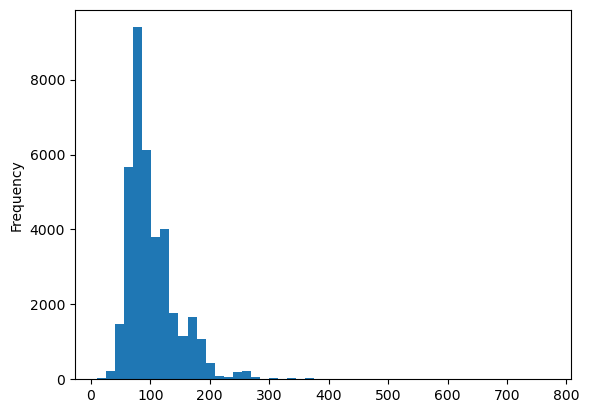

In [1255]:
df['Max Power Delivered'].plot(kind='hist', bins=50)
plt.show()

In [1256]:
hb['Max Power Delivered'].describe()

count    14920.000000
mean        73.673465
std         13.959075
min         10.800000
25%         67.000000
50%         74.000000
75%         81.860000
max        272.000000
Name: Max Power Delivered, dtype: float64

In [1257]:
df[df['Max Power Delivered']<=50].loc[:, ['model', 'Max Power Delivered']].drop_duplicates()

,model,Max Power Delivered
6,maruti alto,38.40
49,maruti alto 800,47.30
66,maruti alto 800,40.36
93,maruti alto 800,40.30
150,tata nano,37.48
224,bajaj re60,10.80
442,tata nano,32.50
1038,maruti omni,32.80
1048,maruti 800,35.50
1193,mahindra e2o,25.50


In [1258]:
df[df['Max Power Delivered']>=400].loc[:, ['model', 'Max Power Delivered']].drop_duplicates()

,model,Max Power Delivered
1209,mercedes-benz eqc,402.30
2745,bmw 6 series,450.00
2758,mercedes-benz amg gle 53,435.00
2759,bmw m2,410.00
2760,lamborghini huracan,602.12
2764,ferrari 488 gtb,659.78
2766,ferrari sf90 stradale,769.31
2767,bmw m series,429.00
2769,bentley continental,500.00
2774,aston martin vantage,420.00


In [1259]:
df[df.model == 'ferrari sf90 stradale']

,loc,myear,body,transmission,fuel,km,ip,imgCount,threesixty,dvn,oem,model,variant,City,listed_price,discountValue,utype,carType,top_features,comfort_features,interior_features,exterior_features,safety_features,Engine Type,No of Cylinder,Valves per Cylinder,Valve Configuration,Turbo Charger,Super Charger,Length,Width,Height,Wheel Base,Front Tread,Rear Tread,Kerb Weight,Gross Weight,Gear Box,Drive Type,Seats,Steering Type,Turning Radius,Front Brake Type,Rear Brake Type,Top Speed,Acceleration,Tyre Type,Doors,Cargo Volume,state,exterior_color,owner_type,Fuel Suppy System,Compression Ratio,Alloy Wheel Size,Ground Clearance Unladen,Max Power Delivered,Max Power At,Max Torque Delivered,Max Torque At,Bore,Stroke
2766,NaN,2022,coupe,automatic,petrol,50000.0,0,2,False,ferrari sf90 stradale coupe v8,ferrari,ferrari sf90 stradale,coupe v8,alwar,44425000.0,0,individual,partner,"['drive modes', 'find my car location', 'air c...","['drive modes', 'find my car location', 'remot...","['air conditioner', 'heater', 'adjustable stee...","['power adjustable exterior rear view mirror',...","['anti lock braking system', 'brake assist', '...",v8-90°-turbo,8.0,8.0,NaN,True,True,4710.0,1972.0,1186.0,2650.0,NaN,NaN,1570.0,NaN,8 speed,awd,2.0,NaN,NaN,NaN,NaN,340.0,2.5,tubeless radial,2.0,74.0,rajasthan,red,first,NaN,9.5,NaN,NaN,769.31,7500.0,800.0,6000.0,NaN,NaN


## Filling the missing value of Max power delivered 

In [1260]:
## max power delivered  -- cng 
df.loc[
    (df['model'].isin(['hyundai santro','hyundai santro xing'])) & (df['fuel'] == 'cng'), 'Max Power Delivered'
] = df.loc[
   (df['model'].isin(['hyundai santro','hyundai santro xing']))  & (df['fuel'] == 'cng'), 'Max Power Delivered'
].fillna('63')

In [1261]:
## , the 2019 Maruti Celerio Tour H2 CNG has a maximum power of 58.3 bhp at 6000 rpm when running on CNG.
df.loc[
    (df['model'].isin(['maruti celerio tour 2018-2021'])) & (df['fuel'] == 'cng'), 'Max Power Delivered'
] = df.loc[
   (df['model'].isin(['maruti celerio tour 2018-2021']))  & (df['fuel'] == 'cng'), 'Max Power Delivered'
].fillna('58')

In [1262]:
## , the maruti omni cng 35 bhp
df.loc[
    (df['model'].isin(['maruti omni'])) & (df['fuel'] == 'cng'), 'Max Power Delivered'
] = df.loc[
   (df['model'].isin(['maruti omni']))  & (df['fuel'] == 'cng'), 'Max Power Delivered'
].fillna('35')

In [1263]:
## the maruti omni lpg  35 bhp
df.loc[
    (df['model'].isin(['maruti omni'])) & (df['fuel'] == 'lpg'), 'Max Power Delivered'
] = df.loc[
   (df['model'].isin(['maruti omni']))  & (df['fuel'] == 'lpg'), 'Max Power Delivered'
].fillna('35')

In [1264]:
## hyundai santro xing lpg - 62
df.loc[
    (df['model'].isin(['hyundai santro xing'])) & (df['fuel'] == 'lpg'), 'Max Power Delivered'
] = df.loc[
   (df['model'].isin(['hyundai santro xing']))  & (df['fuel'] == 'lpg'), 'Max Power Delivered'
].fillna('62')

In [1265]:
## toyota qualis - 75 diesel
df.loc[
    (df['model'].isin(['toyota qualis'])) & (df['fuel'] == 'diesel'), 'Max Power Delivered'
] = df.loc[
   (df['model'].isin(['toyota qualis']))  & (df['fuel'] == 'diesel'), 'Max Power Delivered'
].fillna('75')

In [1266]:
## toyota etios liva - 67.06
df.loc[
    (df['model'].isin(['toyota etios liva'])) & (df['fuel'] == 'diesel'), 'Max Power Delivered'
] = df.loc[
   (df['model'].isin(['toyota etios liva']))  & (df['fuel'] == 'diesel'), 'Max Power Delivered'
].fillna('67.06')


In [1267]:
## toyota etios
df.loc[
    (df['model'].isin(['toyota etios'])) & (df['fuel'] == 'diesel'), 'Max Power Delivered'
] = df.loc[
   (df['model'].isin(['toyota etios']))  & (df['fuel'] == 'diesel'), 'Max Power Delivered'
].fillna('67.06')

In [1268]:
## tata indica - 75
df.loc[
    (df['model'].isin(['tata indica'])) & (df['fuel'] == 'diesel'), 'Max Power Delivered'
] = df.loc[
   (df['model'].isin(['tata indica']))  & (df['fuel'] == 'diesel'), 'Max Power Delivered'
].fillna('75')

In [1269]:
## The 2011 Nissan Micra diesel has a maximum power of 65 bhp at 4000 rpm
df.loc[
    (df['model'].isin(['nissan micra'])) & (df['fuel'] == 'diesel'), 'Max Power Delivered'
] = df.loc[
   (df['model'].isin(['nissan micra']))  & (df['fuel'] == 'diesel'), 'Max Power Delivered'
].fillna('65')


In [1270]:
## ## the maruti swift  diesel   75 bhp
df.loc[
    (df['model'].isin(['maruti swift'])) & (df['fuel'] == 'diesel'), 'Max Power Delivered'
] = df.loc[
   (df['model'].isin(['maruti swift']))  & (df['fuel'] == 'diesel'), 'Max Power Delivered'
].fillna('75')

In [1271]:
## The 2009 Mahindra Xylo E8 BS4 has a maximum power of 114 bhp at 3800 rpm
df.loc[
    (df['model'].isin(['mahindra xylo'])) & (df['fuel'] == 'diesel'), 'Max Power Delivered'
] = df.loc[
   (df['model'].isin(['mahindra xylo']))  & (df['fuel'] == 'diesel'), 'Max Power Delivered'
].fillna('114')

In [1272]:
## The 1983 Mahindra Willys CJ 3B (4x4) typically has a maximum power of 55 bhp at 4000 rpm

df.loc[
    (df['model'].isin(['mahindra willys'])) & (df['fuel'] == 'diesel'), 'Max Power Delivered'
] = df.loc[
   (df['model'].isin(['mahindra willys']))  & (df['fuel'] == 'diesel'), 'Max Power Delivered'
].fillna('55')

In [1273]:
## The 2002 Mahindra Jeep MM 540 DP typically has a maximum power of 62 bhp at 4500 rpm
df.loc[
    (df['model'].isin(['mahindra jeep'])) & (df['fuel'] == 'diesel'), 'Max Power Delivered'
] = df.loc[
   (df['model'].isin(['mahindra jeep']))  & (df['fuel'] == 'diesel'), 'Max Power Delivered'
].fillna('62')

In [1274]:
## The 2022 Mahindra Bolero Pik-Up ExtraStrong CBC 1.3T MS has a maximum power of 75.09 bhp at 3200 rpm.
df.loc[
    (df['model'].isin(['mahindra bolero pik up extra strong'])) & (df['fuel'] == 'diesel'), 'Max Power Delivered'
] = df.loc[
   (df['model'].isin(['mahindra bolero pik up extra strong']))  & (df['fuel'] == 'diesel'), 'Max Power Delivered'
].fillna('75.09')

In [1275]:
## The 1994 Mahindra Armada Grand 4WD typically has a maximum power of 62 bhp at 4500 rpm

df.loc[
    (df['model'].isin(['mahindra armada'])) & (df['fuel'] == 'diesel'), 'Max Power Delivered'
] = df.loc[
   (df['model'].isin(['mahindra armada']))  & (df['fuel'] == 'diesel'), 'Max Power Delivered'
].fillna('62')

In [1276]:
## jeep compass 170
df.loc[
    (df['model'].isin(['jeep compass trailhawk'])) & (df['fuel'] == 'diesel'), 'Max Power Delivered'
] = df.loc[
   (df['model'].isin(['jeep compass trailhawk']))  & (df['fuel'] == 'diesel'), 'Max Power Delivered'
].fillna('170')

In [1277]:
## The 2012 Ford Endeavour Hurricane LE has a maximum power of 154 bhp at 3200 rpm
df.loc[
    (df['model'].isin(['ford endeavour'])) & (df['fuel'] == 'diesel'), 'Max Power Delivered'
] = df.loc[
   (df['model'].isin(['ford endeavour']))  & (df['fuel'] == 'diesel'), 'Max Power Delivered'
].fillna('154')

In [1278]:
## force trax cruiser -60 
df.loc[
    (df['model'].isin(['force trax cruiser'])) & (df['fuel'] == 'diesel'), 'Max Power Delivered'
] = df.loc[
   (df['model'].isin(['force trax cruiser']))  & (df['fuel'] == 'diesel'), 'Max Power Delivered'
].fillna('60')

In [1279]:
## bmw x3 -218
df.loc[
    (df['model'].isin(['bmw x3'])) & (df['fuel'] == 'diesel'), 'Max Power Delivered'
] = df.loc[
   (df['model'].isin(['bmw x3']))  & (df['fuel'] == 'diesel'), 'Max Power Delivered'
].fillna('218')

In [1280]:
## volkswagen touareg -276 bhp at 6200 rpm. petrol
df.loc[
    (df['model'].isin(['volkswagen touareg'])) & (df['fuel'] == 'petrol'), 'Max Power Delivered'
] = df.loc[
   (df['model'].isin(['volkswagen touareg']))  & (df['fuel'] == 'petrol'), 'Max Power Delivered'
].fillna('276')

In [1281]:
## toyota etios liva - 78.9
df.loc[
    (df['model'].isin(['toyota etios liva'])) & (df['fuel'] == 'petrol'), 'Max Power Delivered'
] = df.loc[
   (df['model'].isin(['toyota etios liva']))  & (df['fuel'] == 'petrol'), 'Max Power Delivered'
].fillna('78.9')

In [1282]:
## The 2011 Toyota Etios V has a maximum power of 80 bhp at 5600 rpm
df.loc[
    (df['model'].isin(['toyota etios'])) & (df['fuel'] == 'petrol'), 'Max Power Delivered'
] = df.loc[
   (df['model'].isin(['toyota etios']))  & (df['fuel'] == 'petrol'), 'Max Power Delivered'
].fillna('80')

In [1283]:
## The 2009 Nissan Teana 230JM has a maximum power of 170 bhp at 6000 rpm

df.loc[
    (df['model'].isin(['nissan teana'])) & (df['fuel'] == 'petrol'), 'Max Power Delivered'
] = df.loc[
   (df['model'].isin(['nissan teana']))  & (df['fuel'] == 'petrol'), 'Max Power Delivered'
].fillna('170')


In [1284]:
## The 2007 Mercedes-Benz E-Class E220 petrol has a maximum power of 184 bhp at 5800 rpm
df.loc[
    (df['model'].isin(['mercedes-benz e-class'])) & (df['fuel'] == 'petrol'), 'Max Power Delivered'
] = df.loc[
   (df['model'].isin(['mercedes-benz e-class']))  & (df['fuel'] == 'petrol'), 'Max Power Delivered'
].fillna('184')

In [1285]:
## The 2002 Mercedes-Benz C-Class C180 Elegance has a maximum power of 122 bhp at 5300 rpm
df.loc[
    (df['model'].isin(['mercedes-benz c-class'])) & (df['fuel'] == 'petrol'), 'Max Power Delivered'
] = df.loc[
   (df['model'].isin(['mercedes-benz c-class']))  & (df['fuel'] == 'petrol'), 'Max Power Delivered'
].fillna('122')


In [1286]:
## maruti zen estilo -67.1
df.loc[
    (df['model'].isin(['maruti zen estilo'])) & (df['fuel'] == 'petrol'), 'Max Power Delivered'
] = df.loc[
   (df['model'].isin(['maruti zen estilo']))  & (df['fuel'] == 'petrol'), 'Max Power Delivered'
].fillna('67.1')

In [1287]:
## maruti omni -34.2
df.loc[
    (df['model'].isin(['maruti omni'])) & (df['fuel'] == 'petrol'), 'Max Power Delivered'
] = df.loc[
   (df['model'].isin(['maruti omni']))  & (df['fuel'] == 'petrol'), 'Max Power Delivered'
].fillna('34.2')

In [1288]:
##maruti gypsy - 80
df.loc[
    (df['model'].isin(['maruti gypsy'])) & (df['fuel'] == 'petrol'), 'Max Power Delivered'
] = df.loc[
   (df['model'].isin(['maruti gypsy']))  & (df['fuel'] == 'petrol'), 'Max Power Delivered'
].fillna('80')

In [1289]:
## maruti estilo -67
df.loc[
    (df['model'].isin(['maruti estilo'])) & (df['fuel'] == 'petrol'), 'Max Power Delivered'
] = df.loc[
   (df['model'].isin(['maruti estilo']))  & (df['fuel'] == 'petrol'), 'Max Power Delivered'
].fillna('67')

In [1290]:
## maruti esteem - 85
df.loc[
    (df['model'].isin(['maruti esteem'])) & (df['fuel'] == 'petrol'), 'Max Power Delivered'
] = df.loc[
   (df['model'].isin(['maruti esteem']))  & (df['fuel'] == 'petrol'), 'Max Power Delivered'
].fillna('85')

In [1291]:
## The 2005 Maruti Baleno VXi has a maximum power of 94 bhp at 5500 rpm
df.loc[
    (df['model'].isin(['maruti baleno'])) & (df['fuel'] == 'petrol'), 'Max Power Delivered'
] = df.loc[
   (df['model'].isin(['maruti baleno']))  & (df['fuel'] == 'petrol'), 'Max Power Delivered'
].fillna('94')

In [1292]:
## maruti 1000 , 47
df.loc[
    (df['model'].isin(['maruti 1000'])) & (df['fuel'] == 'petrol'), 'Max Power Delivered'
] = df.loc[
   (df['model'].isin(['maruti 1000']))  & (df['fuel'] == 'petrol'), 'Max Power Delivered'
].fillna('47')

In [1293]:
## The 2023 Land Rover Range Rover 4.4 I Petrol SE has a maximum power of 523 bhp at 5500 rpm.
df.loc[
    (df['model'].isin(['land rover range rover'])) & (df['fuel'] == 'petrol'), 'Max Power Delivered'
] = df.loc[
   (df['model'].isin(['land rover range rover']))  & (df['fuel'] == 'petrol'), 'Max Power Delivered'
].fillna('523')

In [1294]:
## hyundai santro xing ,santro  - 63
df.loc[
    (df['model'].isin(['hyundai santro xing','hyundai santro'])) & (df['fuel'] == 'petrol'), 'Max Power Delivered'
] = df.loc[
   (df['model'].isin(['hyundai santro xing','hyundai santro']))  & (df['fuel'] == 'petrol'), 'Max Power Delivered'
].fillna('63')

In [1295]:
## hyundai i10 - 78.9 
df.loc[
    (df['model'].isin(['hyundai i10'])) & (df['fuel'] == 'petrol'), 'Max Power Delivered'
] = df.loc[
   (df['model'].isin(['hyundai i10']))  & (df['fuel'] == 'petrol'), 'Max Power Delivered'
].fillna('78.9')

In [1296]:
## hyundai i20 - 99 
df.loc[
    (df['model'].isin(['hyundai i20'])) & (df['fuel'] == 'petrol'), 'Max Power Delivered'
] = df.loc[
   (df['model'].isin(['hyundai i20']))  & (df['fuel'] == 'petrol'), 'Max Power Delivered'
].fillna('99')

In [1297]:
## The 2007 Hummer H3 SUV has a maximum power of 242 bhp at 4400 rpm.
df.loc[
    (df['model'].isin(['hummer h3'])) & (df['fuel'] == 'petrol'), 'Max Power Delivered'
] = df.loc[
   (df['model'].isin(['hummer h3']))  & (df['fuel'] == 'petrol'), 'Max Power Delivered'
].fillna('242')

In [1298]:
## honda jazz  89
df.loc[
    (df['model'].isin(['honda jazz'])) & (df['fuel'] == 'petrol'), 'Max Power Delivered'
] = df.loc[
   (df['model'].isin(['honda jazz']))  & (df['fuel'] == 'petrol'), 'Max Power Delivered'
].fillna('89')


In [1299]:
## honda cr-v
df.loc[
    (df['model'].isin(['honda cr-v'])) & (df['fuel'] == 'petrol'), 'Max Power Delivered'
] = df.loc[
   (df['model'].isin(['honda cr-v']))  & (df['fuel'] == 'petrol'), 'Max Power Delivered'
].fillna('152')

In [1300]:
## honda city variant 1.5 gxi -  78 
df.loc[
    (df['model'].isin(['honda city'])) & (df['fuel'] == 'petrol') & (df['variant'] == '1.5 gxi'), 'Max Power Delivered'
] = df.loc[
   (df['model'].isin(['honda city']))  & (df['fuel'] == 'petrol') & (df['variant'] == '1.5 gxi'), 'Max Power Delivered'
].fillna('78')

In [1301]:
## 2010 Honda City 1.5 GXi CVT has a maximum power of 118 bhp at 6600 rpm.
df.loc[
    (df['model'].isin(['honda city'])) & (df['fuel'] == 'petrol') & (df['variant'] == '1.5 gxi cvt'), 'Max Power Delivered'
] = df.loc[
   (df['model'].isin(['honda city']))  & (df['fuel'] == 'petrol') & (df['variant'] == '1.5 gxi cvt'), 'Max Power Delivered'
].fillna('118')

In [1302]:
## ford fiesta - 101 
df.loc[
    (df['model'].isin(['ford fiesta'])) & (df['fuel'] == 'petrol'), 'Max Power Delivered'
] = df.loc[
   (df['model'].isin(['ford fiesta']))  & (df['fuel'] == 'petrol'), 'Max Power Delivered'
].fillna('101')

In [1303]:
## fiat - 57 
df.loc[
    (df['model'].isin(['fiat palio','fiat palio nv'])) & (df['fuel'] == 'petrol'), 'Max Power Delivered'
] = df.loc[
   (df['model'].isin(['fiat palio','fiat palio nv']))  & (df['fuel'] == 'petrol'), 'Max Power Delivered'
].fillna('57')

In [1304]:
## The 2007 Fiat Adventure Sport 1.6 has a maximum power of 100 bhp at 5500 rpm.   
df.loc[
    (df['model'].isin(['fiat adventure'])) & (df['fuel'] == 'petrol'), 'Max Power Delivered'
] = df.loc[
   (df['model'].isin(['fiat adventure']))  & (df['fuel'] == 'petrol'), 'Max Power Delivered'
].fillna('100')

In [1305]:
## chevrolet optra - 104 
df.loc[
    (df['model'].isin(['chevrolet optra'])) & (df['fuel'] == 'petrol'), 'Max Power Delivered'
] = df.loc[
   (df['model'].isin(['chevrolet optra']))  & (df['fuel'] == 'petrol'), 'Max Power Delivered'
].fillna('104')


In [1306]:
## The 2003 Chevrolet Forester AWD Petrol typically has a maximum power of 120 bhp at 5600 rpm.
df.loc[
    (df['model'].isin(['chevrolet forester'])) & (df['fuel'] == 'petrol'), 'Max Power Delivered'
] = df.loc[
   (df['model'].isin(['chevrolet forester']))  & (df['fuel'] == 'petrol'), 'Max Power Delivered'
].fillna('120')


In [1307]:
df['Max Power Delivered'].isnull().sum()

0

In [1308]:
df['Max Power Delivered'].describe()

count     37794.0
unique      607.0
top          88.5
freq       1315.0
Name: Max Power Delivered, dtype: float64

In [1309]:
df['Max Power Delivered'].dtype

dtype('O')

In [1310]:
df['Max Power Delivered'] = df['Max Power Delivered'].astype('float64')

In [1311]:
df['Max Power Delivered'].dtype

dtype('float64')

In [1312]:
df['Max Power Delivered'].describe()

count    37794.000000
mean       102.594676
std         42.840273
min         10.800000
25%         74.020000
50%         88.500000
75%        118.350000
max        769.310000
Name: Max Power Delivered, dtype: float64

# Tyre Type

In [1313]:
df['Tyre Type'].value_counts()

Tyre Type
tubeless radial    29091
tubeless            8182
runflat              260
tube                   4
Name: count, dtype: int64

In [1314]:
mode_dict = df.groupby('dvn')['Tyre Type'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan).to_dict()

def fill_missing(row, mode_dict, ref, col):
    if pd.isnull(row[col]):
        return mode_dict.get(row[ref], row[col])
    return row[col]

df['Tyre Type'] = df.apply(lambda x: fill_missing(x, mode_dict, 'dvn', 'Tyre Type'), axis=1)

In [1315]:
df['Tyre Type'].isna().sum()

127

In [1316]:
mode_dict = df.groupby('model')['Tyre Type'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan).to_dict()

df['Tyre Type'] = df.apply(lambda x: fill_missing(x, mode_dict, 'model', 'Tyre Type'), axis=1)

In [1317]:
df['Tyre Type'].isna().sum()

37

In [1318]:
df[df['Tyre Type'].isna()]

,loc,myear,body,transmission,fuel,km,ip,imgCount,threesixty,dvn,oem,model,variant,City,listed_price,discountValue,utype,carType,top_features,comfort_features,interior_features,exterior_features,safety_features,Engine Type,No of Cylinder,Valves per Cylinder,Valve Configuration,Turbo Charger,Super Charger,Length,Width,Height,Wheel Base,Front Tread,Rear Tread,Kerb Weight,Gross Weight,Gear Box,Drive Type,Seats,Steering Type,Turning Radius,Front Brake Type,Rear Brake Type,Top Speed,Acceleration,Tyre Type,Doors,Cargo Volume,state,exterior_color,owner_type,Fuel Suppy System,Compression Ratio,Alloy Wheel Size,Ground Clearance Unladen,Max Power Delivered,Max Power At,Max Torque Delivered,Max Torque At,Bore,Stroke
170,new delhi g.p.o.,2019,hatchback,manual,cng,37859.0,0,20,True,maruti celerio tour 2018-2021 h2 cng,maruti,maruti celerio tour 2018-2021,h2 cng,new delhi,450000.0,0,dealer,partner,[],[],[],[],[],NaN,3.0,4.0,NaN,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,delhi,white,first,NaN,NaN,NaN,NaN,58.00,NaN,78.0,NaN,NaN,NaN
243,NaN,2019,hatchback,manual,cng,80000.0,0,11,False,maruti celerio tour 2018-2021 h2 cng,maruti,maruti celerio tour 2018-2021,h2 cng,rajahmundry,459999.0,0,individual,partner,[],[],[],[],[],NaN,3.0,4.0,NaN,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,andhra pradesh,white,first,NaN,NaN,NaN,NaN,58.00,NaN,78.0,NaN,NaN,NaN
307,NaN,2018,hatchback,manual,cng,70000.0,0,1,False,maruti celerio tour 2018-2021 h2 cng,maruti,maruti celerio tour 2018-2021,h2 cng,bardoli,395000.0,0,individual,partner,[],[],[],[],[],NaN,3.0,4.0,NaN,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,gujarat,white,first,NaN,NaN,NaN,NaN,58.00,NaN,78.0,NaN,NaN,NaN
1220,pune city,2022,suv,automatic,electric,1369.0,0,20,True,tata nexon ev max xz plus lux,tata,tata nexon ev max,xz plus lux,pune,1800000.0,0,dealer,partner,"['power windows front', 'power windows rear', ...","['power windows front', 'power windows rear', ...","['leather seats', 'leather steering wheel', 'h...","['fog lights front', 'electric folding rear vi...","['anti lock braking system', 'centeral locking...",NaN,0.0,0.0,NaN,True,True,3993.0,1811.0,1616.0,2498.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,power,5.1,disc,disc,NaN,9.0,NaN,5.0,350.0,maharashtra,grey,first,NaN,NaN,16.0,NaN,141.04,NaN,250.0,NaN,NaN,NaN
1253,bangalore city,2022,suv,automatic,electric,1634.0,0,15,False,tata nexon ev max xz plus lux,tata,tata nexon ev max,xz plus lux,bangalore,1890000.0,0,dealer,partner,"['power windows front', 'power windows rear', ...","['power windows front', 'power windows rear', ...","['leather seats', 'leather steering wheel', 'h...","['fog lights front', 'electric folding rear vi...","['anti lock braking system', 'centeral locking...",NaN,0.0,0.0,NaN,True,True,3993.0,1811.0,1616.0,2498.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,power,5.1,disc,disc,NaN,9.0,NaN,5.0,350.0,karnataka,blue,first,NaN,NaN,16.0,NaN,141.04,NaN,250.0,NaN,NaN,NaN
1259,ashok vihar,2017,hatchback,automatic,electric,20000.0,0,35,False,mini cooper se electric,mini,mini cooper se,electric,new delhi,3690000.0,0,dealer,partner,"['power steering', 'power windows front', 'air...","['power steering', 'power windows front', 'pow...","['air conditioner', 'heater', 'adjustable stee...","['adjustable head lights', 'fog lights front',...","['anti lock braking system', 'brake assist', '...",NaN,0.0,0.0,NaN,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,7.3,NaN,5.0,211.0,delhi,red,first,NaN,NaN,17.0,NaN,181.03,NaN,270.0,1000.0,NaN,NaN
1273,chandigarh,2022,suv,automatic,electric,1981.0,0,17,False,tata nexon ev max xz plus,tata,tata nexon ev max,xz plus,chandigarh,1500000.0,0,dealer,partner,"['power windows front', 'power windows rear', ...","['power windows front', 'power windows rear', ...","['fabric upholstery', 'leather steering wheel'...","['fog lights front', 'electric folding rear vi...","['anti lock 

In [1319]:
df.groupby('body')['Tyre Type'].agg(lambda x: x.mode()[0])

body
convertibles       tubeless radial
coupe              tubeless radial
hatchback          tubeless radial
hybrids                   tubeless
luxury vehicles    tubeless radial
minivans                  tubeless
muv                tubeless radial
pickup trucks      tubeless radial
sedan              tubeless radial
suv                tubeless radial
wagon              tubeless radial
Name: Tyre Type, dtype: object

In [1320]:
df['Tyre Type'] = df.groupby('body')['Tyre Type'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x))

In [1321]:
df['Tyre Type'].isna().sum()

0

# Rear Brake Type

In [1322]:
df['Rear Brake Type'].describe()

count     37468
unique        6
top        drum
freq      29955
Name: Rear Brake Type, dtype: object

In [1323]:
df['Rear Brake Type'].value_counts()

Rear Brake Type
drum               29955
disc                6194
ventilated disc      944
caliper              310
disc & drum           64
carbon ceramic         1
Name: count, dtype: int64

In [1324]:
mode_dict = df.groupby('dvn')['Rear Brake Type'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan).to_dict()

def fill_missing_rear(row, mode_dict):
    if pd.isnull(row['Rear Brake Type']):
        return mode_dict.get(row['dvn'], row['Rear Brake Type'])
    return row['Rear Brake Type']

df['Rear Brake Type'] = df.apply(lambda x: fill_missing_rear(x, mode_dict), axis=1)

In [1325]:
df['Rear Brake Type'].isna().sum()

231

In [1326]:
mode_dict = df.groupby('body')['Rear Brake Type'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan).to_dict()

def fill_missing_rear(row, mode_dict):
    if pd.isnull(row['Rear Brake Type']):
        return mode_dict.get(row['body'], row['Rear Brake Type'])
    return row['Rear Brake Type']

df['Rear Brake Type'] = df.apply(lambda x: fill_missing_rear(x, mode_dict), axis=1)

In [1327]:
df['Rear Brake Type'].isna().sum()

0

In [1328]:
df['Rear Brake Type'].value_counts()

Rear Brake Type
drum               30274
disc                6201
ventilated disc      944
caliper              310
disc & drum           64
carbon ceramic         1
Name: count, dtype: int64

# Front Brake Type

In [1329]:
df['Front Brake Type'].value_counts()

Front Brake Type
disc               23326
ventilated disc    13748
caliper              312
drum                  70
disc & drum           10
carbon ceramic         1
Name: count, dtype: int64

In [1330]:
df['Front Brake Type'].isna().sum()

327

In [1331]:
mode_dict = df.groupby('dvn')['Front Brake Type'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan).to_dict()

def fill_missing_front(row, mode_dict):
    if pd.isnull(row['Front Brake Type']):
        return mode_dict.get(row['dvn'], row['Front Brake Type'])
    return row['Front Brake Type']

df['Front Brake Type'] = df.apply(lambda x: fill_missing_front(x, mode_dict), axis=1)

In [1332]:
df['Front Brake Type'].isna().sum()

232

In [1333]:
mode_dict = df.groupby('body')['Front Brake Type'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan).to_dict()

def fill_missing_front(row, mode_dict):
    if pd.isnull(row['Front Brake Type']):
        return mode_dict.get(row['body'], row['Front Brake Type'])
    return row['Front Brake Type']

df['Front Brake Type'] = df.apply(lambda x: fill_missing_front(x, mode_dict), axis=1)

In [1334]:
df['Front Brake Type'].isna().sum()

0

In [1335]:
df['Front Brake Type'].value_counts()

Front Brake Type
disc               23564
ventilated disc    13837
caliper              312
drum                  70
disc & drum           10
carbon ceramic         1
Name: count, dtype: int64

# Length

In [1336]:
df['Length'].describe()

count    37432.000000
mean      4113.700230
std        399.364155
min       2752.000000
25%       3795.000000
50%       3995.000000
75%       4440.000000
max       5982.000000
Name: Length, dtype: float64

In [1337]:
## bmw x3  length - 4648
df.loc[(df['model'] == 'bmw x3'),'Length'] = df.loc[(df['model'] == 'bmw x3'),'Length'].fillna('4648')


In [1338]:
## bmw  7 series  length - 5219
df.loc[(df['model'] == 'bmw 7 series'),'Length'] = df.loc[(df['model'] == 'bmw 7 series'),'Length'].fillna('5219')

In [1339]:
## bmw 5 series 2011 varaint 530d 4899
df.loc[(df['model'] == 'bmw 5 series')& (df['variant'] == '530d')
,'Length'] = df.loc[(df['model'] == 'bmw 5 series')& (df['variant'] == '530d'),'Length'].fillna('4899')

In [1340]:
## bmw 3 series gran limousine 4819
df.loc[
    (df['model'] == 'bmw 3 series gran limousine'), 'Length'
] = df.loc[
    (df['model'] == 'bmw 3 series gran limousine'), 'Length'
].fillna('4819')

In [1341]:
## chevrolet optra chevrolet forester  4540

df.loc[
    (df['model'].isin(['chevrolet optra', 'chevrolet forester'])), 'Length'
] = df.loc[
    (df['model'].isin(['chevrolet optra', 'chevrolet forester'])), 'Length'
].fillna('4540')

In [1342]:
## The length of the 2007 Force Trax Cruiser Classic BSIII is 5120 mm.
df.loc[
    (df['model'].isin(['force trax cruiser'])), 'Length'
] = df.loc[
    (df['model'].isin(['force trax cruiser'])), 'Length'
].fillna('5120')

In [1343]:
## The length of the 2010 Ford Fiesta 1.6 SXI Duratec sedan is 4,282 mm
df.loc[
    (df['model'].isin(['ford fiesta'])), 'Length'
] = df.loc[
    (df['model'].isin(['ford fiesta'])), 'Length'
].fillna('4282')

In [1344]:
## The length of the 2012 Ford Endeavour Hurricane LE is 4,720 mm.
df.loc[
    (df['model'].isin(['ford endeavour'])), 'Length'
] = df.loc[
    (df['model'].isin(['ford endeavour'])), 'Length'
].fillna('4720')

In [1345]:
## fiat palio,fiat adventure --3827
df.loc[
    (df['model'].isin(['fiat palio', 'fiat palio nv','fiat adventure'])), 'Length'
] = df.loc[
    (df['model'].isin(['fiat palio', 'fiat palio nv','fiat adventure'])),'Length'
].fillna('3827')

In [1346]:
## honda jazz 3900
df.loc[
    (df['model'] == 'honda jazz') & (df['myear'] ==   2012), 'Length'
] = df.loc[
    (df['model'] == 'honda jazz') & (df['myear'] ==   2012),'Length'
].fillna('3900')

In [1347]:
##honda city -  4,390 
df.loc[
    (df['model'] == 'honda city'), 'Length'
] = df.loc[
    (df['model'] == 'honda city'),'Length'
].fillna('4390')

In [1348]:
##honda cr-v 4250
df.loc[
    (df['model'] == 'honda cr-v'), 'Length'
] = df.loc[
    (df['model'] == 'honda cr-v'),'Length'
].fillna('4250')


In [1349]:
## The length of the 2017 Honda Accord sedan is 4,930 mm.
df.loc[
    (df['model'] == 'honda accord'), 'Length'
] = df.loc[
    (df['model'] == 'honda accord'),'Length'
].fillna('4930')


In [1350]:
## The 2007 Hummer H3 SUV has a length of approximately 4,782 mm.
df.loc[
    (df['model'] == 'hummer h3'), 'Length'
] = df.loc[
    (df['model'] == 'hummer h3'),'Length'
].fillna('4782')

In [1351]:
##  3,565 mm hyundai santro', 'hyundai santro xing'
df.loc[
    (df['model'].isin(['hyundai santro', 'hyundai santro xing'])) & (df['fuel'] == 'cng'), 'Length'
] = df.loc[
     (df['model'].isin(['hyundai santro', 'hyundai santro xing'])) & (df['fuel'] == 'cng'),'Length'
].fillna('3565')


In [1352]:
##  3,995 mm.hyundai xcent
df.loc[
    (df['model'] == 'hyundai xcent'), 'Length'
] = df.loc[
    (df['model'] == 'hyundai xcent'),'Length'
].fillna('3955')


In [1353]:
##  3,565 mm hyundai santro', 'hyundai santro xing' lpg
df.loc[
    (df['model'].isin(['hyundai santro', 'hyundai santro xing'])) & (df['fuel'] == 'lpg'), 'Length'
] = df.loc[
     (df['model'].isin(['hyundai santro', 'hyundai santro xing'])) & (df['fuel'] == 'lpg'),'Length'
].fillna('3565')


In [1354]:
##  3,565 mm hyundai santro', 'hyundai santro xing' petrol 
df.loc[
    (df['model'].isin(['hyundai santro', 'hyundai santro xing'])) & (df['fuel'] == 'petrol'), 'Length'
] = df.loc[
     (df['model'].isin(['hyundai santro', 'hyundai santro xing'])) & (df['fuel'] == 'petrol'),'Length'
].fillna('3565')


In [1355]:
## The length of the 2010 Hyundai i10 Asta VTVT hatchback is 3,565 mm.
df.loc[
    (df['model'].isin(['hyundai i10'])), 'Length'
] = df.loc[
     (df['model'].isin(['hyundai i10'])),'Length'
].fillna('3565')


In [1356]:
## The length of the 2014 Hyundai i20 New Sportz AT 1.4 hatchback is 3,995 mm
df.loc[
    (df['model'].isin(['hyundai i20'])), 'Length'
] = df.loc[
     (df['model'].isin(['hyundai i20'])),'Length'
].fillna('3995')


In [1357]:
## The 1994 Mahindra Armada Grand 4WD SUV has a length of approximately 4,425 mm.
df.loc[
    (df['model'] == 'mahindra armada'), 'Length'
] = df.loc[
    (df['model'] == 'mahindra armada'),'Length'
].fillna('4425')


In [1358]:
## The 1983 Mahindra Willys CJ 3B 4x4 has a length of approximately 3,372 mm.
df.loc[
    (df['model'] == 'mahindra willys'), 'Length'
] = df.loc[
    (df['model'] == 'mahindra willys'),'Length'
].fillna('3372')


In [1359]:
## The 2002 Mahindra Jeep MM 540 DP has a length of approximately 3,760 mm.
df.loc[
    (df['model'] == 'mahindra jeep'), 'Length'
] = df.loc[
    (df['model'] == 'mahindra jeep'),'Length'
].fillna('3760')


In [1360]:
## mahindra xylo -- 4520
df.loc[
    (df['model'] == 'mahindra xylo'), 'Length'
] = df.loc[
    (df['model'] == 'mahindra xylo'),'Length'
].fillna('4520')


In [1361]:
## The length of the Maruti Celerio Tour H2 CNG is 3695 mm.
df.loc[
    (df['model'] == 'maruti celerio tour 2018-2021'), 'Length'
] = df.loc[
    (df['model'] == 'maruti celerio tour 2018-2021'),'Length'
].fillna('3695')


In [1362]:
## maruti omi lpg 3370
df.loc[
    (df['model'] == 'maruti omni') & (df['fuel'].isin(['lpg','cng','petrol'])),'Length'
] = df.loc[
    (df['model'] == 'maruti omni') & (df['fuel'].isin(['lpg','cng','petrol'])),'Length'
].fillna('3370')

In [1363]:
## maruti swift diesel 3840
df.loc[
    (df['model'] == 'maruti swift') & (df['fuel'].isin(['diesel'])),'Length'
] = df.loc[
    (df['model'] == 'maruti swift') & (df['fuel'].isin(['diesel'])),'Length'
].fillna('3840')

In [1364]:
## maruti wagon r 3520
df.loc[
    (df['model'] == 'maruti wagon r') ,'Length'
] = df.loc[
    (df['model'] == 'maruti wagon r'),'Length'
].fillna('3520')


In [1365]:
## maruti zen estilo -3600
df.loc[
    (df['model'] == 'maruti zen estilo') ,'Length'
] = df.loc[
    (df['model'] == 'maruti zen estilo'),'Length'
].fillna('3600')


In [1366]:
## The length of the Mercedes-Benz C-Class 2001 sedan is 4526 mm
df.loc[
    (df['model'] == 'mercedes-benz c-class') ,'Length'
] = df.loc[
    (df['model'] == 'mercedes-benz c-class'),'Length'
].fillna('4562')

In [1367]:
## The length of the Mercedes-Benz E-Class 2007 sedan is 4818 mm.
df.loc[
    (df['model'] == 'mercedes-benz e-class') ,'Length'
] = df.loc[
    (df['model'] == 'mercedes-benz e-class'),'Length'
].fillna('4818')

In [1368]:
## The length of the Mini Cooper SE is 3,845 mm.
df.loc[
    (df['model'] == 'mini cooper se') ,'Length'
] = df.loc[
    (df['model'] == 'mini cooper se'),'Length'
].fillna('3845')


In [1369]:
## The length of the 2010 Mitsubishi Outlander is 4640 mm.
df.loc[
    (df['model'] == 'mitsubishi outlander') ,'Length'
] = df.loc[
    (df['model'] == 'mitsubishi outlander'),'Length'
].fillna('4640')


In [1370]:
## The length of the 2009 Nissan Teana 230JM is 4845 mm
df.loc[
    (df['model'] == 'nissan teana') ,'Length'
] = df.loc[
    (df['model'] == 'nissan teana'),'Length'
].fillna('4845')

In [1371]:
##The length of the 2011 Nissan Micra Diesel hatchback is 3780 mm
df.loc[
    (df['model'] == 'nissan micra') ,'Length'
] = df.loc[
    (df['model'] == 'nissan micra'),'Length'
].fillna('3780')


In [1372]:
## The length of the 2009 Skoda Laura 1.8 TSI Ambition is 4,569 mm
df.loc[
    (df['model'] == 'skoda new laura') ,'Length'
] = df.loc[
    (df['model'] == 'skoda new laura'),'Length'
].fillna('4569')


In [1373]:
## The length of the 2010 Tata Indica Aqua 1.3 Quadrajet ABS BSIV hatchback is 3795 mm.
df.loc[
    (df['model'] == 'tata indica') & (df['myear'] == 2010) ,'Length'
] = df.loc[
    (df['model'] == 'tata indica') & (df['myear'] == 2010),'Length'
].fillna('3795')

In [1374]:
## The length of the 2013 Tata Indica Aqua 1.3 Quadrajet ABS is 3,690 mm.
df.loc[
    (df['model'] == 'tata indica') & (df['myear'] == 2013) ,'Length'
] = df.loc[
    (df['model'] == 'tata indica') & (df['myear'] == 2013),'Length'
].fillna('3690')

In [1375]:
## The length of the 2008 Tata Indigo GLS BSIII sedan is 3,988 mm.
## The length of the 2009 Tata Indigo GLX BSIII sedan is 3,988 mm.
## The length of the 2017 Tata Indigo GLS sedan is 3,988 mm

df.loc[
    (df['model'] == 'tata indigo') ,'Length'
] = df.loc[
    (df['model'] == 'tata indigo') ,'Length'
].fillna('3988')

In [1376]:
## tata sumo victa 4285
df.loc[
    (df['model'] == 'tata sumo victa') ,'Length'
] = df.loc[
    (df['model'] == 'tata sumo victa') ,'Length'
].fillna('4285')


In [1377]:
## toyota etios 4265
df.loc[
    (df['model'] == 'toyota etios') ,'Length'
] = df.loc[
    (df['model'] == 'toyota etios') ,'Length'
].fillna('4265')


In [1378]:
## toyota etios liva 3775
df.loc[
    (df['model'] == 'toyota etios liva') ,'Length'
] = df.loc[
    (df['model'] == 'toyota etios liva') ,'Length'
].fillna('3775')



In [1379]:
## toyota qualis - 4425
df.loc[
    (df['model'] == 'toyota qualis') ,'Length'
] = df.loc[
    (df['model'] == 'toyota qualis') ,'Length'
].fillna('4425')


In [1380]:
## The length of the 2007 Volkswagen Touareg 3.6 V6 FSI is 4,754 mm
df.loc[
    (df['model'] == 'volkswagen touareg') ,'Length'
] = df.loc[
    (df['model'] == 'volkswagen touareg') ,'Length'
].fillna('4754')


In [1381]:
## The length of the 2005 Maruti Baleno VXI hatchback is 3,990 mm
df.loc[
    (df['model'] == 'maruti baleno') ,'Length'
] = df.loc[
    (df['model'] == 'maruti baleno') ,'Length'
].fillna('3990')


In [1382]:
##  maruti esteem - 4095
df.loc[
    (df['model'] == 'maruti esteem') ,'Length'
] = df.loc[
    (df['model'] == 'maruti esteem') ,'Length'
].fillna('4095')


In [1383]:
## The length of the 2009 Maruti Estilo LXi hatchback is 3,495 mm
df.loc[
    (df['model'] == 'maruti estilo') ,'Length'
] = df.loc[
    (df['model'] == 'maruti estilo') ,'Length'
].fillna('3495')

In [1384]:
## The length of the 1996 Maruti Gypsy E MG410W HT is 3,650 mm.
df.loc[
    (df['model'] == 'maruti gypsy') ,'Length'
] = df.loc[
    (df['model'] == 'maruti gypsy') ,'Length'
].fillna('3650')

In [1385]:
##The length of the 1996 Maruti 1000 STD sedan is 3,875 mm.
df.loc[
    (df['model'] == 'maruti 1000') ,'Length'
] = df.loc[
    (df['model'] == 'maruti 1000') ,'Length'
].fillna('3650')

In [1386]:
df.Length.isna().sum()

0

In [1387]:
df.Length.describe()

count     37794.0
unique      455.0
top        3995.0
freq       4628.0
Name: Length, dtype: float64

In [1388]:
df.Length = df.Length.astype('float64')

In [1389]:
df.Length.describe()

count    37794.000000
mean      4111.922025
std        400.507984
min       2752.000000
25%       3785.000000
50%       3995.000000
75%       4440.000000
max       5982.000000
Name: Length, dtype: float64

# Height

In [1390]:
df['Height'].describe()

count    37431.000000
mean      1577.542358
std        115.151558
min       1165.000000
25%       1495.000000
50%       1530.000000
75%       1642.000000
max       2075.000000
Name: Height, dtype: float64

In [1391]:
df['Height'].isna().sum()

363

In [1392]:
df.groupby('dvn')['Height'].median()

dvn
ambassador grand 1500 dsz bsiii    1600.0
ambassador grand 1800 bsiv         1593.0
ambassador grand 2000 dsz          1593.0
ambassador grand 2000 dsz pw cl    1593.0
ashok leyland stile le             1860.0
                                    ...  
volvo xc60 d5                      1713.0
volvo xc60 d5 inscription          1713.0
volvo xc60 d5 summum               1713.0
volvo xc60 inscription d5          1658.0
volvo xc90 d5 at awd               1784.0
Name: Height, Length: 4128, dtype: float64

In [1393]:
df[df['dvn'] == 'volvo xc60 d5'].loc[:,['dvn', 'Height']]

,dvn,Height
13203,volvo xc60 d5,1713.0
13205,volvo xc60 d5,1713.0
13207,volvo xc60 d5,1713.0
13214,volvo xc60 d5,1713.0


In [1394]:
df[df['model'] == 'volvo xc60'].loc[:,['model', 'body','myear', 'Height']]

,model,body,myear,Height
13189,volvo xc60,suv,2015,1713.0
13190,volvo xc60,suv,2019,1658.0
13198,volvo xc60,suv,2015,1713.0
13199,volvo xc60,suv,2014,1713.0
13203,volvo xc60,suv,2011,1713.0
13205,volvo xc60,suv,2012,1713.0
13207,volvo xc60,suv,2011,1713.0
13208,volvo xc60,suv,2018,1713.0
13211,volvo xc60,suv,2020,1658.0
13212,volvo xc60,suv,2016,1713.0


In [1395]:
df.groupby('dvn')['Height'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)

dvn
ambassador grand 1500 dsz bsiii    1600.0
ambassador grand 1800 bsiv         1593.0
ambassador grand 2000 dsz          1593.0
ambassador grand 2000 dsz pw cl    1593.0
ashok leyland stile le             1860.0
                                    ...  
volvo xc60 d5                      1713.0
volvo xc60 d5 inscription          1713.0
volvo xc60 d5 summum               1713.0
volvo xc60 inscription d5          1658.0
volvo xc90 d5 at awd               1784.0
Name: Height, Length: 4128, dtype: float64

In [1396]:
mode_dict = df.groupby('dvn')['Height'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan).to_dict()

def fill_missing(row, mode_dict):
    if pd.isnull(row['Height']):
        return mode_dict.get(row['dvn'], row['Height'])
    return row['Height']

df['Height'] = df.apply(lambda x: fill_missing(x, mode_dict), axis=1)

In [1397]:
df['Height'].isna().sum()

258

In [1398]:
mode_dict = df.groupby('model')['Height'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan).to_dict()

def fill_missing(row, mode_dict):
    if pd.isnull(row['Height']):
        return mode_dict.get(row['model'], row['Height'])
    return row['Height']

df['Height'] = df.apply(lambda x: fill_missing(x, mode_dict), axis=1)

In [1399]:
df['Height'].isna().sum()

26

In [1400]:
mode_dict = df.groupby('body')['Height'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan).to_dict()

def fill_missing(row, mode_dict):
    if pd.isnull(row['Height']):
        return mode_dict.get(row['body'], row['Height'])
    return row['Height']

df['Height'] = df.apply(lambda x: fill_missing(x, mode_dict), axis=1)

In [1401]:
df['Height'].isna().sum()

0

In [1402]:
df['Height'].dtype

dtype('float64')

In [1403]:
df['Height'].describe()

count    37794.000000
mean      1577.458829
std        114.937779
min       1165.000000
25%       1495.000000
50%       1530.000000
75%       1642.000000
max       2075.000000
Name: Height, dtype: float64

# Width

In [1404]:
df['Width'].describe()

count    37423.000000
mean      1725.617027
std        128.302416
min       1312.000000
25%       1680.000000
50%       1710.000000
75%       1790.000000
max       2236.000000
Name: Width, dtype: float64

In [1405]:
## hyundai santro hyundai santro xing cng - 1525
df.loc[
    (df['model'].isin(['hyundai santro','hyundai santro xing'])) & (df['fuel'].isin(['cng','lpg','petrol']))  ,'Width'
] = df.loc[
     (df['model'].isin(['hyundai santro','hyundai santro xing']))& (df['fuel'].isin(['cng','lpg','petrol'])) ,'Width'
].fillna('1525')

In [1406]:
## hyundai xcent - 1660
df.loc[
    (df['model'].isin(['hyundai xcent'])),'Width'
] = df.loc[
     (df['model'].isin(['hyundai xcent'])),'Width'
].fillna('1660')

In [1407]:
## The width of the 2014 Hyundai i20 New Sportz AT 1.4 hatchback is 1,775 mm.
df.loc[
    (df['model'].isin(['hyundai i20'])),'Width'
] = df.loc[
     (df['model'].isin(['hyundai i20'])),'Width'
].fillna('1775')

In [1408]:
## The width of the 2010 Hyundai i10 Asta VTVT hatchback is 1,595 mm
df.loc[
    (df['model'].isin(['hyundai i10'])),'Width'
] = df.loc[
     (df['model'].isin(['hyundai i10'])),'Width'
].fillna('1595')

In [1409]:
## The width of the 2022 BMW 3 Series Gran Limousine 330Li M Sport First Edition is 1,827 mm
df.loc[
    (df['model'].isin(['bmw 3 series gran limousine','bmw 3 series gran limousine'])),'Width'
] = df.loc[
     (df['model'].isin(['bmw 3 series gran limousine','bmw 3 series gran limousine'])),'Width'
].fillna('1827')

In [1410]:
##The width of the 2011 BMW 5 Series 530d sedan is 1901 mm
## The width of the 2013 BMW 5 Series 530d sedan is 1,901 mm
df.loc[
    (df['model'].isin(['bmw 5 series'])),
    'Width'
] = df.loc[
    (df['model'].isin(['bmw 5 series'])),
    'Width'
].fillna('1901')

In [1411]:
##he width of the 2011 BMW 7 Series 730ld sedan is 1902 mm
df.loc[
    (df['model'].isin(['bmw 7 series'])),
    'Width'
] = df.loc[
    (df['model'].isin(['bmw 7 series'])),
    'Width'
].fillna('1902')

In [1412]:
## The width of the 2012 BMW X3 2.0d SAV is 1881 mm
df.loc[
    (df['model'].isin(['bmw x3'])),
    'Width'
] = df.loc[
    (df['model'].isin(['bmw x3'])),
    'Width'
].fillna('1881')

In [1413]:
##  chevrolet optra ,chevrolet forester 1725
df.loc[
    (df['model'].isin(['chevrolet optra','chevrolet forester'])),
    'Width'
] = df.loc[
     (df['model'].isin(['chevrolet optra','chevrolet forester'])),
    'Width'
].fillna('1725')

In [1414]:
## fiat palio .fiat pialo nv ,fiat adventure
df.loc[
    (df['model'].isin(['fiat palio', 'fiat palio nv','fiat adventure'])), 'Width'
] = df.loc[
    (df['model'].isin(['fiat palio', 'fiat palio nv','fiat adventure'])),'Width'
].fillna('1620')

In [1415]:
## The width of the 2007 Force Trax Cruiser Classic BSIII is 1,818 mm.   
df.loc[
    (df['model'].isin(['force trax cruiser'])) & (df['myear'] == 2007), 'Width'
] = df.loc[
    (df['model'].isin(['force trax cruiser']))& (df['myear'] == 2007),'Width'
].fillna('1818')


In [1416]:
## The width of the 2016 Force Trax Cruiser Classic BSIII is 1535 mm.
df.loc[
    (df['model'].isin(['force trax cruiser'])) & (df['myear'] == 2016), 'Width'
] = df.loc[
    (df['model'].isin(['force trax cruiser']))& (df['myear'] == 2016),'Width'
].fillna('1535')


In [1417]:
## ford fiesta petrol - 1686
df.loc[
    (df['model'].isin(['ford fiesta'])) & (df['fuel'] =='petrol'), 'Width'
] = df.loc[
    (df['model'].isin(['ford fiesta'])) & (df['fuel'] =='petrol'), 'Width'
].fillna('1686')

In [1418]:
## The width of the 2012 Ford Endeavour Hurricane LE is 1,788 mm.
df.loc[
    (df['model'].isin(['ford endeavour'])), 'Width'
] = df.loc[
    (df['model'].isin(['ford endeavour'])), 'Width'
].fillna('1788')


In [1419]:
## The width of the 2017 Honda Accord V6 AT sedan is 1,850 mm
df.loc[
    (df['model'].isin(['honda accord'])), 'Width'
] = df.loc[
    (df['model'].isin(['honda accord'])), 'Width'
].fillna('1850')


In [1420]:
##The width of the 2004 Honda City 1.5 EXi sedan is 1,695 mm
df.loc[
    (df['model'].isin(['honda city'])), 'Width'
] = df.loc[
    (df['model'].isin(['honda city'])), 'Width'
].fillna('1695')


In [1421]:
## honda crv - 1820
df.loc[
    (df['model'].isin(['honda cr-v'])), 'Width'
] = df.loc[
    (df['model'].isin(['honda cr-v'])), 'Width'
].fillna('1820')


In [1422]:
## honda jazz -- 1695
df.loc[
    (df['model'].isin(['honda jazz'])), 'Width'
] = df.loc[
    (df['model'].isin(['honda jazz'])), 'Width'
].fillna('1695')

In [1423]:
## icml extreme 1920 
df.loc[
    (df['model'].isin(['icml extreme','icml rhino rx'])), 'Width'
] = df.loc[
   (df['model'].isin(['icml extreme','icml rhino rx'])), 'Width'
].fillna('1920')

In [1424]:
## The width of the 1994 Mahindra Armada Grand 4WD is 1,720 mm
df.loc[
    (df['model'].isin(['mahindra armada'])),'Width'
] = df.loc[
   (df['model'].isin(['mahindra armada'])), 'Width'
].fillna('1720')


In [1425]:
## The width of the 2002 Mahindra Jeep MM 540 DP , Mahindra Willys CJ 3B (4x4)is 1,720 mm
df.loc[
    (df['model'].isin(['mahindra jeep','mahindra willys'])), 'Width'
] = df.loc[
   (df['model'].isin(['mahindra jeep','mahindra willys'])), 'Width'
].fillna('1720')

In [1426]:
## The width of the 2009 Mahindra Xylo E8 BS4 sedan is 1850 mm
df.loc[
    (df['model'].isin(['mahindra xylo'])), 'Width'
] = df.loc[
   (df['model'].isin(['mahindra xylo'])), 'Width'
].fillna('1850')

In [1427]:
## The width of the 1996 Maruti 1000 STD sedan is 1,580 mm.
df.loc[
    (df['model'].isin(['maruti 1000'])), 'Width'
] = df.loc[
   (df['model'].isin(['maruti 1000'])), 'Width'
].fillna('1580')

In [1428]:
## The width of the 2005 Maruti Baleno VXI hatchback is 1,745 
df.loc[
    (df['model'].isin(['maruti baleno'])), 'Width'
] = df.loc[
   (df['model'].isin(['maruti baleno'])), 'Width'
].fillna('1745')

In [1429]:
## The width of the 2019 Maruti Celerio Tour H2 CNG hatchback is 1,600 mm
df.loc[
    (df['model'].isin(['maruti celerio tour 2018-2021'])), 'Width'
] = df.loc[
   (df['model'].isin(['maruti celerio tour 2018-2021'])), 'Width'
].fillna('1600')

In [1430]:
## maruti esteem - 1575
df.loc[
    (df['model'].isin(['maruti esteem'])), 'Width'
] = df.loc[
   (df['model'].isin(['maruti esteem'])), 'Width'
].fillna('1575')

In [1431]:
## maruti estilo -1475
df.loc[
    (df['model'].isin(['maruti estilo'])), 'Width'
] = df.loc[
   (df['model'].isin(['maruti estilo'])), 'Width'
].fillna('1475')

In [1432]:
## maruti gypsy -1540
df.loc[
    (df['model'].isin(['maruti gypsy'])), 'Width'
] = df.loc[
   (df['model'].isin(['maruti gypsy'])), 'Width'
].fillna('1540')

In [1433]:
## maruti omni
df.loc[
    (df['model'].isin(['maruti omni'])), 'Width'
] = df.loc[
   (df['model'].isin(['maruti omni'])), 'Width'
].fillna('1410')

In [1434]:
##maruti wagon r -1490
df.loc[
    (df['model'].isin(['maruti wagon r'])), 'Width'
] = df.loc[
   (df['model'].isin(['maruti wagon r'])), 'Width'
].fillna('1490')

In [1435]:
## maruti zen estilo, 1,475 
df.loc[
    (df['model'].isin(['maruti zen estilo'])), 'Width'
] = df.loc[
   (df['model'].isin(['maruti zen estilo'])), 'Width'
].fillna('1475')


In [1436]:
## maruti swift - 1690
df.loc[
    (df['model'].isin(['maruti swift'])), 'Width'
] = df.loc[
   (df['model'].isin(['maruti swift'])), 'Width'
].fillna('1690')


In [1437]:
## The width of the 2002 Mercedes-Benz C-Class C180 Elegance is 1,728 mm.

df.loc[
    (df['model'].isin(['mercedes-benz c-class'])), 'Width'
] = df.loc[
   (df['model'].isin(['mercedes-benz c-class'])), 'Width'
].fillna('1728')


In [1438]:
## The width of the 2007 Mercedes-Benz E-Class E220 petrol sedan is 1,821 mm.
df.loc[
    (df['model'].isin(['mercedes-benz e-class'])), 'Width'
] = df.loc[
   (df['model'].isin(['mercedes-benz e-class'])), 'Width'
].fillna('1821')


In [1439]:
## mercedes-benz s-class -1899
df.loc[
    (df['model'].isin(['mercedes-benz s-class'])), 'Width'
] = df.loc[
   (df['model'].isin(['mercedes-benz s-class'])), 'Width'
].fillna('1899')


In [1440]:
## mini cooper - 1,727 
df.loc[
    (df['model'].isin(['mini cooper se'])), 'Width'
] = df.loc[
   (df['model'].isin(['mini cooper se'])), 'Width'
].fillna('1727')


In [1441]:
## mitsubishi outlander -1800
df.loc[
    (df['model'].isin(['mitsubishi outlander'])), 'Width'
] = df.loc[
   (df['model'].isin(['mitsubishi outlander'])), 'Width'
].fillna('1800')


In [1442]:
## nissan micra - 1665
df.loc[
    (df['model'].isin(['nissan micra'])), 'Width'
] = df.loc[
   (df['model'].isin(['nissan micra'])), 'Width'
].fillna('1665')



In [1443]:
## nissan teana 1795 
df.loc[
    (df['model'].isin(['nissan teana'])), 'Width'
] = df.loc[
   (df['model'].isin(['nissan teana'])), 'Width'
].fillna('1795')

In [1444]:
## skoda new laura 1769
df.loc[
    (df['model'].isin(['skoda new laura'])), 'Width'
] = df.loc[
   (df['model'].isin(['skoda new laura'])), 'Width'
].fillna('1769')

In [1445]:
## tata indica - 1695
df.loc[
    (df['model'].isin(['tata indica'])), 'Width'
] = df.loc[
   (df['model'].isin(['tata indica'])), 'Width'
].fillna('1695')

In [1446]:
## tata indigo - 1620
df.loc[
    (df['model'].isin(['tata indigo'])), 'Width'
] = df.loc[
   (df['model'].isin(['tata indigo'])), 'Width'
].fillna('1620')

In [1447]:
## tata sumo victa - 1726 
df.loc[
    (df['model'].isin(['tata sumo victa'])), 'Width'
] = df.loc[
   (df['model'].isin(['tata sumo victa'])), 'Width'
].fillna('1726')

In [1448]:
## toyota etios - 1695
df.loc[
    (df['model'].isin(['toyota etios','toyota etios liva'])), 'Width'
] = df.loc[
   (df['model'].isin(['toyota etios','toyota etios liva'])), 'Width'
].fillna('1695')


In [1449]:
## toyota qualis -- 1620
df.loc[
    (df['model'].isin(['toyota qualis'])), 'Width'
] = df.loc[
   (df['model'].isin(['toyota qualis'])), 'Width'
].fillna('1620')



In [1450]:
## The width of the 2007 Volkswagen Touareg 3.6 V6 FSI is 1,928 mm.
df.loc[
    (df['model'].isin(['volkswagen touareg'])), 'Width'
] = df.loc[
   (df['model'].isin(['volkswagen touareg'])), 'Width'
].fillna('1928')

In [1451]:
##The width of the 2007 Hummer H3 SUV is 1,989 mm.
df.loc[
    (df['model'].isin(['hummer h3'])), 'Width'
] = df.loc[
   (df['model'].isin(['hummer h3'])), 'Width'
].fillna('1989')

In [1452]:
df.Width.isna().sum()

0

In [1453]:
df.Width.dtype

dtype('O')

In [1454]:
df.Width = df.Width.astype('float64')

In [1455]:
df.Width.describe()

count    37794.000000
mean      1724.577737
std        128.833868
min       1312.000000
25%       1677.000000
50%       1710.000000
75%       1790.000000
max       2236.000000
Name: Width, dtype: float64

# Gear Box

In [1456]:
df['Gear Box'].value_counts()

Gear Box
5 speed            25188
6 speed             7458
7 speed             1840
8 speed             1150
4 speed              760
cvt                  473
9 speed              399
fully automatic       20
1 speed               15
direct drive          11
10 speed               9
Name: count, dtype: int64

In [1457]:
df['Gear Box'].isna().sum()

471

In [1458]:
df[df.fuel == 'electric']['Gear Box'].drop_duplicates()

1193    fully automatic
1195            1 speed
1196                NaN
1203       direct drive
Name: Gear Box, dtype: object

In [1459]:
df[df.fuel == 'electric']['Gear Box'].isna().sum()

82

In [1460]:
df[df.fuel != 'electric']['Gear Box'].drop_duplicates()

0               5 speed
24                  NaN
150             4 speed
184             6 speed
1336            7 speed
1365            8 speed
2746            9 speed
2783                cvt
4410           10 speed
9088    fully automatic
Name: Gear Box, dtype: object

In [1461]:
df[(df.fuel == 'electric') & (df['Gear Box'] == 'fully automatic')]

,loc,myear,body,transmission,fuel,km,ip,imgCount,threesixty,dvn,oem,model,variant,City,listed_price,discountValue,utype,carType,top_features,comfort_features,interior_features,exterior_features,safety_features,Engine Type,No of Cylinder,Valves per Cylinder,Valve Configuration,Turbo Charger,Super Charger,Length,Width,Height,Wheel Base,Front Tread,Rear Tread,Kerb Weight,Gross Weight,Gear Box,Drive Type,Seats,Steering Type,Turning Radius,Front Brake Type,Rear Brake Type,Top Speed,Acceleration,Tyre Type,Doors,Cargo Volume,state,exterior_color,owner_type,Fuel Suppy System,Compression Ratio,Alloy Wheel Size,Ground Clearance Unladen,Max Power Delivered,Max Power At,Max Torque Delivered,Max Torque At,Bore,Stroke
1193,bangalore city,2014,hatchback,automatic,electric,52889.0,0,20,False,mahindra e2o t2,mahindra,mahindra e2o,t2,bangalore,236204.0,0,dealer,partner,"['power steering', 'power windows front', 'air...","['power steering', 'power windows front', 'rem...","['air conditioner', 'heater', 'adjustable stee...","['adjustable head lights', 'manually adjustabl...","['centeral locking', 'power door locks', 'chil...",3 phase induction motor,0.0,0.0,NaN,False,False,3280.0,1514.0,1560.0,1958.0,NaN,NaN,830.0,NaN,fully automatic,fwd,5.0,power,3.90,disc,drum,81.0,NaN,tubeless radial,3.0,NaN,karnataka,sunfire yellow,fifth,NaN,NaN,NaN,NaN,25.50,3750.0,53.0,1700.0,NaN,NaN
1208,gurgaon,2019,sedan,automatic,electric,39740.0,0,33,True,mahindra e verito d6,mahindra,mahindra e verito,d6,gurgaon,537875.0,0,dealer,partner,"['power steering', 'power windows front', 'air...","['power steering', 'power windows front', 'pow...","['air conditioner', 'heater', 'adjustable stee...","['adjustable head lights', 'power adjustable e...","['anti lock braking system', 'centeral locking...",electric engine,0.0,0.0,NaN,False,False,4247.0,1740.0,1540.0,2630.0,NaN,NaN,1265.0,1704.0,fully automatic,fwd,5.0,manual,5.25,disc,drum,86.0,NaN,tubeless radial,4.0,510.0,haryana,diamond white,first,Electric,NaN,14.0,NaN,41.57,3500.0,91.0,3000.0,NaN,NaN
1219,gurgaon,2019,sedan,automatic,electric,41133.0,0,22,True,mahindra e verito d6,mahindra,mahindra e verito,d6,gurgaon,500000.0,0,dealer,partner,"['power steering', 'power windows front', 'air...","['power steering', 'power windows front', 'pow...","['air conditioner', 'heater', 'adjustable stee...","['adjustable head lights', 'power adjustable e...","['anti lock braking system', 'centeral locking...",electric engine,0.0,0.0,NaN,False,False,4247.0,1740.0,1540.0,2630.0,NaN,NaN,1265.0,1704.0,fully automatic,fwd,5.0,manual,5.25,disc,drum,86.0,NaN,tubeless radial,4.0,510.0,haryana,diamond white,first,Electric,NaN,14.0,NaN,41.57,3500.0,91.0,3000.0,NaN,NaN
1222,bangalore city,2015,hatchback,automatic,electric,83363.0,0,23,True,mahindra e2o t2,mahindra,mahindra e2o,t2,bangalore,300000.0,0,dealer,partner,"['power steering', 'power windows front', 'air...","['power steering', 'power windows front', 'rem...","['air conditioner', 'heater', 'adjustable stee...","['adjustable head lights', 'manually adjustabl...","['centeral locking', 'power door locks', 'chil...",3 phase induction motor,0.0,0.0,NaN,False,False,3280.0,1514.0,1560.0,1958.0,NaN,NaN,830.0,NaN,fully automatic,fwd,5.0,power,3.90,disc,drum,81.0,NaN,tubeless radial,3.0,NaN,karnataka,arctic silver,first,NaN,NaN,NaN,NaN,25.50,3750.0,53.0,1700.0,NaN,NaN
1223,bangalore city,2015,hatchback,automatic,electric,25799.0,0,19,False,mahindra e2o t2,mahindra,mahindra e2o,t2,bangalore,300000.0,0,dealer,partner,"['power steering', 'power windows front', 'air...","['power steering', 'power windows front', 'rem...","['air conditioner', 'heater', 'adjustable stee...","['adjustable head lights', 'manually adjustabl...","['centeral locking', 'power door locks', 'chil...",3 phase induction motor,0.0,0.0,NaN,False,False,3280.0,1514.0,1560.0,1958.0,NaN,NaN,830.0,NaN,fully automatic,fwd,5.0,power,3.90,disc,drum,81.0,NaN,tubeless radial,3.0,NaN,karnataka,arctic silver,second,NaN,NaN,NaN,NaN,25.50,3750.0,53

In [1462]:
df[(df.fuel == 'electric') & (df['Gear Box'] == '1 speed')]

,loc,myear,body,transmission,fuel,km,ip,imgCount,threesixty,dvn,oem,model,variant,City,listed_price,discountValue,utype,carType,top_features,comfort_features,interior_features,exterior_features,safety_features,Engine Type,No of Cylinder,Valves per Cylinder,Valve Configuration,Turbo Charger,Super Charger,Length,Width,Height,Wheel Base,Front Tread,Rear Tread,Kerb Weight,Gross Weight,Gear Box,Drive Type,Seats,Steering Type,Turning Radius,Front Brake Type,Rear Brake Type,Top Speed,Acceleration,Tyre Type,Doors,Cargo Volume,state,exterior_color,owner_type,Fuel Suppy System,Compression Ratio,Alloy Wheel Size,Ground Clearance Unladen,Max Power Delivered,Max Power At,Max Torque Delivered,Max Torque At,Bore,Stroke
1195,matunga west,2019,sedan,automatic,electric,18500.0,0,10,False,tata tigor ev xm,tata,tata tigor ev,xm,mumbai,695000.0,0,dealer,partner,"['power steering', 'power windows front', 'air...","['power steering', 'power windows front', 'pow...","['air conditioner', 'heater', 'adjustable stee...","['adjustable head lights', 'manually adjustabl...","['anti lock braking system', 'driver air bag',...",72 v 3-phase ac induction motor,0.0,0.0,NaN,False,False,3992.0,1677.0,1537.0,2450.0,NaN,NaN,NaN,1516.0,1 speed,fwd,5.0,power,5.1,disc,drum,80.0,NaN,tubeless radial,4.0,255.0,maharashtra,white,second,NaN,NaN,NaN,176.0,40.23,4500.0,105.0,2500.0,NaN,NaN
1201,bangalore city,2022,suv,automatic,electric,6619.0,0,15,False,hyundai kona premium dual tone,hyundai,hyundai kona,premium dual tone,bangalore,1975633.0,0,dealer,partner,"['power steering', 'power windows front', 'air...","['power steering', 'power windows front', 'pow...","['air conditioner', 'adjustable steering', 'di...","['adjustable head lights', 'fog lights rear', ...","['anti lock braking system', 'centeral locking...",NaN,0.0,0.0,NaN,True,True,4180.0,1800.0,1570.0,2600.0,NaN,NaN,NaN,NaN,1 speed,NaN,5.0,power,NaN,disc,disc,NaN,NaN,tubeless radial,5.0,NaN,karnataka,grey,first,NaN,NaN,17.0,NaN,134.10,NaN,395.0,NaN,NaN,NaN
1209,ammerpet,2021,suv,automatic,electric,12000.0,0,8,False,mercedes-benz eqc 400 4matic,mercedes-benz,mercedes-benz eqc,400 4matic,hyderabad,8900000.0,0,dealer,partner,"['power steering', 'power windows front', 'air...","['power steering', 'power windows front', 'pow...","['air conditioner', 'heater', 'adjustable stee...","['adjustable head lights', 'fog lights front',...","['anti lock braking system', 'brake assist', '...",NaN,0.0,0.0,NaN,True,True,4762.0,2096.0,1624.0,2873.0,1624.0,1615.0,2425.0,NaN,1 speed,awd,5.0,power,NaN,disc,disc,180.0,5.1,tubeless radial,5.0,NaN,telangana,grey,first,NaN,NaN,20.0,NaN,402.30,NaN,760.0,NaN,NaN,NaN
1214,noida,2022,sedan,automatic,electric,22609.0,0,20,True,tata tigor ev xm,tata,tata tigor ev,xm,noida,950000.0,0,dealer,partner,"['power steering', 'power windows front', 'air...","['power steering', 'power windows front', 'pow...","['air conditioner', 'adjustable steering', 'di...","['adjustable head lights', 'manually adjustabl...","['anti lock braking system', 'centeral locking...",NaN,0.0,0.0,NaN,True,True,3993.0,1677.0,1532.0,2450.0,NaN,NaN,1235.0,NaN,1 speed,NaN,5.0,power,5.1,disc,drum,NaN,NaN,tubeless radial,4.0,316.0,uttar pradesh,white,first,NaN,NaN,NaN,NaN,73.75,NaN,170.0,NaN,NaN,NaN
1218,new delhi g.p.o.,2022,sedan,automatic,electric,22315.0,0,19,True,tata tigor ev xz plus,tata,tata tigor ev,xz plus,new delhi,1150000.0,0,dealer,partner,"['power steering', 'power windows front', 'air...","['power steering', 'power windows front', 'pow...","['air conditioner', 'adjustable steering', 'di...","['adjustable head lights', 'fog lights front',...","['anti lock braking system', 'centeral locking...",NaN,0.0,0.0,NaN,True,True,3993.0,1677.0,1532.0,2450.0,NaN,NaN,1235.0,NaN,1 speed,NaN,5.0,power,5.1,disc,drum,NaN,NaN,tubeless radial,4.0,316.0,delhi,grey,first,NaN,NaN,NaN,NaN,73.75,NaN,170.0,NaN,NaN,NaN
1225,NaN,2022,suv,automatic,electric,5000.0,0,1,False,hyundai kona premium dual tone,hyundai,hyundai kona,premium dual tone,coimba

In [1463]:
df[(df.fuel == 'electric') & (df['Gear Box'] == 'direct drive')]

,loc,myear,body,transmission,fuel,km,ip,imgCount,threesixty,dvn,oem,model,variant,City,listed_price,discountValue,utype,carType,top_features,comfort_features,interior_features,exterior_features,safety_features,Engine Type,No of Cylinder,Valves per Cylinder,Valve Configuration,Turbo Charger,Super Charger,Length,Width,Height,Wheel Base,Front Tread,Rear Tread,Kerb Weight,Gross Weight,Gear Box,Drive Type,Seats,Steering Type,Turning Radius,Front Brake Type,Rear Brake Type,Top Speed,Acceleration,Tyre Type,Doors,Cargo Volume,state,exterior_color,owner_type,Fuel Suppy System,Compression Ratio,Alloy Wheel Size,Ground Clearance Unladen,Max Power Delivered,Max Power At,Max Torque Delivered,Max Torque At,Bore,Stroke
1203,kasba,2017,hatchback,automatic,electric,48000.0,0,15,False,mahindra e2o plus p6,mahindra,mahindra e2o plus,p6,kolkata,495000.0,0,dealer,partner,"['power steering', 'power windows front', 'air...","['power steering', 'power windows front', 'pow...","['air conditioner', 'heater', 'digital odomete...","['adjustable head lights', 'manually adjustabl...","['child safety locks', 'halogen headlamps', 'r...",210ah lithium ion,0.0,0.0,16 modules 48 cells,False,False,3590.0,1575.0,1585.0,2258.0,NaN,NaN,940.0,1260.0,direct drive,fwd,4.0,power,4.35,disc,drum,80.0,14.1,tubeless radial,5.0,135.0,west bengal,silver,first,Three-Phase AC Induction Motors,NaN,NaN,NaN,25.4,3500.0,70.0,1000.0,NaN,NaN
1212,bangalore city,2018,hatchback,automatic,electric,51006.0,0,21,True,mahindra e2o plus p4,mahindra,mahindra e2o plus,p4,bangalore,400000.0,0,dealer,partner,"['power steering', 'power windows front', 'air...","['power steering', 'power windows front', 'pow...","['air conditioner', 'heater', 'digital odomete...","['adjustable head lights', 'manually adjustabl...","['child safety locks', 'halogen headlamps', 'r...",210ah lithium ion,0.0,0.0,16 modules 48 cells,False,False,3590.0,1575.0,1585.0,2258.0,NaN,NaN,932.0,1252.0,direct drive,fwd,4.0,power,4.35,disc,drum,80.0,14.1,tubeless radial,5.0,135.0,karnataka,solid white,second,Three-Phase AC Induction Motors,NaN,NaN,NaN,25.4,3500.0,70.0,1000.0,NaN,NaN
1216,NaN,2018,hatchback,automatic,electric,70000.0,0,1,False,mahindra e2o plus p4,mahindra,mahindra e2o plus,p4,begusarai,317233.0,0,individual,partner,"['power steering', 'power windows front', 'air...","['power steering', 'power windows front', 'pow...","['air conditioner', 'heater', 'digital odomete...","['adjustable head lights', 'manually adjustabl...","['child safety locks', 'halogen headlamps', 'r...",210ah lithium ion,0.0,0.0,16 modules 48 cells,False,False,3590.0,1575.0,1585.0,2258.0,NaN,NaN,932.0,1252.0,direct drive,fwd,4.0,power,4.35,disc,drum,80.0,14.1,tubeless radial,5.0,135.0,bihar,white,second,Three-Phase AC Induction Motors,NaN,NaN,NaN,25.4,3500.0,70.0,1000.0,NaN,NaN
1232,NaN,2018,hatchback,automatic,electric,18000.0,0,6,False,mahindra e2o plus p6,mahindra,mahindra e2o plus,p6,neemuch,370000.0,0,individual,partner,"['power steering', 'power windows front', 'air...","['power steering', 'power windows front', 'pow...","['air conditioner', 'heater', 'digital odomete...","['adjustable head lights', 'manually adjustabl...","['child safety locks', 'halogen headlamps', 'r...",210ah lithium ion,0.0,0.0,16 modules 48 cells,False,False,3590.0,1575.0,1585.0,2258.0,NaN,NaN,940.0,1260.0,direct drive,fwd,4.0,power,4.35,disc,drum,80.0,14.1,tubeless radial,5.0,135.0,madhya pradesh,blue,second,Three-Phase AC Induction Motors,NaN,NaN,NaN,25.4,3500.0,70.0,1000.0,NaN,NaN
1284,bangalore city,2018,hatchback,automatic,electric,25221.0,0,27,True,mahindra e2o plus p4,mahindra,mahindra e2o plus,p4,bangalore,539545.0,0,dealer,partner,"['power steering', 'power windows front', 'air...","['power steering', 'power windows front', 'pow...","['air conditioner', 'heater', 'digital odomete...","['adjustable head lights', 'manually adjustabl...","['child safety locks', 'halogen headlamps', 'r...",210ah lithium ion,0.0,0.0,16 modules 48 cells,False,False,3590.0,1575.0,1

In [1464]:
df[(df.fuel == 'electric') & (df['Gear Box'].isna())]

,loc,myear,body,transmission,fuel,km,ip,imgCount,threesixty,dvn,oem,model,variant,City,listed_price,discountValue,utype,carType,top_features,comfort_features,interior_features,exterior_features,safety_features,Engine Type,No of Cylinder,Valves per Cylinder,Valve Configuration,Turbo Charger,Super Charger,Length,Width,Height,Wheel Base,Front Tread,Rear Tread,Kerb Weight,Gross Weight,Gear Box,Drive Type,Seats,Steering Type,Turning Radius,Front Brake Type,Rear Brake Type,Top Speed,Acceleration,Tyre Type,Doors,Cargo Volume,state,exterior_color,owner_type,Fuel Suppy System,Compression Ratio,Alloy Wheel Size,Ground Clearance Unladen,Max Power Delivered,Max Power At,Max Torque Delivered,Max Torque At,Bore,Stroke
1196,matunga west,2021,suv,automatic,electric,16000.0,0,11,False,tata nexon ev prime xz plus lux,tata,tata nexon ev prime,xz plus lux,mumbai,1465000.0,0,dealer,partner,"['power steering', 'power windows front', 'air...","['power steering', 'power windows front', 'pow...","['air conditioner', 'digital odometer', 'tacho...","['adjustable head lights', 'fog lights front',...","['anti lock braking system', 'centeral locking...",NaN,0.0,0.0,NaN,True,True,3993.0,1811.0,1606.0,2498.0,NaN,NaN,1400.0,NaN,NaN,NaN,5.0,power,5.1,disc,drum,NaN,9.9,tubeless radial,5.0,350.0,maharashtra,white,first,NaN,NaN,16.0,NaN,127.00,NaN,245.0,NaN,NaN,NaN
1197,bangalore city,2021,suv,automatic,electric,19012.0,0,11,False,tata nexon ev prime xz plus lux,tata,tata nexon ev prime,xz plus lux,bangalore,1400000.0,0,dealer,partner,"['power steering', 'power windows front', 'air...","['power steering', 'power windows front', 'pow...","['air conditioner', 'digital odometer', 'tacho...","['adjustable head lights', 'fog lights front',...","['anti lock braking system', 'centeral locking...",NaN,0.0,0.0,NaN,True,True,3993.0,1811.0,1606.0,2498.0,NaN,NaN,1400.0,NaN,NaN,NaN,5.0,power,5.1,disc,drum,NaN,9.9,tubeless radial,5.0,350.0,karnataka,blue,first,NaN,NaN,16.0,NaN,127.00,NaN,245.0,NaN,NaN,NaN
1198,chanakya puri,2021,suv,automatic,electric,22000.0,0,12,False,mg zs ev exclusive,mg,mg zs ev,exclusive,new delhi,2280000.0,0,dealer,partner,"['power steering', 'power windows front', 'air...","['power steering', 'power windows front', 'pow...","['air conditioner', 'heater', 'adjustable stee...","['adjustable head lights', 'fog lights rear', ...","['anti lock braking system', 'brake assist', '...",NaN,0.0,0.0,NaN,True,True,4323.0,1809.0,1649.0,2585.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,power,NaN,disc,disc,NaN,8.5,tubeless radial,5.0,NaN,delhi,white,first,NaN,NaN,17.0,NaN,174.33,NaN,280.0,NaN,NaN,NaN
1200,pune city,2022,suv,automatic,electric,11801.0,0,18,False,tata nexon ev prime xz plus,tata,tata nexon ev prime,xz plus,pune,1600000.0,0,dealer,partner,"['power steering', 'power windows front', 'air...","['power steering', 'power windows front', 'pow...","['air conditioner', 'digital odometer', 'tacho...","['adjustable head lights', 'fog lights front',...","['anti lock braking system', 'centeral locking...",NaN,0.0,0.0,NaN,True,True,3993.0,1811.0,1606.0,2498.0,NaN,NaN,1400.0,NaN,NaN,NaN,5.0,power,5.1,disc,drum,NaN,9.9,tubeless radial,5.0,350.0,maharashtra,blue,first,NaN,NaN,16.0,NaN,127.00,NaN,245.0,NaN,NaN,NaN
1202,pune r.s.,2021,suv,automatic,electric,30100.0,0,9,False,mg zs ev exclusive,mg,mg zs ev,exclusive,pune,2250000.0,0,dealer,partner,"['power steering', 'power windows front', 'air...","['power steering', 'power windows front', 'pow...","['air conditioner', 'heater', 'adjustable stee...","['adjustable head lights', 'fog lights rear', ...","['anti lock braking system', 'brake assist', '...",electric,0.0,0.0,NaN,True,True,4314.0,1809.0,1620.0,2585.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,power,NaN,disc,disc,NaN,8.5,tubeless radial,5.0,470.0,maharashtra,blue,first,NaN,NaN,17.0,205.0,140.80,3500.0,350.0,5000.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [1465]:
ind = df[(df.fuel == 'electric') & (df['Gear Box'].isna())].index.to_list()

for i in ind:
    df.loc[i, 'Gear Box'] = '1 speed'

In [1466]:
df[df.fuel == 'electric']['Gear Box'].isna().sum()

0

In [1467]:
mode_dict = df.groupby('dvn')['Gear Box'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan).to_dict()

def fill_missing(row, mode_dict):
    if pd.isnull(row['Gear Box']):
        return mode_dict.get(row['dvn'], row['Gear Box'])
    return row['Gear Box']

df['Gear Box'] = df.apply(lambda x: fill_missing(x, mode_dict), axis=1)

In [1468]:
df['Gear Box'].isna().sum()

282

In [1469]:
df[['Engine Type', 'Gear Box']]

,Engine Type,Gear Box
0,k10b engine,5 speed
1,k10b engine,5 speed
2,i-vtec petrol engine,5 speed
3,k series petrol engine,5 speed
4,k15c,5 speed
...,...,...
37808,"revotorq, 1.5l turbocharged engine",6 speed
37809,"4 cylinder, common rail,",5 speed
37810,1.5 l turbocharged revotorq,5 speed
37811,cr4 diesel engine,5 speed


In [1470]:
df.groupby('Engine Type')['Gear Box'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan).to_dict()

{'0.8 sce': '5 speed',
 '0.8l petrol engine': '5 speed',
 '1-gd ftv engine': '6 speed',
 '1.0 kappa turbo gdi': nan,
 '1.0 l energy': '5 speed',
 '1.0 l kappa turbo gdi petrol': '7 speed',
 '1.0 l petrol engine': '5 speed',
 '1.0 l tsi petrol': '6 speed',
 '1.0 l turbo gdi': '5 speed',
 '1.0 l turbo gdi petrol': '7 speed',
 '1.0 l turbocharged': '5 speed',
 '1.0 sce': '5 speed',
 '1.0 tsi petrol engine': '6 speed',
 '1.0 turbo gdi': '7 speed',
 '1.0 turbo gdi petrol': '5 speed',
 '1.0l energy': '5 speed',
 '1.0l isat engine': '5 speed',
 '1.0l mpi petrol': '5 speed',
 '1.0l petrol engine': '5 speed',
 '1.0l tsi': '6 speed',
 '1.0l tsi petrol': '6 speed',
 '1.0l turbo': '5 speed',
 '1.1 l bi-fuel': '5 speed',
 '1.1 l petrol': '5 speed',
 '1.1 litre petrol engine': '5 speed',
 '1.1l, 4-cyl, f10d petrol': '5 speed',
 '1.2 i-vtec': '7 speed',
 '1.2 kapa dual vtvt bi-fuel': '5 speed',
 '1.2 kappa petrol': '5 speed',
 '1.2 l bi-fuel': '5 speed',
 '1.2 l i-cng': '5 speed',
 '1.2 l i-turbo': '

In [1471]:
mode_dict = df.groupby('Engine Type')['Gear Box'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan).to_dict()

def fill_missing(row, mode_dict):
    if pd.isnull(row['Gear Box']):
        return mode_dict.get(row['Engine Type'], row['Gear Box'])
    return row['Gear Box']

df['Gear Box'] = df.apply(lambda x: fill_missing(x, mode_dict), axis=1)

In [1472]:
df['Gear Box'].isna().sum()

191

In [1473]:
df['Gear Box'].mode()

0    5 speed
Name: Gear Box, dtype: object

In [1474]:
df['Gear Box'].fillna(df['Gear Box'].mode()[0], inplace=True)

In [1475]:
df['Gear Box'].isna().sum()

0

In [1476]:
df['Gear Box'].value_counts()

Gear Box
5 speed            25546
6 speed             7476
7 speed             1843
8 speed             1150
4 speed              770
cvt                  473
9 speed              399
1 speed               97
fully automatic       20
direct drive          11
10 speed               9
Name: count, dtype: int64

In [1477]:
df[df['Gear Box'] == '10 speed']

,loc,myear,body,transmission,fuel,km,ip,imgCount,threesixty,dvn,oem,model,variant,City,listed_price,discountValue,utype,carType,top_features,comfort_features,interior_features,exterior_features,safety_features,Engine Type,No of Cylinder,Valves per Cylinder,Valve Configuration,Turbo Charger,Super Charger,Length,Width,Height,Wheel Base,Front Tread,Rear Tread,Kerb Weight,Gross Weight,Gear Box,Drive Type,Seats,Steering Type,Turning Radius,Front Brake Type,Rear Brake Type,Top Speed,Acceleration,Tyre Type,Doors,Cargo Volume,state,exterior_color,owner_type,Fuel Suppy System,Compression Ratio,Alloy Wheel Size,Ground Clearance Unladen,Max Power Delivered,Max Power At,Max Torque Delivered,Max Torque At,Bore,Stroke
4410,r t nagar,2020,suv,automatic,diesel,40000.0,0,21,False,ford endeavour titanium plus 4x4 at,ford,ford endeavour,titanium plus 4x4 at,bangalore,3950000.0,0,dealer,partner,"['power steering', 'power windows front', 'air...","['power steering', 'power windows front', 'pow...","['air conditioner', 'heater', 'adjustable stee...","['adjustable head lights', 'fog lights front',...","['anti lock braking system', 'centeral locking...",ecoblue engine,4.0,4.0,dohc,True,True,4903.0,1869.0,1837.0,2850.0,1560.0,1564.0,2410.0,NaN,10 speed,4wd,7.0,power,NaN,disc,disc,NaN,NaN,tubeless,5.0,NaN,karnataka,white,first,NaN,NaN,18.0,NaN,167.62,3500.0,420.0,2250.0,NaN,NaN
4452,NaN,2021,suv,automatic,diesel,70000.0,0,10,False,ford endeavour titanium plus 4x4 at,ford,ford endeavour,titanium plus 4x4 at,yamuna nagar,3099532.0,0,individual,partner,"['power steering', 'power windows front', 'air...","['power steering', 'power windows front', 'pow...","['air conditioner', 'heater', 'adjustable stee...","['adjustable head lights', 'fog lights front',...","['anti lock braking system', 'centeral locking...",ecoblue engine,4.0,4.0,dohc,True,True,4903.0,1869.0,1837.0,2850.0,1560.0,1564.0,2410.0,NaN,10 speed,4wd,7.0,power,NaN,disc,disc,NaN,NaN,tubeless,5.0,NaN,haryana,white,first,NaN,NaN,18.0,NaN,167.62,3500.0,420.0,2250.0,NaN,NaN
4453,NaN,2021,suv,automatic,diesel,70000.0,0,8,False,ford endeavour titanium plus 4x4 at,ford,ford endeavour,titanium plus 4x4 at,yamuna nagar,3099532.0,0,individual,partner,"['power steering', 'power windows front', 'air...","['power steering', 'power windows front', 'pow...","['air conditioner', 'heater', 'adjustable stee...","['adjustable head lights', 'fog lights front',...","['anti lock braking system', 'centeral locking...",ecoblue engine,4.0,4.0,dohc,True,True,4903.0,1869.0,1837.0,2850.0,1560.0,1564.0,2410.0,NaN,10 speed,4wd,7.0,power,NaN,disc,disc,NaN,NaN,tubeless,5.0,NaN,haryana,white,first,NaN,NaN,18.0,NaN,167.62,3500.0,420.0,2250.0,NaN,NaN
4677,NaN,2020,suv,automatic,diesel,25000.0,0,8,False,ford endeavour titanium plus 4x2 at,ford,ford endeavour,titanium plus 4x2 at,thane,3300000.0,0,individual,partner,"['power steering', 'power windows front', 'air...","['power steering', 'power windows front', 'pow...","['air conditioner', 'heater', 'adjustable stee...","['adjustable head lights', 'fog lights front',...","['anti lock braking system', 'centeral locking...",ecoblue engine,4.0,4.0,dohc,True,True,4903.0,1869.0,1837.0,2850.0,1560.0,1564.0,2310.0,NaN,10 speed,rwd,7.0,power,NaN,disc,disc,NaN,NaN,tubeless,5.0,NaN,maharashtra,black,first,NaN,NaN,18.0,NaN,167.62,3500.0,420.0,2250.0,NaN,NaN
4704,byatarayanapura,2020,suv,automatic,diesel,40000.0,0,11,False,ford endeavour titanium plus 4x4 at,ford,ford endeavour,titanium plus 4x4 at,bangalore,3975000.0,0,dealer,partner,"['power steering', 'power windows front', 'air...","['power steering', 'power windows front', 'pow...","['air conditioner', 'heater', 'adjustable stee...","['adjustable head lights', 'fog lights front',...","['anti lock braking system', 'centeral locking...",ecoblue engine,4.0,4.0,dohc,True,True,4903.0,1869.0,1837.0,2850.0,1560.0,1564.0,2410.0,NaN,10 speed,4wd,7.0,power,NaN,disc,disc,NaN,NaN,tubeless,5.0,NaN,karnataka,white,first,NaN,NaN,18.0,NaN,167.62,3500.0,420.

In [1478]:
df[df['Gear Box'] == '9 speed']

,loc,myear,body,transmission,fuel,km,ip,imgCount,threesixty,dvn,oem,model,variant,City,listed_price,discountValue,utype,carType,top_features,comfort_features,interior_features,exterior_features,safety_features,Engine Type,No of Cylinder,Valves per Cylinder,Valve Configuration,Turbo Charger,Super Charger,Length,Width,Height,Wheel Base,Front Tread,Rear Tread,Kerb Weight,Gross Weight,Gear Box,Drive Type,Seats,Steering Type,Turning Radius,Front Brake Type,Rear Brake Type,Top Speed,Acceleration,Tyre Type,Doors,Cargo Volume,state,exterior_color,owner_type,Fuel Suppy System,Compression Ratio,Alloy Wheel Size,Ground Clearance Unladen,Max Power Delivered,Max Power At,Max Torque Delivered,Max Torque At,Bore,Stroke
2746,tilak nagar east,2019,convertibles,automatic,petrol,30000.0,0,10,False,mercedes-benz c-class c300 cabriolet,mercedes-benz,mercedes-benz c-class,c300 cabriolet,new delhi,6800000.0,0,dealer,partner,"['power steering', 'power windows front', 'air...","['power steering', 'power windows front', 'pow...","['air conditioner', 'heater', 'adjustable stee...","['adjustable head lights', 'power adjustable e...","['anti lock braking system', 'brake assist', '...",petrol in-line engine,4.0,4.0,dohc,True,True,4686.0,2016.0,1409.0,2840.0,1567.0,1551.0,1740.0,2200.0,9 speed,rwd,4.0,power,5.61,disc,disc,250.0,6.2,tubeless radial,2.0,285.0,delhi,red,first,Direct Injection,9.8,17.0,NaN,345.98,NaN,370.0,2900.0,NaN,NaN
2750,naraina,2020,convertibles,automatic,petrol,1900.0,0,15,False,mercedes-benz c-class c300 cabriolet,mercedes-benz,mercedes-benz c-class,c300 cabriolet,new delhi,7900000.0,0,dealer,partner,"['power steering', 'power windows front', 'air...","['power steering', 'power windows front', 'pow...","['air conditioner', 'heater', 'adjustable stee...","['adjustable head lights', 'power adjustable e...","['anti lock braking system', 'brake assist', '...",petrol in-line engine,4.0,4.0,dohc,True,True,4686.0,2016.0,1409.0,2840.0,1567.0,1551.0,1740.0,2200.0,9 speed,rwd,4.0,power,5.61,disc,disc,250.0,6.2,tubeless radial,2.0,285.0,delhi,white,first,Direct Injection,9.8,17.0,NaN,345.98,NaN,370.0,2900.0,NaN,NaN
2753,paltra,2019,convertibles,automatic,petrol,34000.0,0,28,False,mercedes-benz c-class c300 cabriolet,mercedes-benz,mercedes-benz c-class,c300 cabriolet,gurgaon,5980000.0,0,dealer,partner,"['power steering', 'power windows front', 'air...","['power steering', 'power windows front', 'pow...","['air conditioner', 'heater', 'adjustable stee...","['adjustable head lights', 'power adjustable e...","['anti lock braking system', 'brake assist', '...",petrol in-line engine,4.0,4.0,dohc,True,True,4686.0,2016.0,1409.0,2840.0,1567.0,1551.0,1740.0,2200.0,9 speed,rwd,4.0,power,5.61,disc,disc,250.0,6.2,tubeless radial,2.0,285.0,haryana,white,first,Direct Injection,9.8,17.0,NaN,345.98,NaN,370.0,2900.0,NaN,NaN
2758,pune city,2022,coupe,automatic,petrol,4744.0,0,21,False,mercedes-benz amg gle 53 coupe,mercedes-benz,mercedes-benz amg gle 53,coupe,pune,14816012.0,0,dealer,partner,"['power steering', 'power windows front', 'air...","['power steering', 'power windows front', 'pow...","['air conditioner', 'heater', 'adjustable stee...","['adjustable head lights', 'fog lights front',...","['anti lock braking system', 'brake assist', '...",3.0-litre 6-cylinder in-lineturbo engine,6.0,4.0,NaN,True,True,4961.0,2157.0,1716.0,NaN,NaN,NaN,NaN,3050.0,9 speed,awd,5.0,power,NaN,disc,disc,250.0,NaN,tubeless radial,4.0,NaN,maharashtra,obsidian black,first,NaN,NaN,21.0,NaN,435.00,5500.0,520.0,3800.0,NaN,NaN
2770,patparganj,2020,coupe,automatic,diesel,20000.0,0,11,False,mercedes-benz glc coupe 300d 4matic,mercedes-benz,mercedes-benz glc coupe,300d 4matic,new delhi,6475000.0,0,dealer,partner,"['power steering', 'power windows front', 'air...","['power steering', 'power windows front', 'pow...","['air conditioner', 'heater', 'adjustable stee...","['adjustable head lights', 'fog lights front',...","['anti lock braking system', 'brake assist', '...",diesel engine,4.0,4.0,NaN

# Wheel Base

In [1479]:
df['Wheel Base'].describe()

count    37238.000000
mean      2545.843547
std        155.299508
min       1840.000000
25%       2425.000000
50%       2520.000000
75%       2647.000000
max       3772.000000
Name: Wheel Base, dtype: float64

In [1480]:
df['Wheel Base'].isna().sum()

556

In [1481]:
df['Wheel Base'].fillna(df.groupby(['model', 'body'])['Wheel Base'].transform('mean'), inplace=True)

In [1482]:
df['Wheel Base'].isna().sum()

23

In [1483]:
df['Wheel Base'].fillna(df.groupby('body')['Wheel Base'].transform('mean'), inplace=True)

In [1484]:
df['Wheel Base'].isna().sum()

0

In [1485]:
df['Wheel Base'].describe()

count    37794.000000
mean      2545.139519
std        156.604752
min       1840.000000
25%       2425.000000
50%       2520.000000
75%       2637.000000
max       3772.000000
Name: Wheel Base, dtype: float64

# Steering Type

In [1486]:
df['Steering Type'].value_counts()

Steering Type
power     36330
manual      656
Name: count, dtype: int64

In [1487]:
df['Steering Type'].isna().sum()

808

In [1488]:
df['Steering Type'].fillna(df.groupby('dvn')['Steering Type'].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan), inplace=True)

In [1489]:
df['Steering Type'].isna().sum()

500

In [1490]:
df['Steering Type'].fillna(df.groupby('model')['Steering Type'].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan), inplace=True)

In [1491]:
df['Steering Type'].isna().sum()

126

In [1492]:
df['Steering Type'].fillna(df.groupby('myear')['Steering Type'].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan), inplace=True)

In [1493]:
df['Steering Type'].isna().sum()

0

In [1494]:
df['Steering Type'].value_counts()

Steering Type
power     37137
manual      657
Name: count, dtype: int64

# Engine Type

In [1495]:
df['Engine Type'].describe()

count              36926
unique               566
top       in-line engine
freq                3369
Name: Engine Type, dtype: object

In [1496]:
df['Engine Type'].isna().sum()

868

In [1497]:
mode_dict = df.groupby('fuel')['Engine Type'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)

def fill_missing(row, mode_dict):
    if pd.isnull(row['Engine Type']):
        return mode_dict.get(row['fuel'], row['Engine Type'])
    return row['Engine Type']

df['Engine Type'] = df.apply(lambda x: fill_missing(x, mode_dict), axis=1)

In [1498]:
df['Engine Type'].isna().sum()

0

In [1499]:
df['Engine Type'].describe()

count              37794
unique               566
top       in-line engine
freq                3930
Name: Engine Type, dtype: object

In [1500]:
df.head(1)

,loc,myear,body,transmission,fuel,km,ip,imgCount,threesixty,dvn,oem,model,variant,City,listed_price,discountValue,utype,carType,top_features,comfort_features,interior_features,exterior_features,safety_features,Engine Type,No of Cylinder,Valves per Cylinder,Valve Configuration,Turbo Charger,Super Charger,Length,Width,Height,Wheel Base,Front Tread,Rear Tread,Kerb Weight,Gross Weight,Gear Box,Drive Type,Seats,Steering Type,Turning Radius,Front Brake Type,Rear Brake Type,Top Speed,Acceleration,Tyre Type,Doors,Cargo Volume,state,exterior_color,owner_type,Fuel Suppy System,Compression Ratio,Alloy Wheel Size,Ground Clearance Unladen,Max Power Delivered,Max Power At,Max Torque Delivered,Max Torque At,Bore,Stroke
0,gomti nagar,2016,hatchback,manual,cng,69162.0,0,15,False,maruti wagon r lxi cng,maruti,maruti wagon r,lxi cng,lucknow,370000.0,0,dealer,corporate,"['power steering', 'power windows front', 'air...","['power steering', 'power windows front', 'rem...","['air conditioner', 'heater', 'digital odomete...","['adjustable head lights', 'manually adjustabl...","['centeral locking', 'child safety locks', 'da...",k10b engine,3.0,4.0,dohc,False,False,3599.0,1495.0,1700.0,2400.0,1295.0,1290.0,960.0,1350.0,5 speed,fwd,5.0,power,4.6,ventilated disc,drum,137.0,15.9,tubeless,5.0,180.0,uttar pradesh,silver,first,NaN,NaN,NaN,NaN,58.16,6200.0,77.0,3500.0,69.0,NaN


# Max Torque At

In [1501]:
df['Max Torque At'].describe()

count    35848.000000
mean      3162.368947
std       1024.965665
min        160.000000
25%       2125.000000
50%       3400.000000
75%       4000.000000
max      21800.000000
Name: Max Torque At, dtype: float64

In [1502]:
df[df['Max Torque At'] <= 500].loc[:, ['model', 'body', 'Max Torque Delivered', 'Max Torque At']]

,model,body,Max Torque Delivered,Max Torque At
13610,force one,suv,321.0,160.0
13612,force one,suv,321.0,160.0
13613,force one,suv,321.0,160.0
17756,tata nano,hatchback,48.0,500.0
21670,tata nano,hatchback,48.0,500.0
26570,tata nano,hatchback,48.0,500.0
26571,tata nano,hatchback,48.0,500.0
29954,tata nano,hatchback,48.0,500.0
36358,tata nano,hatchback,48.0,500.0
36368,tata nano,hatchback,48.0,500.0


In [1503]:
df.loc[13610, 'Max Torque At'] = 1600
df.loc[13612, 'Max Torque At'] = 1600
df.loc[13613, 'Max Torque At'] = 1600

In [1504]:
df['Max Torque At'].describe()

count    35848.000000
mean      3162.489455
std       1024.697269
min        500.000000
25%       2125.000000
50%       3400.000000
75%       4000.000000
max      21800.000000
Name: Max Torque At, dtype: float64

In [1505]:
df[df['Max Torque At'] >= 10000].loc[:, ['model', 'body', 'Max Torque Delivered', 'Max Torque At']]

,model,body,Max Torque Delivered,Max Torque At
2237,tata sumo victa,muv,190.0,21800.0
36453,tata sumo victa,muv,190.0,21800.0


In [1506]:
df.loc[2237, 'Max Torque At'] = 2180
df.loc[36453, 'Max Torque At'] = 2180

In [1507]:
df['Max Torque At'].describe()

count    35848.000000
mean      3161.394834
std       1015.222727
min        500.000000
25%       2125.000000
50%       3375.000000
75%       4000.000000
max       6750.000000
Name: Max Torque At, dtype: float64

In [1508]:
df[df['Max Torque At'] == 5000].loc[:, ['model', 'body', 'Max Torque Delivered', 'Max Torque At']]

,model,body,Max Torque Delivered,Max Torque At
1202,mg zs ev,suv,350.0,5000.0
1205,mg zs ev,suv,350.0,5000.0
1213,mg zs ev,suv,350.0,5000.0
1228,mg zs ev,suv,350.0,5000.0
1260,mg zs ev,suv,350.0,5000.0
...,...,...,...,...
31057,hyundai verna,sedan,135.3,5000.0
31247,hyundai verna,sedan,135.3,5000.0
34217,hyundai verna,sedan,135.3,5000.0
35341,honda accord,sedan,339.0,5000.0


In [1509]:
df[df['Max Torque At'] >= 6000].loc[:, ['model', 'body', 'Max Torque Delivered', 'Max Torque At']]

,model,body,Max Torque Delivered,Max Torque At
2760,lamborghini huracan,coupe,560.0,6500.0
2764,ferrari 488 gtb,coupe,760.0,6750.0
2766,ferrari sf90 stradale,coupe,800.0,6000.0
2768,lamborghini huracan,coupe,560.0,6500.0
13634,lamborghini huracan evo,luxury vehicles,560.0,6500.0


In [1510]:
df['Max Torque At'].describe()

count    35848.000000
mean      3161.394834
std       1015.222727
min        500.000000
25%       2125.000000
50%       3375.000000
75%       4000.000000
max       6750.000000
Name: Max Torque At, dtype: float64

In [1511]:
df['Max Torque At'].isnull().sum()

1946

In [1512]:
## ambassdor - 2000 
df.loc[ 
    (df['model'].isin(['ambassador'])) & (df['myear'] == 1989) ,'Max Torque At'
] = df.loc[
    (df['model'].isin(['ambassador'])) & (df['myear'] == 1989), 'Max Torque At'
].fillna('2000')

In [1513]:
df.loc[ 
    (df['model'].isin(['ambassador']))  ,'Max Torque At'
] = df.loc[
    (df['model'].isin(['ambassador'])) , 'Max Torque At'
].fillna('2500')

In [1514]:
## audi a4
df.loc[ 
    (df['model'].isin(['audi a4'])),'Max Torque At'
] = df.loc[
    (df['model'].isin(['audi a4'])), 'Max Torque At'
].fillna('4300')

In [1515]:
## audi a8 2010-2013
df.loc[ 
    (df['model'].isin(['audi a8 2010-2013'])),'Max Torque At'
] = df.loc[
    (df['model'].isin(['audi a8 2010-2013'])),'Max Torque At'
].fillna('3500')

In [1516]:
## bmw 3 series
df.loc[ 
    (df['model'].isin(['bmw 3 series'])),'Max Torque At'
] = df.loc[
    (df['model'].isin(['bmw 3 series'])), 'Max Torque At'
].fillna('2750')

In [1517]:
## bmw 5 series
df.loc[ 
    (df['model'].isin(['bmw 5 series'])),'Max Torque At'
] = df.loc[
    (df['model'].isin(['bmw 5 series'])), 'Max Torque At'
].fillna('3000')

In [1518]:
## bmw x3
df.loc[ 
    (df['model'].isin(['bmw x3'])),'Max Torque At'
] = df.loc[
    (df['model'].isin(['bmw x3'])), 'Max Torque At'
].fillna('2500')

In [1519]:
## chevrolet aveo
df.loc[ 
    (df['model'].isin(['chevrolet aveo'])),'Max Torque At'
] = df.loc[
    (df['model'].isin(['chevrolet aveo'])),'Max Torque At'
].fillna('3500')

In [1520]:
## chevrolet aveo u-va - 4400
df.loc[ 
    (df['model'].isin(['chevrolet aveo u-va'])),'Max Torque At'
] = df.loc[
    (df['model'].isin(['chevrolet aveo u-va'])), 'Max Torque At'
].fillna('4400')
 

In [1521]:
##chevrolet captiva

df.loc[ 
    (df['model'].isin(['chevrolet captiva'])),'Max Torque At'
] = df.loc[
    (df['model'].isin(['chevrolet captiva'])), 'Max Torque At'
].fillna('2000')
 

In [1522]:
##chevrolet forester

df.loc[ 
    (df['model'].isin(['chevrolet forester'])),'Max Torque At'
] = df.loc[
    (df['model'].isin(['chevrolet forester'])), 'Max Torque At'
].fillna('4000')
 

In [1523]:
## chevrolet optra

df.loc[ 
    (df['model'].isin(['chevrolet optra'])),'Max Torque At'
] = df.loc[
    (df['model'].isin(['chevrolet optra'])), 'Max Torque At'
].fillna('2000')
 

In [1524]:
## chevrolet spark

df.loc[ 
    (df['model'].isin(['chevrolet spark'])),'Max Torque At'
] = df.loc[
    (df['model'].isin(['chevrolet spark'])), 'Max Torque At'
].fillna('4200')
 

In [1525]:
## chevrolet tavera ,fiat palio ,'fiat palio nv',force trax cruiser

df.loc[ 
    (df['model'].isin(['chevrolet tavera','fiat palio','fiat palio nv','force trax cruiser'])),'Max Torque At'
] = df.loc[
    (df['model'].isin(['chevrolet tavera','fiat palio','fiat palio nv','force trax cruiser'])), 'Max Torque At'
].fillna('2000')

In [1526]:
## fiat adventure

df.loc[ 
    (df['model'].isin(['fiat adventure'])),'Max Torque At'
] = df.loc[
    (df['model'].isin(['fiat adventure'])), 'Max Torque At'
].fillna('4000')
 

In [1527]:
## fiat grande punto,fiat linea


df.loc[ 
    (df['model'].isin(['fiat grande punto','fiat linea'])),'Max Torque At'
] = df.loc[
    (df['model'].isin(['fiat grande punto','fiat linea'])), 'Max Torque At'
].fillna('4500')
 

In [1528]:
## ford endeavour

df.loc[ 
    (df['model'].isin(['ford endeavour'])),'Max Torque At'
] = df.loc[
    (df['model'].isin(['ford endeavour'])), 'Max Torque At'
].fillna('2500')
 

In [1529]:
## ford fiesta .ford fusion ford ikon

df.loc[ 
    (df['model'].isin(['ford fiesta','ford fusion','ford ikon'])),'Max Torque At'
] = df.loc[
    (df['model'].isin(['ford fiesta','ford fusion','ford ikon'])), 'Max Torque At'
].fillna('2000')
 

In [1530]:
## honda accord
df.loc[ 
    (df['model'].isin(['honda accord'])),'Max Torque At'
] = df.loc[
    (df['model'].isin(['honda accord'])), 'Max Torque At'
].fillna('4300')
 

In [1531]:
## honda city ,'honda jazz'
df.loc[ 
    (df['model'].isin(['honda city','honda jazz'])),'Max Torque At'
] = df.loc[
    (df['model'].isin(['honda city','honda jazz'])), 'Max Torque At'
].fillna('4800')

In [1532]:
## honda civic
df.loc[ 
    (df['model'].isin(['honda civic'])),'Max Torque At'
] = df.loc[
    (df['model'].isin(['honda civic'])), 'Max Torque At'
].fillna('4300')

In [1533]:
## honda cr-v

df.loc[ 
    (df['model'].isin(['honda cr-v'])),'Max Torque At'
] = df.loc[
    (df['model'].isin(['honda cr-v'])), 'Max Torque At'
].fillna('4200')

In [1534]:
## hummer h3
df.loc[ 
    (df['model'].isin(['hummer h3'])),'Max Torque At'
] = df.loc[
    (df['model'].isin(['hummer h3'])), 'Max Torque At'
].fillna('4600')

In [1535]:
## hyundai accent

df.loc[ 
    (df['model'].isin(['hyundai accent'])),'Max Torque At'
] = df.loc[
    (df['model'].isin(['hyundai accent'])), 'Max Torque At'
].fillna('3500')

In [1536]:
## hyundai eon

df.loc[ 
    (df['model'].isin(['hyundai eon'])),'Max Torque At'
] = df.loc[
    (df['model'].isin(['hyundai eon'])), 'Max Torque At'
].fillna('4000')

In [1537]:
## hyundai getz
df.loc[ 
    (df['model'].isin(['hyundai getz'])),'Max Torque At'
] = df.loc[
    (df['model'].isin(['hyundai getz'])), 'Max Torque At'
].fillna('3200')

In [1538]:
## hyundai i10

df.loc[ 
    (df['model'].isin(['hyundai i10'])),'Max Torque At'
] = df.loc[
    (df['model'].isin(['hyundai i10'])), 'Max Torque At'
].fillna('4000')

In [1539]:
## hyundai i20

df.loc[ 
    (df['model'].isin(['hyundai i20'])),'Max Torque At'
] = df.loc[
    (df['model'].isin(['hyundai i20'])),'Max Torque At'
].fillna('4000')

In [1540]:
## hyundai santro
df.loc[ 
    (df['model'].isin(['hyundai santro'])),'Max Torque At'
] = df.loc[
    (df['model'].isin(['hyundai santro'])),'Max Torque At'
].fillna('4500')

In [1541]:
## hyundai santro xing
df.loc[ 
    (df['model'].isin(['hyundai santro xing'])),'Max Torque At'
] = df.loc[
    (df['model'].isin(['hyundai santro xing'])),'Max Torque At'
].fillna('3000')

In [1542]:
## hyundai sonata
df.loc[ 
    (df['model'].isin(['hyundai sonata'])),'Max Torque At'
] = df.loc[
    (df['model'].isin(['hyundai sonata'])),'Max Torque At'
].fillna('4250')

In [1543]:
## hyundai verna
df.loc[ 
    (df['model'].isin(['hyundai verna'])),'Max Torque At'
] = df.loc[
    (df['model'].isin(['hyundai verna'])),'Max Torque At'
].fillna('4000')

In [1544]:
## jaguar xj

df.loc[ 
    (df['model'].isin(['jaguar xj'])),'Max Torque At'
] = df.loc[
    (df['model'].isin(['jaguar xj'])),'Max Torque At'
].fillna('3500')

In [1545]:
## jeep compass trailhawk
df.loc[ 
    (df['model'].isin(['jeep compass trailhawk'])),'Max Torque At'
] = df.loc[
    (df['model'].isin(['jeep compass trailhawk'])),'Max Torque At'
].fillna('2125')

In [1546]:
## land rover freelander 2 land rover range rover
df.loc[ 
    (df['model'].isin(['land rover freelander 2','land rover range rover'])),'Max Torque At'
] = df.loc[
   (df['model'].isin(['land rover freelander 2','land rover range rover'])),'Max Torque At'
].fillna('1750')

In [1547]:
## mahindra armada

df.loc[ 
    (df['model'].isin(['mahindra armada'])),'Max Torque At'
] = df.loc[
    (df['model'].isin(['mahindra armada'])),'Max Torque At'
].fillna('2000')

In [1548]:
## mahindra bolero

df.loc[ 
    (df['model'].isin(['mahindra bolero','mahindra bolero pik up extra strong'])),'Max Torque At'
] = df.loc[
    (df['model'].isin(['mahindra bolero','mahindra bolero pik up extra strong'])),'Max Torque At'
].fillna('1400')

In [1549]:
## mahindra jeep ,mahindra willys','mahindra xylo'
df.loc[ 
    (df['model'].isin(['mahindra jeep','mahindra willys','mahindra xylo'])),'Max Torque At'
] = df.loc[
    (df['model'].isin(['mahindra jeep','mahindra willys','mahindra xylo'])),'Max Torque At'
].fillna('2000')

In [1550]:
## mahindra renault logan
df.loc[ 
    (df['model'].isin(['mahindra renault logan'])),'Max Torque At'
] = df.loc[
    (df['model'].isin(['mahindra renault logan'])),'Max Torque At'
].fillna('3000')

In [1551]:
## maruti 1000

df.loc[ 
    (df['model'].isin(['maruti 1000'])),'Max Torque At'
] = df.loc[
    (df['model'].isin(['maruti 1000'])),'Max Torque At'
].fillna('2500')

In [1552]:
## maruti baleno

df.loc[ 
    (df['model'].isin(['maruti baleno'])),'Max Torque At'
] = df.loc[
    (df['model'].isin(['maruti baleno'])),'Max Torque At'
].fillna('3000')

In [1553]:
## maruti esteem

df.loc[ 
    (df['model'].isin(['maruti esteem'])),'Max Torque At'
] = df.loc[
    (df['model'].isin(['maruti esteem'])),'Max Torque At'
].fillna('4500')

In [1554]:
## maruti estilo

df.loc[ 
    (df['model'].isin(['maruti estilo'])),'Max Torque At'
] = df.loc[
    (df['model'].isin(['maruti estilo'])),'Max Torque At'
].fillna('3500')

In [1555]:
## maruti grand vitara
df.loc[ 
    (df['model'].isin(['maruti grand vitara'])),'Max Torque At'
] = df.loc[
    (df['model'].isin(['maruti grand vitara'])),'Max Torque At'
].fillna('4400')

In [1556]:
## maruti gypsy
df.loc[ 
    (df['model'].isin(['maruti gypsy'])),'Max Torque At'
] = df.loc[
    (df['model'].isin(['maruti gypsy'])),'Max Torque At'
].fillna('3500')

In [1557]:
## maruti omni
df.loc[ 
    (df['model'].isin(['maruti omni'])),'Max Torque At'
] = df.loc[
    (df['model'].isin(['maruti omni'])),'Max Torque At'
].fillna('2500')

In [1558]:
 ## maruti ritz
df.loc[ 
    (df['model'].isin(['maruti ritz'])),'Max Torque At'
] = df.loc[
    (df['model'].isin(['maruti ritz'])),'Max Torque At'
].fillna('4500')

In [1559]:
## maruti swift

df.loc[
    df['model'].isin(['maruti swift']), 'Max Torque At'
] = df.loc[
    df['model'].isin(['maruti swift']), 'Max Torque At'
].fillna('2500')

In [1560]:
## maruti zen

df.loc[ 
    (df['model'].isin(['maruti zen'])),'Max Torque At'
] = df.loc[
    (df['model'].isin(['maruti zen'])),'Max Torque At'
].fillna('4500')

In [1561]:
## maruti zen estilo

df.loc[ 
    (df['model'].isin(['maruti zen estilo'])),'Max Torque At'
] = df.loc[
    (df['model'].isin(['maruti zen estilo'])),'Max Torque At'
].fillna('4500')

In [1562]:
## mercedes-benz c-class

df.loc[ 
    (df['model'].isin(['mercedes-benz c-class'])),'Max Torque At'
] = df.loc[
    (df['model'].isin(['mercedes-benz c-class'])),'Max Torque At'
].fillna('2900')

In [1563]:
## mercedes-benz e-class ,'mercedes-benz m-class'

df.loc[ 
    (df['model'].isin(['mercedes-benz e-class','mercedes-benz m-class'])),'Max Torque At'
] = df.loc[
    (df['model'].isin(['mercedes-benz e-class','mercedes-benz m-class'])),'Max Torque At'
].fillna('2600')

In [1564]:
## mitsubishi cedia

df.loc[ 
    (df['model'].isin(['mitsubishi cedia'])),'Max Torque At'
] = df.loc[
    (df['model'].isin(['mitsubishi cedia'])),'Max Torque At'
].fillna('4250')

In [1565]:
## mitsubishi montero

df.loc[ 
    (df['model'].isin(['mitsubishi montero'])),'Max Torque At'
] = df.loc[
    (df['model'].isin(['mitsubishi montero'])),'Max Torque At'
].fillna('2000')

In [1566]:
## mitsubishi outlander

df.loc[ 
    (df['model'].isin(['mitsubishi outlander'])),'Max Torque At'
] = df.loc[
    (df['model'].isin(['mitsubishi outlander'])),'Max Torque At'
].fillna('4100')

In [1567]:
## nissan micra

df.loc[ 
    (df['model'].isin(['nissan micra'])),'Max Torque At'
] = df.loc[
    (df['model'].isin(['nissan micra'])),'Max Torque At'
].fillna('2000')

In [1568]:
## nissan teana

df.loc[ 
    (df['model'].isin(['nissan teana'])),'Max Torque At'
] = df.loc[
    (df['model'].isin(['nissan teana'])),'Max Torque At'
].fillna('4400')

In [1569]:
## opelcorsa

df.loc[ 
    (df['model'].isin(['opelcorsa'])),'Max Torque At'
] = df.loc[
    (df['model'].isin(['opelcorsa'])),'Max Torque At'
].fillna('3200')

In [1570]:
## porsche cayenne

df.loc[ 
    (df['model'].isin(['porsche cayenne'])),'Max Torque At'
] = df.loc[
    (df['model'].isin(['porsche cayenne'])),'Max Torque At'
].fillna('3500')

In [1571]:
## renault duster

df.loc[ 
    (df['model'].isin(['renault duster'])),'Max Torque At'
] = df.loc[
    (df['model'].isin(['renault duster'])),'Max Torque At'
].fillna('4000')

In [1572]:
## renault fluence

df.loc[ 
    (df['model'].isin(['renault fluence'])),'Max Torque At'
] = df.loc[
    (df['model'].isin(['renault fluence'])),'Max Torque At'
].fillna('3700')

In [1573]:
## skoda fabia

df.loc[ 
    (df['model'].isin(['skoda fabia'])) & (df['fuel'] == 'petrol'),'Max Torque At'
] = df.loc[
    (df['model'].isin(['skoda fabia'])) & (df['fuel'] == 'petrol'),'Max Torque At'
].fillna('3750')

In [1574]:
## skoda fabia
df.loc[ 
    (df['model'].isin(['skoda fabia'])) & (df['fuel'] == 'diesel'),'Max Torque At'
] = df.loc[
    (df['model'].isin(['skoda fabia'])) & (df['fuel'] == 'diesel'),'Max Torque At'
].fillna('2000')

In [1575]:
## skoda yeti ,skoda octavia,skoda superb,tata indica,tata sumo

df.loc[ 
    (df['model'].isin(['skoda yeti','skoda octavia','skoda superb','tata indica','tata sumo'])) ,'Max Torque At'
] = df.loc[
    (df['model'].isin(['skoda yeti','skoda octavia','skoda superb','tata indica','tata sumo'])),'Max Torque At'
].fillna('2500')

In [1576]:
## tata indica xeta,,'tata indigo',tata manza,tata nano,tata new safari


df.loc[ 
    (df['model'].isin(['tata indica xeta','tata indigo','tata manza','tata nano','tata new safari'])),'Max Torque At'
] = df.loc[
    (df['model'].isin(['tata indica xeta','tata indigo','tata manza','tata nano','tata new safari'])),'Max Torque At'
].fillna('3500')

In [1577]:
## toyota etios
df.loc[ 
    (df['model'].isin(['toyota etios'])),'Max Torque At'
] = df.loc[
    (df['model'].isin(['toyota etios'])),'Max Torque At'
].fillna('3000')

In [1578]:
## toyota etios liva
df.loc[ 
    (df['model'].isin(['toyota etios liva'])),'Max Torque At'
] = df.loc[
    (df['model'].isin(['toyota etios liva'])),'Max Torque At'
].fillna('3100')

In [1579]:
## toyota innova,,'toyota qualis'
df.loc[ 
    (df['model'].isin(['toyota innova','toyota qualis'])),'Max Torque At'
] = df.loc[
    (df['model'].isin(['toyota innova','toyota qualis'])),'Max Torque At'
].fillna('2400')

In [1580]:
## 'volkswagen jetta','volkswagen passat','volkswagen touareg'
df.loc[ 
    (df['model'].isin(['volkswagen jetta','volkswagen passat','volkswagen touareg'])),'Max Torque At'
] = df.loc[
    (df['model'].isin(['volkswagen jetta','volkswagen passat','volkswagen touareg'])),'Max Torque At'
].fillna('2125')

In [1581]:
## volkswagen vento
df.loc[ 
    (df['model'].isin(['volkswagen vento'])),'Max Torque At'
] = df.loc[
    (df['model'].isin(['volkswagen vento'])),'Max Torque At'
].fillna('4200')

In [1582]:
## volvo s60, volvo s60 cross country,,'volvo s90','volvo v90 cross country'
df.loc[ 
    (df['model'].isin(['volvo s60','volvo s60 cross country','volvo s90','volvo v90 cross country'])),'Max Torque At'
] = df.loc[
    (df['model'].isin(['volvo s60','volvo s60 cross country','volvo s90','volvo v90 cross country'])),'Max Torque At'
].fillna('2125')

In [1583]:
## 'volvo v40 cross country','volvo xc60','volvo xc40','volvo v40'
df.loc[ 
    (df['model'].isin(['volvo v40 cross country','volvo xc60','volvo xc40','volvo v40'])),'Max Torque At'
] = df.loc[
    (df['model'].isin(['volvo v40 cross country','volvo xc60','volvo xc40','volvo v40'])),'Max Torque At'
].fillna('2125')

In [1584]:
##  (df['model'].isin(['hyundai santro xing','hyundai santro','hyundai accent']))
df.loc[ 
    (df['model'].isin(['hyundai santro xing','hyundai santro','hyundai accent']))& (df['fuel'] == 'cng'),'Max Torque At'
] = df.loc[
     (df['model'].isin(['hyundai santro xing','hyundai santro','hyundai accent'])) & (df['fuel'] == 'cng'),'Max Torque At'
].fillna('3500')

In [1585]:
## maruti omni','maruti celerio tour 2018-2021
df.loc[ 
    (df['model'].isin(['maruti omni','maruti celerio tour 2018-2021']))& (df['fuel'] == 'cng'),'Max Torque At'
] = df.loc[
     (df['model'].isin(['maruti omni','maruti celerio tour 2018-2021'])) & (df['fuel'] == 'cng'),'Max Torque At'
].fillna('3000')

In [1586]:
## maruti omni', 'maruti 800', 'hyundai santro xing
df.loc[
    (df['model'].isin(['maruti omni', 'maruti 800', 'hyundai santro xing'])) & (df['fuel'] == 'lpg'), 
    'Max Torque At'
] = df.loc[
    (df['model'].isin(['maruti omni', 'maruti 800', 'hyundai santro xing'])) & (df['fuel'] == 'lpg'), 
    'Max Torque At'
].fillna('3000')


In [1587]:
## tata indica

df.loc[
    (df['model'].isin(['tata indica'])) & (df['fuel'] == 'lpg'), 
    'Max Torque At'
] = df.loc[
    (df['model'].isin(['tata indica'])) & (df['fuel'] == 'lpg'), 
    'Max Torque At'
].fillna('3500')

In [1588]:
## chevrolet spark

df.loc[
    (df['model'].isin(['chevrolet spark'])) & (df['fuel'] == 'lpg'), 
    'Max Torque At'
] = df.loc[
    (df['model'].isin(['chevrolet spark'])) & (df['fuel'] == 'lpg'), 
    'Max Torque At'
].fillna('4200')

In [1589]:
## fuel - electric
df.loc[
    (df['model'].isin(['hyundai kona', 'mercedes-benz eqc', 'mg zs ev', 'tata nexon ev max', 'tata nexon ev prime', 'tata tigor ev', 'toyota camry'])) & (df['fuel'] == 'electric'), 
    'Max Torque At'
] = df.loc[
    (df['model'].isin(['hyundai kona', 'mercedes-benz eqc', 'mg zs ev', 'tata nexon ev max', 'tata nexon ev prime', 'tata tigor ev', 'toyota camry'])) & (df['fuel'] == 'electric'), 
    'Max Torque At'
].fillna('5000')


In [1590]:
df['Max Torque At'].isnull().sum()

0

In [1591]:
df['Max Torque At'].dtype

dtype('O')

In [1592]:
df['Max Torque At'] = df['Max Torque At'].astype('float64')

In [1593]:
df['Max Torque At'].describe()

count    37794.000000
mean      3191.604673
std       1023.949182
min        500.000000
25%       2125.000000
50%       3500.000000
75%       4000.000000
max       6750.000000
Name: Max Torque At, dtype: float64

# Max Power At

In [1594]:
df['Max Power At'].describe()

count    35547.000000
mean      5102.826399
std       1056.328574
min       1620.000000
25%       4000.000000
50%       5500.000000
75%       6000.000000
max       8250.000000
Name: Max Power At, dtype: float64

In [1595]:
df[df['Max Power At'] >= 7000].loc[:, ['dvn', 'body', 'Max Power Delivered', 'Max Power At']]

,dvn,body,Max Power Delivered,Max Power At
2760,lamborghini huracan lp 610 4 bsiv,coupe,602.12,8250.0
2764,ferrari 488 gtb spider,coupe,659.78,8000.0
2766,ferrari sf90 stradale coupe v8,coupe,769.31,7500.0
2768,lamborghini huracan lp 610 4 bsiv,coupe,602.12,8250.0
2774,aston martin vantage v8 4.7l,coupe,420.00,7300.0
13634,lamborghini huracan evo spyder rwd,luxury vehicles,602.11,8000.0
14768,honda cr-v 2.4l 4wd at,suv,187.40,7000.0
14905,honda cr-v 2.4l 4wd at,suv,187.40,7000.0
15702,honda cr-v 2.4l 4wd at avn,suv,187.40,7000.0
16567,honda cr-v 2.4l 4wd at,suv,187.40,7000.0


In [1596]:
## hyundai accent
df.loc[
    (df['model'].isin(['hyundai accent'])) & (df['fuel'].isin(['cng','petrol','diesel'])), 'Max Power At'
] = df.loc[
   (df['model'].isin(['hyundai accent']))  & (df['fuel'].isin(['cng','petrol','diesel'])), 'Max Power At'
].fillna('5500')


In [1597]:
## chevrolet spark
df.loc[
    (df['model'].isin(['hyundai accent'])) ,'Max Power At'
] = df.loc[
   (df['model'].isin(['hyundai accent'])) , 'Max Power At'
].fillna('5400')


In [1598]:
## hyundai santro xing - 5400
df.loc[
    (df['model'].isin(['hyundai santro xing'])) , 'Max Power At'
] = df.loc[
   (df['model'].isin(['hyundai santro xing'])) , 'Max Power At'
].fillna('5500')

In [1599]:
## The 2008 Maruti 800 has a maximum power of 35.5 bhp at 5500 rpm
df.loc[
    (df['model'].isin(['maruti 800'])) , 'Max Power At'
] = df.loc[
   (df['model'].isin(['maruti 800'])) , 'Max Power At'
].fillna('5500')

In [1600]:
## maruti omni
df.loc[
    (df['model'].isin(['maruti omni'])) , 'Max Power At'
] = df.loc[
   (df['model'].isin(['maruti omni'])) , 'Max Power At'
].fillna('5000')

In [1601]:
## volvo xc60
df.loc[
    (df['model'].isin(['volvo xc60'])) , 'Max Power At'
] = df.loc[
   (df['model'].isin(['volvo xc60'])) , 'Max Power At'
].fillna('4000')

In [1602]:
## volvo xc40
df.loc[
    (df['model'].isin(['volvo xc40'])) , 'Max Power At'
] = df.loc[
   (df['model'].isin(['volvo xc40'])) , 'Max Power At'
].fillna('5000')

In [1603]:
## The 2016 Volvo XC90 T8 Excellence BSIV has a maximum power of 407 bhp at 5500 rpm
df.loc[
    (df['model'].isin(['volvo xc 90'])) , 'Max Power At'
] = df.loc[
   (df['model'].isin(['volvo xc 90'])) , 'Max Power At'
].fillna('5500')

In [1604]:
## volvo v40 cross country  volvo v90 cross country- 3500 
df.loc[
    (df['model'].isin(['volvo v40 cross country', 'volvo v90 cross country'])), 'Max Power At'
] = df.loc[
    (df['model'].isin(['volvo v40 cross country', 'volvo v90 cross country'])), 'Max Power At'
].fillna('3500')


In [1605]:
## volvo v40 , mg zs ev - 3500

df.loc[
    (df['model'].isin(['volvo v40','mg zs ev'])), 'Max Power At'
] = df.loc[
    (df['model'].isin(['volvo v40','mg zs ev'])), 'Max Power At'
].fillna('3500')


In [1606]:
##  volvo s90
df.loc[
    (df['model'].isin(['volvo s90'])), 'Max Power At'
] = df.loc[
    (df['model'].isin(['volvo s90'])), 'Max Power At'
].fillna('4250')


In [1607]:
##volvo s 60 - 4000 
df.loc[
    (df['model'].isin(['volvo s60'])), 'Max Power At'
] = df.loc[
    (df['model'].isin(['volvo s60'])), 'Max Power At'
].fillna('4000')


In [1608]:
## volkswagen vento - 4400
df.loc[
    (df['model'].isin(['volkswagen vento'])), 'Max Power At'
] = df.loc[
    (df['model'].isin(['volkswagen vento'])), 'Max Power At'
].fillna('4400')

In [1609]:
## volkswagen touareg - 6200
df.loc[
    (df['model'].isin(['volkswagen touareg'])), 'Max Power At'
] = df.loc[
    (df['model'].isin(['volkswagen touareg'])), 'Max Power At'
].fillna('6200') 

In [1610]:
 ## volkswagen passat - 4200 
df.loc[
    (df['model'].isin(['volkswagen passat'])), 'Max Power At'
] = df.loc[
    (df['model'].isin(['volkswagen passat'])), 'Max Power At'
].fillna('4200') 

In [1611]:
## The 2009 Volkswagen Jetta 1.6 Trendline has a maximum power of 102 bhp at 5600 rpm
df.loc[
    (df['model'].isin(['volkswagen jetta'])), 'Max Power At'
] = df.loc[
    (df['model'].isin(['volkswagen jetta'])), 'Max Power At'
].fillna('5600') 


In [1612]:
## toyota qualis 
df.loc[
    (df['model'].isin(['toyota qualis'])), 'Max Power At'
] = df.loc[
    (df['model'].isin(['toyota qualis'])), 'Max Power At'
].fillna('4200') 

In [1613]:
## toyota innova , toyota fortuner 
df.loc[
    (df['model'].isin(['toyota innova','toyota fortuner'])), 'Max Power At'
] = df.loc[
    (df['model'].isin(['toyota innova','toyota fortuner'])), 'Max Power At'
].fillna('3600') 

In [1614]:
## toyota etios liva , toyota etios 

df.loc[
    (df['model'].isin(['toyota etios liva','toyota etios'])), 'Max Power At'
] = df.loc[
    (df['model'].isin(['toyota etios liva','toyota etios'])), 'Max Power At'
].fillna('5600') 


In [1615]:
## tata nexon ev prime','tata tigor ev','tata nexon ev max
df.loc[
    (df['model'].isin(['tata nexon ev prime','tata tigor ev','tata nexon ev max'])), 'Max Power At'
] = df.loc[
    (df['model'].isin(['tata nexon ev prime','tata tigor ev','tata nexon ev max'])), 'Max Power At'
].fillna('4500') 


In [1616]:
## tata sumo
df.loc[
    (df['model'].isin(['tata sumo'])), 'Max Power At'
] = df.loc[
    (df['model'].isin(['tata sumo'])), 'Max Power At'
].fillna('4000') 

In [1617]:
## tata sumo victa
df.loc[
    (df['model'].isin(['tata sumo victa'])), 'Max Power At'
] = df.loc[
    (df['model'].isin(['tata sumo victa'])), 'Max Power At'
].fillna('3000') 

In [1618]:
## tata new safari 
df.loc[
    (df['model'].isin(['tata new safari'])), 'Max Power At'
] = df.loc[
    (df['model'].isin(['tata new safari'])), 'Max Power At'
].fillna('4000') 

In [1619]:
## tata nano 
df.loc[
    (df['model'].isin(['tata nano'])), 'Max Power At'
] = df.loc[
    (df['model'].isin(['tata nano'])), 'Max Power At'
].fillna('5500')

In [1620]:
## tata manza
df.loc[
    (df['model'].isin(['tata manza'])), 'Max Power At'
] = df.loc[
    (df['model'].isin(['tata manza'])), 'Max Power At'
].fillna('4000')

In [1621]:
## tata indigo
df.loc[
    (df['model'].isin(['tata indigo'])), 'Max Power At'
] = df.loc[
    (df['model'].isin(['tata indigo'])), 'Max Power At'
].fillna('5500')

In [1622]:
## tata indica , tata aria 
df.loc[
    (df['model'].isin(['tata indica','tata aria'])), 'Max Power At'
] = df.loc[
    (df['model'].isin(['tata indica','tata aria'])), 'Max Power At'
].fillna('4000')

In [1623]:
## tata indica xeta
df.loc[
    (df['model'].isin(['tata indica xeta'])), 'Max Power At'
] = df.loc[
    (df['model'].isin(['tata indica xeta'])), 'Max Power At'
].fillna('5000')

In [1624]:
## skoda yeti
df.loc[
    (df['model'].isin(['skoda yeti'])), 'Max Power At'
] = df.loc[
    (df['model'].isin(['skoda yeti'])), 'Max Power At'
].fillna('4200')

In [1625]:
## skoda superb
df.loc[
    (df['model'].isin(['skoda superb'])), 'Max Power At'
] = df.loc[
    (df['model'].isin(['skoda superb'])), 'Max Power At'
].fillna('5000')

In [1626]:
## skoda octavia,'skoda fabia','renault fluence'
df.loc[
    (df['model'].isin(['skoda octavia','skoda fabia','renault fluence'])), 'Max Power At'
] = df.loc[
    (df['model'].isin(['skoda octavia','skoda fabia','renault fluence'])), 'Max Power At'
].fillna('4000')

In [1627]:
## renault duster
df.loc[
    (df['model'].isin(['renault duster'])), 'Max Power At'
] = df.loc[
    (df['model'].isin(['renault duster'])), 'Max Power At'
].fillna('3750')

In [1628]:
## porsche cayenne - 4400 
df.loc[
    (df['model'].isin(['porsche cayenne'])), 'Max Power At'
] = df.loc[
    (df['model'].isin(['porsche cayenne'])), 'Max Power At'
].fillna('4000')

In [1629]:
## opelcorsa
df.loc[
    (df['model'].isin(['opelcorsa'])), 'Max Power At'
] = df.loc[
    (df['model'].isin(['opelcorsa'])), 'Max Power At'
].fillna('6600')

In [1630]:
## nissan teana,mitsubishi outlander,mercedes-benz m-class,maruti zen

df.loc[
    (df['model'].isin(['nissan teana','mitsubishi outlander','mercedes-benz m-class','maruti zen'])), 'Max Power At'
] = df.loc[
    (df['model'].isin(['nissan teana','mitsubishi outlander','mercedes-benz m-class','maruti zen'])), 'Max Power At'
].fillna('6000')

In [1631]:
## nissan micra
df.loc[
    (df['model'].isin(['nissan micra'])), 'Max Power At'
] = df.loc[
    (df['model'].isin(['nissan micra'])), 'Max Power At'
].fillna('4000')

In [1632]:
## mitsubishi montero
df.loc[
    (df['model'].isin(['mitsubishi montero'])), 'Max Power At'
] = df.loc[
    (df['model'].isin(['mitsubishi montero'])), 'Max Power At'
].fillna('3800')

In [1633]:
## mitsubishi cedia ,mercedes-benz sl-class

df.loc[
    (df['model'].isin(['mitsubishi cedia','mercedes-benz sl-class'])), 'Max Power At'
] = df.loc[
    (df['model'].isin(['mitsubishi cedia','mercedes-benz sl-class'])), 'Max Power At'
].fillna('5250')

In [1634]:
## ## 'mini cooper','mini cooper se',mercedes-benz c-class ,'maruti baleno'
df.loc[
    (df['model'].isin(['mini cooper','mini cooper se','mercedes-benz c-class','maruti baleno'])), 'Max Power At'
] = df.loc[
    (df['model'].isin(['mini cooper','mini cooper se','mercedes-benz c-class','maruti baleno'])), 'Max Power At'
].fillna('5500')

In [1635]:
## mercedes-benz gls ,mercedes-benz eqc

df.loc[
    (df['model'].isin(['mercedes-benz gls','mercedes-benz eqc'])), 'Max Power At'
] = df.loc[
    (df['model'].isin(['mercedes-benz gls','mercedes-benz eqc'])), 'Max Power At'
].fillna('3400')

In [1636]:
## mercedes-benz e-class , hummer h3
df.loc[
    (df['model'].isin(['mercedes-benz e-class','hummer h3'])), 'Max Power At'
] = df.loc[
    (df['model'].isin(['mercedes-benz e-class','hummer h3'])), 'Max Power At'
].fillna('5800')

In [1637]:
## maruti zen estilo - 6200
df.loc[
    (df['model'].isin(['maruti zen estilo'])), 'Max Power At'
] = df.loc[
    (df['model'].isin(['maruti zen estilo'])), 'Max Power At'
].fillna('6200')

In [1638]:
## maruti swift,maruti ritz ,maruti gypsy,   maruti grand vitara ,   ,'maruti esteem',petrol 
df.loc[
    (df['model'].isin(['maruti swift','maruti ritz','maruti gypsy','maruti grand vitara','maruti esteem'])) & (df['fuel'] == 'petrol'), 'Max Power At'
] = df.loc[
    (df['model'].isin(['maruti swift','maruti ritz','maruti gypsy','maruti grand vitara','maruti esteem',]))& (df['fuel'] == 'petrol'), 'Max Power At'
].fillna('6000')

In [1639]:
## maruti swift ,diesel 4000
df.loc[
    (df['model'].isin(['maruti swift'])) & (df['fuel'] == 'diesel'), 'Max Power At'
] = df.loc[
    (df['model'].isin(['maruti swift']))& (df['fuel'] == 'diesel'), 'Max Power At'
].fillna('4000')

In [1640]:
## maruti estilo - 6200
df.loc[
    (df['model'].isin(['maruti estilo'])), 'Max Power At'
] = df.loc[
    (df['model'].isin(['maruti estilo'])), 'Max Power At'
].fillna('6200')

In [1641]:
##'maruti celerio tour 2018-2021' - 6000
df.loc[
    (df['model'].isin(['maruti celerio tour 2018-2021'])), 'Max Power At'
] = df.loc[
    (df['model'].isin(['maruti celerio tour 2018-2021'])), 'Max Power At'
].fillna('6000')


In [1642]:
##'maruti 1000' mahindra renault logan - 5500
df.loc[
    (df['model'].isin(['maruti 1000','mahindra renault logan'])), 'Max Power At'
] = df.loc[
    (df['model'].isin(['maruti 1000','mahindra renault logan'])), 'Max Power At'
].fillna('5500')

In [1643]:
## mahindra xylo
df.loc[
    (df['model'].isin(['mahindra xylo'])), 'Max Power At'
] = df.loc[
    (df['model'].isin(['mahindra xylo'])), 'Max Power At'
].fillna('3600')

In [1644]:
## mahindra willys

df.loc[
    (df['model'].isin(['mahindra willys'])), 'Max Power At'
] = df.loc[
    (df['model'].isin(['mahindra willys'])), 'Max Power At'
].fillna('3600')

In [1645]:
## Mahindra Thar 4x2 h  , mahindra bolero pik up extra strong-  mahindra bolero 3200

df.loc[
    (df['model'].isin(['mahindra thar','mahindra bolero pik up extra strong','mahindra bolero'])), 'Max Power At'
] = df.loc[
    (df['model'].isin(['mahindra thar','mahindra bolero pik up extra strong','mahindra bolero'])), 'Max Power At'
].fillna('3200')

In [1646]:
## mahindra scorpio - 3800
df.loc[
    (df['model'].isin(['mahindra scorpio'])), 'Max Power At'
] = df.loc[
    (df['model'].isin(['mahindra scorpio'])), 'Max Power At'
].fillna('3800')

In [1647]:
## mahindra jeep , mahindra armada- 4500
df.loc[
    (df['model'].isin(['mahindra jeep','mahindra armada'])), 'Max Power At'
] = df.loc[
    (df['model'].isin(['mahindra jeep','mahindra armada'])), 'Max Power At'
].fillna('4500')

In [1648]:
## land rover range rover , land rover freelander 2
df.loc[
    (df['model'].isin(['land rover freelander 2','land rover range rover'])), 'Max Power At'
] = df.loc[
    (df['model'].isin(['land rover freelander 2','land rover range rover'])), 'Max Power At'
].fillna('4500')


In [1649]:
##'jeep compass','jeep compass trailhawk'
df.loc[
    (df['model'].isin(['jeep compass','jeep compass trailhawk'])), 'Max Power At'
] = df.loc[
    (df['model'].isin(['jeep compass','jeep compass trailhawk'])), 'Max Power At'
].fillna('5500')

In [1650]:
## jaguar xj - 6500
df.loc[ 
    (df['model'].isin(['jaguar xj'])), 'Max Power At'
] = df.loc[
    (df['model'].isin(['jaguar xj'])), 'Max Power At'
].fillna('6500')

In [1651]:
## hyundai verna .hyundai tucson

df.loc[ 
    (df['model'].isin(['hyundai verna','hyundai tucson'])), 'Max Power At'
] = df.loc[
    (df['model'].isin(['hyundai verna','hyundai tucson'])), 'Max Power At'
].fillna('4000')

In [1652]:
#hyundai sonata
df.loc[ 
    (df['model'].isin(['hyundai sonata'])), 'Max Power At'
] = df.loc[
    (df['model'].isin(['hyundai sonata'])), 'Max Power At'
].fillna('6300')

In [1653]:
## isin(['hyundai santro xing','hyundai santro','hyundai kona','hyundai i20','hyundai i10' ,'hyundai getz','hyundai eon']))
df.loc[
    (df['model'].isin(['hyundai santro xing','hyundai santro','hyundai kona','hyundai i20','hyundai i10' ,'hyundai getz','hyundai eon'])) , 'Max Power At'
] = df.loc[
   (df['model'].isin(['hyundai santro xing','hyundai santro','hyundai kona','hyundai i20','hyundai i10' ,'hyundai getz','hyundai eon'])) , 'Max Power At'
].fillna('5500')

In [1654]:
## honda 
df.loc[ 
    (df['model'].isin(['honda accord','honda city','honda civic','honda cr-v','honda jazz'])), 'Max Power At'
] = df.loc[
    (df['model'].isin(['honda accord','honda city','honda civic','honda cr-v','honda jazz'])), 'Max Power At'
].fillna('6600')

In [1655]:
## ford fiesta ,petrol - 6500
df.loc[ 
    (df['model'].isin(['ford fiesta'])) & (df['fuel'] == 'petrol'), 'Max Power At'
] = df.loc[
    (df['model'].isin(['ford fiesta'])) & (df['fuel'] == 'petrol'), 'Max Power At'
].fillna('6500')

In [1656]:
## ford fiesta ,diesel - 
df.loc[ 
    (df['model'].isin(['ford fiesta'])) & (df['fuel'] == 'diesel'), 'Max Power At'
] = df.loc[
    (df['model'].isin(['ford fiesta'])) & (df['fuel'] == 'diesel'), 'Max Power At'
].fillna('3750')

In [1657]:
## ford ikon','ford fusion
df.loc[ 
    (df['model'].isin(['ford ikon','ford fusion'])), 'Max Power At'
] = df.loc[
    (df['model'].isin(['ford ikon','ford fusion'])), 'Max Power At'
].fillna('4000')

In [1658]:
## ford endeavour

df.loc[ 
    (df['model'].isin(['ford endeavour'])), 'Max Power At'
] = df.loc[
    (df['model'].isin(['ford endeavour'])), 'Max Power At'
].fillna('3200')

In [1659]:
## force trax cruiser

df.loc[ 
    (df['model'].isin(['force trax cruiser'])), 'Max Power At'
] = df.loc[
    (df['model'].isin(['force trax cruiser'])), 'Max Power At'
].fillna('3200')

In [1660]:
## 'fiat linea','fiat grande punto','fiat palio','fiat adventure'
df.loc[ 
    (df['model'].isin(['fiat linea','fiat grande punto','fiat palio','fiat adventure','fiat palio nv'])), 'Max Power At'
] = df.loc[
    (df['model'].isin(['fiat linea','fiat grande punto','fiat palio','fiat adventure','fiat palio nv'])), 'Max Power At'
].fillna('4000')

In [1661]:
## chevrolet spark 5400
df.loc[ 
    (df['model'].isin(['chevrolet spark'])), 'Max Power At'
] = df.loc[
    (df['model'].isin(['chevrolet spark'])), 'Max Power At'
].fillna('5400')

In [1662]:
## chevrolet aveo u-va
df.loc[ 
    (df['model'].isin(['chevrolet aveo u-va'])), 'Max Power At'
] = df.loc[
    (df['model'].isin(['chevrolet aveo u-va'])), 'Max Power At'
].fillna('5500')

In [1663]:
## chevrolet aveo - 6200 
df.loc[ 
    (df['model'].isin(['chevrolet aveo'])), 'Max Power At'
] = df.loc[
    (df['model'].isin(['chevrolet aveo'])), 'Max Power At'
].fillna('6200')

In [1664]:
##'chevrolet tavera','chevrolet optra','chevrolet captiva','chevrolet forester'
df.loc[ 
    (df['model'].isin(['bmw x5','bmw x3','bmw 5 series','bmw 3 series'])), 'Max Power At'
] = df.loc[
    (df['model'].isin(['bmw x5','bmw x3','bmw 5 series','bmw 3 series'])), 'Max Power At'
].fillna('4000')

In [1665]:
## 'audi a4','audi a6audi a8 2010-2013'
df.loc[ 
    (df['model'].isin(['audi a4','audi a6','audi a8 2010-2013'])), 'Max Power At'
] = df.loc[
    (df['model'].isin(['audi a4','audi a6','audi a8 2010-2013'])), 'Max Power At'
].fillna('4200')

In [1666]:
## ambassador petrol - 5000
df.loc[ 
    (df['model'].isin(['ambassador'])), 'Max Power At'
] = df.loc[
    (df['model'].isin(['ambassador'])), 'Max Power At'
].fillna('5000')

In [1667]:
df['Max Power At'].isnull().sum()

22

In [1668]:
med = df[df['oem']=='chevrolet']['Max Power At'].median()

In [1669]:
df['Max Power At'].fillna(med,inplace=True)

In [1670]:
df['Max Power At'].isnull().sum()

0

In [1671]:
df['Max Power At'] = df['Max Power At'].astype('float64')

In [1672]:
df['Max Power At'].describe()

count    37794.000000
mean      5113.984230
std       1056.468906
min       1620.000000
25%       4000.000000
50%       5500.000000
75%       6000.000000
max       8250.000000
Name: Max Power At, dtype: float64

# Drive Type

In [1673]:
df['Drive Type'].value_counts()

Drive Type
fwd    27618
rwd     2298
2wd     1141
awd     1140
4wd      808
4x2      297
Name: count, dtype: int64

In [1674]:
df['Drive Type'].isna().sum()

4492

In [1675]:
df['Drive Type'].fillna(df.groupby('dvn')['Drive Type'].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan), inplace=True)

In [1676]:
df['Drive Type'].isna().sum()

3568

In [1677]:
df['Drive Type'].fillna(df.groupby('Engine Type')['Drive Type'].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan), inplace=True)

In [1678]:
df['Drive Type'].isna().sum()

1398

In [1679]:
df['Drive Type'].fillna(df.groupby('model')['Drive Type'].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan), inplace=True)

In [1680]:
df['Drive Type'].isna().sum()

423

In [1681]:
df['Drive Type'].mode()

0    fwd
Name: Drive Type, dtype: object

In [1682]:
df['Drive Type'].fillna(df['Drive Type'].mode()[0], inplace=True)

In [1683]:
df['Drive Type'].isna().sum()

0

In [1684]:
df['Drive Type'].value_counts()

Drive Type
fwd    31887
rwd     2471
awd     1173
2wd     1147
4wd      817
4x2      299
Name: count, dtype: int64

# Valve Configuration

In [1685]:
df['Valve Configuration'].value_counts()

Valve Configuration
dohc                   23560
sohc                    6197
idsi                      66
16 modules 48 cells       11
ohv / pushrod              3
Name: count, dtype: int64

In [1686]:
df['Valve Configuration'].isna().sum()

7957

In [1687]:
df[df.fuel == 'electric']['Valve Configuration'].drop_duplicates()

1193                    NaN
1203    16 modules 48 cells
Name: Valve Configuration, dtype: object

In [1688]:
df[df.fuel != 'electric']['Valve Configuration'].drop_duplicates()

0                 dohc
2                 sohc
3                  NaN
2036     ohv / pushrod
14865             idsi
Name: Valve Configuration, dtype: object

In [1689]:
df[df.fuel == 'electric'].loc[:, ['model','dvn', 'Valve Configuration']].drop_duplicates()

,model,dvn,Valve Configuration
1193,mahindra e2o,mahindra e2o t2,NaN
1195,tata tigor ev,tata tigor ev xm,NaN
1196,tata nexon ev prime,tata nexon ev prime xz plus lux,NaN
1198,mg zs ev,mg zs ev exclusive,NaN
1200,tata nexon ev prime,tata nexon ev prime xz plus,NaN
1201,hyundai kona,hyundai kona premium dual tone,NaN
1203,mahindra e2o plus,mahindra e2o plus p6,16 modules 48 cells
1208,mahindra e verito,mahindra e verito d6,NaN
1209,mercedes-benz eqc,mercedes-benz eqc 400 4matic,NaN
1210,tata nexon ev prime,tata nexon ev prime xz plus dark edition,NaN


In [1690]:
## audi ---dohc
df.loc[
    (df['model'].isin(['audi s5','audi q2','audi a7','audi q3','audi a4','audi q5'])),'Valve Configuration']=df.loc[
    (df['model'].isin(['audi s5','audi q2','audi a7','audi q3','audi a4','audi q5'])),'Valve Configuration'].fillna('dohc')

## bmw series - diesel - dohc
df.loc[
    (df['model'].isin(['bmw 1 series','bmw 3 series','bmw 3 series gt','bmw 5 series','bmw 6 series','bmw 7 series','bmw x3','bmw x4','bmw x5','bmw x6',])),'Valve Configuration']=df.loc[
    (df['model'].isin(['bmw 1 series','bmw 3 series','bmw 3 series gt','bmw 5 series','bmw 6 series','bmw 7 series','bmw x3','bmw x4','bmw x5','bmw x6',])),'Valve Configuration'].fillna('dohc')

## bmw series x1 petrol - sohc 
df.loc[
    (df['model'] == 'bmw x1') & (df['fuel'] == 'petrol'),'Valve Configuration']=df.loc[
    (df['model'] == 'bmw x1') & (df['fuel'] == 'petrol'),'Valve Configuration'].fillna('sohc')

## chevrolet enjoy chevrolet forester    --- dohc
df.loc[
    (df['model'] == 'chevrolet enjoy'),'Valve Configuration']=df.loc[
    (df['model'] == 'chevrolet enjoy'),'Valve Configuration'].fillna('dohc')


## chevrolet opera - dohc 
df.loc[
    (df['model'] == 'chevrolet optra'),'Valve Configuration']=df.loc[
    (df['model'] == 'chevrolet optra'),'Valve Configuration'].fillna('dohc')

## chevrolet sail hatchback' - dohc 
df.loc[
    (df['model'] == 'chevrolet sail hatchback'),'Valve Configuration']=df.loc[
    (df['model'] == 'chevrolet sail hatchback'),'Valve Configuration'].fillna('dohc')

## chevrolet spark -sohc
df.loc[
    (df['model'] == 'chevrolet spark'),'Valve Configuration']=df.loc[
    (df['model'] == 'chevrolet spark'),'Valve Configuration'].fillna('sohc')

## chevrolet tavera ,2008,2009 ,2010 -- ohv / pushrod
df.loc[
    (df['model'] == 'chevrolet tavera') & (df['fuel'] =='diesel')& (df['myear'] <=2010)&(df['body'] == 'muv'),'Valve Configuration']=df.loc[
    (df['model'] == 'chevrolet tavera') & (df['fuel'] =='diesel')& (df['myear'] <=2010)&(df['body'] == 'muv'),'Valve Configuration'].fillna('ohv / pushrod')


## chevrolet tavera - dohc 
df.loc[
    (df['model'] == 'chevrolet tavera') ,'Valve Configuration']=df.loc[
    (df['model'] == 'chevrolet tavera'),'Valve Configuration'].fillna('dohc')


## chevrolet forester- dohc 
df.loc[
    (df['model'] == 'chevrolet forester') ,'Valve Configuration']=df.loc[
    (df['model'] == 'chevrolet forester'),'Valve Configuration'].fillna('dohc')

## chevrolet aveo- dohc 
df.loc[
    (df['model'] == 'chevrolet aveo') ,'Valve Configuration']=df.loc[
    (df['model'] == 'chevrolet aveo'),'Valve Configuration'].fillna('dohc')

## citroen c3 - dohc 
df.loc[
    (df['model'] == 'citroen c3') ,'Valve Configuration']=df.loc[
    (df['model'] == 'citroen c3'),'Valve Configuration'].fillna('dohc')


## citroen c5 aircross -dohc
df.loc[
    (df['model'] == 'citroen c5 aircross') ,'Valve Configuration']=df.loc[
    (df['model'] == 'citroen c5 aircross'),'Valve Configuration'].fillna('dohc')

## ferrai - dohc 
df.loc[
    (df['model'] == 'ferrari sf90 stradale') ,'Valve Configuration']=df.loc[
    (df['model'] == 'ferrari sf90 stradale'),'Valve Configuration'].fillna('dohc')

## fiat - sohc <= 2009
df.loc[
    (df['model'].isin(['fiat grande punto','fiat palio nv','fiat palio','fiat adventure'])) & df['myear'] <= 2009 ,'Valve Configuration']=df.loc[
    (df['model'].isin(['fiat grande punto','fiat palio nv','fiat palio','fiat adventure'])) & df['myear'] <= 2009,'Valve Configuration'].fillna('sohc')

## fiat -dohc >= 2010
df.loc[
    (df['model'].isin(['fiat grande punto','fiat palio nv','fiat palio','fiat adventure'])) & df['myear'] >= 2010 ,'Valve Configuration']=df.loc[
    (df['model'].isin(['fiat grande punto','fiat palio nv','fiat palio','fiat adventure'])) & df['myear'] >= 2010,'Valve Configuration'].fillna('dohc')

## force trax cruiser force one -- dohc
df.loc[
    (df['model'].isin(['force trax cruiser', 'force one'])), 'Valve Configuration'
] = df.loc[
    (df['model'].isin(['force trax cruiser', 'force one'])), 'Valve Configuration'
].fillna('dohc')


##  ford fiesta  diesel - sohc 2012 ,2013
df.loc[
    (df['model'] == 'ford fiesta') & (df['fuel'] == 'diesel'), 'Valve Configuration'
] = df.loc[
     (df['model'] == 'ford fiesta') & (df['fuel'] == 'diesel'), 'Valve Configuration'
].fillna('sohc')


## ford fiesta -- petrol - dohc 
df.loc[
    (df['model'] == 'ford fiesta') & (df['fuel'] == 'petrol'), 'Valve Configuration'
] = df.loc[
     (df['model'] == 'ford fiesta') & (df['fuel'] == 'petrol'), 'Valve Configuration'
].fillna('dohc')


## ford fiesta -- petrol - dohc 
df.loc[
    (df['model'] == 'ford fiesta') & (df['fuel'] == 'petrol')&(df['myear'] <= 2010), 'Valve Configuration'
] = df.loc[
     (df['model'] == 'ford fiesta') & (df['fuel'] == 'petrol')&(df['myear'] <= 2010), 'Valve Configuration'
].fillna('sohc')


## honda brio--sohc
df.loc[
    (df['model'] == 'honda brio'), 'Valve Configuration'
] = df.loc[
     (df['model'] == 'honda brio'), 'Valve Configuration'
].fillna('sohc')


## idsi honda city
df.loc[
    (df['model'] == 'honda city'), 'Valve Configuration'
] = df.loc[
     (df['model'] == 'honda city'), 'Valve Configuration'
].fillna('idsi')


## honda city year 2021 
df.loc[
    (df['model'] == 'honda city') & (df['myear'].isin(['2018', '2019', '2020', '2021'])), 'Valve Configuration'
] = df.loc[
    (df['model'] == 'honda city') & (df['myear'].isin(['2018', '2019', '2020', '2021'])), 'Valve Configuration'
].fillna('dohc')

In [1691]:
df['Valve Configuration'].isna().sum()

0

In [1692]:
df['Valve Configuration'].value_counts()

Valve Configuration
dohc                   23879
sohc                   13829
idsi                      66
16 modules 48 cells       11
ohv / pushrod              9
Name: count, dtype: int64

In [1693]:
df[df.fuel == 'electric']['Valve Configuration'].drop_duplicates()

1193                   sohc
1203    16 modules 48 cells
Name: Valve Configuration, dtype: object

In [1694]:
df.loc[df.fuel=='electric','Valve Configuration'] = '16 modules 48 cells'

In [1695]:
df.head(3)

,loc,myear,body,transmission,fuel,km,ip,imgCount,threesixty,dvn,oem,model,variant,City,listed_price,discountValue,utype,carType,top_features,comfort_features,interior_features,exterior_features,safety_features,Engine Type,No of Cylinder,Valves per Cylinder,Valve Configuration,Turbo Charger,Super Charger,Length,Width,Height,Wheel Base,Front Tread,Rear Tread,Kerb Weight,Gross Weight,Gear Box,Drive Type,Seats,Steering Type,Turning Radius,Front Brake Type,Rear Brake Type,Top Speed,Acceleration,Tyre Type,Doors,Cargo Volume,state,exterior_color,owner_type,Fuel Suppy System,Compression Ratio,Alloy Wheel Size,Ground Clearance Unladen,Max Power Delivered,Max Power At,Max Torque Delivered,Max Torque At,Bore,Stroke
0,gomti nagar,2016,hatchback,manual,cng,69162.0,0,15,False,maruti wagon r lxi cng,maruti,maruti wagon r,lxi cng,lucknow,370000.0,0,dealer,corporate,"['power steering', 'power windows front', 'air...","['power steering', 'power windows front', 'rem...","['air conditioner', 'heater', 'digital odomete...","['adjustable head lights', 'manually adjustabl...","['centeral locking', 'child safety locks', 'da...",k10b engine,3.0,4.0,dohc,False,False,3599.0,1495.0,1700.0,2400.0,1295.0,1290.0,960.0,1350.0,5 speed,fwd,5.0,power,4.6,ventilated disc,drum,137.0,15.90,tubeless,5.0,180.0,uttar pradesh,silver,first,NaN,NaN,NaN,NaN,58.16,6200.0,77.0,3500.0,69.0,NaN
1,borivali west,2015,hatchback,manual,cng,45864.0,0,15,False,maruti celerio green vxi,maruti,maruti celerio,green vxi,mumbai,365000.0,0,dealer,corporate,"['power steering', 'power windows front', 'air...","['power steering', 'power windows front', 'pow...","['air conditioner', 'heater', 'digital odomete...","['adjustable head lights', 'manually adjustabl...","['centeral locking', 'child safety locks', 'da...",k10b engine,3.0,4.0,dohc,False,False,3600.0,1600.0,1560.0,2425.0,1420.0,1410.0,915.0,1350.0,5 speed,fwd,5.0,power,4.7,ventilated disc,drum,150.0,15.05,tubeless radial,5.0,235.0,maharashtra,grey,first,Gasoline Port Injection,11.0,NaN,NaN,58.20,6000.0,78.0,3500.0,73.0,NaN
2,jasola,2015,sedan,manual,cng,81506.0,0,15,False,honda amaze s plus i-vtec,honda,honda amaze,s plus i-vtec,new delhi,421000.0,0,dealer,corporate,"['power steering', 'power windows front', 'air...","['power steering', 'power windows front', 'pow...","['air conditioner', 'heater', 'adjustable stee...","['adjustable head lights', 'power adjustable e...","['centeral locking', 'power door locks', 'chil...",i-vtec petrol engine,4.0,4.0,sohc,False,False,3990.0,1680.0,1505.0,2405.0,NaN,NaN,950.0,NaN,5 speed,fwd,5.0,power,4.5,disc,drum,160.0,15.00,tubeless radial,4.0,400.0,delhi,silver,second,NaN,NaN,NaN,NaN,86.70,6000.0,109.0,4500.0,NaN,NaN


In [1696]:
df['Valve Configuration'].value_counts()

Valve Configuration
dohc                   23879
sohc                   13719
16 modules 48 cells      121
idsi                      66
ohv / pushrod              9
Name: count, dtype: int64

# Fuel Supply System

In [1697]:
df.rename(columns = {'Fuel Suppy System':'Fuel Supply System'}, inplace=True)

In [1698]:
df['Fuel Supply System'].value_counts()

Fuel Supply System
Multi-Point Fuel Injection         14047
Common Rail Injection              11815
Direct Injection                    3836
Electronic Fuel Injection           1593
Gasoline Direct Injection            652
Gasoline Port Injection              100
Diesel Direct Injection               99
Turbo Intercooled Diesel              89
Indirect Injection                    21
Variable Valve Timing Injection       15
Three-Phase AC Induction Motors       11
Distributor-Type Fuel Injection        8
Electric                               7
Intake Port Injection                  1
Name: count, dtype: int64

In [1699]:
df[df.fuel == 'electric']['Fuel Supply System'].isna().sum()

105

In [1700]:
df[(df.fuel == 'electric') & (df['Fuel Supply System'].isna())]

,loc,myear,body,transmission,fuel,km,ip,imgCount,threesixty,dvn,oem,model,variant,City,listed_price,discountValue,utype,carType,top_features,comfort_features,interior_features,exterior_features,safety_features,Engine Type,No of Cylinder,Valves per Cylinder,Valve Configuration,Turbo Charger,Super Charger,Length,Width,Height,Wheel Base,Front Tread,Rear Tread,Kerb Weight,Gross Weight,Gear Box,Drive Type,Seats,Steering Type,Turning Radius,Front Brake Type,Rear Brake Type,Top Speed,Acceleration,Tyre Type,Doors,Cargo Volume,state,exterior_color,owner_type,Fuel Supply System,Compression Ratio,Alloy Wheel Size,Ground Clearance Unladen,Max Power Delivered,Max Power At,Max Torque Delivered,Max Torque At,Bore,Stroke
1193,bangalore city,2014,hatchback,automatic,electric,52889.0,0,20,False,mahindra e2o t2,mahindra,mahindra e2o,t2,bangalore,236204.0,0,dealer,partner,"['power steering', 'power windows front', 'air...","['power steering', 'power windows front', 'rem...","['air conditioner', 'heater', 'adjustable stee...","['adjustable head lights', 'manually adjustabl...","['centeral locking', 'power door locks', 'chil...",3 phase induction motor,0.0,0.0,16 modules 48 cells,False,False,3280.0,1514.0,1560.0,1958.0,NaN,NaN,830.0,NaN,fully automatic,fwd,5.0,power,3.9,disc,drum,81.0,NaN,tubeless radial,3.0,NaN,karnataka,sunfire yellow,fifth,NaN,NaN,NaN,NaN,25.50,3750.0,53.0,1700.0,NaN,NaN
1195,matunga west,2019,sedan,automatic,electric,18500.0,0,10,False,tata tigor ev xm,tata,tata tigor ev,xm,mumbai,695000.0,0,dealer,partner,"['power steering', 'power windows front', 'air...","['power steering', 'power windows front', 'pow...","['air conditioner', 'heater', 'adjustable stee...","['adjustable head lights', 'manually adjustabl...","['anti lock braking system', 'driver air bag',...",72 v 3-phase ac induction motor,0.0,0.0,16 modules 48 cells,False,False,3992.0,1677.0,1537.0,2450.0,NaN,NaN,NaN,1516.0,1 speed,fwd,5.0,power,5.1,disc,drum,80.0,NaN,tubeless radial,4.0,255.0,maharashtra,white,second,NaN,NaN,NaN,176.0,40.23,4500.0,105.0,2500.0,NaN,NaN
1196,matunga west,2021,suv,automatic,electric,16000.0,0,11,False,tata nexon ev prime xz plus lux,tata,tata nexon ev prime,xz plus lux,mumbai,1465000.0,0,dealer,partner,"['power steering', 'power windows front', 'air...","['power steering', 'power windows front', 'pow...","['air conditioner', 'digital odometer', 'tacho...","['adjustable head lights', 'fog lights front',...","['anti lock braking system', 'centeral locking...",210ah lithium ion,0.0,0.0,16 modules 48 cells,True,True,3993.0,1811.0,1606.0,2498.0,NaN,NaN,1400.0,NaN,1 speed,fwd,5.0,power,5.1,disc,drum,NaN,9.9,tubeless radial,5.0,350.0,maharashtra,white,first,NaN,NaN,16.0,NaN,127.00,4500.0,245.0,5000.0,NaN,NaN
1197,bangalore city,2021,suv,automatic,electric,19012.0,0,11,False,tata nexon ev prime xz plus lux,tata,tata nexon ev prime,xz plus lux,bangalore,1400000.0,0,dealer,partner,"['power steering', 'power windows front', 'air...","['power steering', 'power windows front', 'pow...","['air conditioner', 'digital odometer', 'tacho...","['adjustable head lights', 'fog lights front',...","['anti lock braking system', 'centeral locking...",210ah lithium ion,0.0,0.0,16 modules 48 cells,True,True,3993.0,1811.0,1606.0,2498.0,NaN,NaN,1400.0,NaN,1 speed,fwd,5.0,power,5.1,disc,drum,NaN,9.9,tubeless radial,5.0,350.0,karnataka,blue,first,NaN,NaN,16.0,NaN,127.00,4500.0,245.0,5000.0,NaN,NaN
1198,chanakya puri,2021,suv,automatic,electric,22000.0,0,12,False,mg zs ev exclusive,mg,mg zs ev,exclusive,new delhi,2280000.0,0,dealer,partner,"['power steering', 'power windows front', 'air...","['power steering', 'power windows front', 'pow...","['air conditioner', 'heater', 'adjustable stee...","['adjustable head lights', 'fog lights rear', ...","['anti lock braking system', 'brake assist', '...",210ah lithium ion,0.0,0.0,16 modules 48 cells,True,True,4323.0,1809.0,1649.0,2585.0,NaN,NaN,NaN,NaN,1 speed,fwd,5.0,power,NaN,disc,disc,NaN,8.5,tubeless radial,5.0,NaN,delhi,white,fi

In [1701]:
ind = df[(df.fuel == 'electric') & (df['Fuel Supply System'].isna())].index.to_list()

for i in ind:
    df.loc[i, 'Fuel Supply System'] = 'Electric'

In [1702]:
df[df['Fuel Supply System']== 'Electronic Fuel Injection'].loc[:, ['body', 'fuel', 'model']].drop_duplicates()

,body,fuel,model
60,sedan,cng,honda city
184,sedan,cng,toyota corolla altis
1016,hatchback,lpg,chevrolet spark
1194,sedan,petrol,toyota camry
1346,muv,petrol,datsun go plus
1722,muv,petrol,toyota innova
2763,coupe,petrol,ford mustang
2786,hybrids,petrol,toyota prius
2792,sedan,petrol,toyota etios
2796,hatchback,petrol,toyota etios liva


In [1703]:
df['Fuel Supply System'].fillna(df.groupby(['fuel','Valve Configuration'])['Fuel Supply System'].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan), inplace=True)

In [1704]:
df['Fuel Supply System'].isna().sum()

0

In [1705]:
df['Fuel Supply System'].value_counts()

Fuel Supply System
Multi-Point Fuel Injection         18157
Common Rail Injection              13094
Direct Injection                    3842
Electronic Fuel Injection           1593
Gasoline Direct Injection            652
Electric                             112
Gasoline Port Injection              100
Diesel Direct Injection               99
Turbo Intercooled Diesel              89
Indirect Injection                    21
Variable Valve Timing Injection       15
Three-Phase AC Induction Motors       11
Distributor-Type Fuel Injection        8
Intake Port Injection                  1
Name: count, dtype: int64

# Turning Radius

In [1706]:
df['Turning Radius'].describe()

count    31948.000000
mean         5.103449
std          0.563812
min          3.500000
25%          4.800000
50%          5.100000
75%          5.300000
max         13.510000
Name: Turning Radius, dtype: float64

In [1707]:
df['Turning Radius'].isna().sum()

5846

In [1708]:
df['Turning Radius'].fillna(df.groupby(['Length'])['Turning Radius'].transform('mean'),inplace=True)

In [1709]:
df['Turning Radius'].isna().sum()

909

In [1710]:
df['Turning Radius'].fillna(df.groupby(['Wheel Base'])['Turning Radius'].transform('mean'),inplace=True)

In [1711]:
df['Turning Radius'].isna().sum()

165

In [1712]:
df['Turning Radius'].fillna(df.groupby(['Width'])['Turning Radius'].transform('mean'),inplace=True)

In [1713]:
df['Turning Radius'].isna().sum()

131

In [1714]:
df['Turning Radius'].fillna(df['Turning Radius'].mean(),inplace=True)

In [1715]:
df['Turning Radius'].isna().sum()

0

In [1716]:
df['Turning Radius'].describe()

count    37794.000000
mean         5.117158
std          0.595758
min          3.500000
25%          4.800000
50%          5.135000
75%          5.300000
max         13.510000
Name: Turning Radius, dtype: float64

# New Copy

In [1717]:
dfn = df.copy()

# Cargo Volume

In [1718]:
dfn['Cargo Volume'].describe()

count    31067.000000
mean       363.123733
std        130.414404
min         20.000000
25%        256.000000
50%        350.000000
75%        465.000000
max       2055.000000
Name: Cargo Volume, dtype: float64

In [1719]:
dfn[dfn['Cargo Volume'] == 20]

,loc,myear,body,transmission,fuel,km,ip,imgCount,threesixty,dvn,oem,model,variant,City,listed_price,discountValue,utype,carType,top_features,comfort_features,interior_features,exterior_features,safety_features,Engine Type,No of Cylinder,Valves per Cylinder,Valve Configuration,Turbo Charger,Super Charger,Length,Width,Height,Wheel Base,Front Tread,Rear Tread,Kerb Weight,Gross Weight,Gear Box,Drive Type,Seats,Steering Type,Turning Radius,Front Brake Type,Rear Brake Type,Top Speed,Acceleration,Tyre Type,Doors,Cargo Volume,state,exterior_color,owner_type,Fuel Supply System,Compression Ratio,Alloy Wheel Size,Ground Clearance Unladen,Max Power Delivered,Max Power At,Max Torque Delivered,Max Torque At,Bore,Stroke
224,NaN,2019,hatchback,manual,cng,35000.0,0,2,False,bajaj re60 qute cng,bajaj,bajaj re60,qute cng,varanasi,200000.0,0,individual,partner,"['low fuel warning light', 'accessory power ou...","['low fuel warning light', 'accessory power ou...","['tachometer', 'fabric upholstery', 'glove com...","['adjustable head lights', 'manually adjustabl...","['power door locks', 'child safety locks', 're...",dtsi engine,1.0,4.0,sohc,False,False,2752.0,1312.0,1652.0,1925.0,1143.0,NaN,451.0,NaN,5 speed,rwd,4.0,manual,3.5,drum,drum,70.0,NaN,tubeless radial,4.0,20.0,uttar pradesh,blue,first,Multi-Point Fuel Injection,NaN,NaN,NaN,10.8,5500.0,16.1,4000.0,NaN,NaN
272,NaN,2022,hatchback,manual,cng,1000.0,0,6,False,bajaj re60 qute cng,bajaj,bajaj re60,qute cng,bhadohi,280000.0,0,individual,partner,"['low fuel warning light', 'accessory power ou...","['low fuel warning light', 'accessory power ou...","['tachometer', 'fabric upholstery', 'glove com...","['adjustable head lights', 'manually adjustabl...","['power door locks', 'child safety locks', 're...",dtsi engine,1.0,4.0,sohc,False,False,2752.0,1312.0,1652.0,1925.0,1143.0,NaN,451.0,NaN,5 speed,rwd,4.0,manual,3.5,drum,drum,70.0,NaN,tubeless radial,4.0,20.0,uttar pradesh,blue,first,Multi-Point Fuel Injection,NaN,NaN,NaN,10.8,5500.0,16.1,4000.0,NaN,NaN
13635,NaN,2019,hatchback,manual,cng,40000.0,0,0,False,bajaj re60 qute cng,bajaj,bajaj re60,qute cng,kalol,275000.0,0,individual,partner,"['low fuel warning light', 'accessory power ou...","['low fuel warning light', 'accessory power ou...","['tachometer', 'fabric upholstery', 'glove com...","['adjustable head lights', 'manually adjustabl...","['power door locks', 'child safety locks', 're...",dtsi engine,1.0,4.0,sohc,False,False,2752.0,1312.0,1652.0,1925.0,1143.0,NaN,451.0,NaN,5 speed,rwd,4.0,manual,3.5,drum,drum,70.0,NaN,tubeless radial,4.0,20.0,gujarat,white,first,Multi-Point Fuel Injection,NaN,NaN,NaN,10.8,5500.0,16.1,4000.0,NaN,NaN


In [1720]:
dfn[dfn['Cargo Volume'] == 2055]

,loc,myear,body,transmission,fuel,km,ip,imgCount,threesixty,dvn,oem,model,variant,City,listed_price,discountValue,utype,carType,top_features,comfort_features,interior_features,exterior_features,safety_features,Engine Type,No of Cylinder,Valves per Cylinder,Valve Configuration,Turbo Charger,Super Charger,Length,Width,Height,Wheel Base,Front Tread,Rear Tread,Kerb Weight,Gross Weight,Gear Box,Drive Type,Seats,Steering Type,Turning Radius,Front Brake Type,Rear Brake Type,Top Speed,Acceleration,Tyre Type,Doors,Cargo Volume,state,exterior_color,owner_type,Fuel Supply System,Compression Ratio,Alloy Wheel Size,Ground Clearance Unladen,Max Power Delivered,Max Power At,Max Torque Delivered,Max Torque At,Bore,Stroke
4768,NaN,2010,suv,automatic,diesel,100000.0,0,2,False,ford endeavour 4x4 xlt at,ford,ford endeavour,4x4 xlt at,gopalganj,600000.0,0,individual,partner,"['power steering', 'power windows front', 'air...","['power steering', 'power windows front', 'pow...","['air conditioner', 'heater', 'adjustable stee...","['adjustable head lights', 'fog lights front',...","['anti lock braking system', 'brake assist', '...",in-line engine,4.0,4.0,dohc,True,True,5060.0,1788.0,1826.0,2860.0,1475.0,1470.0,2014.0,NaN,5 speed,4wd,7.0,power,6.2,ventilated disc,drum,144.0,14.3,tubeless radial,5.0,2055.0,bihar,white,fourth,Common Rail Injection,19.8,16.0,NaN,153.8,3200.0,380.0,2500.0,93.0,NaN


In [1721]:
dfn['Cargo Volume'].isna().sum()

6727

In [1722]:
dfn['Cargo Volume'].fillna(dfn.groupby(['body','Height','Width','Length', 'Seats'])['Cargo Volume'].transform('mean'),inplace=True)

In [1723]:
dfn['Cargo Volume'].isna().sum()

3457

In [1724]:
dfn['Cargo Volume'].fillna(dfn.groupby(['body','Width','Length', 'Seats'])['Cargo Volume'].transform('mean'),inplace=True)

In [1725]:
#dfn['Cargo Volume'].fillna(dfn.groupby(['body','Seats'])['Cargo Volume'].transform('mean'),inplace=True)

In [1726]:
dfn['Cargo Volume'].isna().sum()

3349

In [1727]:
dfn['Cargo Volume'].fillna(dfn.groupby(['body','Length', 'Seats'])['Cargo Volume'].transform('mean'),inplace=True)

In [1728]:
#dfn['Cargo Volume'].fillna(dfn['Cargo Volume'].mean(), inplace=True)

In [1729]:
dfn['Cargo Volume'].isna().sum()

2272

In [1730]:
dfn['Cargo Volume'].fillna(dfn.groupby(['body','Seats'])['Cargo Volume'].transform('mean'),inplace=True)

In [1731]:
dfn['Cargo Volume'].isna().sum()

36

In [1732]:
dfn['Cargo Volume'].fillna(dfn.groupby(['body'])['Cargo Volume'].transform('mean'),inplace=True)

In [1733]:
dfn['Cargo Volume'].isna().sum()

0

In [1734]:
dfn['Cargo Volume'].describe()

count    37794.000000
mean       361.576453
std        143.712973
min         20.000000
25%        252.577497
50%        346.000000
75%        465.000000
max       2055.000000
Name: Cargo Volume, dtype: float64

# Kerb Weight

In [1735]:
dfn['Kerb Weight'].describe()

count    24660.000000
mean      1146.368289
std        318.531455
min        451.000000
25%        935.000000
50%       1066.000000
75%       1230.000000
max       2962.000000
Name: Kerb Weight, dtype: float64

In [1736]:
dfn['Kerb Weight'].isna().sum()

13134

In [1737]:
dfn['Kerb Weight'].fillna(dfn.groupby(['model','body','Length', 'Width', 'Height'])['Kerb Weight'].transform('mean'),inplace=True)

In [1738]:
dfn['Kerb Weight'].isna().sum()

10095

In [1739]:
dfn['Kerb Weight'].fillna(dfn.groupby(['model','body','Length', 'Width'])['Kerb Weight'].transform('mean'),inplace=True)

In [1740]:
dfn['Kerb Weight'].isna().sum()

10046

In [1741]:
dfn['Kerb Weight'].fillna(dfn.groupby(['model','body','Length'])['Kerb Weight'].transform('mean'),inplace=True)

In [1742]:
dfn['Kerb Weight'].isna().sum()

9701

In [1743]:
dfn['Kerb Weight'].fillna(dfn.groupby(['model','body'])['Kerb Weight'].transform('mean'),inplace=True)

In [1744]:
dfn['Kerb Weight'].isna().sum()

7546

In [1745]:
dfn['Kerb Weight'].fillna(dfn.groupby('model')['Kerb Weight'].transform('mean'),inplace=True)

In [1746]:
dfn['Kerb Weight'].isna().sum()

7534

In [1747]:
dfn['Kerb Weight'].fillna(dfn.groupby('body')['Kerb Weight'].transform('mean'),inplace=True)

In [1748]:
dfn['Kerb Weight'].isna().sum()

0

In [1749]:
dfn['Kerb Weight'].describe()

count    37794.000000
mean      1190.647497
std        318.809090
min        451.000000
25%        945.139031
50%       1100.000000
75%       1518.698956
max       2962.000000
Name: Kerb Weight, dtype: float64

# Acceleration

In [1750]:
dfn['Acceleration'].describe()

count    23815.000000
mean        13.133417
std          3.309423
min          2.500000
25%         11.070000
50%         13.200000
75%         14.850000
max         44.040000
Name: Acceleration, dtype: float64

In [1751]:
dfn[dfn.Acceleration == 2.5]

,loc,myear,body,transmission,fuel,km,ip,imgCount,threesixty,dvn,oem,model,variant,City,listed_price,discountValue,utype,carType,top_features,comfort_features,interior_features,exterior_features,safety_features,Engine Type,No of Cylinder,Valves per Cylinder,Valve Configuration,Turbo Charger,Super Charger,Length,Width,Height,Wheel Base,Front Tread,Rear Tread,Kerb Weight,Gross Weight,Gear Box,Drive Type,Seats,Steering Type,Turning Radius,Front Brake Type,Rear Brake Type,Top Speed,Acceleration,Tyre Type,Doors,Cargo Volume,state,exterior_color,owner_type,Fuel Supply System,Compression Ratio,Alloy Wheel Size,Ground Clearance Unladen,Max Power Delivered,Max Power At,Max Torque Delivered,Max Torque At,Bore,Stroke
2766,NaN,2022,coupe,automatic,petrol,50000.0,0,2,False,ferrari sf90 stradale coupe v8,ferrari,ferrari sf90 stradale,coupe v8,alwar,44425000.0,0,individual,partner,"['drive modes', 'find my car location', 'air c...","['drive modes', 'find my car location', 'remot...","['air conditioner', 'heater', 'adjustable stee...","['power adjustable exterior rear view mirror',...","['anti lock braking system', 'brake assist', '...",v8-90°-turbo,8.0,8.0,dohc,True,True,4710.0,1972.0,1186.0,2650.0,NaN,NaN,1570.0,NaN,8 speed,awd,2.0,power,5.426766,disc,disc,340.0,2.5,tubeless radial,2.0,74.0,rajasthan,red,first,Multi-Point Fuel Injection,9.5,NaN,NaN,769.31,7500.0,800.0,6000.0,NaN,NaN


In [1752]:
dfn[(dfn.Acceleration>=30) & (dfn.Acceleration<=44)].loc[:, ['model', 'body', 'dvn', 'Acceleration']]

,model,body,dvn,Acceleration
1534,mahindra bolero,muv,mahindra bolero di,30.3
1587,mahindra bolero,muv,mahindra bolero sle,30.3
1777,mahindra bolero,muv,mahindra bolero slx 2wd bsiii,30.3
1814,mahindra bolero,muv,mahindra bolero sle,30.3
1972,mahindra bolero,muv,mahindra bolero sle bsiii,30.3
...,...,...,...,...
36193,mahindra bolero,suv,mahindra bolero zlx,30.3
36202,mahindra bolero,muv,mahindra bolero di,30.3
37723,mahindra bolero,suv,mahindra bolero xl 9 str,30.3
37735,mahindra bolero,suv,mahindra bolero slx,30.3


In [1753]:
dfn[dfn.Acceleration == 44.04] # changing 44.04 to 12.36

,loc,myear,body,transmission,fuel,km,ip,imgCount,threesixty,dvn,oem,model,variant,City,listed_price,discountValue,utype,carType,top_features,comfort_features,interior_features,exterior_features,safety_features,Engine Type,No of Cylinder,Valves per Cylinder,Valve Configuration,Turbo Charger,Super Charger,Length,Width,Height,Wheel Base,Front Tread,Rear Tread,Kerb Weight,Gross Weight,Gear Box,Drive Type,Seats,Steering Type,Turning Radius,Front Brake Type,Rear Brake Type,Top Speed,Acceleration,Tyre Type,Doors,Cargo Volume,state,exterior_color,owner_type,Fuel Supply System,Compression Ratio,Alloy Wheel Size,Ground Clearance Unladen,Max Power Delivered,Max Power At,Max Torque Delivered,Max Torque At,Bore,Stroke
14042,borivali west,2016,suv,manual,diesel,102575.0,0,15,False,maruti vitara brezza ldi,maruti,maruti vitara brezza,ldi,mumbai,693000.0,0,dealer,corporate,"['power steering', 'power windows front', 'air...","['power steering', 'power windows front', 'air...","['air conditioner', 'heater', 'adjustable stee...","['adjustable head lights', 'power adjustable e...","['anti lock braking system', 'centeral locking...",ddis 200 diesel engine,4.0,4.0,dohc,True,True,3995.0,1790.0,1640.0,2500.0,NaN,NaN,1175.0,1680.0,5 speed,fwd,5.0,power,5.2,ventilated disc,drum,172.0,44.04,tubeless radial,5.0,328.0,maharashtra,silver,first,Common Rail Injection,NaN,NaN,NaN,88.5,4000.0,200.0,1750.0,69.6,NaN
20244,industrial area phase 1,2017,suv,manual,diesel,51482.0,0,11,False,maruti vitara brezza ldi,maruti,maruti vitara brezza,ldi,chandigarh,653000.0,0,dealer,corporate,"['power steering', 'power windows front', 'air...","['power steering', 'power windows front', 'air...","['air conditioner', 'heater', 'adjustable stee...","['adjustable head lights', 'power adjustable e...","['anti lock braking system', 'centeral locking...",ddis 200 diesel engine,4.0,4.0,dohc,True,True,3995.0,1790.0,1640.0,2500.0,NaN,NaN,1175.0,1680.0,5 speed,fwd,5.0,power,5.2,ventilated disc,drum,172.0,44.04,tubeless radial,5.0,328.0,chandigarh,maroon,first,Common Rail Injection,NaN,NaN,NaN,88.5,4000.0,200.0,1750.0,69.6,NaN
27754,pune city,2019,suv,manual,diesel,28315.0,0,15,True,maruti vitara brezza ldi,maruti,maruti vitara brezza,ldi,pune,650000.0,0,dealer,partner,"['power steering', 'power windows front', 'air...","['power steering', 'power windows front', 'air...","['air conditioner', 'heater', 'adjustable stee...","['adjustable head lights', 'power adjustable e...","['anti lock braking system', 'centeral locking...",ddis 200 diesel engine,4.0,4.0,dohc,True,True,3995.0,1790.0,1640.0,2500.0,NaN,NaN,1175.0,1680.0,5 speed,fwd,5.0,power,5.2,ventilated disc,drum,172.0,44.04,tubeless radial,5.0,328.0,maharashtra,premium silver,first,Common Rail Injection,NaN,NaN,NaN,88.5,4000.0,200.0,1750.0,69.6,NaN
27767,pune city,2018,suv,manual,diesel,58035.0,0,17,False,maruti vitara brezza ldi,maruti,maruti vitara brezza,ldi,pune,700000.0,0,dealer,partner,"['power steering', 'power windows front', 'air...","['power steering', 'power windows front', 'air...","['air conditioner', 'heater', 'adjustable stee...","['adjustable head lights', 'power adjustable e...","['anti lock braking system', 'centeral locking...",ddis 200 diesel engine,4.0,4.0,dohc,True,True,3995.0,1790.0,1640.0,2500.0,NaN,NaN,1175.0,1680.0,5 speed,fwd,5.0,power,5.2,ventilated disc,drum,172.0,44.04,tubeless radial,5.0,328.0,maharashtra,blazing red,second,Common Rail Injection,NaN,NaN,NaN,88.5,4000.0,200.0,1750.0,69.6,NaN
27834,pune city,2017,suv,manual,diesel,56594.0,0,10,False,maruti vitara brezza ldi,maruti,maruti vitara brezza,ldi,pune,675000.0,0,dealer,partner,"['power steering', 'power windows front', 'air...","['power steering', 'power windows front', 'air...","['air conditioner', 'heater', 'adjustable stee...","['adjustable head lights', 'power adjustable e...","['anti lock braking system', 'centeral locking...",ddis 200 diesel engine,4.0,4.0,dohc,True,True,3995.0,1790.0,1640.0,2500.0,NaN,NaN,1175.0,1680.0,5 speed,fwd,5.0,powe

In [1754]:
dfn['Acceleration'].replace({44.04: 12.36}, inplace=True)

In [1755]:
dfn['Acceleration'].describe()

count    23815.000000
mean        13.114793
std          3.223465
min          2.500000
25%         11.070000
50%         13.200000
75%         14.850000
max         30.300000
Name: Acceleration, dtype: float64

In [1756]:
dfn['Acceleration'].isna().sum()

13979

In [1757]:
# 'Max Torque Delivered','Max Power Delivered','No of Cylinder','Turbo Charger'

In [1758]:
dfn['Acceleration'].fillna(dfn.groupby(['dvn', 'Max Torque Delivered','Max Power Delivered','No of Cylinder','Turbo Charger'])['Acceleration'].transform('mean'),inplace=True)

In [1759]:
dfn['Acceleration'].isna().sum()

13465

In [1760]:
dfn['Acceleration'].fillna(dfn.groupby(['model', 'Max Torque Delivered','Max Power Delivered','No of Cylinder','Turbo Charger'])['Acceleration'].transform('mean'),inplace=True)

In [1761]:
dfn['Acceleration'].isna().sum()

11166

In [1762]:
dfn['Acceleration'].fillna(dfn.groupby(['model', 'Max Torque Delivered','Max Power Delivered','No of Cylinder'])['Acceleration'].transform('mean'),inplace=True)

In [1763]:
dfn['Acceleration'].isna().sum()

10886

In [1764]:
dfn['Acceleration'].fillna(dfn.groupby(['model', 'Max Torque Delivered','Max Power Delivered'])['Acceleration'].transform('mean'),inplace=True)

In [1765]:
dfn['Acceleration'].isna().sum()

10869

In [1766]:
dfn['Acceleration'].fillna(dfn.groupby(['model', 'Max Power Delivered'])['Acceleration'].transform('mean'),inplace=True)

In [1767]:
dfn['Acceleration'].isna().sum()

10254

In [1768]:
dfn['Acceleration'].fillna(dfn.groupby(['model'])['Acceleration'].transform('mean'),inplace=True)

In [1769]:
dfn['Acceleration'].isna().sum()

3493

In [1770]:
dfn['Acceleration'].fillna(dfn.groupby(['body'])['Acceleration'].transform('mean'),inplace=True)

In [1771]:
dfn['Acceleration'].isna().sum()

0

In [1772]:
dfn['Acceleration'].describe()

count    37794.000000
mean        13.225428
std          2.958310
min          2.500000
25%         11.640000
50%         13.100000
75%         14.797753
max         30.300000
Name: Acceleration, dtype: float64

# Alloy Wheel Size

In [1773]:
dfn['Alloy Wheel Size'].describe()

count    23341.000000
mean        15.450323
std          1.521928
min          7.000000
25%         14.000000
50%         16.000000
75%         16.000000
max         21.000000
Name: Alloy Wheel Size, dtype: float64

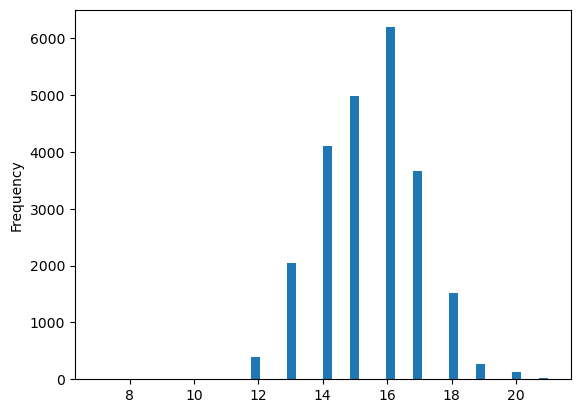

In [1774]:
dfn['Alloy Wheel Size'].plot(kind='hist', bins=50)
plt.show()

In [1775]:
dfn[dfn['Alloy Wheel Size'] >=20].loc[:, ['body', 'dvn', 'Alloy Wheel Size', ]].drop_duplicates()

,body,dvn,Alloy Wheel Size
1209,suv,mercedes-benz eqc 400 4matic,20.0
2629,luxury vehicles,volvo xc 90 d5 inscription bsiv,20.0
2758,coupe,mercedes-benz amg gle 53 coupe,21.0
2760,coupe,lamborghini huracan lp 610 4 bsiv,20.0
2765,coupe,dc avanti 2.0 l,20.0
2769,coupe,bentley continental gt v8,20.0
2784,hybrids,volvo xc 90 hybrid,20.0
2785,hybrids,volvo xc 90 t8 excellence bsiv,21.0
7348,sedan,mercedes-benz s-class s400d 4matic,20.0
7359,suv,mercedes-benz gls 350d 4matic,20.0


In [1776]:
dfn[dfn['Alloy Wheel Size'] <= 10].loc[:, ['body', 'dvn', 'Alloy Wheel Size', ]]

,body,dvn,Alloy Wheel Size
6764,suv,skoda yeti ambiente,7.0
6880,suv,skoda yeti ambiente,7.0


In [1777]:
dfn.loc[6764, 'Alloy Wheel Size'] = 16
dfn.loc[6880, 'Alloy Wheel Size'] = 16

In [1778]:
dfn['Alloy Wheel Size'].describe()

count    23341.000000
mean        15.451095
std          1.519925
min         12.000000
25%         14.000000
50%         16.000000
75%         16.000000
max         21.000000
Name: Alloy Wheel Size, dtype: float64

In [1779]:
dfn[dfn['Alloy Wheel Size'] <= 15].loc[:, ['body', 'dvn', 'Alloy Wheel Size', ]]

,body,dvn,Alloy Wheel Size
3,hatchback,maruti wagon r lxi cng,13.0
6,hatchback,maruti alto green lxi (cng),12.0
16,hatchback,hyundai grand i10 asta cng,14.0
29,hatchback,maruti wagon r lxi cng,13.0
33,hatchback,maruti wagon r lxi cng,13.0
...,...,...,...
37789,sedan,tata indigo classic petrol,14.0
37790,hatchback,tata indica dlg,14.0
37792,hatchback,tata indica tdi ls,13.0
37809,sedan,tata manza aura quadrajet bs iv,15.0


In [1780]:
dfn['Alloy Wheel Size'].isna().sum()

14453

In [1781]:
 df.groupby('dvn')['Alloy Wheel Size'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None).to_dict()

{'ambassador grand 1500 dsz bsiii': 15.0,
 'ambassador grand 1800 bsiv': 15.0,
 'ambassador grand 2000 dsz': 15.0,
 'ambassador grand 2000 dsz pw cl': 15.0,
 'ashok leyland stile le': nan,
 'aston martin vantage v8 4.7l': 19.0,
 'audi a3 35 tdi attraction': 16.0,
 'audi a3 35 tdi premium': 16.0,
 'audi a3 35 tdi premium plus': 17.0,
 'audi a3 35 tdi technology': 17.0,
 'audi a3 35 tfsi premium': 16.0,
 'audi a3 35 tfsi premium plus': 16.0,
 'audi a3 35 tfsi technology': 16.0,
 'audi a3 40 tfsi premium plus': 17.0,
 'audi a3 cabriolet 40 tfsi premium plus': 17.0,
 'audi a4 1.8 tfsi': 16.0,
 'audi a4 1.8 tfsi multitronic': 16.0,
 'audi a4 1.8 tfsi premium plus': 17.0,
 'audi a4 1.8 tfsi technology edition': 17.0,
 'audi a4 2.0 tdi': 16.0,
 'audi a4 2.0 tdi celebration edition': 16.0,
 'audi a4 2.0 tdi multitronic': 16.0,
 'audi a4 2.0 tdi premium plus': 17.0,
 'audi a4 2.0 tdi premium sport limited edition': 17.0,
 'audi a4 2.0 tdi technology edition': 17.0,
 'audi a4 2.0 tfsi': 16.0,
 '

In [1782]:
dfn['Alloy Wheel Size'].fillna(dfn.groupby(['body', 'dvn'])['Alloy Wheel Size'].transform('mean'),inplace=True)

In [1783]:
dfn['Alloy Wheel Size'].isna().sum()

12066

In [1784]:
dfn['Alloy Wheel Size'].fillna(dfn.groupby(['body', 'model', 'Tyre Type'])['Alloy Wheel Size'].transform('mean'),inplace=True)

In [1785]:
dfn['Alloy Wheel Size'].isna().sum()

2756

In [1786]:
dfn['Alloy Wheel Size'].fillna(dfn.groupby(['body', 'model'])['Alloy Wheel Size'].transform('mean'),inplace=True)

In [1787]:
dfn['Alloy Wheel Size'].isna().sum()

1235

In [1788]:
dfn['Alloy Wheel Size'].fillna(dfn.groupby(['body', 'Tyre Type'])['Alloy Wheel Size'].transform('mean'),inplace=True)

In [1789]:
dfn['Alloy Wheel Size'].isna().sum()

4

In [1790]:
dfn['Alloy Wheel Size'].fillna(dfn.groupby(['body'])['Alloy Wheel Size'].transform('mean'),inplace=True)

In [1791]:
dfn['Alloy Wheel Size'].isna().sum()

0

In [1792]:
dfn['Alloy Wheel Size'].describe()

count    37794.000000
mean        15.137628
std          1.507089
min         12.000000
25%         14.000000
50%         15.000000
75%         16.000000
max         21.000000
Name: Alloy Wheel Size, dtype: float64

# Top Speed

In [1793]:
dfn['Top Speed'].describe()

count    22452.000000
mean       172.996987
std         26.634717
min         70.000000
25%        156.000000
50%        168.560000
75%        189.000000
max        340.000000
Name: Top Speed, dtype: float64

In [1794]:
dfn.groupby('body')['Top Speed'].mean()

body
convertibles       252.285714
coupe              259.990000
hatchback          157.512201
hybrids            190.666667
luxury vehicles    225.589041
minivans           135.671329
muv                156.549499
pickup trucks      135.357143
sedan              190.917074
suv                178.622926
wagon              230.666667
Name: Top Speed, dtype: float64

In [1795]:
dfn[dfn['Top Speed'] <= 100].loc[:, ['body', 'dvn', 'fuel', 'Top Speed']].drop_duplicates()

,body,dvn,fuel,Top Speed
180,minivans,maruti omni cng,cng,95.0
224,hatchback,bajaj re60 qute cng,cng,70.0
302,pickup trucks,mahindra bolero maxi truck plus cng ps,cng,80.0
990,minivans,maruti omni lpg std bsiii 5-str w immobiliser,lpg,95.0
1047,minivans,maruti omni lpg std bsiv,lpg,95.0
1193,hatchback,mahindra e2o t2,electric,81.0
1195,sedan,tata tigor ev xm,electric,80.0
1203,hatchback,mahindra e2o plus p6,electric,80.0
1208,sedan,mahindra e verito d6,electric,86.0
1212,hatchback,mahindra e2o plus p4,electric,80.0


In [1796]:
dfn[dfn['Top Speed'] >= 300].loc[:, ['body', 'dvn', 'fuel', 'Top Speed']].drop_duplicates()

,body,dvn,fuel,Top Speed
2760,coupe,lamborghini huracan lp 610 4 bsiv,petrol,325.0
2766,coupe,ferrari sf90 stradale coupe v8,petrol,340.0
2769,coupe,bentley continental gt v8,petrol,303.0
13632,sedan,bentley continental flying spur bsiv,petrol,312.0
13634,luxury vehicles,lamborghini huracan evo spyder rwd,petrol,325.0


In [1797]:
dfn['Top Speed'].fillna(dfn.groupby(['dvn'])['Top Speed'].transform('mean'),inplace=True)

In [1798]:
dfn['Top Speed'].isna().sum()

12569

In [1799]:
dfn['Top Speed'].fillna(dfn.groupby(['model','No of Cylinder','Turbo Charger','Super Charger'])['Top Speed'].transform('mean'),inplace=True)

In [1800]:
dfn['Top Speed'].isna().sum()

4420

In [1801]:
dfn['Top Speed'].fillna(dfn.groupby(['body','model','No of Cylinder'])['Top Speed'].transform('mean'),inplace=True)

In [1802]:
dfn['Top Speed'].isna().sum()

3839

In [1803]:
dfn['Top Speed'].fillna(dfn.groupby(['body','model'])['Top Speed'].transform('mean'),inplace=True)

In [1804]:
dfn['Top Speed'].isna().sum()

3533

In [1805]:
dfn['Top Speed'].fillna(dfn.groupby(['model'])['Top Speed'].transform('mean'),inplace=True)

In [1806]:
dfn['Top Speed'].isna().sum()

3514

In [1807]:
dfn['Top Speed'].fillna(dfn.groupby(['body'])['Top Speed'].transform('mean'),inplace=True)

In [1808]:
dfn['Top Speed'].isna().sum()

0

In [1809]:
dfn['Top Speed'].describe()

count    37794.000000
mean       170.231650
std         23.577491
min         70.000000
25%        156.000000
50%        165.020708
75%        182.000000
max        340.000000
Name: Top Speed, dtype: float64

# Front Tread

In [1810]:
dfn['Front Tread'].describe()

count    21922.000000
mean      1470.033866
std         90.377783
min       1143.000000
25%       1420.000000
50%       1485.000000
75%       1530.000000
max       1705.000000
Name: Front Tread, dtype: float64

In [1811]:
dfn[dfn['Front Tread'] <= 2000]

,loc,myear,body,transmission,fuel,km,ip,imgCount,threesixty,dvn,oem,model,variant,City,listed_price,discountValue,utype,carType,top_features,comfort_features,interior_features,exterior_features,safety_features,Engine Type,No of Cylinder,Valves per Cylinder,Valve Configuration,Turbo Charger,Super Charger,Length,Width,Height,Wheel Base,Front Tread,Rear Tread,Kerb Weight,Gross Weight,Gear Box,Drive Type,Seats,Steering Type,Turning Radius,Front Brake Type,Rear Brake Type,Top Speed,Acceleration,Tyre Type,Doors,Cargo Volume,state,exterior_color,owner_type,Fuel Supply System,Compression Ratio,Alloy Wheel Size,Ground Clearance Unladen,Max Power Delivered,Max Power At,Max Torque Delivered,Max Torque At,Bore,Stroke
0,gomti nagar,2016,hatchback,manual,cng,69162.0,0,15,False,maruti wagon r lxi cng,maruti,maruti wagon r,lxi cng,lucknow,370000.0,0,dealer,corporate,"['power steering', 'power windows front', 'air...","['power steering', 'power windows front', 'rem...","['air conditioner', 'heater', 'digital odomete...","['adjustable head lights', 'manually adjustabl...","['centeral locking', 'child safety locks', 'da...",k10b engine,3.0,4.0,dohc,False,False,3599.0,1495.0,1700.0,2400.0,1295.0,1290.0,960.0,1350.0,5 speed,fwd,5.0,power,4.6,ventilated disc,drum,137.00,15.900000,tubeless,5.0,180.000000,uttar pradesh,silver,first,Multi-Point Fuel Injection,NaN,13.000000,NaN,58.16,6200.0,77.0,3500.0,69.0,NaN
1,borivali west,2015,hatchback,manual,cng,45864.0,0,15,False,maruti celerio green vxi,maruti,maruti celerio,green vxi,mumbai,365000.0,0,dealer,corporate,"['power steering', 'power windows front', 'air...","['power steering', 'power windows front', 'pow...","['air conditioner', 'heater', 'digital odomete...","['adjustable head lights', 'manually adjustabl...","['centeral locking', 'child safety locks', 'da...",k10b engine,3.0,4.0,dohc,False,False,3600.0,1600.0,1560.0,2425.0,1420.0,1410.0,915.0,1350.0,5 speed,fwd,5.0,power,4.7,ventilated disc,drum,150.00,15.050000,tubeless radial,5.0,235.000000,maharashtra,grey,first,Gasoline Port Injection,11.0,14.647059,NaN,58.20,6000.0,78.0,3500.0,73.0,NaN
3,jasola,2013,hatchback,manual,cng,115893.0,0,0,False,maruti wagon r lxi cng,maruti,maruti wagon r,lxi cng,new delhi,240000.0,0,dealer,corporate,"['power steering', 'power windows front', 'air...","['power steering', 'power windows front', 'low...","['air conditioner', 'heater', 'electronic mult...","['adjustable head lights', 'manually adjustabl...","['centeral locking', 'child safety locks', 'da...",k series petrol engine,3.0,4.0,sohc,False,False,3595.0,1475.0,1700.0,2400.0,1295.0,1290.0,960.0,1350.0,5 speed,fwd,5.0,power,4.6,ventilated disc,drum,137.00,17.970745,tubeless radial,4.0,252.577497,delhi,silver,second,Multi-Point Fuel Injection,NaN,13.000000,NaN,58.20,6200.0,77.0,3500.0,NaN,NaN
5,bengali market,2012,hatchback,manual,cng,60000.0,0,17,False,maruti wagon r lxi cng,maruti,maruti wagon r,lxi cng,new delhi,250000.0,0,dealer,partner,"['power steering', 'power windows front', 'air...","['power steering', 'power windows front', 'rem...","['air conditioner', 'heater', 'digital odomete...","['adjustable head lights', 'manually adjustabl...","['centeral locking', 'child safety locks', 'da...",k10b engine,3.0,4.0,dohc,False,False,3599.0,1495.0,1700.0,2400.0,1295.0,1290.0,960.0,1350.0,5 speed,fwd,5.0,power,4.6,ventilated disc,drum,137.00,15.900000,tubeless,5.0,180.000000,delhi,white,first,Multi-Point Fuel Injection,NaN,13.000000,NaN,58.16,6200.0,77.0,3500.0,69.0,NaN
6,bengali market,2010,hatchback,manual,cng,67000.0,0,12,False,maruti alto green lxi (cng),maruti,maruti alto,green lxi (cng),new delhi,145000.0,0,dealer,partner,"['power steering', 'remote fuel lid opener', '...","['power steering', 'remote fuel lid opener', '...","['air conditioner', 'heater', 'electronic mult...","['adjustable head lights', 'manually adjustabl...","['power door locks', 'passenger side rear view...",in line engine,3.0,4.0,sohc,False,False,3495.0,1475.0,1460.0,2360.0,1295.0,1290.0

In [1812]:
dfn['Front Tread'].isna().sum()

15872

In [1813]:
dfn['Front Tread'].fillna(dfn.groupby(['dvn'])['Front Tread'].transform('mean'),inplace=True)

In [1814]:
dfn['Front Tread'].isna().sum()

15305

In [1815]:
dfn['Front Tread'].fillna(dfn.groupby(['model','Tyre Type','Front Brake Type','Acceleration'])['Front Tread'].transform('mean'),inplace=True)

In [1816]:
dfn['Front Tread'].isna().sum()

12776

In [1817]:
dfn['Front Tread'].fillna(dfn.groupby(['model','Tyre Type','Front Brake Type'])['Front Tread'].transform('mean'),inplace=True)

In [1818]:
dfn['Front Tread'].isna().sum()

10996

In [1819]:
dfn['Front Tread'].fillna(dfn.groupby(['model','Tyre Type'])['Front Tread'].transform('mean'),inplace=True)

In [1820]:
dfn['Front Tread'].isna().sum()

10407

In [1821]:
dfn['Front Tread'].fillna(dfn.groupby(['Kerb Weight'])['Front Tread'].transform('mean'),inplace=True)

In [1822]:
dfn['Front Tread'].isna().sum()

1226

In [1823]:
dfn['Front Tread'].fillna(dfn.groupby(['body'])['Front Tread'].transform('mean'),inplace=True)

In [1824]:
dfn['Front Tread'].isna().sum()

0

In [1825]:
dfn['Front Tread'].describe()

count    37794.000000
mean      1479.029049
std         79.472420
min       1143.000000
25%       1457.000000
50%       1493.642857
75%       1535.107348
max       1705.000000
Name: Front Tread, dtype: float64

# Rear Tread

In [1826]:
dfn['Rear Tread'].describe()

count    21921.000000
mean      1469.303837
std        100.572582
min         15.000000
25%       1420.000000
50%       1493.000000
75%       1525.000000
max       1834.000000
Name: Rear Tread, dtype: float64

In [1827]:
dfn[dfn['Rear Tread'] <= 50].loc[:, ['body', 'dvn', 'Front Tread', 'Rear Tread']]

,body,dvn,Front Tread,Rear Tread
8289,suv,chevrolet captiva lt,1562.0,15.0
8357,suv,chevrolet captiva lt,1562.0,15.0
8407,suv,chevrolet captiva lt,1562.0,15.0
8679,suv,chevrolet captiva lt,1562.0,15.0
8845,suv,chevrolet captiva lt,1562.0,15.0
8884,suv,chevrolet captiva lt,1562.0,15.0
8891,suv,chevrolet captiva lt,1562.0,15.0
8914,suv,chevrolet captiva lt,1562.0,15.0
8931,suv,chevrolet captiva lt,1562.0,15.0
8941,suv,chevrolet captiva lt,1562.0,15.0


In [1828]:
dfn['Rear Tread'].replace({15: 1572}, inplace=True)

In [1829]:
dfn['Rear Tread'].describe()

count    21921.000000
mean      1470.156170
std         94.668078
min       1190.000000
25%       1420.000000
50%       1493.000000
75%       1525.000000
max       1834.000000
Name: Rear Tread, dtype: float64

In [1830]:
dfn['Rear Tread'].isna().sum()

15873

In [1831]:
dfn['Rear Tread'].fillna(dfn.groupby(['dvn'])['Rear Tread'].transform('mean'),inplace=True)

In [1832]:
dfn['Rear Tread'].isna().sum()

15306

In [1833]:
dfn['Rear Tread'].fillna(dfn.groupby(['model','Tyre Type','Rear Brake Type','Acceleration'])['Rear Tread'].transform('mean'),inplace=True)

In [1834]:
dfn['Rear Tread'].isna().sum()

12883

In [1835]:
dfn['Rear Tread'].fillna(dfn.groupby(['model','Tyre Type','Rear Brake Type'])['Rear Tread'].transform('mean'),inplace=True)

In [1836]:
dfn['Rear Tread'].isna().sum()

10825

In [1837]:
dfn['Rear Tread'].fillna(dfn.groupby(['model','Tyre Type'])['Rear Tread'].transform('mean'),inplace=True)

In [1838]:
dfn['Rear Tread'].isna().sum()

10405

In [1839]:
dfn['Rear Tread'].fillna(dfn.groupby(['Kerb Weight'])['Rear Tread'].transform('mean'),inplace=True)

In [1840]:
dfn['Rear Tread'].isna().sum()

1222

In [1841]:
dfn['Rear Tread'].fillna(dfn.groupby(['body'])['Rear Tread'].transform('mean'),inplace=True)

In [1842]:
dfn['Rear Tread'].isna().sum()

0

In [1843]:
dfn['Rear Tread'].describe()

count    37794.000000
mean      1479.121198
std         83.282520
min       1190.000000
25%       1450.061728
50%       1498.000000
75%       1530.000000
max       1834.000000
Name: Rear Tread, dtype: float64

# Compression Ratio

In [1844]:
dfn['Compression Ratio'].describe()

count    10006.000000
mean        12.833312
std          5.260513
min          4.170000
25%         10.100000
50%         10.500000
75%         16.200000
max         81.000000
Name: Compression Ratio, dtype: float64

In [1845]:
dfn[dfn.fuel == 'electric']['Compression Ratio'].drop_duplicates()

1193   NaN
Name: Compression Ratio, dtype: float64

In [1846]:
dfn.loc[dfn.fuel == 'electric', 'Compression Ratio'] = 0

In [1847]:
dfn[dfn.fuel == 'electric']['Compression Ratio'].drop_duplicates()

1193    0.0
Name: Compression Ratio, dtype: float64

In [1848]:
dfn['Compression Ratio'].describe()

count    10127.000000
mean        12.679976
std          5.411729
min          0.000000
25%         10.100000
50%         10.500000
75%         16.200000
max         81.000000
Name: Compression Ratio, dtype: float64

In [1849]:
dfn['Compression Ratio'].isna().sum()

27667

In [1850]:
dfn['Compression Ratio'].fillna(dfn.groupby(['dvn'])['Compression Ratio'].transform('mean'),inplace=True)

In [1851]:
dfn['Compression Ratio'].isna().sum()

26635

In [1852]:
dfn['Compression Ratio'].fillna(dfn.groupby(['model', 'Engine Type'])['Compression Ratio'].transform('mean'),inplace=True)

In [1853]:
dfn['Compression Ratio'].isna().sum()

23666

In [1854]:
dfn['Compression Ratio'].fillna(dfn.groupby(['Fuel Supply System','No of Cylinder','Valves per Cylinder','Valve Configuration'])['Compression Ratio'].transform('mean'),inplace=True)

In [1855]:
dfn['Compression Ratio'].isna().sum()

1170

In [1856]:
dfn['Compression Ratio'].fillna(dfn.groupby(['Max Power At'])['Compression Ratio'].transform('mean'),inplace=True)

In [1857]:
dfn['Compression Ratio'].isna().sum()

2

In [1858]:
dfn['Compression Ratio'].fillna(df['Compression Ratio'].mean(),inplace=True)

In [1859]:
dfn['Compression Ratio'].isna().sum()

0

In [1860]:
dfn['Compression Ratio'].describe()

count    37794.000000
mean        12.543261
std          3.674927
min          0.000000
25%         10.300000
50%         10.714206
75%         15.869683
max         81.000000
Name: Compression Ratio, dtype: float64

In [1861]:
pd.DataFrame({'Values':dfn.isna().sum()}).T

,loc,myear,body,transmission,fuel,km,ip,imgCount,threesixty,dvn,oem,model,variant,City,listed_price,discountValue,utype,carType,top_features,comfort_features,interior_features,exterior_features,safety_features,Engine Type,No of Cylinder,Valves per Cylinder,Valve Configuration,Turbo Charger,Super Charger,Length,Width,Height,Wheel Base,Front Tread,Rear Tread,Kerb Weight,Gross Weight,Gear Box,Drive Type,Seats,Steering Type,Turning Radius,Front Brake Type,Rear Brake Type,Top Speed,Acceleration,Tyre Type,Doors,Cargo Volume,state,exterior_color,owner_type,Fuel Supply System,Compression Ratio,Alloy Wheel Size,Ground Clearance Unladen,Max Power Delivered,Max Power At,Max Torque Delivered,Max Torque At,Bore,Stroke
Values,5840,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20882,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35642,0,0,0,0,25165,37281


In [1863]:
#dfn.to_csv('DataProper.csv')